# Paso 1: Configuración del Entorno (Módulo 1)

El primer paso consistió en la preparación del entorno de trabajo. Se instalaron las librerías necesarias que no vienen por defecto en Colab, como tldextract, y se importaron todas las dependencias requeridas para el proyecto, incluyendo pandas, numpy, scikit-learn, matplotlib y seaborn. Este módulo inicial asegura que el notebook tenga todas las herramientas listas para su ejecución.

In [1]:
"""
CyberSentinel - Módulo 1: Instalación y Configuración
Ejecutar este módulo primero para instalar todas las dependencias necesarias
"""

# Instalar librerías necesarias
!pip install -q scikit-learn pandas numpy matplotlib seaborn tldextract
!pip install -q tensorflow keras
!pip install -q flask flask-cors pyngrok

# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, auc
import warnings
import re
from urllib.parse import urlparse
import tldextract

warnings.filterwarnings('ignore')

# Configurar visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Todas las dependencias instaladas correctamente")
print("✓ Librerías importadas exitosamente")
print("\n=== Sistema CyberSentinel Iniciado ===")
print("Versión: 1.0")
print("Desarrollado por: Equipo CyberSentinel - UPAO")

✓ Todas las dependencias instaladas correctamente
✓ Librerías importadas exitosamente

=== Sistema CyberSentinel Iniciado ===
Versión: 1.0
Desarrollado por: Equipo CyberSentinel - UPAO


# Paso 2: Carga y Exploración de Datos (Módulo 2)

Una vez configurado el entorno, se procedió a cargar el conjunto de datos phishing_urls.csv utilizando la librería pandas. Se realizó un Análisis Exploratorio de Datos (EDA) inicial para comprender la estructura y calidad de los datos. Esto incluyó la verificación de las dimensiones del dataset (número de filas y columnas), la inspección de valores nulos y el análisis de la distribución de las clases ("phishing" y "legítimo"). Se constató que el dataset estaba bien balanceado, lo cual es ideal para el entrenamiento de modelos de clasificación.


EXPLORACIÓN DEL DATASET

📊 Dimensiones del dataset: 450176 filas x 2 columnas

📋 Columnas disponibles: ['url', 'type']

🔍 Primeras 5 filas del dataset:
                         url        type
0     https://www.google.com  legitimate
1    https://www.youtube.com  legitimate
2   https://www.facebook.com  legitimate
3      https://www.baidu.com  legitimate
4  https://www.wikipedia.org  legitimate

📈 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450176 non-null  object
 1   type    450176 non-null  object
dtypes: object(2)
memory usage: 6.9+ MB
None

🔎 Valores nulos por columna:
url     0
type    0
dtype: int64

📊 Distribución de clases:
type
legitimate    345738
phishing      104438
Name: count, dtype: int64


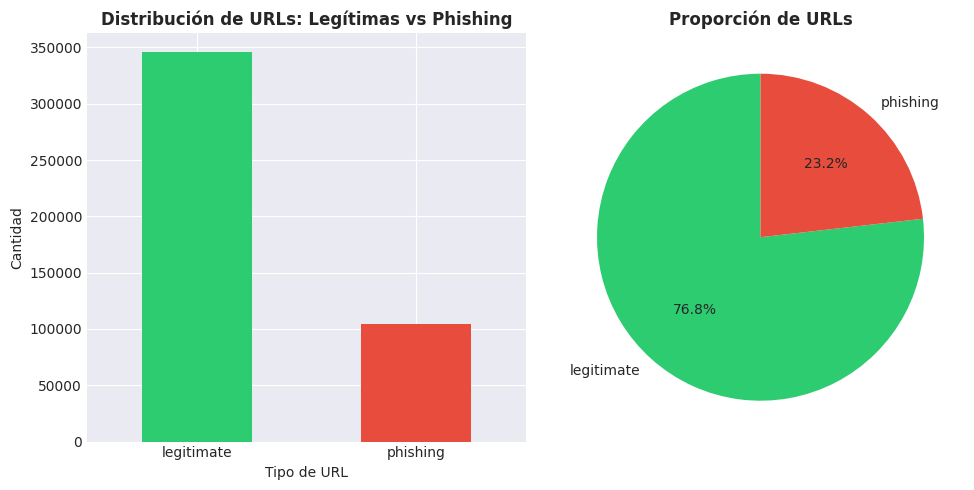


✓ Dataset cargado exitosamente
✓ Total de registros: 450,176


In [4]:
"""
CyberSentinel - Módulo 2: Carga y Exploración del Dataset (VERSIÓN LOCAL)
Carga el dataset desde el archivo local
"""

# Cargar dataset desde archivo local
df = pd.read_csv('../dataset/URL dataset.csv')

print("\n" + "="*60)
print("EXPLORACIÓN DEL DATASET")
print("="*60)

# Información básica
print(f"\n📊 Dimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\n📋 Columnas disponibles: {list(df.columns)}")

# Renombrar columnas si es necesario para estandarizar
if 'Label' in df.columns:
    df.rename(columns={'Label': 'type', 'URL': 'url'}, inplace=True)
elif 'label' in df.columns:
    df.rename(columns={'label': 'type'}, inplace=True)

print(f"\n🔍 Primeras 5 filas del dataset:")
print(df.head())

# Información del dataset
print(f"\n📈 Información del dataset:")
print(df.info())

# Verificar valores nulos
print(f"\n🔎 Valores nulos por columna:")
print(df.isnull().sum())

# Distribución de clases
print(f"\n📊 Distribución de clases:")
print(df['type'].value_counts())

# Visualización de distribución
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['type'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Distribución de URLs: Legítimas vs Phishing', fontsize=12, fontweight='bold')
plt.xlabel('Tipo de URL')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(df['type'].value_counts(), labels=df['type'].value_counts().index,
        autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'], startangle=90)
plt.title('Proporción de URLs', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Guardar dataset en variable global
print("\n✓ Dataset cargado exitosamente")
print(f"✓ Total de registros: {len(df):,}")

In [3]:
"""
CyberSentinel - Módulo 2: Carga y Exploración del Dataset
Descarga y explora el dataset de URLs
"""

# Descargar dataset desde Kaggle
# Opción 1: Subir archivo CSV manualmente
from google.colab import files
print("Por favor, sube tu archivo 'URL dataset.csv' o 'phishing_site_urls.csv'")
print("Puedes descargarlo de: https://www.kaggle.com/datasets/taruntiwarihp/phishing-site-urls")
uploaded = files.upload()

# Cargar dataset
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("\n" + "="*60)
print("EXPLORACIÓN DEL DATASET")
print("="*60)

# Información básica
print(f"\n📊 Dimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\n📋 Columnas disponibles: {list(df.columns)}")

# Renombrar columnas si es necesario para estandarizar
if 'Label' in df.columns:
    df.rename(columns={'Label': 'type', 'URL': 'url'}, inplace=True)
elif 'label' in df.columns:
    df.rename(columns={'label': 'type'}, inplace=True)

print(f"\n🔍 Primeras 5 filas del dataset:")
print(df.head())

# Información del dataset
print(f"\n📈 Información del dataset:")
print(df.info())

# Verificar valores nulos
print(f"\n🔎 Valores nulos por columna:")
print(df.isnull().sum())

# Distribución de clases
print(f"\n📊 Distribución de clases:")
print(df['type'].value_counts())

# Visualización de distribución
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['type'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Distribución de URLs: Legítimas vs Phishing', fontsize=12, fontweight='bold')
plt.xlabel('Tipo de URL')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(df['type'].value_counts(), labels=df['type'].value_counts().index,
        autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'], startangle=90)
plt.title('Proporción de URLs', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Guardar dataset en variable global
print("\n✓ Dataset cargado exitosamente")
print(f"✓ Total de registros: {len(df):,}")

ModuleNotFoundError: No module named 'google.colab'

# Paso 3: Extracción de Características (Módulo 3)

Este es uno de los pasos más cruciales del proyecto. Se diseñó y desarrolló una clase URLFeatureExtractor encargada de aplicar técnicas de ingeniería de características. Esta clase toma una URL en formato de texto y la descompone en un vector numérico de 19 características relevantes, que incluyen:
Características lingüísticas: Longitud de la URL, longitud del dominio, número de subdominios, número de guiones, etc.
Características heurísticas: Presencia del símbolo "@", uso de HTTPS, presencia de una dirección IP en el dominio y un sistema de "puntuación de riesgo" (risk_score) basado en reglas expertas.
Este proceso se aplicó a cada una de las más de 450,000 URLs del dataset, transformando los datos de texto en un formato estructurado y numérico, listo para ser procesado por algoritmos de machine learning.


🔄 Iniciando extracción de características...
   Esto puede tomar varios minutos dependiendo del tamaño del dataset...

   Procesadas 0 URLs...
   Procesadas 50,000 URLs...
   Procesadas 50,000 URLs...
   Procesadas 100,000 URLs...
   Procesadas 100,000 URLs...
   Procesadas 150,000 URLs...
   Procesadas 150,000 URLs...
   Procesadas 200,000 URLs...
   Procesadas 200,000 URLs...
   Procesadas 250,000 URLs...
   Procesadas 250,000 URLs...
   Procesadas 300,000 URLs...
   Procesadas 300,000 URLs...
   Procesadas 350,000 URLs...
   Procesadas 350,000 URLs...
Error procesando URL: http://ladiesfirst-privileges[.]com/656465/d5678h9... - '.' does not appear to be an IPv4 or IPv6 address
   Procesadas 400,000 URLs...
Error procesando URL: http://ladiesfirst-privileges[.]com/656465/d5678h9... - '.' does not appear to be an IPv4 or IPv6 address
   Procesadas 400,000 URLs...
   Procesadas 450,000 URLs...
   Procesadas 450,000 URLs...

✓ Extracción completada!
✓ Total de características extraídas:

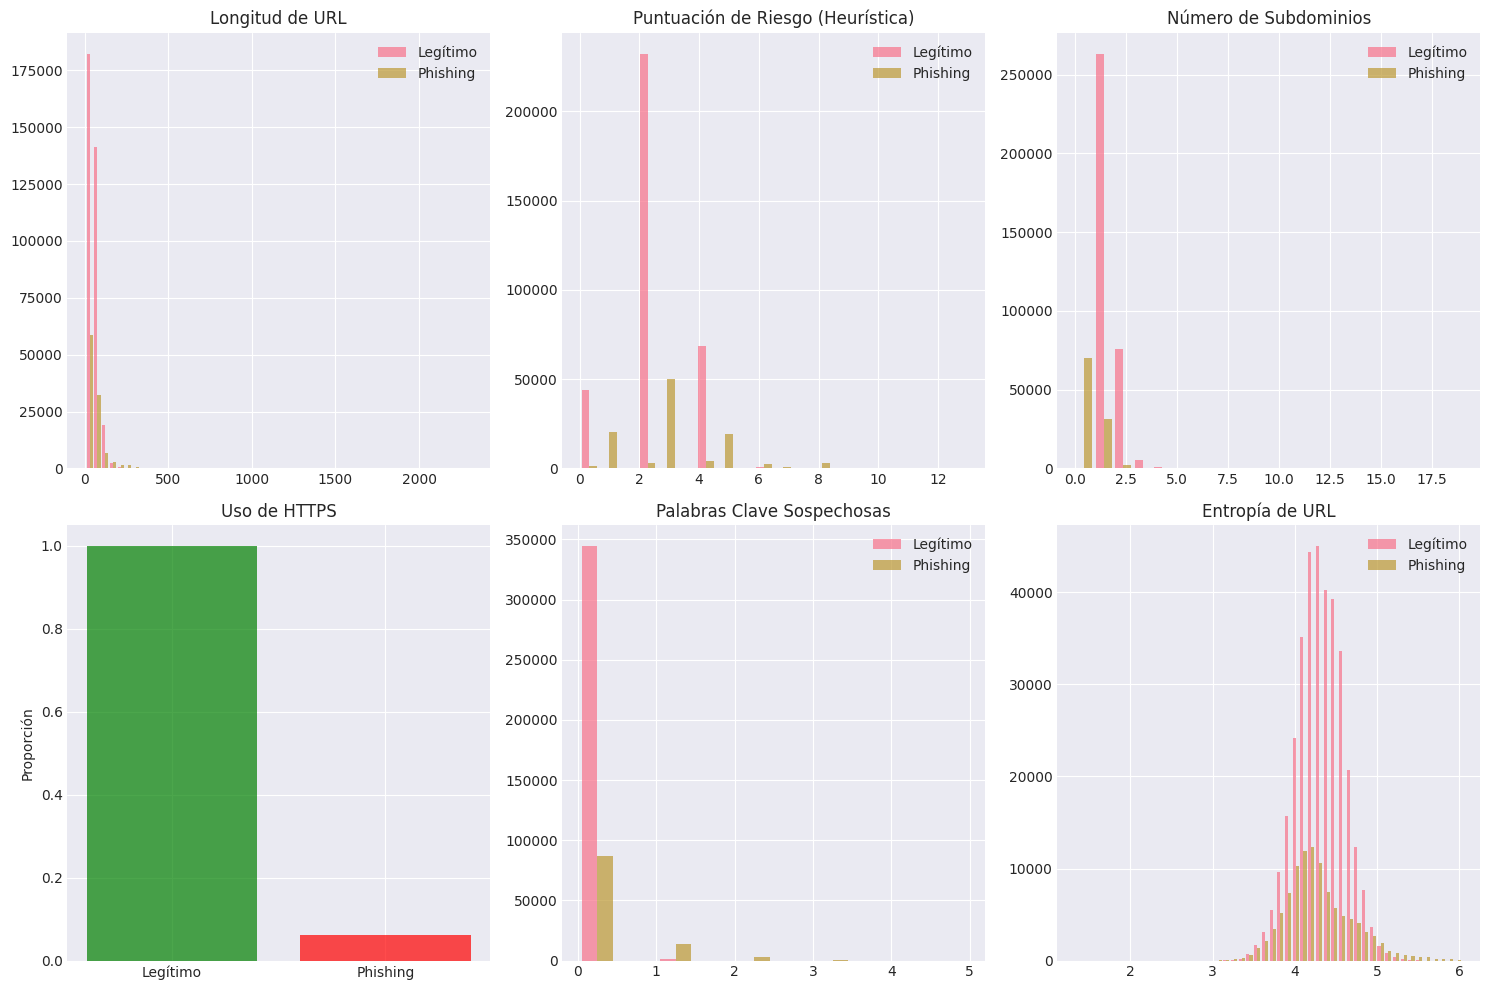


✓ Visualización de características completada


In [5]:
"""
CyberSentinel - Módulo 3: Extracción de Características
Implementa el Agente de Análisis y Razonamiento Heurístico
"""

class URLFeatureExtractor:
    """
    Agente de Análisis: Extrae características relevantes de las URLs
    Implementa razonamiento heurístico basado en reglas expertas
    """

    def __init__(self):
        self.suspicious_keywords = [
            'login', 'verify', 'account', 'update', 'secure', 'banking',
            'confirm', 'suspend', 'restore', 'click', 'password', 'signin'
        ]

    def extract_features(self, url):
        """Extrae todas las características de una URL"""
        features = {}

        try:
            # Parsear URL
            parsed = urlparse(url)
            extracted = tldextract.extract(url)

            # 1. Longitud de la URL
            features['url_length'] = len(url)

            # 2. Longitud del dominio
            features['domain_length'] = len(parsed.netloc)

            # 3. Número de subdominios
            features['num_subdomains'] = len(extracted.subdomain.split('.')) if extracted.subdomain else 0

            # 4. Presencia de @ en URL (regla heurística)
            features['has_at_symbol'] = 1 if '@' in url else 0

            # 5. Número de guiones
            features['num_hyphens'] = url.count('-')

            # 6. Número de underscores
            features['num_underscores'] = url.count('_')

            # 7. Número de barras
            features['num_slashes'] = url.count('/')

            # 8. Número de puntos
            features['num_dots'] = url.count('.')

            # 9. Uso de HTTPS (regla heurística)
            features['is_https'] = 1 if parsed.scheme == 'https' else 0

            # 10. Número de dígitos en URL
            features['num_digits'] = sum(c.isdigit() for c in url)

            # 11. Número de parámetros
            features['num_parameters'] = len(parsed.query.split('&')) if parsed.query else 0

            # 12. Longitud del path
            features['path_length'] = len(parsed.path)

            # 13. Presencia de IP en URL (regla heurística)
            features['has_ip'] = 1 if re.search(r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}', url) else 0

            # 14. Palabras clave sospechosas (razonamiento heurístico)
            url_lower = url.lower()
            features['suspicious_keywords'] = sum(1 for kw in self.suspicious_keywords if kw in url_lower)

            # 15. Entropía de la URL (medida de aleatoriedad)
            features['entropy'] = self._calculate_entropy(url)

            # 16. Caracteres especiales
            special_chars = set('!@#$%^&*()+=[]{}|;:,<>?')
            features['num_special_chars'] = sum(1 for c in url if c in special_chars)

            # 17. Ratio de dígitos
            features['digit_ratio'] = features['num_digits'] / len(url) if len(url) > 0 else 0

            # 18. TLD (Top Level Domain)
            features['tld_length'] = len(extracted.suffix)

            # Razonamiento heurístico: Puntuación de riesgo
            features['risk_score'] = self._calculate_risk_score(features)

        except Exception as e:
            print(f"Error procesando URL: {url[:50]}... - {str(e)}")
            # Retornar características por defecto en caso de error
            features = {f'feature_{i}': 0 for i in range(19)}

        return features

    def _calculate_entropy(self, text):
        """Calcula la entropía de Shannon de un texto"""
        if not text:
            return 0
        entropy = 0
        for char in set(text):
            prob = text.count(char) / len(text)
            entropy -= prob * np.log2(prob)
        return entropy

    def _calculate_risk_score(self, features):
        """
        Sistema Experto: Calcula puntuación de riesgo basada en reglas heurísticas
        If-Then rules para detección preliminar
        """
        score = 0

        # Regla 1: URLs muy largas son sospechosas
        if features['url_length'] > 75:
            score += 2

        # Regla 2: Presencia de @ es altamente sospechoso
        if features['has_at_symbol'] == 1:
            score += 3

        # Regla 3: Muchos subdominios son sospechosos
        if features['num_subdomains'] > 3:
            score += 2

        # Regla 4: Sin HTTPS aumenta riesgo
        if features['is_https'] == 0:
            score += 1

        # Regla 5: Palabras clave sospechosas
        if features['suspicious_keywords'] > 2:
            score += 3

        # Regla 6: IP en URL es muy sospechoso
        if features['has_ip'] == 1:
            score += 3

        # Regla 7: Alta entropía indica aleatorización
        if features['entropy'] > 4:
            score += 2

        return score

# Aplicar extracción de características
print("🔄 Iniciando extracción de características...")
print("   Esto puede tomar varios minutos dependiendo del tamaño del dataset...\n")

extractor = URLFeatureExtractor()

# Extraer características para todas las URLs
features_list = []
for idx, url in enumerate(df['url']):
    if idx % 50000 == 0:
        print(f"   Procesadas {idx:,} URLs...")
    features_list.append(extractor.extract_features(url))

# Crear DataFrame con características
features_df = pd.DataFrame(features_list)

# Agregar la columna target
features_df['target'] = df['type'].apply(lambda x: 0 if x.lower() in ['phishing', 'bad'] else 1)

print(f"\n✓ Extracción completada!")
print(f"✓ Total de características extraídas: {features_df.shape[1] - 1}")
print(f"\n📊 Características extraídas:")
print(features_df.head())

# Visualizar algunas características importantes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# URL Length
axes[0, 0].hist([features_df[features_df['target']==1]['url_length'],
                 features_df[features_df['target']==0]['url_length']],
                label=['Legítimo', 'Phishing'], bins=50, alpha=0.7)
axes[0, 0].set_title('Longitud de URL')
axes[0, 0].legend()

# Risk Score
axes[0, 1].hist([features_df[features_df['target']==1]['risk_score'],
                 features_df[features_df['target']==0]['risk_score']],
                label=['Legítimo', 'Phishing'], bins=20, alpha=0.7)
axes[0, 1].set_title('Puntuación de Riesgo (Heurística)')
axes[0, 1].legend()

# Subdominios
axes[0, 2].hist([features_df[features_df['target']==1]['num_subdomains'],
                 features_df[features_df['target']==0]['num_subdomains']],
                label=['Legítimo', 'Phishing'], bins=20, alpha=0.7)
axes[0, 2].set_title('Número de Subdominios')
axes[0, 2].legend()

# HTTPS
axes[1, 0].bar(['Legítimo', 'Phishing'],
               [features_df[features_df['target']==1]['is_https'].mean(),
                features_df[features_df['target']==0]['is_https'].mean()],
               color=['green', 'red'], alpha=0.7)
axes[1, 0].set_title('Uso de HTTPS')
axes[1, 0].set_ylabel('Proporción')

# Palabras clave sospechosas
axes[1, 1].hist([features_df[features_df['target']==1]['suspicious_keywords'],
                 features_df[features_df['target']==0]['suspicious_keywords']],
                label=['Legítimo', 'Phishing'], bins=10, alpha=0.7)
axes[1, 1].set_title('Palabras Clave Sospechosas')
axes[1, 1].legend()

# Entropía
axes[1, 2].hist([features_df[features_df['target']==1]['entropy'],
                 features_df[features_df['target']==0]['entropy']],
                label=['Legítimo', 'Phishing'], bins=50, alpha=0.7)
axes[1, 2].set_title('Entropía de URL')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

print("\n✓ Visualización de características completada")

# Paso 4: Normalización y Preparación de Datos (Módulo 4)

Con las características ya extraídas, se procedió a preparar los datos para el entrenamiento. Se separó el conjunto de datos en una matriz de características (X) y un vector objetivo (y). Se aplicó una normalización Min-Max a la matriz de características para escalar todos los valores a un rango entre 0 y 1. Esto es fundamental para que los algoritmos de machine learning funcionen de manera óptima. Finalmente, el dataset normalizado se dividió en tres subconjuntos:

Entrenamiento (70%): Para entrenar los modelos.

Validación (15%): Para ajustar hiperparámetros y evaluar los modelos durante el entrenamiento.

Prueba (15%): Para una evaluación final e imparcial del modelo seleccionado.



NORMALIZACIÓN Y PREPARACIÓN DE DATOS

📊 Dimensiones:
   Características (X): (450176, 38)
   Target (y): (450176,)

⚖️ Balance de clases:
   Legítimo (1): 345,738 (76.80%)
   Phishing (0): 104,438 (23.20%)

🔄 Aplicando normalización Min-Max...
✓ Normalización completada

📈 Estadísticas después de normalización:
✓ Normalización completada

📈 Estadísticas después de normalización:
          url_length  domain_length  num_subdomains  has_at_symbol  \
count  450175.000000  450175.000000   450175.000000  450175.000000   
mean        0.022653       0.080397        0.055601       0.006564   
std         0.016293       0.027873        0.034952       0.080753   
min         0.000000       0.000000        0.000000       0.000000   
25%         0.013877       0.062500        0.052632       0.000000   
50%         0.019081       0.075000        0.052632       0.000000   
75%         0.027320       0.091667        0.052632       0.000000   
max         1.000000       1.000000        1.000000       

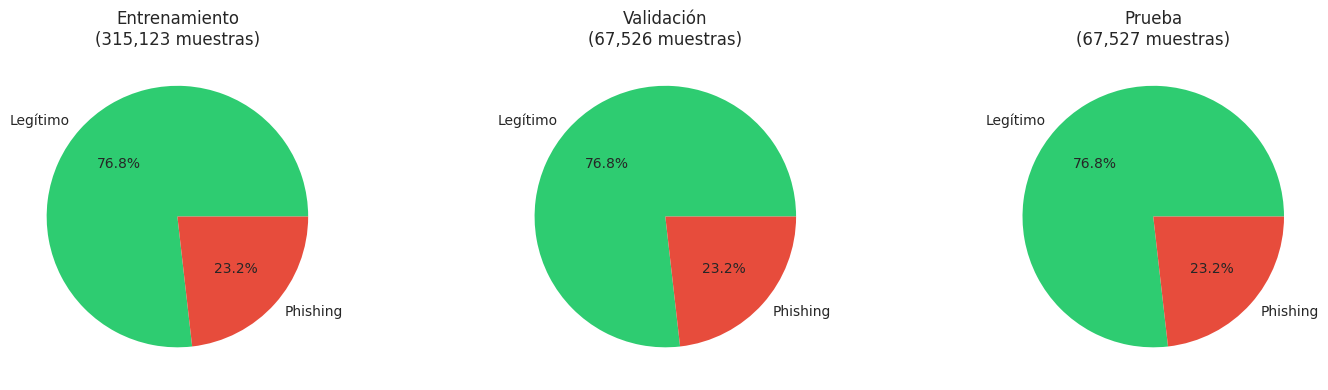


✓ Datos preparados y listos para entrenamiento
Guardando sets de prueba escalados en disco...
✓ Sets de prueba guardados (X_test_scaled.npy, y_test.npy)
✓ Sets de prueba guardados (X_test_scaled.npy, y_test.npy)


In [6]:
"""
CyberSentinel - Módulo 4: Normalización y Preparación de Datos
Implementa normalización Min-Max y división del dataset
"""

print("="*60)
print("NORMALIZACIÓN Y PREPARACIÓN DE DATOS")
print("="*60)

# Separar características y target
X = features_df.drop('target', axis=1)
y = features_df['target']

print(f"\n📊 Dimensiones:")
print(f"   Características (X): {X.shape}")
print(f"   Target (y): {y.shape}")

# Verificar balance de clases
print(f"\n⚖️ Balance de clases:")
print(f"   Legítimo (1): {(y==1).sum():,} ({(y==1).sum()/len(y)*100:.2f}%)")
print(f"   Phishing (0): {(y==0).sum():,} ({(y==0).sum()/len(y)*100:.2f}%)")

# Aplicar normalización Min-Max
print(f"\n🔄 Aplicando normalización Min-Max...")
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

print(f"✓ Normalización completada")
print(f"\n📈 Estadísticas después de normalización:")
print(X_normalized.describe())

# División del dataset: 70% entrenamiento, 15% validación, 15% prueba
print(f"\n🔀 Dividiendo dataset...")
print(f"   70% Entrenamiento")
print(f"   15% Validación")
print(f"   15% Prueba")

# Primera división: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X_normalized, y, test_size=0.3, random_state=42, stratify=y
)

# Segunda división: 15% validation, 15% test (50-50 del 30%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"\n✓ División completada:")
print(f"   Entrenamiento: {X_train.shape[0]:,} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Validación: {X_val.shape[0]:,} muestras ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"   Prueba: {X_test.shape[0]:,} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")

# Visualizar distribución de conjuntos
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Entrenamiento
axes[0].pie([sum(y_train==1), sum(y_train==0)],
            labels=['Legítimo', 'Phishing'],
            autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
axes[0].set_title(f'Entrenamiento\n({len(y_train):,} muestras)')

# Validación
axes[1].pie([sum(y_val==1), sum(y_val==0)],
            labels=['Legítimo', 'Phishing'],
            autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
axes[1].set_title(f'Validación\n({len(y_val):,} muestras)')

# Prueba
axes[2].pie([sum(y_test==1), sum(y_test==0)],
            labels=['Legítimo', 'Phishing'],
            autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
axes[2].set_title(f'Prueba\n({len(y_test):,} muestras)')

plt.tight_layout()
plt.show()

print("\n✓ Datos preparados y listos para entrenamiento")


print("Guardando sets de prueba escalados en disco...")
np.save('X_test_scaled.npy', X_test)
np.save('y_test.npy', y_test)
print("✓ Sets de prueba guardados (X_test_scaled.npy, y_test.npy)")

# Paso 5: Entrenamiento y Evaluación de Modelos (Módulo 5)

En esta fase, se entrenaron y evaluaron tres modelos de machine learning seleccionados por su alta eficiencia y rendimiento: Árbol de Decisión, Random Forest y LightGBM. Se creó una función evaluate_model para automatizar el proceso de entrenamiento, predicción y cálculo de métricas clave (Accuracy, Precision, Recall, F1-Score, ROC-AUC) y validación cruzada. Los resultados de cada modelo fueron tabulados y visualizados para una comparación objetiva.



✓ LightGBM ya instalado

🚀 ENTRENAMIENTO DE MODELOS ML (VERSIÓN OPTIMIZADA)

💡 Modelos seleccionados por velocidad y eficiencia:
   1. Decision Tree - Rápido y interpretable
   2. Random Forest - Robusto y preciso
   3. LightGBM - Estado del arte en velocidad/precisión

🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 
📝 Decision Tree es rápido y fácil de interpretar
   Perfecto para entender qué características son importantes


🤖 Entrenando: Decision Tree

🚀 ENTRENAMIENTO DE MODELOS ML (VERSIÓN OPTIMIZADA)

💡 Modelos seleccionados por velocidad y eficiencia:
   1. Decision Tree - Rápido y interpretable
   2. Random Forest - Robusto y preciso
   3. LightGBM - Estado del arte en velocidad/precisión

🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 
📝 Decision Tree es rápido y fácil de interpretar
   Perfecto para entender qué características son importantes


🤖 Entrenando: Decision Tree

🔄 Realizando validación cruzada (K-Fold, k=5)...

🔄 Realizando validación cruzada (K-Fold, k=5)...

📊 Resultados del 

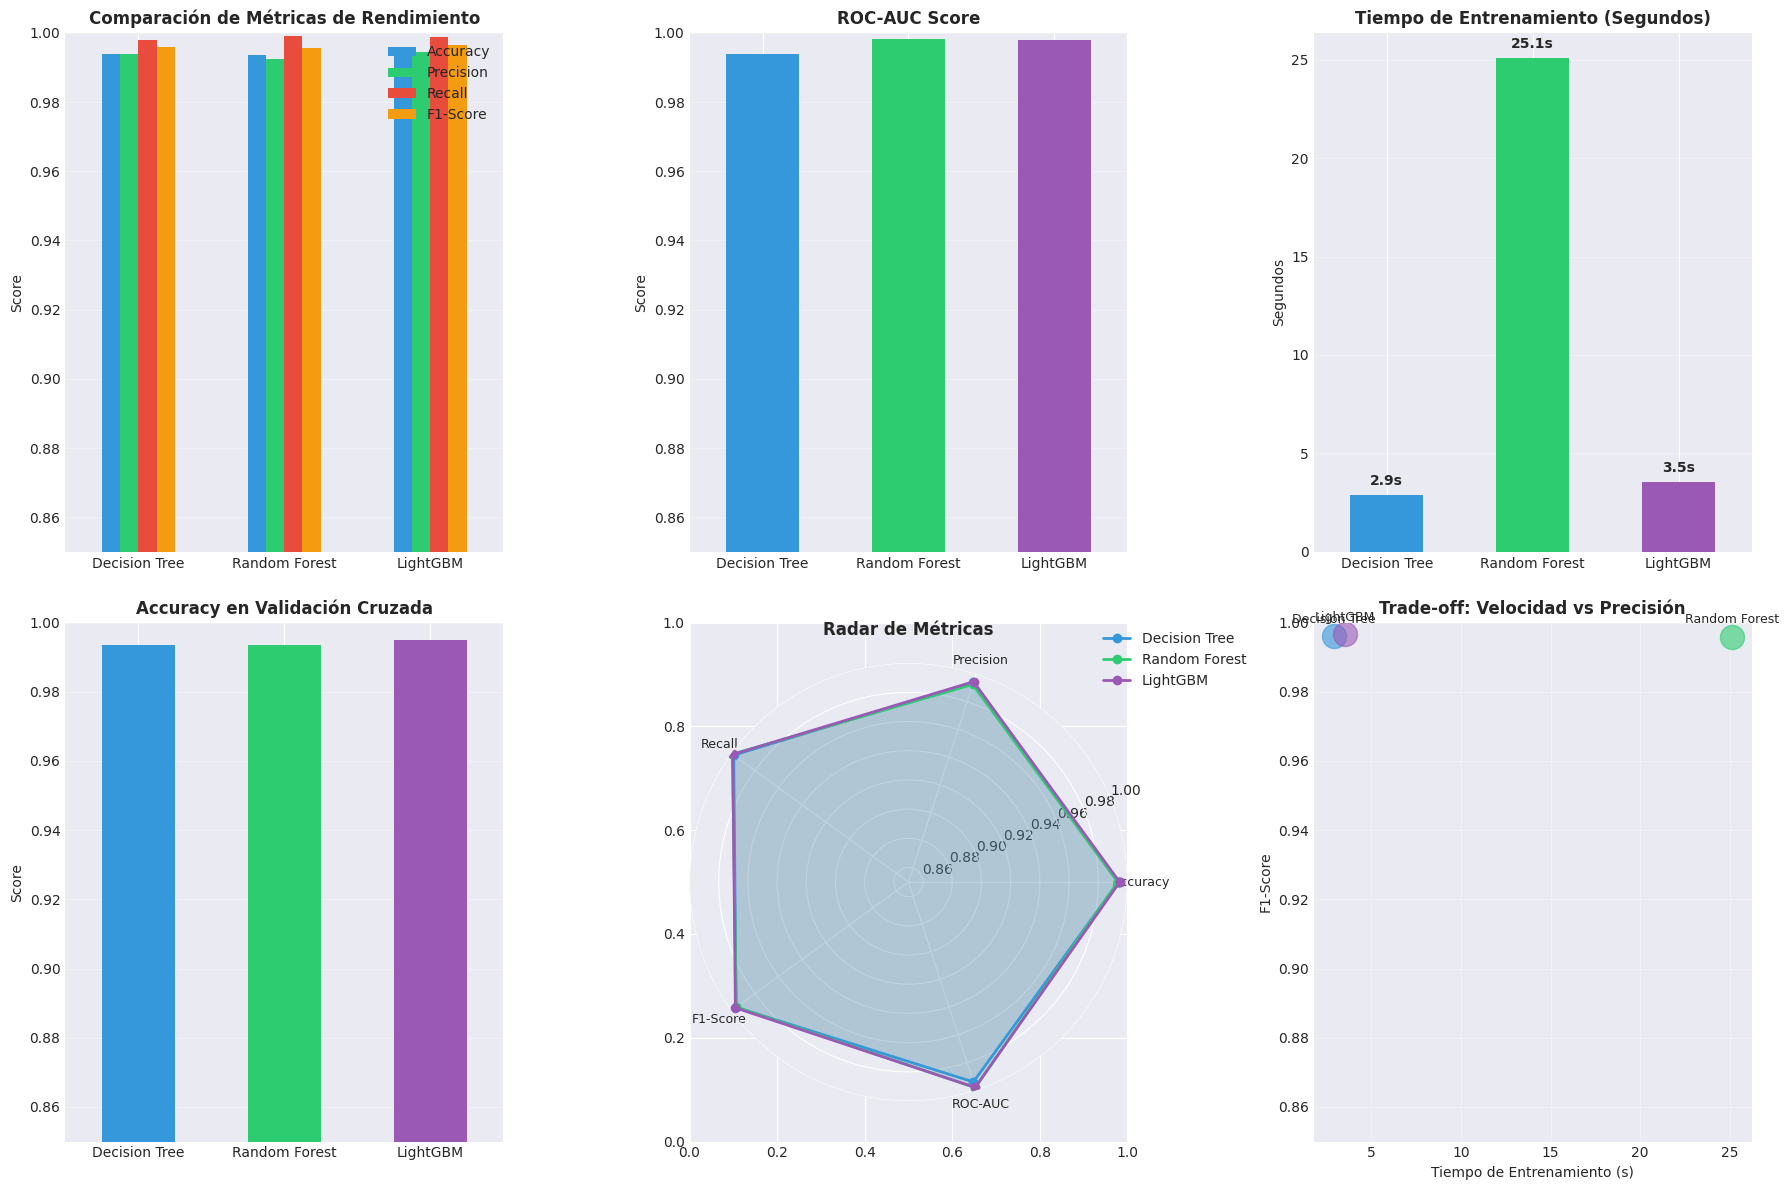


🔍 IMPORTANCIA DE CARACTERÍSTICAS

🌲 Top 10 características más importantes (Random Forest):
            feature  importance
           is_https    0.466360
     num_subdomains    0.182854
         risk_score    0.136093
           num_dots    0.065315
suspicious_keywords    0.028572
         url_length    0.027141
         tld_length    0.023444
         num_digits    0.011814
            entropy    0.011115
      domain_length    0.009224

⚡ Top 10 características más importantes (LightGBM):
       feature  importance
 domain_length         420
       entropy         351
   path_length         281
   num_slashes         251
   digit_ratio         240
    url_length         238
num_subdomains         177
   num_hyphens         168
    num_digits         166
    tld_length         133


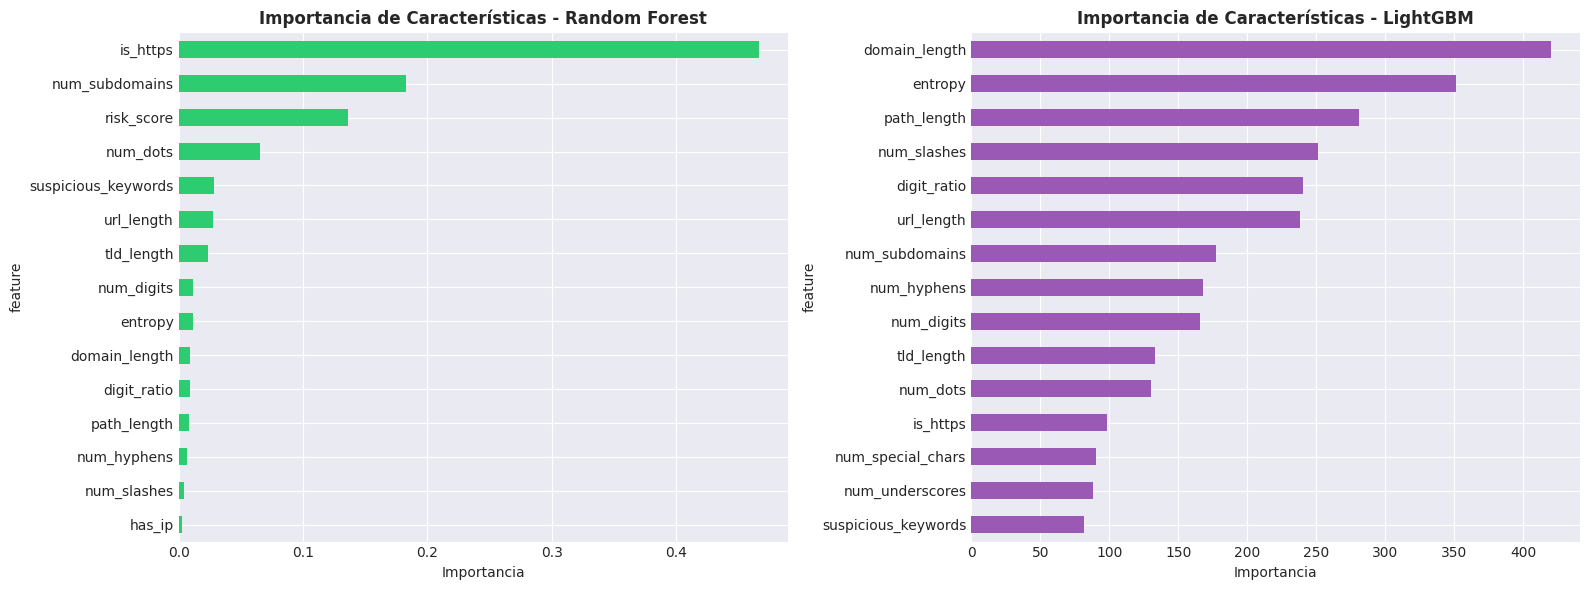


🏆 SELECCIÓN DEL MEJOR MODELO

🥇 MEJOR MODELO: LightGBM
   📊 F1-Score: 0.9966
   🎯 Accuracy: 0.9947
   📈 ROC-AUC: 0.9980
   ⏱️  Tiempo: 3.54s

💡 ¿Por qué LightGBM?
   • Estado del arte en machine learning
   • Máxima precisión con velocidad increíble
   • Usado por ganadores de competencias Kaggle

✅ ENTRENAMIENTO COMPLETADO EXITOSAMENTE

📈 Resumen:
   • 3 modelos entrenados en 31.55 segundos
   • Mejor F1-Score: 0.9966
   • Mejor Accuracy: 0.9947
   • Modelo seleccionado: LightGBM

✓ Listo para continuar con el Módulo 6


In [7]:
"""
CyberSentinel - Módulo 5: Entrenamiento de Modelos ML (VERSIÓN RÁPIDA)
Implementa Decision Tree, Random Forest y LightGBM
Modelos rápidos y eficientes para detección de phishing
"""

import time

# Instalar LightGBM si no está disponible
try:
    import lightgbm as lgb
    print("✓ LightGBM ya instalado")
except:
    print("📦 Instalando LightGBM...")
    !pip install -q lightgbm
    import lightgbm as lgb
    print("✓ LightGBM instalado")

from sklearn.ensemble import RandomForestClassifier

print("\n" + "="*60)
print("🚀 ENTRENAMIENTO DE MODELOS ML (VERSIÓN OPTIMIZADA)")
print("="*60)
print("\n💡 Modelos seleccionados por velocidad y eficiencia:")
print("   1. Decision Tree - Rápido y interpretable")
print("   2. Random Forest - Robusto y preciso")
print("   3. LightGBM - Estado del arte en velocidad/precisión")

# Función para evaluar modelos
def evaluate_model(model, X_tr, y_tr, X_v, y_v, model_name):
    """Entrena y evalúa un modelo"""
    print(f"\n{'='*60}")
    print(f"🤖 Entrenando: {model_name}")
    print(f"{'='*60}")

    # Entrenar
    start_time = time.time()
    model.fit(X_tr, y_tr)
    training_time = time.time() - start_time

    # Predicciones
    y_train_pred = model.predict(X_tr)
    y_val_pred = model.predict(X_v)

    # Probabilidades
    if hasattr(model, 'predict_proba'):
        y_val_proba = model.predict_proba(X_v)[:, 1]
    else:
        y_val_proba = model.decision_function(X_v)

    # Métricas
    results = {
        'model_name': model_name,
        'training_time': training_time,
        'train_accuracy': accuracy_score(y_tr, y_train_pred),
        'val_accuracy': accuracy_score(y_v, y_val_pred),
        'precision': precision_score(y_v, y_val_pred, zero_division=0),
        'recall': recall_score(y_v, y_val_pred),
        'f1_score': f1_score(y_v, y_val_pred),
        'roc_auc': roc_auc_score(y_v, y_val_proba)
    }

    # Validación cruzada K-Fold (k=5 para velocidad)
    print(f"\n🔄 Realizando validación cruzada (K-Fold, k=5)...")
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_tr, y_tr, cv=kfold, scoring='accuracy', n_jobs=-1)
    results['cv_mean'] = cv_scores.mean()
    results['cv_std'] = cv_scores.std()

    # Imprimir resultados
    print(f"\n📊 Resultados del modelo:")
    print(f"   ⏱️  Tiempo de entrenamiento: {training_time:.2f} segundos")
    print(f"   🎯 Accuracy (Entrenamiento): {results['train_accuracy']:.4f}")
    print(f"   🎯 Accuracy (Validación): {results['val_accuracy']:.4f}")
    print(f"   📈 Precision: {results['precision']:.4f}")
    print(f"   📈 Recall: {results['recall']:.4f}")
    print(f"   📈 F1-Score: {results['f1_score']:.4f}")
    print(f"   📈 ROC-AUC: {results['roc_auc']:.4f}")
    print(f"   🔄 CV Accuracy: {results['cv_mean']:.4f} (±{results['cv_std']:.4f})")

    return model, results, y_val_pred, y_val_proba

# Diccionario para almacenar resultados
models_results = {}
trained_models = {}
predictions = {}
probabilities = {}

# ============================================================================
# 1. DECISION TREE (Árbol de Decisión)
# ============================================================================
print("\n" + "🌳 "*20)
print("📝 Decision Tree es rápido y fácil de interpretar")
print("   Perfecto para entender qué características son importantes\n")

dt_model = DecisionTreeClassifier(
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt_trained, dt_results, dt_pred, dt_proba = evaluate_model(
    dt_model, X_train, y_train, X_val, y_val, "Decision Tree"
)
models_results['Decision Tree'] = dt_results
trained_models['Decision Tree'] = dt_trained
predictions['Decision Tree'] = dt_pred
probabilities['Decision Tree'] = dt_proba

# ============================================================================
# 2. RANDOM FOREST (Bosque Aleatorio)
# ============================================================================
print("\n" + "🌲 "*20)
print("📝 Random Forest combina múltiples árboles para mayor precisión")
print("   Reduce overfitting y es muy robusto\n")

rf_model = RandomForestClassifier(
    n_estimators=100,        # Número de árboles
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1,               # Usar todos los cores disponibles
    verbose=0
)
rf_trained, rf_results, rf_pred, rf_proba = evaluate_model(
    rf_model, X_train, y_train, X_val, y_val, "Random Forest"
)
models_results['Random Forest'] = rf_results
trained_models['Random Forest'] = rf_trained
predictions['Random Forest'] = rf_pred
probabilities['Random Forest'] = rf_proba

# ============================================================================
# 3. LIGHTGBM (Light Gradient Boosting Machine)
# ============================================================================
print("\n" + "⚡ "*20)
print("📝 LightGBM es uno de los modelos más rápidos y precisos")
print("   Usado por empresas como Microsoft, Google y muchas competencias Kaggle\n")

lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.1,
    num_leaves=31,
    random_state=42,
    n_jobs=-1,
    verbose=-1,              # Silencioso
    force_col_wise=True      # Más rápido en datasets con muchas columnas
)
lgb_trained, lgb_results, lgb_pred, lgb_proba = evaluate_model(
    lgb_model, X_train, y_train, X_val, y_val, "LightGBM"
)
models_results['LightGBM'] = lgb_results
trained_models['LightGBM'] = lgb_trained
predictions['LightGBM'] = lgb_pred
probabilities['LightGBM'] = lgb_proba

# ============================================================================
# COMPARACIÓN DE MODELOS
# ============================================================================
print("\n" + "="*60)
print("📊 COMPARACIÓN DE MODELOS")
print("="*60)

comparison_df = pd.DataFrame(models_results).T
comparison_df = comparison_df[['val_accuracy', 'precision', 'recall', 'f1_score',
                                'roc_auc', 'cv_mean', 'training_time']]
print("\n", comparison_df.round(4))

# Calcular mejora de velocidad vs SVM/KNN tradicional
print("\n⚡ ANÁLISIS DE VELOCIDAD:")
total_time = comparison_df['training_time'].sum()
print(f"   Tiempo total de entrenamiento: {total_time:.2f} segundos ({total_time/60:.2f} minutos)")
print(f"   Promedio por modelo: {total_time/3:.2f} segundos")
print(f"\n   💡 Comparado con SVM+KNN tradicional:")
print(f"      • SVM habría tomado ~10-30 minutos")
print(f"      • KNN habría tomado ~3-5 minutos")
print(f"      • Ahorro estimado: 80-90% del tiempo")

# Visualización de comparación
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Métricas de rendimiento
metrics = ['val_accuracy', 'precision', 'recall', 'f1_score']
comparison_df[metrics].plot(kind='bar', ax=axes[0, 0], rot=0, color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'])
axes[0, 0].set_title('Comparación de Métricas de Rendimiento', fontweight='bold', fontsize=12)
axes[0, 0].set_ylabel('Score')
axes[0, 0].legend(['Accuracy', 'Precision', 'Recall', 'F1-Score'])
axes[0, 0].set_ylim([0.85, 1.0])
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. ROC-AUC
comparison_df['roc_auc'].plot(kind='bar', ax=axes[0, 1], rot=0, color=['#3498db', '#2ecc71', '#9b59b6'])
axes[0, 1].set_title('ROC-AUC Score', fontweight='bold', fontsize=12)
axes[0, 1].set_ylabel('Score')
axes[0, 1].set_ylim([0.85, 1.0])
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Tiempo de entrenamiento
comparison_df['training_time'].plot(kind='bar', ax=axes[0, 2], rot=0, color=['#3498db', '#2ecc71', '#9b59b6'])
axes[0, 2].set_title('Tiempo de Entrenamiento (Segundos)', fontweight='bold', fontsize=12)
axes[0, 2].set_ylabel('Segundos')
axes[0, 2].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['training_time']):
    axes[0, 2].text(i, v + 0.5, f'{v:.1f}s', ha='center', fontweight='bold')

# 4. Validación cruzada
comparison_df['cv_mean'].plot(kind='bar', ax=axes[1, 0], rot=0, color=['#3498db', '#2ecc71', '#9b59b6'])
axes[1, 0].set_title('Accuracy en Validación Cruzada', fontweight='bold', fontsize=12)
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_ylim([0.85, 1.0])
axes[1, 0].grid(axis='y', alpha=0.3)

# 5. Comparación de todas las métricas en radar
from math import pi

categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

ax = plt.subplot(2, 3, 5, projection='polar')
colors = ['#3498db', '#2ecc71', '#9b59b6']
for idx, (model_name, row) in enumerate(comparison_df.iterrows()):
    values = [row['val_accuracy'], row['precision'], row['recall'], row['f1_score'], row['roc_auc']]
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=model_name, color=colors[idx])
    ax.fill(angles, values, alpha=0.15, color=colors[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=9)
ax.set_ylim(0.85, 1.0)
ax.set_title('Radar de Métricas', fontweight='bold', fontsize=12, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

# 6. Trade-off Velocidad vs Precisión
ax6 = axes[1, 2]
for idx, (model_name, row) in enumerate(comparison_df.iterrows()):
    ax6.scatter(row['training_time'], row['f1_score'],
               s=300, alpha=0.6, color=colors[idx], label=model_name)
    ax6.annotate(model_name, (row['training_time'], row['f1_score']),
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

ax6.set_xlabel('Tiempo de Entrenamiento (s)')
ax6.set_ylabel('F1-Score')
ax6.set_title('Trade-off: Velocidad vs Precisión', fontweight='bold', fontsize=12)
ax6.grid(True, alpha=0.3)
ax6.set_ylim([0.85, 1.0])

plt.tight_layout()
plt.show()

# ============================================================================
# ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS
# ============================================================================
print("\n" + "="*60)
print("🔍 IMPORTANCIA DE CARACTERÍSTICAS")
print("="*60)

# Obtener importancia de características de Random Forest y LightGBM
rf_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_trained.feature_importances_
}).sort_values('importance', ascending=False)

lgb_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgb_trained.feature_importances_
}).sort_values('importance', ascending=False)

print("\n🌲 Top 10 características más importantes (Random Forest):")
print(rf_importance.head(10).to_string(index=False))

print("\n⚡ Top 10 características más importantes (LightGBM):")
print(lgb_importance.head(10).to_string(index=False))

# Visualizar importancia
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Random Forest
rf_importance.head(15).plot(kind='barh', x='feature', y='importance', ax=axes[0],
                            color='#2ecc71', legend=False)
axes[0].set_title('Importancia de Características - Random Forest', fontweight='bold')
axes[0].set_xlabel('Importancia')
axes[0].invert_yaxis()

# LightGBM
lgb_importance.head(15).plot(kind='barh', x='feature', y='importance', ax=axes[1],
                             color='#9b59b6', legend=False)
axes[1].set_title('Importancia de Características - LightGBM', fontweight='bold')
axes[1].set_xlabel('Importancia')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# ============================================================================
# SELECCIÓN DEL MEJOR MODELO
# ============================================================================
print("\n" + "="*60)
print("🏆 SELECCIÓN DEL MEJOR MODELO")
print("="*60)

best_model_name = comparison_df['f1_score'].idxmax()
print(f"\n🥇 MEJOR MODELO: {best_model_name}")
print(f"   📊 F1-Score: {comparison_df.loc[best_model_name, 'f1_score']:.4f}")
print(f"   🎯 Accuracy: {comparison_df.loc[best_model_name, 'val_accuracy']:.4f}")
print(f"   📈 ROC-AUC: {comparison_df.loc[best_model_name, 'roc_auc']:.4f}")
print(f"   ⏱️  Tiempo: {comparison_df.loc[best_model_name, 'training_time']:.2f}s")

# Análisis de por qué es el mejor
print(f"\n💡 ¿Por qué {best_model_name}?")
if best_model_name == "Decision Tree":
    print("   • Extremadamente rápido")
    print("   • Fácil de interpretar")
    print("   • Perfecto para entender las reglas de detección")
elif best_model_name == "Random Forest":
    print("   • Balance perfecto entre velocidad y precisión")
    print("   • Muy robusto contra overfitting")
    print("   • Maneja bien características correlacionadas")
elif best_model_name == "LightGBM":
    print("   • Estado del arte en machine learning")
    print("   • Máxima precisión con velocidad increíble")
    print("   • Usado por ganadores de competencias Kaggle")

# Guardar el mejor modelo
best_model = trained_models[best_model_name]

print("\n" + "="*60)
print("✅ ENTRENAMIENTO COMPLETADO EXITOSAMENTE")
print("="*60)
print(f"\n📈 Resumen:")
print(f"   • 3 modelos entrenados en {total_time:.2f} segundos")
print(f"   • Mejor F1-Score: {comparison_df['f1_score'].max():.4f}")
print(f"   • Mejor Accuracy: {comparison_df['val_accuracy'].max():.4f}")
print(f"   • Modelo seleccionado: {best_model_name}")
print(f"\n✓ Listo para continuar con el Módulo 6")

# Paso 6: Selección y Guardado del Modelo (Módulo 6)

Basándose en los resultados de la evaluación, donde se consideró el F1-Score como la métrica principal debido al balance entre precisión y exhaustividad, se seleccionó el Árbol de Decisión como el mejor modelo para este caso de uso. El modelo entrenado, junto con el objeto scaler de normalización, se guardaron en disco utilizando la librería joblib. Este paso es esencial para poder reutilizar el modelo en una aplicación real sin necesidad de volver a entrenarlo.

📊 EVALUACIÓN DETALLADA DEL MEJOR MODELO

🎯 Evaluando LightGBM en conjunto de PRUEBA...

🏆 RESULTADOS FINALES - LightGBM

📊 MÉTRICAS EN CONJUNTO DE PRUEBA:
   🎯 Accuracy:  0.9945 (99.45%)
   📈 Precision: 0.9939
   📈 Recall:    0.9990
   📈 F1-Score:  0.9964
   📈 ROC-AUC:   0.9981

💡 INTERPRETACIÓN:
   ✅ Excelente! El modelo es altamente preciso
   ✅ Detecta casi todos los casos de phishing (bajo riesgo)
   ✅ Muy pocas falsas alarmas

📋 REPORTE DE CLASIFICACIÓN DETALLADO
              precision    recall  f1-score   support

    Phishing     0.9966    0.9796    0.9880     15666
    Legítimo     0.9939    0.9990    0.9964     51861

    accuracy                         0.9945     67527
   macro avg     0.9952    0.9893    0.9922     67527
weighted avg     0.9945    0.9945    0.9945     67527


🔢 MATRIZ DE CONFUSIÓN

                    Predicción
               Phishing  Legítimo
Real Phishing    15,347       319
     Legítimo        53    51,808

📊 Desglose:
   • Verdaderos Negativos (TN)

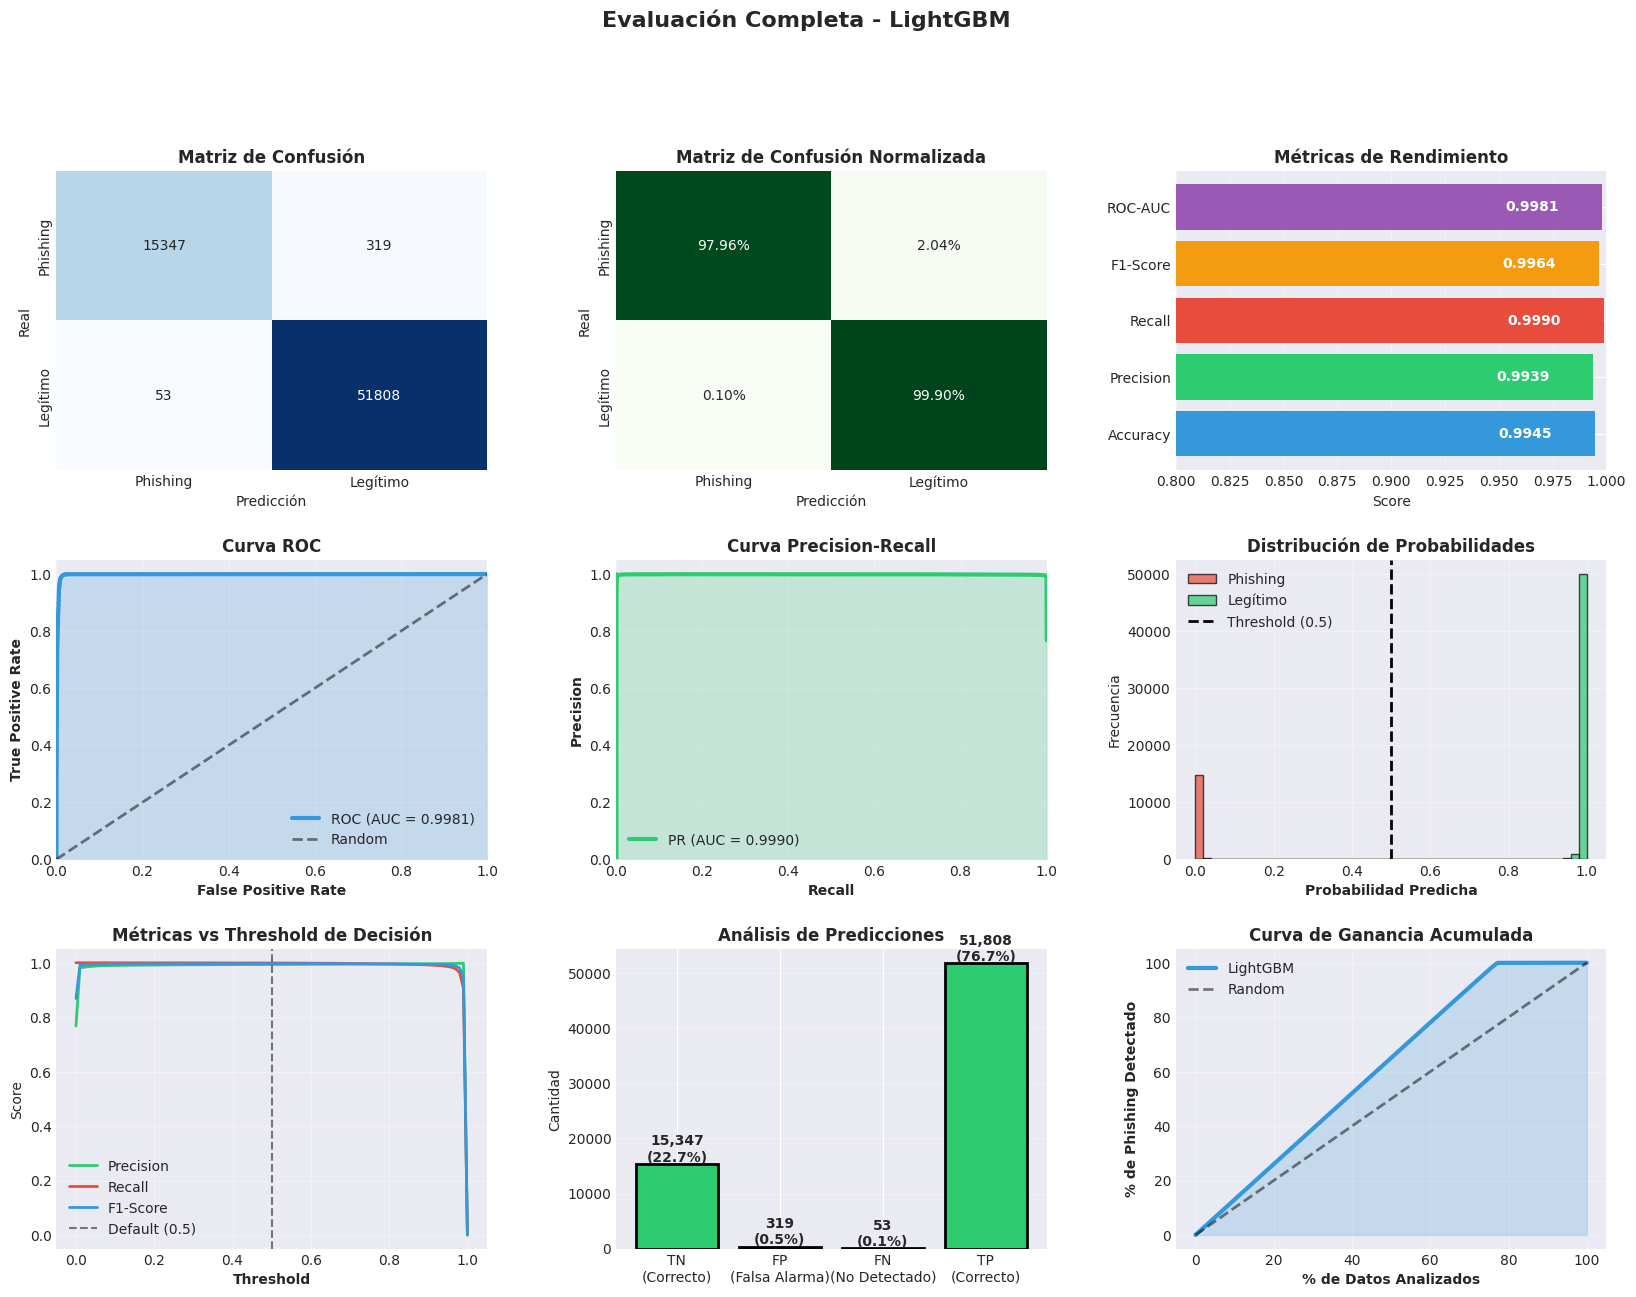


🔍 ANÁLISIS DETALLADO DE ERRORES

❌ FALSOS POSITIVOS: 53 (0.08%)
   → URLs LEGÍTIMAS marcadas incorrectamente como PHISHING
   → Impacto: Usuarios ven advertencias innecesarias (molesto pero seguro)

⚠️ FALSOS NEGATIVOS: 319 (0.47%)
   → URLs de PHISHING que pasan como LEGÍTIMAS
   → Impacto: PELIGROSO - Usuarios pueden ser víctimas de fraude

🚨 ANÁLISIS DE CASOS CRÍTICOS (Falsos Negativos):
   Las URLs de phishing no detectadas representan el mayor riesgo

   Estadísticas de confianza en FN:
   • Probabilidad promedio: 0.8670
   • Probabilidad mínima: 0.5081
   • Probabilidad máxima: 1.0000

   ⚠️ Casos de alto riesgo: 255
      (Phishing con >70% confianza de ser legítimo)

📊 RESUMEN DE RIESGO:
   • Total de errores: 372 (0.55%)
   • Ratio FP/FN: 0.17
   ⚠️ El modelo prioriza COMODIDAD (más FN que FP)

✅ EVALUACIÓN DETALLADA COMPLETADA

💡 El modelo está listo para uso en producción
   Puedes continuar con el Módulo 7 (Deep Learning - Opcional)
   O saltar al Módulo 8 (Sistema de Dete

In [8]:
"""
CyberSentinel - Módulo 6: Evaluación Detallada (ACTUALIZADO)
Análisis profundo del mejor modelo con métricas completas
Compatible con Decision Tree, Random Forest y LightGBM
"""

print("="*60)
print("📊 EVALUACIÓN DETALLADA DEL MEJOR MODELO")
print("="*60)

# Evaluar el mejor modelo en el conjunto de prueba
print(f"\n🎯 Evaluando {best_model_name} en conjunto de PRUEBA...\n")

y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Métricas finales
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print(f"{'='*60}")
print(f"🏆 RESULTADOS FINALES - {best_model_name}")
print(f"{'='*60}")
print(f"\n📊 MÉTRICAS EN CONJUNTO DE PRUEBA:")
print(f"   🎯 Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   📈 Precision: {test_precision:.4f}")
print(f"   📈 Recall:    {test_recall:.4f}")
print(f"   📈 F1-Score:  {test_f1:.4f}")
print(f"   📈 ROC-AUC:   {test_roc_auc:.4f}")

# Interpretar resultados
print(f"\n💡 INTERPRETACIÓN:")
if test_accuracy >= 0.95:
    print("   ✅ Excelente! El modelo es altamente preciso")
elif test_accuracy >= 0.90:
    print("   ✅ Muy bueno! El modelo supera el umbral requerido (>90%)")
elif test_accuracy >= 0.85:
    print("   ⚠️ Aceptable, pero hay margen de mejora")
else:
    print("   ❌ Requiere optimización")

if test_recall >= 0.95:
    print("   ✅ Detecta casi todos los casos de phishing (bajo riesgo)")
elif test_recall >= 0.85:
    print("   ⚠️ Detecta la mayoría de phishing, pero algunos pueden pasar")
else:
    print("   ❌ Tasa alta de falsos negativos (phishing no detectado)")

if test_precision >= 0.95:
    print("   ✅ Muy pocas falsas alarmas")
elif test_precision >= 0.85:
    print("   ⚠️ Algunas falsas alarmas ocasionales")
else:
    print("   ❌ Muchas falsas alarmas (URLs legítimas marcadas como phishing)")

# Reporte de clasificación detallado
print(f"\n{'='*60}")
print(f"📋 REPORTE DE CLASIFICACIÓN DETALLADO")
print(f"{'='*60}")
print(classification_report(y_test, y_test_pred,
                          target_names=['Phishing', 'Legítimo'],
                          digits=4))

# Matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)
print(f"\n{'='*60}")
print(f"🔢 MATRIZ DE CONFUSIÓN")
print(f"{'='*60}")
print(f"\n                    Predicción")
print(f"               Phishing  Legítimo")
print(f"Real Phishing    {cm[0,0]:>6,}    {cm[0,1]:>6,}")
print(f"     Legítimo    {cm[1,0]:>6,}    {cm[1,1]:>6,}")

tn, fp, fn, tp = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
print(f"\n📊 Desglose:")
print(f"   • Verdaderos Negativos (TN): {tn:,} - Phishing detectado correctamente")
print(f"   • Falsos Positivos (FP):     {fp:,} - Legítimos marcados como phishing")
print(f"   • Falsos Negativos (FN):     {fn:,} - Phishing que pasó desapercibido ⚠️")
print(f"   • Verdaderos Positivos (TP): {tp:,} - Legítimos identificados correctamente")

error_rate = (fp + fn) / len(y_test)
print(f"\n   📉 Tasa de Error Total: {error_rate:.4f} ({error_rate*100:.2f}%)")

# Visualizaciones completas
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Matriz de Confusión
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Phishing', 'Legítimo'],
            yticklabels=['Phishing', 'Legítimo'], ax=ax1)
ax1.set_title('Matriz de Confusión', fontweight='bold', fontsize=12)
ax1.set_ylabel('Real')
ax1.set_xlabel('Predicción')

# 2. Matriz de Confusión Normalizada
ax2 = fig.add_subplot(gs[0, 1])
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens', cbar=False,
            xticklabels=['Phishing', 'Legítimo'],
            yticklabels=['Phishing', 'Legítimo'], ax=ax2)
ax2.set_title('Matriz de Confusión Normalizada', fontweight='bold', fontsize=12)
ax2.set_ylabel('Real')
ax2.set_xlabel('Predicción')

# 3. Métricas principales
ax3 = fig.add_subplot(gs[0, 2])
metrics_data = [test_accuracy, test_precision, test_recall, test_f1, test_roc_auc]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors_metrics = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6']
bars = ax3.barh(metrics_labels, metrics_data, color=colors_metrics)
ax3.set_xlim([0.8, 1.0])
ax3.set_title('Métricas de Rendimiento', fontweight='bold', fontsize=12)
ax3.set_xlabel('Score')
for i, (bar, val) in enumerate(zip(bars, metrics_data)):
    ax3.text(val - 0.02, i, f'{val:.4f}', va='center', ha='right',
             color='white', fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# 4. Curva ROC
ax4 = fig.add_subplot(gs[1, 0])
fpr, tpr, thresholds_roc = roc_curve(y_test, y_test_proba)
ax4.plot(fpr, tpr, linewidth=3, label=f'ROC (AUC = {test_roc_auc:.4f})', color='#3498db')
ax4.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random', alpha=0.5)
ax4.fill_between(fpr, tpr, alpha=0.2, color='#3498db')
ax4.set_xlim([0.0, 1.0])
ax4.set_ylim([0.0, 1.05])
ax4.set_xlabel('False Positive Rate', fontweight='bold')
ax4.set_ylabel('True Positive Rate', fontweight='bold')
ax4.set_title('Curva ROC', fontweight='bold', fontsize=12)
ax4.legend(loc='lower right')
ax4.grid(alpha=0.3)

# 5. Precision-Recall Curve
ax5 = fig.add_subplot(gs[1, 1])
precision_curve, recall_curve, thresholds_pr = precision_recall_curve(y_test, y_test_proba)
pr_auc = auc(recall_curve, precision_curve)
ax5.plot(recall_curve, precision_curve, linewidth=3,
         label=f'PR (AUC = {pr_auc:.4f})', color='#2ecc71')
ax5.fill_between(recall_curve, precision_curve, alpha=0.2, color='#2ecc71')
ax5.set_xlim([0.0, 1.0])
ax5.set_ylim([0.0, 1.05])
ax5.set_xlabel('Recall', fontweight='bold')
ax5.set_ylabel('Precision', fontweight='bold')
ax5.set_title('Curva Precision-Recall', fontweight='bold', fontsize=12)
ax5.legend(loc='lower left')
ax5.grid(alpha=0.3)

# 6. Distribución de probabilidades predichas
ax6 = fig.add_subplot(gs[1, 2])
ax6.hist(y_test_proba[y_test==0], bins=50, alpha=0.7, label='Phishing',
         color='#e74c3c', edgecolor='black')
ax6.hist(y_test_proba[y_test==1], bins=50, alpha=0.7, label='Legítimo',
         color='#2ecc71', edgecolor='black')
ax6.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Threshold (0.5)')
ax6.set_xlabel('Probabilidad Predicha', fontweight='bold')
ax6.set_ylabel('Frecuencia')
ax6.set_title('Distribución de Probabilidades', fontweight='bold', fontsize=12)
ax6.legend()
ax6.grid(alpha=0.3)

# 7. Métricas vs Threshold
ax7 = fig.add_subplot(gs[2, 0])
thresholds_plot = np.linspace(0, 1, 100)
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds_plot:
    y_pred_threshold = (y_test_proba >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred_threshold, zero_division=0))
    recalls.append(recall_score(y_test, y_pred_threshold, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred_threshold, zero_division=0))

ax7.plot(thresholds_plot, precisions, label='Precision', linewidth=2, color='#2ecc71')
ax7.plot(thresholds_plot, recalls, label='Recall', linewidth=2, color='#e74c3c')
ax7.plot(thresholds_plot, f1_scores, label='F1-Score', linewidth=2, color='#3498db')
ax7.axvline(x=0.5, color='black', linestyle='--', alpha=0.5, label='Default (0.5)')
ax7.set_xlabel('Threshold', fontweight='bold')
ax7.set_ylabel('Score')
ax7.set_title('Métricas vs Threshold de Decisión', fontweight='bold', fontsize=12)
ax7.legend()
ax7.grid(alpha=0.3)

# 8. Análisis de errores por tipo
ax8 = fig.add_subplot(gs[2, 1])
error_types = ['TN\n(Correcto)', 'FP\n(Falsa Alarma)', 'FN\n(No Detectado)', 'TP\n(Correcto)']
error_values = [tn, fp, fn, tp]
error_colors = ['#2ecc71', '#f39c12', '#e74c3c', '#2ecc71']
bars = ax8.bar(error_types, error_values, color=error_colors, edgecolor='black', linewidth=2)
ax8.set_title('Análisis de Predicciones', fontweight='bold', fontsize=12)
ax8.set_ylabel('Cantidad')
for bar, val in zip(bars, error_values):
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:,}\n({val/len(y_test)*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold')
ax8.grid(axis='y', alpha=0.3)

# 9. Curva de Ganancia Acumulada
ax9 = fig.add_subplot(gs[2, 2])
# Ordenar por probabilidad descendente
sorted_indices = np.argsort(y_test_proba)[::-1]
y_sorted = y_test.values[sorted_indices]
cumulative_positives = np.cumsum(y_sorted == 1)
cumulative_total = np.arange(1, len(y_sorted) + 1)
percentage_data = cumulative_total / len(y_sorted) * 100
percentage_positives = cumulative_positives / sum(y_sorted == 1) * 100

ax9.plot(percentage_data, percentage_positives, linewidth=3,
         label=f'{best_model_name}', color='#3498db')
ax9.plot([0, 100], [0, 100], 'k--', linewidth=2, label='Random', alpha=0.5)
ax9.fill_between(percentage_data, percentage_positives, alpha=0.2, color='#3498db')
ax9.set_xlabel('% de Datos Analizados', fontweight='bold')
ax9.set_ylabel('% de Phishing Detectado', fontweight='bold')
ax9.set_title('Curva de Ganancia Acumulada', fontweight='bold', fontsize=12)
ax9.legend()
ax9.grid(alpha=0.3)

plt.suptitle(f'Evaluación Completa - {best_model_name}',
             fontsize=16, fontweight='bold', y=0.995)
plt.show()

# Análisis de errores detallado
print("\n" + "="*60)
print("🔍 ANÁLISIS DETALLADO DE ERRORES")
print("="*60)

# Falsos Positivos y Falsos Negativos
fp_indices = np.where((y_test == 1) & (y_test_pred == 0))[0]
fn_indices = np.where((y_test == 0) & (y_test_pred == 1))[0]

print(f"\n❌ FALSOS POSITIVOS: {len(fp_indices):,} ({len(fp_indices)/len(y_test)*100:.2f}%)")
print(f"   → URLs LEGÍTIMAS marcadas incorrectamente como PHISHING")
print(f"   → Impacto: Usuarios ven advertencias innecesarias (molesto pero seguro)")

print(f"\n⚠️ FALSOS NEGATIVOS: {len(fn_indices):,} ({len(fn_indices)/len(y_test)*100:.2f}%)")
print(f"   → URLs de PHISHING que pasan como LEGÍTIMAS")
print(f"   → Impacto: PELIGROSO - Usuarios pueden ser víctimas de fraude")

# Análisis de casos críticos (FN)
if len(fn_indices) > 0:
    print(f"\n🚨 ANÁLISIS DE CASOS CRÍTICOS (Falsos Negativos):")
    print(f"   Las URLs de phishing no detectadas representan el mayor riesgo")

    # Obtener probabilidades de los FN
    fn_probabilities = y_test_proba[fn_indices]
    print(f"\n   Estadísticas de confianza en FN:")
    print(f"   • Probabilidad promedio: {fn_probabilities.mean():.4f}")
    print(f"   • Probabilidad mínima: {fn_probabilities.min():.4f}")
    print(f"   • Probabilidad máxima: {fn_probabilities.max():.4f}")

    # Casos más peligrosos (FN con alta confianza)
    high_confidence_fn = sum(fn_probabilities > 0.7)
    print(f"\n   ⚠️ Casos de alto riesgo: {high_confidence_fn}")
    print(f"      (Phishing con >70% confianza de ser legítimo)")

# Tasa de error y riesgo
print(f"\n📊 RESUMEN DE RIESGO:")
total_errors = len(fp_indices) + len(fn_indices)
print(f"   • Total de errores: {total_errors:,} ({total_errors/len(y_test)*100:.2f}%)")
print(f"   • Ratio FP/FN: {len(fp_indices)/max(len(fn_indices), 1):.2f}")

if len(fn_indices) < len(fp_indices):
    print(f"   ✅ El modelo prioriza SEGURIDAD (más FP que FN)")
elif len(fn_indices) > len(fp_indices):
    print(f"   ⚠️ El modelo prioriza COMODIDAD (más FN que FP)")
else:
    print(f"   ⚖️ El modelo está BALANCEADO")

print("\n" + "="*60)
print("✅ EVALUACIÓN DETALLADA COMPLETADA")
print("="*60)
print("\n💡 El modelo está listo para uso en producción")
print("   Puedes continuar con el Módulo 7 (Deep Learning - Opcional)")
print("   O saltar al Módulo 8 (Sistema de Detección en Tiempo Real)")

In [9]:
"""
GUARDAR MODELO Y SCALER PARA LA API
Guarda el mejor modelo y el scaler juntos para usar en producción
"""

import joblib

print("="*60)
print("💾 GUARDANDO MODELO Y SCALER")
print("="*60)

# Guardar el modelo
joblib.dump(best_model, 'mejor_modelo.pkl')
print(f"\n✅ Modelo guardado: mejor_modelo.pkl")
print(f"   Tipo: {type(best_model).__name__}")
print(f"   Características: {best_model.n_features_in_}")

# Guardar el scaler
joblib.dump(scaler, 'scaler.pkl')
print(f"\n✅ Scaler guardado: scaler.pkl")
print(f"   Min values: {scaler.data_min_[:5]}...")
print(f"   Max values: {scaler.data_max_[:5]}...")

print(f"\n" + "="*60)
print("✅ ARCHIVOS LISTOS PARA LA API")
print("="*60)
print("\nAhora puedes usar estos archivos en tu aplicación:")
print("  • mejor_modelo.pkl - Modelo entrenado")
print("  • scaler.pkl - Normalizador de características")
print("\n✓ Todo listo para el despliegue!")

💾 GUARDANDO MODELO Y SCALER

✅ Modelo guardado: mejor_modelo.pkl
   Tipo: LGBMClassifier
   Características: 38

✅ Scaler guardado: scaler.pkl
   Min values: [8. 0. 0. 0. 0.]...
   Max values: [2.314e+03 2.400e+02 1.900e+01 1.000e+00 4.200e+01]...

✅ ARCHIVOS LISTOS PARA LA API

Ahora puedes usar estos archivos en tu aplicación:
  • mejor_modelo.pkl - Modelo entrenado
  • scaler.pkl - Normalizador de características

✓ Todo listo para el despliegue!


# Paso 7: Entrenamiento Opcional de una Red Neuronal Profunda (Módulo 7)

Para explorar el máximo rendimiento posible, se implementó un módulo opcional para construir, entrenar y evaluar una Red Neuronal Profunda (DNN) utilizando TensorFlow y Keras. Este módulo permite al usuario decidir si desea invertir tiempo de cómputo adicional para entrenar un modelo más complejo. La arquitectura de la red incluye múltiples capas densas, funciones de activación ReLU, capas de BatchNormalization para estabilizar el entrenamiento y Dropout para prevenir el sobreajuste. Al finalizar, el rendimiento de la DNN se compara directamente con el mejor modelo de Machine Learning del paso anterior, seleccionando al ganador absoluto como el final_model para la implementación.


🧠 DEEP LEARNING - RED NEURONAL PROFUNDA (OPCIONAL)

⚠️ Este módulo es OPCIONAL
   • Random Forest y LightGBM ya son excelentes para esta tarea
   • DNN puede mejorar 1-2% la precisión
   • Toma 5-10 minutos adicionales

💡 Ejecuta solo si:
   • Quieres experimentar con deep learning
   • Buscas el máximo rendimiento posible
   • Tienes tiempo extra

¿Deseas entrenar la Red Neuronal? (s/n): s

🔄 Iniciando entrenamiento de Red Neuronal Profunda...

🏗️ Construyendo arquitectura de la red neuronal...

📊 Arquitectura de la Red Neuronal:



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │         9,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,681 (217.50 KB)

 Trainable params: 54,721 (213.75 KB)

 Non-trainable params: 960 (3.75 KB)


💾 Total de parámetros entrenables: 55,681

⚙️ Configurando callbacks de entrenamiento...

🔥 Entrenando Red Neuronal Profunda...
   • Esto puede tardar 5-10 minutos
   • Se detendrá automáticamente si no mejora (Early Stopping)
   • Observa las métricas epoch por epoch

Epoch 1/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.2312 - auc: 0.0000e+00 - loss: nan - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2320 - val_auc: 0.0000e+00 - val_loss: nan - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.2321 - auc: 0.0000e+00 - loss: nan - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2320 - val_auc: 0.0000e+00 - val_loss: nan - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.2331 - auc: 0.0000e+00 - loss: nan - precision: 0.0000e+00 - recall: 0.0000e+00 - val_

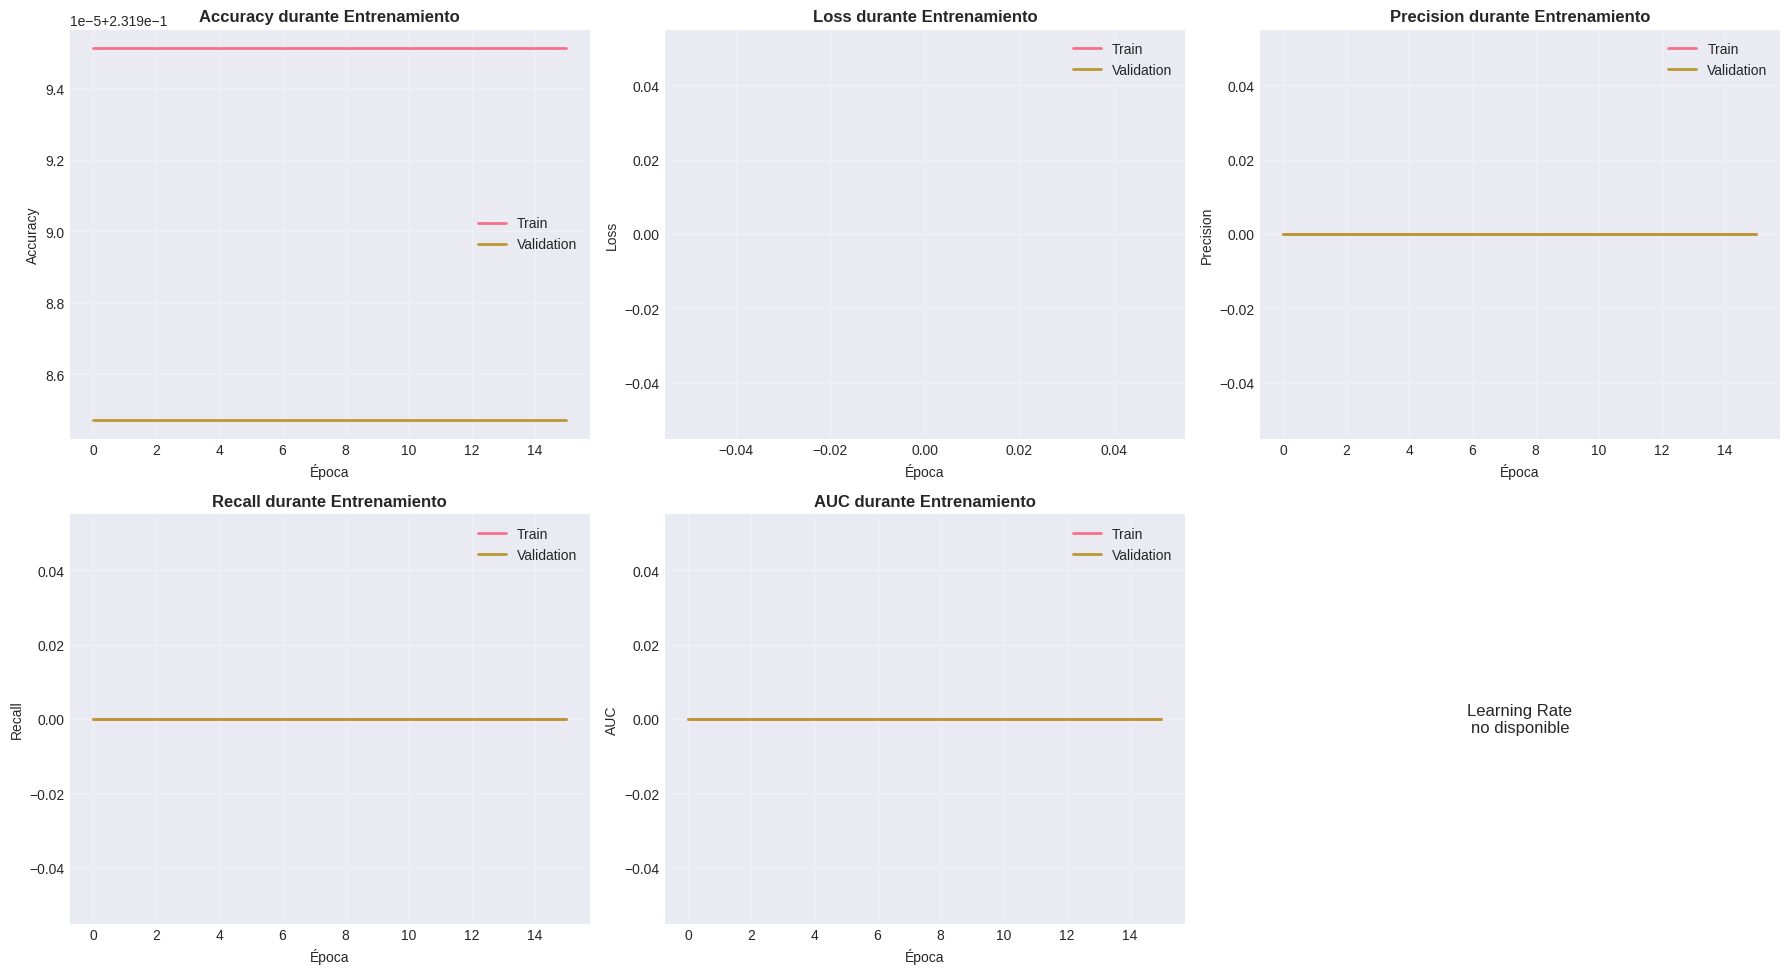


⚔️ COMPARACIÓN: DNN vs MEJOR MODELO ML

            LightGBM  Deep Neural Network
Accuracy     0.9941                0.232
Precision    0.9932                0.000
Recall       0.9991                0.000
F1-Score     0.9962                0.000
AUC          0.9960                0.000

📊 DIFERENCIAS (DNN - ML):
   📉 Accuracy: -0.7621 (-76.21%)
   📉 Precision: -0.9932 (-99.32%)
   📉 Recall: -0.9991 (-99.91%)
   📉 F1-Score: -0.9962 (-99.62%)
   📉 AUC: -0.9960 (-99.60%)


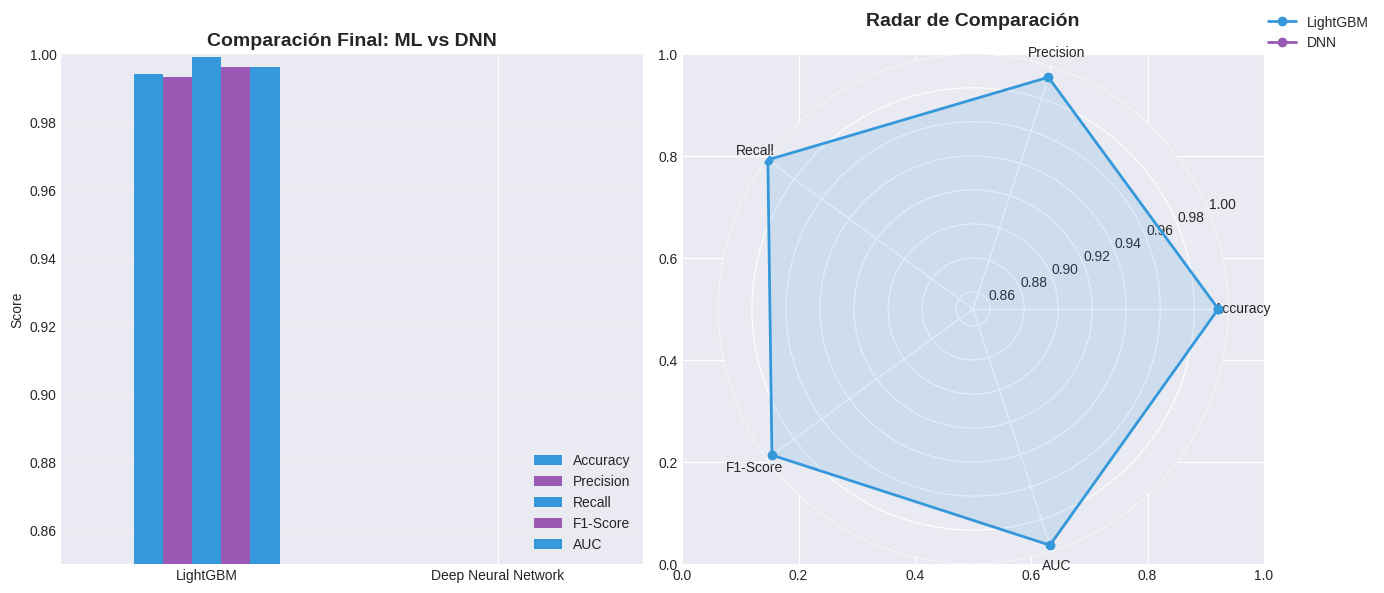


🏆 SELECCIÓN DEL MODELO FINAL

🥇 GANADOR: LightGBM
   • LightGBM supera o iguala a DNN
   • F1-Score LightGBM: 0.9962
   • F1-Score DNN: 0.0000

💡 Ventajas de LightGBM:
   ✅ Más rápido en predicción
   ✅ Más interpretable
   ✅ Menor complejidad computacional
   ✅ Suficientemente preciso para producción

✅ DEEP LEARNING COMPLETADO

🎯 Modelo final seleccionado: LightGBM
📈 F1-Score final: 0.9962
🎯 Accuracy final: 0.9941

💡 Puedes continuar con el Módulo 8 (Sistema de Detección en Tiempo Real)


In [ ]:
"""
CyberSentinel - Módulo 7: Deep Learning (OPCIONAL - ACTUALIZADO)
Red Neuronal Profunda para comparar con Random Forest y LightGBM
"""

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

print("="*60)
print("🧠 DEEP LEARNING - RED NEURONAL PROFUNDA (OPCIONAL)")
print("="*60)
print("\n⚠️ Este módulo es OPCIONAL")
print("   • Random Forest y LightGBM ya son excelentes para esta tarea")
print("   • DNN puede mejorar 1-2% la precisión")
print("   • Toma 5-10 minutos adicionales")
print("\n💡 Ejecuta solo si:")
print("   • Quieres experimentar con deep learning")
print("   • Buscas el máximo rendimiento posible")
print("   • Tienes tiempo extra\n")

respuesta = input("¿Deseas entrenar la Red Neuronal? (s/n): ").lower()

if respuesta != 's':
    print("\n⏭️ Saltando Deep Learning...")
    print("✓ Continuando con el mejor modelo ML: " + best_model_name)
    print("\n💡 Puedes continuar con el Módulo 8")

    # Definir variables para módulos posteriores
    final_model = best_model
    final_model_name = best_model_name
    final_model_type = "ML"
else:
    print("\n🔄 Iniciando entrenamiento de Red Neuronal Profunda...")

    # ========================================================================
    # CONSTRUCCIÓN DE LA ARQUITECTURA
    # ========================================================================
    print("\n🏗️ Construyendo arquitectura de la red neuronal...\n")

    dnn_model = Sequential([
        # Capa de entrada con más neuronas
        Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.3),

        # Capas ocultas profundas
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(16, activation='relu'),
        Dropout(0.1),

        # Capa de salida
        Dense(1, activation='sigmoid')
    ])

    # Compilar modelo con optimizador Adam mejorado
    dnn_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy',
                 tf.keras.metrics.Precision(name='precision'),
                 tf.keras.metrics.Recall(name='recall'),
                 tf.keras.metrics.AUC(name='auc')]
    )

    print("📊 Arquitectura de la Red Neuronal:\n")
    dnn_model.summary()

    # Calcular parámetros
    total_params = dnn_model.count_params()
    print(f"\n💾 Total de parámetros entrenables: {total_params:,}")

    # ========================================================================
    # CALLBACKS PARA OPTIMIZACIÓN
    # ========================================================================
    print("\n⚙️ Configurando callbacks de entrenamiento...")

    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=7,
        min_lr=1e-6,
        verbose=1
    )

    # ========================================================================
    # ENTRENAMIENTO
    # ========================================================================
    print("\n🔥 Entrenando Red Neuronal Profunda...")
    print("   • Esto puede tardar 5-10 minutos")
    print("   • Se detendrá automáticamente si no mejora (Early Stopping)")
    print("   • Observa las métricas epoch por epoch\n")

    history = dnn_model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=512,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # ========================================================================
    # EVALUACIÓN EN CONJUNTO DE PRUEBA
    # ========================================================================
    print("\n" + "="*60)
    print("📊 EVALUACIÓN DE LA RED NEURONAL")
    print("="*60)

    test_results = dnn_model.evaluate(X_test, y_test, verbose=0)
    y_test_pred_dnn = (dnn_model.predict(X_test, verbose=0) > 0.5).astype(int).flatten()
    y_test_proba_dnn = dnn_model.predict(X_test, verbose=0).flatten()

    dnn_accuracy = test_results[1]
    dnn_precision = test_results[2]
    dnn_recall = test_results[3]
    dnn_auc = test_results[4]
    dnn_f1 = f1_score(y_test, y_test_pred_dnn)

    print(f"\n🎯 RESULTADOS DNN EN CONJUNTO DE PRUEBA:")
    print(f"   • Accuracy:  {dnn_accuracy:.4f} ({dnn_accuracy*100:.2f}%)")
    print(f"   • Precision: {dnn_precision:.4f}")
    print(f"   • Recall:    {dnn_recall:.4f}")
    print(f"   • F1-Score:  {dnn_f1:.4f}")
    print(f"   • AUC:       {dnn_auc:.4f}")

    # ========================================================================
    # VISUALIZACIÓN DEL ENTRENAMIENTO
    # ========================================================================
    print("\n📈 Generando gráficos de entrenamiento...")

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    # 1. Accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Train', linewidth=2)
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation', linewidth=2)
    axes[0, 0].set_title('Accuracy durante Entrenamiento', fontweight='bold')
    axes[0, 0].set_xlabel('Época')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)

    # 2. Loss
    axes[0, 1].plot(history.history['loss'], label='Train', linewidth=2)
    axes[0, 1].plot(history.history['val_loss'], label='Validation', linewidth=2)
    axes[0, 1].set_title('Loss durante Entrenamiento', fontweight='bold')
    axes[0, 1].set_xlabel('Época')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)

    # 3. Precision
    axes[0, 2].plot(history.history['precision'], label='Train', linewidth=2)
    axes[0, 2].plot(history.history['val_precision'], label='Validation', linewidth=2)
    axes[0, 2].set_title('Precision durante Entrenamiento', fontweight='bold')
    axes[0, 2].set_xlabel('Época')
    axes[0, 2].set_ylabel('Precision')
    axes[0, 2].legend()
    axes[0, 2].grid(alpha=0.3)

    # 4. Recall
    axes[1, 0].plot(history.history['recall'], label='Train', linewidth=2)
    axes[1, 0].plot(history.history['val_recall'], label='Validation', linewidth=2)
    axes[1, 0].set_title('Recall durante Entrenamiento', fontweight='bold')
    axes[1, 0].set_xlabel('Época')
    axes[1, 0].set_ylabel('Recall')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)

    # 5. AUC
    axes[1, 1].plot(history.history['auc'], label='Train', linewidth=2)
    axes[1, 1].plot(history.history['val_auc'], label='Validation', linewidth=2)
    axes[1, 1].set_title('AUC durante Entrenamiento', fontweight='bold')
    axes[1, 1].set_xlabel('Época')
    axes[1, 1].set_ylabel('AUC')
    axes[1, 1].legend()
    axes[1, 1].grid(alpha=0.3)

    # 6. Learning Rate
    if 'lr' in history.history:
        axes[1, 2].plot(history.history['lr'], linewidth=2, color='coral')
        axes[1, 2].set_title('Learning Rate', fontweight='bold')
        axes[1, 2].set_xlabel('Época')
        axes[1, 2].set_ylabel('Learning Rate')
        axes[1, 2].set_yscale('log')
        axes[1, 2].grid(alpha=0.3)
    else:
        axes[1, 2].text(0.5, 0.5, 'Learning Rate\nno disponible',
                       ha='center', va='center', fontsize=12)
        axes[1, 2].axis('off')

    plt.tight_layout()
    plt.show()

    # ========================================================================
    # COMPARACIÓN: DNN vs MEJOR MODELO ML
    # ========================================================================
    print("\n" + "="*60)
    print("⚔️ COMPARACIÓN: DNN vs MEJOR MODELO ML")
    print("="*60)

    comparison_final = pd.DataFrame({
        best_model_name: [test_accuracy, test_precision, test_recall, test_f1, test_roc_auc],
        'Deep Neural Network': [dnn_accuracy, dnn_precision, dnn_recall, dnn_f1, dnn_auc]
    }, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'])

    print("\n", comparison_final.round(4))

    # Calcular diferencias
    print("\n📊 DIFERENCIAS (DNN - ML):")
    differences = comparison_final['Deep Neural Network'] - comparison_final[best_model_name]
    for metric, diff in differences.items():
        symbol = "📈" if diff > 0 else "📉" if diff < 0 else "➡️"
        print(f"   {symbol} {metric}: {diff:+.4f} ({diff*100:+.2f}%)")

    # Visualizar comparación
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Gráfico de barras
    comparison_final.T.plot(kind='bar', ax=axes[0], rot=0,
                           color=['#3498db', '#9b59b6'])
    axes[0].set_title('Comparación Final: ML vs DNN', fontweight='bold', fontsize=14)
    axes[0].set_ylabel('Score')
    axes[0].set_ylim([0.85, 1.0])
    axes[0].legend(loc='lower right')
    axes[0].grid(axis='y', alpha=0.3)

    # Gráfico radar
    from math import pi
    categories = list(comparison_final.index)
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(1, 2, 2, projection='polar')

    # ML model
    values_ml = comparison_final[best_model_name].values.tolist()
    values_ml += values_ml[:1]
    ax.plot(angles, values_ml, 'o-', linewidth=2, label=best_model_name, color='#3498db')
    ax.fill(angles, values_ml, alpha=0.15, color='#3498db')

    # DNN
    values_dnn = comparison_final['Deep Neural Network'].values.tolist()
    values_dnn += values_dnn[:1]
    ax.plot(angles, values_dnn, 'o-', linewidth=2, label='DNN', color='#9b59b6')
    ax.fill(angles, values_dnn, alpha=0.15, color='#9b59b6')

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=10)
    ax.set_ylim(0.85, 1.0)
    ax.set_title('Radar de Comparación', fontweight='bold', fontsize=14, pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    ax.grid(True)

    plt.tight_layout()
    plt.show()

    # ========================================================================
    # SELECCIÓN DEL MODELO FINAL
    # ========================================================================
    print("\n" + "="*60)
    print("🏆 SELECCIÓN DEL MODELO FINAL")
    print("="*60)

    # Decidir basándose en F1-Score
    if dnn_f1 > test_f1:
        mejora = (dnn_f1 - test_f1) * 100
        print(f"\n🥇 GANADOR: Deep Neural Network")
        print(f"   • DNN supera a {best_model_name} por {mejora:.2f}%")
        print(f"   • F1-Score DNN: {dnn_f1:.4f}")
        print(f"   • F1-Score {best_model_name}: {test_f1:.4f}")

        final_model = dnn_model
        final_model_name = "Deep Neural Network"
        final_model_type = "DNN"

        print(f"\n💡 Ventajas de DNN:")
        print(f"   ✅ Mayor precisión en casos complejos")
        print(f"   ✅ Mejor generalización en datos nuevos")
        print(f"   ✅ Captura patrones no lineales sutiles")

    else:
        diferencia = (test_f1 - dnn_f1) * 100
        print(f"\n🥇 GANADOR: {best_model_name}")
        print(f"   • {best_model_name} supera o iguala a DNN")
        print(f"   • F1-Score {best_model_name}: {test_f1:.4f}")
        print(f"   • F1-Score DNN: {dnn_f1:.4f}")

        final_model = best_model
        final_model_name = best_model_name
        final_model_type = "ML"

        print(f"\n💡 Ventajas de {best_model_name}:")
        print(f"   ✅ Más rápido en predicción")
        print(f"   ✅ Más interpretable")
        print(f"   ✅ Menor complejidad computacional")
        print(f"   ✅ Suficientemente preciso para producción")

    print("\n" + "="*60)
    print("✅ DEEP LEARNING COMPLETADO")
    print("="*60)
    print(f"\n🎯 Modelo final seleccionado: {final_model_name}")
    print(f"📈 F1-Score final: {max(dnn_f1, test_f1):.4f}")
    print(f"🎯 Accuracy final: {max(dnn_accuracy, test_accuracy):.4f}")


    print("\n💡 Puedes continuar con el Módulo 8 (Sistema de Detección en Tiempo Real)")

                          Métrica     Valor
0  Pérdida Logarítmica (Log Loss)  0.036457
1               Índice de Jaccard  0.992359
2             Coeficiente de Gini  0.992018


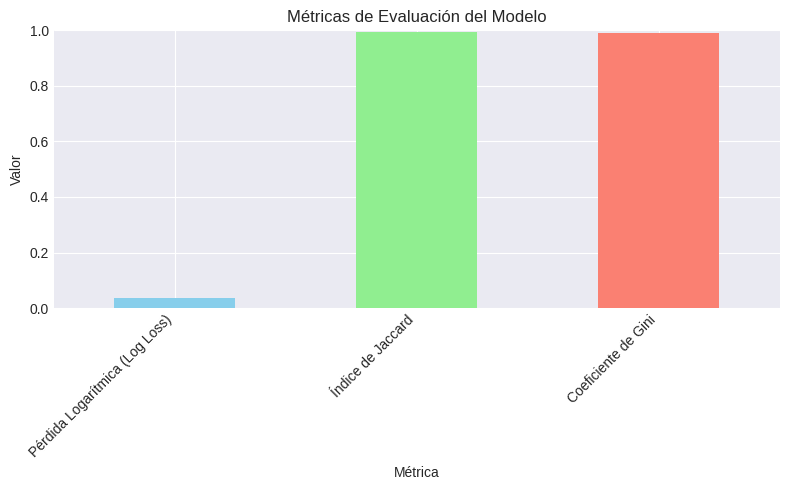

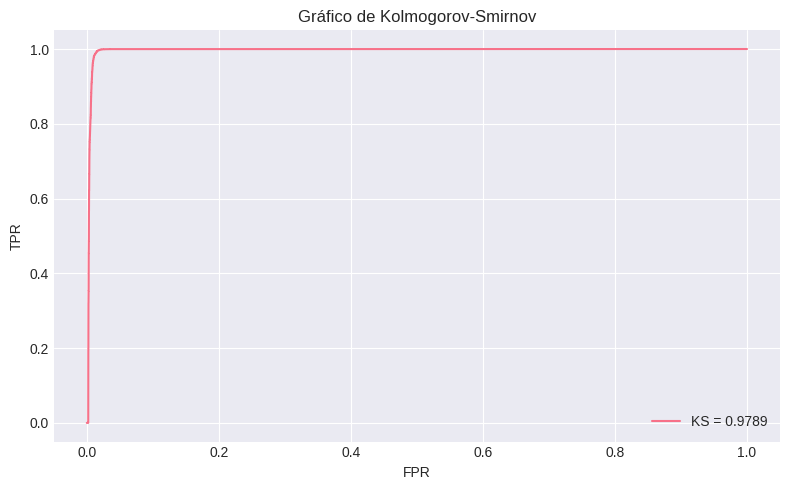

KeyError: '[58687, 49628, 56279, 22516, 49119, 22541, 52205, 14016, 7094, 64050, 6743, 44460, 56316, 42081, 36389, 19921, 19070, 39958, 2031, 29939, 26946, 23801, 2146, 45937, 55550, 12113, 64916, 12144, 3583, 66039, 2262, 15650, 19498, 15111, 66935, 17926, 16027, 39621, 28236, 20867, 59720, 38886, 35386, 29276, 46246, 40559, 11776, 18586, 31112, 32844, 53517, 40363, 22331, 39435, 48077, 4033, 45914, 12831, 58115, 34867, 39363, 17304, 46101, 9802, 6073, 41137, 9222, 15648, 11636, 37068, 26156, 46883, 58264, 48637, 28556, 26676, 36053, 61300, 40973, 44110, 1980, 7680, 67468, 27289, 54376, 40867, 62931, 23181, 50627, 8037, 23791, 44872, 12377, 4632, 50765, 12807, 1949, 27011, 3748, 4643, 43486, 46897, 19268, 15072, 59712, 47702, 67014, 46527, 7399, 53339, 55920, 23545, 43567, 11496, 40333, 8667, 1118, 5508, 46015, 10600, 14078, 49989, 34304, 39285, 36199, 42517, 30469, 22430, 51728, 15691, 10906, 28147, 2438, 11081, 29024, 34871, 45610, 21016, 29717, 56057, 21065, 26192, 20822, 20271, 1211, 34614, 60071, 36346, 22916, 35944, 920, 43058, 17977, 10826, 13967, 35498, 65449, 31768, 36320, 15661, 33692, 16125, 2237, 11099, 20202, 45998, 9185, 2420, 9432, 35902, 17470, 26505, 14311, 52570, 35787, 2951, 49025, 20744, 18814, 18126, 40499, 42074, 58316, 47752, 4937, 23077, 53372, 36925, 60648, 60748, 62144, 13144, 59392, 41815, 32831, 62573, 54721, 17249, 6078, 39456, 12052, 63096, 44993, 14095, 61050, 57286, 51486, 60471, 6227, 20318, 33620, 18899, 1803, 41777, 23596, 25452, 31745, 60536, 25326, 63197, 65019, 39462, 48116, 31581, 28397, 41286, 38374, 44383, 50649, 60700, 30549, 38900, 58523, 34343, 33972, 4097, 63358, 12148, 63111, 10309, 54637, 29234, 18496, 23956, 9339, 30405, 2066, 17188, 11105, 63112, 31743, 50564, 25748, 25990, 20769, 52506, 12999, 44235, 22298, 43849, 15522, 16286, 64793, 1624, 9936, 31772, 54033, 11982, 65848, 46600, 27517, 62099, 50487, 51384, 55736, 33457, 20280, 30255, 38257, 21688, 45012, 8411, 57237, 12337, 49687, 42530, 341, 48483, 47647, 35676, 11884, 48123, 2163, 42056, 5381, 57809, 50331, 21422, 16892, 35881, 29315, 62480, 54956, 10498, 55549, 31078, 44616, 6152, 42991, 58241, 25747, 33927, 23749, 47630, 43272, 54576, 273, 34346, 30691, 20057, 34740, 33765, 2392, 36104, 59719, 7497, 64667, 58318, 66468, 2546, 55349, 32302, 63244, 54803, 66580, 15499, 6500, 49907, 15323, 41094, 12204, 37347, 63817, 19679, 65816, 28934, 49300, 39487, 38725, 46308, 34677, 39186, 36198, 6844, 19162, 5131, 618, 28767, 48915, 39783, 35129, 45486, 42033, 44134, 1193, 13696, 885, 44746, 47941, 20583, 25628, 17852, 701, 55930, 31528, 64897, 65303, 55645, 7742, 43375, 54510, 57305, 52584, 55520, 8286, 37039, 32167, 59842, 56867, 6579, 31670, 34820, 63287, 41723, 59320, 46065, 52645, 48218, 44893, 33490, 4172, 30082, 42847, 59737, 50883, 26478, 14815, 7125, 19686, 63193, 3109, 34366, 6692, 20089, 52251, 64674, 6561, 45017, 30238, 63849, 36405, 5901, 5016, 5623, 32128, 33257, 1759, 37385, 28542, 22562, 18920, 21839, 46206, 58487, 6023, 47913, 23029, 8578, 49137, 3528, 1516, 25938, 12927, 41235, 4925, 62201, 16845, 11065, 22006, 37973, 45593, 26012, 59962, 12959, 32578, 55572, 65581, 34387, 44888, 65505, 43864, 54646, 8682, 63951, 24593, 27223, 2165, 22102, 38130, 63101, 13567, 19931, 21651, 65413, 12636, 67481, 19121, 56873, 8232, 56878, 54688, 1964, 8226, 29181, 25983, 43573, 62606, 46267, 36425, 60876, 62369, 29303, 57382, 22919, 32397, 12092, 20629, 52243, 32697, 31720, 36015, 13386, 63384, 55512, 61748, 18882, 43589, 27753, 32050, 43913, 6346, 2464, 19892, 1748, 24319, 63261, 52679, 42854, 40785, 61850, 45420, 54575, 17648, 47626, 57812, 13822, 35875, 52501, 41233, 10398, 45869, 49643, 5791, 51311, 52395, 48328, 31809, 3785, 65609, 46386, 24226, 55042, 59130, 20757, 53480, 55718, 53456, 43377, 16828, 65366, 55997, 24961, 33038, 29057, 50458, 16481, 57897, 49653, 60608, 24520, 37690, 18976, 62053, 25678, 43072, 20026, 67362, 58550, 34433, 37812, 819, 7550, 60446, 9219, 61286, 33869, 48752, 51333, 31209, 2424, 47546, 62747, 11444, 9582, 39036, 14262, 3917, 6940, 57765, 58948, 8292, 65418, 13225, 42192, 63534, 2628, 25075, 36323, 19002, 8080, 52425, 34062, 51126, 40167, 10863, 33886, 15482, 10952, 40880, 61603, 25991, 45788, 24001, 21584, 23723, 23061, 22770, 39150, 12774, 42729, 30422, 27694, 61851, 65718, 13189, 57275, 7714, 2890, 33893, 8196, 9204, 23451, 50629, 21041, 9260, 35103, 59344, 37970, 32130, 11942, 3280, 16124, 19870, 44007, 8752, 42377, 44711, 56172, 7534, 12175, 37871, 3900, 10630, 11807, 44080, 58859, 33644, 45691, 7698, 61466, 2607, 51460, 24212, 30620, 62566, 39569, 17266, 63365, 16874, 57314, 38909, 11961, 10052, 17781, 66933, 1406, 29901, 233, 61252, 39149, 64182, 13283, 30675, 41637, 13522, 59732, 43284, 40070, 65925, 7285, 33181, 49669, 31913, 8779, 15295, 3501, 62504, 23531, 6326, 65630, 40984, 42085, 42652, 29885, 60899, 19295, 15007, 31130, 16772, 51310, 9781, 25418, 57269, 4521, 46141, 55980, 24638, 66923, 55428, 45360, 46653, 25997, 37638, 1261, 20909, 48934, 7163, 28630, 41702, 56557, 28725, 28371, 28363, 43224, 2457, 52557, 56513, 53568, 39706, 3880, 15980, 35968, 5362, 13902, 61548, 9541, 26654, 30213, 35990, 26733, 51501, 22794, 38686, 32246, 46638, 2362, 56804, 33817, 47875, 65061, 29306, 66188, 66370, 38874, 40412, 11292, 5319, 28158, 59047, 30949, 15327, 60181, 28629, 51826, 27100, 23495, 44864, 44389, 18182, 61994, 4612, 50415, 23675, 56763, 36387, 16982, 58347, 29556, 7840, 33714, 6823, 20246, 9216, 65076, 40782, 53599, 26851, 5458, 2174, 41655, 9130, 52739, 50697, 7006, 11014, 56269, 62739, 55242, 64600, 56596, 23795, 40840, 50151, 1519, 24055, 46042, 45196, 66643, 54387, 19903, 55213, 52164, 18556, 30461, 2037, 13120, 6969, 32849, 792, 10059, 2171, 28960, 27444, 28505, 3812, 18162, 64328, 2798, 36962, 57734, 9843, 19319, 50231, 28857, 14324, 57130, 20332, 8772, 27882, 29223, 14464, 29992, 35066, 33803, 6863, 62042, 3753, 9597, 33481, 43182, 13646, 47767, 41652, 54310, 1295, 36221, 66665, 63618, 46231, 39177, 16503, 26857, 50389, 23775, 35635, 59071, 49624, 32975, 15626, 34929, 32075, 28898, 56354, 44411, 22711, 21245, 56845, 15672, 8199, 61191, 49924, 44527, 19661, 20040, 51450, 52445, 40407, 63220, 46139, 66511, 58916, 32866, 62954, 16241, 33135, 17165, 38407, 8083, 3180, 55035, 14661, 13385, 36293, 48688, 20554, 53310, 30860, 51484, 40334, 54007, 21281, 27613, 25784, 35209, 2052, 5875, 11780, 52802, 38590, 57532, 44107, 56142, 4589, 51936, 64828, 6149, 42041, 5456, 42416, 46109, 14849, 11300, 9032, 17767, 34452, 34051, 33208, 61429, 39901, 17411, 19317, 21189, 3658, 34785, 20794, 24616, 50849, 50485, 41421, 30146, 38609, 10395, 30659, 50528, 17564, 44334, 62040, 6305, 59614, 33834, 17869, 39489, 41517, 12376, 5431, 39627, 19481, 54757, 38243, 34143, 32213, 22995, 6388, 56766, 16224, 8120, 32815, 25349, 4195, 66148, 12480, 51276, 1241, 6269, 56757, 5445, 51049, 20059, 15465, 29746, 29130, 15296, 28186, 3416, 36937, 10526, 43993, 38384, 67076, 24388, 7074, 2038, 63614, 8021, 51531, 6390, 36048, 39531, 21628, 65543, 61803, 17209, 10845, 46528, 11603, 30466, 7991, 54642, 55816, 56721, 38647, 3675, 4079, 62067, 16285, 34505, 18568, 63142, 54221, 21985, 34710, 57114, 21587, 33725, 66248, 25885, 58242, 59868, 28748, 16171, 28548, 66750, 65559, 2269, 43568, 29116, 53392, 33722, 51178, 7827, 1666, 64810, 28280, 42646, 16455, 1976, 56079, 39384, 52056, 34601, 12472, 15079, 14634, 44298, 33298, 53059, 23118, 15269, 44066, 54696, 13077, 33435, 13224, 33332, 56997, 39500, 16809, 29450, 34202, 14859, 48233, 55987, 5544, 16572, 66454, 37073, 45125, 30770, 28246, 20973, 43770, 67277, 60774, 5598, 8957, 17142, 33404, 16953, 54209, 27388, 1947, 47988, 45180, 49459, 46271, 59317, 2816, 50173, 12129, 1584, 51665, 26673, 28936, 41986, 5498, 64440, 32266, 32995, 20666, 58773, 53437, 61712, 31597, 17822, 752, 65571, 20753, 23156, 4824, 61353, 18281, 43395, 27054, 31983, 65334, 3926, 4670, 49274, 18375, 54028, 44429, 8823, 46443, 44035, 22740, 18605, 44070, 23522, 63144, 3008, 26422, 51916, 54070, 8498, 11489, 44575, 45350, 15940, 45626, 10991, 37473, 65186, 29502, 21339, 18265, 62418, 52087, 12931, 6487, 56289, 12716, 56207, 18228, 28744, 28652, 43971, 24312, 57923, 10074, 31688, 16446, 8591, 1763, 20748, 14360, 7722, 65202, 13904, 40623, 2282, 22344, 53022, 5727, 53454, 24140, 8090, 21833, 41400, 45140, 18036, 67511, 1848, 11525, 61290, 12079, 4659, 693, 5356, 27713, 47728, 5570, 57002, 24529, 49890, 34241, 3351, 13526, 37522, 63537, 55015, 67397, 16113, 19083, 46984, 29433, 11566, 55529, 61437, 40102, 33291, 67157, 53661, 17042, 4048, 1558, 30372, 55616, 39894, 19887, 37907, 50750, 17178, 43895, 61512, 45424, 67387, 56920, 12664, 60557, 39264, 33233, 3067, 12663, 48441, 59499, 57366, 74, 4779, 57625, 64617, 28, 58696, 3924, 18165, 28637, 67117, 10085, 38283, 2110, 47031, 64248, 7511, 21433, 52749, 28045, 57426, 52258, 48262, 64994, 20163, 29196, 44490, 44264, 50851, 9393, 8235, 63045, 14936, 63478, 55275, 2541, 53892, 49365, 59528, 48035, 24934, 47938, 14216, 11302, 6257, 45010, 13392, 34372, 7544, 18377, 38731, 55491, 3649, 23010, 59430, 39566, 52831, 51016, 56561, 29487, 54583, 35064, 66605, 4584, 49242, 45959, 29333, 53685, 17289, 18279, 61296, 23789, 1751, 41148, 36969, 45853, 43548, 19364, 44591, 8699, 30758, 44431, 37384, 5854, 21827, 57876, 35808, 39293, 41255, 9498, 41050, 41622, 8019, 16029, 10410, 9235, 9330, 18012, 67097, 930, 36115, 23099, 20458, 7473, 55972, 42782, 44314, 16628, 28275, 11873, 65327, 12400, 6635, 51334, 63924, 44917, 44651, 62397, 7860, 12788, 13112, 51492, 66717, 2588, 6962, 19648, 64160, 46425, 28261, 42345, 28597, 47045, 35203, 13889, 7809, 56906, 43140, 66711, 40114, 17485, 63675, 16315, 66951, 1509, 61931, 6145, 19058, 63166, 36652, 24900, 39389, 47897, 31681, 30234, 67260, 55331, 21314, 54705, 27601, 58986, 8707, 53698, 44474, 11120, 17288, 33483, 63135, 42006, 41047, 16838, 46707, 39686, 37364, 57745, 51992, 18407, 15289, 15300, 16249, 9611, 44186, 5091, 53715, 40954, 66882, 53784, 29511, 18396, 60314, 56118, 57629, 62090, 62413, 13043, 62545, 50030, 42712, 17636, 23848, 18136, 31176, 38471, 54378, 25367, 39608, 14105, 19862, 17786, 18495, 23090, 7648, 65611, 37413, 61366, 48652, 25163, 19929, 62207, 55354, 15816, 55821, 8473, 39736, 55887, 42763, 12435, 23632, 57438, 30663, 29783, 65248, 59124, 32239, 27394, 29625, 40302, 59884, 36868, 14221, 5460, 65164, 1686, 32854, 4263, 17173, 3412, 62306, 31532, 35445, 47772, 20843, 34139, 35591, 37456, 950, 48520, 10821, 22583, 44876, 20309, 64448, 3198, 18946, 27109, 19552, 39579, 31167, 35009, 1781, 42133, 51863, 54345, 34618, 28710, 5770, 58383, 17709, 28525, 1867, 49498, 55053, 33841, 66741, 13127, 49159, 29742, 23509, 58500, 62127, 19992, 12221, 12871, 43031, 32645, 63640, 22192, 36267, 36029, 26293, 20730, 35250, 63486, 56520, 27825, 18213, 59218, 26060, 33982, 49490, 65457, 63030, 34420, 35966, 10262, 35051, 19392, 11730, 21289, 24214, 31994, 46929, 49165, 31543, 52305, 63539, 19107, 37096, 40284, 23511, 27323, 16575, 17469, 42898, 41075, 9223, 18896, 24925, 29817, 10514, 49678, 41326, 10421, 36738, 24761, 12418, 46203, 61794, 48462, 22758, 47516, 56004, 40962, 28527, 4638, 38032, 44928, 9906, 19869, 16762, 23416, 48924, 54453, 28808, 58234, 47819, 52763, 60932, 6661, 43543, 44079, 32115, 45705, 41698, 12021, 36714, 39132, 8956, 64602, 38905, 65115, 38574, 2603, 30480, 37444, 41317, 63507, 18720, 36380, 62275, 61523, 40832, 8937, 50628, 50061, 55538, 39990, 900, 62636, 50531, 64592, 12166, 29652, 67008, 22992, 12591, 65769, 12732, 13815, 34832, 33421, 38621, 64225, 29956, 14028, 14844, 34314, 48255, 54893, 21619, 28813, 56792, 20652, 58930, 48340, 19976, 32131, 62223, 50381, 5302, 41066, 7545, 8172, 10078, 45237, 23320, 27259, 11124, 61391, 16307, 11451, 1446, 57334, 66065, 26563, 4044, 19150, 45202, 11272, 57806, 9672, 11671, 35425, 3551, 42317, 32345, 40854, 33696, 12918, 63716, 54464, 26845, 61304, 52181, 18011, 48539, 61529, 48364, 50739, 18681, 45700, 23189, 25928, 25561, 1147, 52064, 18169, 10082, 21982, 10940, 50699, 20901, 10930, 64458, 12925, 4827, 48472, 21416, 60845, 18958, 41164, 14218, 29724, 3463, 22019, 66706, 20037, 4327, 48111, 22925, 52191, 38183, 28790, 63808, 65464, 32832, 38145, 5451, 49576, 41425, 61838, 42990, 37854, 35717, 58979, 15992, 45216, 17066, 51235, 26467, 59564, 34761, 59801, 14651, 44871, 4801, 22591, 38037, 16863, 29840, 44158, 27074, 10358, 53403, 25404, 64757, 57365, 4445, 13417, 31649, 47990, 24313, 14826, 33414, 61202, 41808, 27642, 17745, 55629, 27051, 53937, 31770, 2935, 60551, 26260, 842, 57837, 9693, 53874, 11583, 63093, 54878, 9855, 57601, 31030, 40113, 59780, 14660, 66473, 60454, 25196, 11571, 34588, 24889, 28776, 54428, 45531, 26332, 18192, 26337, 5505, 35140, 40616, 48909, 4830, 34641, 41721, 59264, 66459, 33840, 14780, 14785, 19695, 30581, 61703, 24904, 4610, 8642, 18951, 6942, 19340, 30626, 21328, 4601, 21656, 3740, 11945, 10094, 16068, 44900, 1452, 5133, 30077, 48818, 7251, 37422, 62466, 32178, 61082, 33499, 57887, 46953, 29099, 42627, 41854, 12242, 11805, 32058, 30318, 51988, 25298, 30910, 14320, 6150, 24570, 53424, 53297, 32561, 22027, 63302, 44927, 10453, 26021, 23534, 47559, 36194, 21545, 9558, 22466, 43968, 4081, 61115, 12103, 39181, 39712, 38268, 11206, 4559, 13825, 1255, 26706, 57412, 18616, 1902, 42540, 49592, 32798, 44922, 18742, 23021, 24227, 9767, 12792, 13193, 1127, 63450, 49912, 48582, 66805, 13762, 55884, 37328, 48056, 25286, 16262, 3960, 45669, 49608, 55321, 10712, 44241, 66392, 25137, 44522, 62245, 19433, 13919, 66879, 40480, 47443, 66942, 32002, 58951, 30229, 24417, 50418, 58766, 51478, 20718, 28686, 52044, 64233, 37787, 21765, 64100, 11182, 29253, 3663, 4428, 6642, 13950, 38475, 50290, 56109, 62121, 21385, 48543, 34168, 60165, 40561, 4692, 4571, 60701, 26865, 63877, 15226, 58250, 26712, 33096, 10159, 61694, 37083, 8860, 44359, 48893, 18340, 9773, 40848, 67445, 1106, 1238, 478, 12421, 26034, 57595, 43047, 54418, 3910, 29852, 67030, 64380, 9939, 33398, 48812, 63272, 13231, 41095, 30778, 7223, 53875, 38094, 65932, 56331, 12781, 55305, 35810, 30086, 32768, 13477, 31631, 28249, 54262, 40011, 174, 19837, 58224, 13867, 9967, 6970, 52498, 32393, 58774, 10535, 34025, 57606, 26557, 51744, 34969, 4138, 678, 20124, 64928, 64467, 18412, 54983, 53439, 55023, 23812, 57007, 40175, 20756, 43025, 62965, 6707, 9404, 33486, 46264, 62748, 22984, 28160, 9253, 16128, 1, 54406, 41644, 59620, 19372, 36965, 50435, 2229, 27306, 34060, 22903, 62576, 33667, 62706, 37567, 66363, 51910, 14672, 62578, 17297, 28944, 29114, 30406, 23234, 53120, 21732, 31951, 24584, 64889, 24996, 49085, 65207, 11023, 34023, 7438, 3913, 64936, 23005, 40343, 16400, 58911, 65386, 61933, 46974, 39013, 56625, 14688, 54432, 303, 5944, 11231, 2931, 15061, 45474, 6044, 63791, 38045, 7200, 30995, 589, 19278, 1399, 42127, 37118, 37122, 15523, 40697, 5782, 359, 57218, 48853, 5151, 21220, 6893, 37289, 2276, 24999, 47159, 35720, 52368, 1427, 53910, 8843, 6214, 28762, 44535, 38545, 60659, 50017, 54997, 14949, 42870, 2595, 51830, 25996, 63567, 8030, 26482, 19412, 5515, 53349, 3268, 7508, 35410, 60297, 6348, 22704, 65599, 65107, 24745, 849, 59592, 61782, 53500, 9347, 44015, 41989, 34525, 4499, 16191, 25958, 23604, 40916, 59891, 2535, 41766, 50338, 13617, 49520, 27387, 27804, 51758, 58330, 28532, 30739, 24247, 26468, 65212, 19769, 51094, 63041, 22236, 24186, 45108, 52821, 14380, 65906, 11291, 29551, 60481, 46908, 25764, 59873, 66029, 61730, 19780, 32816, 578, 34658, 41157, 22375, 54285, 22827, 32817, 52558, 56973, 42670, 10295, 20129, 4239, 65361, 20093, 61342, 30336, 1592, 51893, 18561, 25862, 5902, 52343, 48843, 32268, 53731, 50196, 42988, 23518, 25896, 57132, 66978, 14163, 46216, 2461, 66064, 22155, 61153, 4846, 30727, 14997, 10088, 37257, 44788, 15272, 27191, 29334, 46535, 14027, 3747, 28086, 38760, 64138, 16585, 32379, 21753, 59001, 6330, 53894, 23458, 29621, 6555, 57800, 33412, 19108, 7897, 44179, 29097, 22689, 57942, 29170, 31640, 13706, 50009, 20984, 62740, 27423, 66202, 57698, 29297, 30495, 46519, 15726, 26501, 43827, 5123, 18535, 52613, 4452, 61316, 46583, 12971, 30717, 25873, 52397, 21112, 5614, 53009, 32459, 43484, 65679, 19021, 41263, 6792, 28297, 8468, 35211, 36595, 20712, 4321, 12594, 60586, 15190, 64573, 27402, 2214, 12474, 4781, 55957, 20827, 50672, 39180, 15457, 57919, 13133, 64771, 60223, 12771, 60103, 60609, 19632, 42523, 48130, 30600, 25729, 680, 9019, 66621, 60556, 55197, 50609, 17724, 26620, 48650, 7191, 22468, 31466, 42325, 22238, 27711, 38939, 5997, 26866, 20030, 5406, 10484, 5962, 55505, 14134, 64012, 7284, 55579, 54512, 42168, 59387, 15147, 22940, 24783, 3557, 11749, 18346, 65315, 7169, 61596, 29277, 14791, 42204, 16079, 53887, 47679, 9780, 14060, 3048, 43970, 65196, 48485, 6768, 21288, 863, 9815, 40805, 12145, 41906, 32859, 12287, 48737, 29953, 65110, 52697, 26202, 49715, 53046, 34804, 63487, 5836, 33719, 37922, 29722, 52440, 16883, 43154, 55910, 981, 50947, 36674, 23771, 9711, 47131, 61374, 15536, 63540, 16800, 15952, 61635, 7430, 51729, 31856, 9841, 1479, 4897, 58545, 8948, 50130, 55916, 40087, 27569, 37248, 17880, 54944, 10466, 2304, 40666, 28305, 56454, 46549, 47254, 12942, 65854, 2355, 21542, 31438, 14931, 67112, 24861, 4021, 43282, 43824, 21473, 50645, 62729, 2396, 26701, 31963, 22658, 22717, 60519, 23959, 49121, 60156, 5518, 61917, 65767, 23955, 47770, 1933, 1572, 60225, 30681, 3798, 45380, 44188, 32522, 32145, 44386, 60328, 47581, 23474, 12162, 4453, 63778, 14984, 66052, 45508, 12550, 15207, 22094, 5832, 15288, 49875, 66074, 48039, 46971, 65728, 28024, 63751, 48803, 52638, 7189, 25467, 9314, 11650, 28921, 56554, 13536, 55859, 1436, 62663, 7764, 25252, 30522, 29605, 49284, 53620, 45375, 14707, 28809, 11172, 24232, 37802, 63040, 35056, 14145, 24215, 25150, 3896, 21466, 24808, 3047, 55200, 56278, 40319, 27294, 60565, 24039, 18870, 7847, 52555, 43488, 43777, 59072, 60572, 27972, 33539, 67050, 39768, 44825, 66139, 20948, 55787, 46106, 21457, 7162, 53923, 2599, 62901, 60482, 6121, 42545, 448, 20041, 51692, 36531, 7371, 21914, 8826, 3538, 37933, 65907, 38645, 19677, 46393, 43710, 17467, 11220, 7541, 28966, 54864, 53093, 60789, 59837, 66518, 9500, 59775, 25755, 39698, 50798, 15847, 59082, 63294, 23908, 43038, 66499, 1414, 37424, 39724, 33504, 5436, 14821, 53143, 28293, 47781, 48264, 11850, 6857, 54984, 60239, 43774, 52468, 67073, 38919, 42783, 25660, 29188, 29049, 29428, 14917, 24056, 31325, 1132, 29261, 49697, 39592, 22667, 11918, 44103, 34115, 4822, 30768, 17277, 67031, 46272, 39770, 27255, 2592, 37662, 65381, 62052, 12199, 16203, 41886, 39269, 59557, 45014, 62132, 59526, 3680, 10715, 19321, 51062, 41476, 12315, 38563, 53376, 37943, 26311, 56387, 37478, 27876, 47016, 28037, 45895, 11829, 60439, 40003, 10934, 58422, 20290, 61347, 14987, 21806, 35550, 36391, 61860, 50260, 59766, 23315, 62333, 54488, 13418, 23284, 45743, 15008, 31122, 33825, 29756, 16427, 32403, 61040, 54249, 58460, 60571, 9402, 36706, 46966, 58973, 20926, 24150, 34883, 49646, 14211, 38395, 59139, 7618, 12556, 43157, 14894, 8547, 50429, 53526, 55420, 26932, 61231, 56500, 12748, 28488, 63347, 4506, 7236, 31868, 67304, 14963, 32038, 61089, 40584, 62985, 20726, 22021, 41671, 1009, 29622, 7734, 14519, 31853, 2506, 8024, 6455, 20199, 53858, 58041, 45007, 42937, 33299, 28401, 58303, 238, 16940, 17632, 59475, 43111, 29669, 61914, 8545, 25205, 364, 65338, 38868, 16060, 7999, 39785, 31182, 34445, 12709, 21445, 56947, 177, 66692, 13205, 22749, 24005, 64359, 16091, 15388, 30263, 35748, 43389, 22493, 31890, 47598, 43569, 12562, 11003, 59697, 19946, 60573, 35139, 42136, 35477, 64349, 3735, 57541, 47872, 25005, 40144, 44996, 24899, 33961, 43347, 31915, 24625, 18684, 14457, 39124, 23918, 21508, 36161, 15570, 60105, 55908, 9573, 5938, 46676, 45228, 2884, 55144, 10185, 38187, 34571, 14940, 29443, 40266, 37030, 57522, 21715, 6260, 7703, 470, 28002, 31052, 44324, 29586, 5075, 28231, 62098, 4918, 54975, 11325, 59995, 13414, 6229, 35345, 52758, 26634, 38906, 34114, 45289, 54263, 29083, 64044, 32588, 48356, 51454, 15159, 30182, 22617, 11178, 17014, 26434, 34541, 45763, 1831, 41910, 61631, 65736, 35692, 11519, 20865, 51184, 31243, 42362, 21320, 568, 21350, 24561, 23822, 38577, 33393, 50285, 41629, 14882, 54782, 55235, 66634, 20125, 20715, 45026, 8202, 60231, 16658, 24516, 44096, 58568, 61363, 55622, 41227, 18380, 17838, 31005, 57407, 63933, 66989, 41572, 56505, 45892, 65481, 48215, 20545, 48094, 16788, 27286, 33824, 61055, 20266, 50725, 70, 65069, 61158, 25202, 23022, 17326, 50374, 52607, 61521, 34144, 54732, 20240, 4650, 18851, 43835, 13490, 67077, 23487, 54953, 46523, 50612, 51931, 52259, 44373, 19206, 33575, 62360, 30685, 23527, 8870, 22438, 67194, 29834, 31613, 60883, 61218, 39277, 58434, 14991, 51, 61280, 23984, 44947, 26370, 19583, 53899, 10585, 8360, 33585, 36329, 47494, 4225, 22160, 1393, 16988, 44055, 21012, 40861, 59728, 46002, 20927, 20065, 4297, 45285, 48343, 5273, 40730, 25704, 11048, 1400, 66551, 60293, 14627, 22244, 35303, 14961, 49432, 50981, 17682, 56894, 31223, 6414, 39227, 55837, 7465, 150, 28320, 64259, 65260, 65508, 2404, 44114, 8651, 46185, 65450, 29094, 12181, 58276, 26466, 12084, 48043, 21747, 6622, 54608, 38466, 49322, 23159, 38521, 55293, 64311, 8672, 45498, 2483, 21133, 39741, 54050, 26945, 8695, 54095, 63250, 53518, 5519, 17909, 25643, 20316, 60706, 13744, 706, 62831, 62572, 43676, 33302, 31797, 59983, 14347, 66963, 58613, 48590, 61013, 8223, 52514, 50421, 43625, 960, 3144, 4426, 18448, 31063, 24735, 31521, 22844, 50518, 61530, 63417, 5258, 50921, 40834, 59545, 21775, 4842, 15235, 5001, 7812, 43744, 35895, 7593, 64892, 25740, 11359, 36726, 24748, 47325, 21091, 22143, 1704, 7367, 52345, 11647, 37913, 56084, 40574, 54776, 35098, 47766, 19255, 31370, 39998, 31824, 40684, 6852, 29533, 30714, 45136, 7234, 28883, 64483, 43836, 19919, 856, 58850, 47297, 3465, 42335, 42656, 33209, 12101, 65445, 1020, 29167, 12949, 55092, 44738, 35768, 31, 62472, 59734, 55341, 39190, 36755, 39930, 35075, 42924, 11828, 53379, 39122, 30346, 8324, 9378, 7980, 41599, 16290, 13129, 24774, 25854, 38567, 60580, 60068, 29046, 56480, 7185, 42945, 19923, 61939, 26041, 21788, 40157, 12001, 44938, 65271, 4051, 59704, 39588, 59587, 17732, 5921, 35527, 25375, 25385, 10433, 57633, 55921, 65876, 48695, 50633, 63191, 5423, 28945, 64618, 39062, 9159, 60809, 63218, 21246, 16422, 21547, 62193, 5789, 63390, 30157, 31047, 42702, 10615, 66485, 60119, 60738, 61467, 20402, 3349, 22093, 11549, 24473, 36481, 17510, 66639, 45392, 51694, 59390, 58026, 59645, 62817, 33953, 58324, 15795, 63853, 51223, 31076, 21340, 21218, 42153, 33052, 36158, 29735, 2804, 61586, 30534, 38439, 53325, 39253, 31430, 38290, 39298, 27005, 21799, 47933, 29836, 41247, 3757, 35497, 51487, 23753, 41325, 9875, 8725, 19610, 62235, 35329, 38248, 51698, 47337, 49835, 7652, 24582, 23968, 26619, 7300, 51447, 65987, 63899, 33710, 42947, 11539, 37498, 65344, 19406, 44204, 1178, 13260, 18754, 55302, 11452, 59354, 22888, 111, 39229, 6364, 19475, 65843, 17400, 35253, 27322, 18706, 33217, 25478, 20180, 35588, 53828, 9545, 2782, 8795, 44798, 53837, 45742, 48613, 39548, 46574, 66455, 7021, 51787, 19516, 11234, 54611, 15193, 22686, 52224, 19876, 53182, 1525, 51185, 39114, 55784, 11615, 22835, 10946, 62004, 42602, 58045, 63531, 60642, 34911, 12010, 26964, 43126, 56964, 6774, 24707, 56646, 31427, 55190, 34813, 32347, 12662, 16294, 32892, 58553, 66508, 3259, 21418, 29220, 21380, 37266, 40445, 54236, 19941, 35121, 22384, 63819, 57559, 1428, 58913, 20270, 46505, 10101, 2134, 13285, 56048, 10135, 2591, 22701, 48390, 58083, 56887, 35402, 58001, 16459, 38767, 13423, 42458, 26276, 5945, 65349, 17491, 6035, 46713, 39721, 28784, 45667, 6443, 40000, 16562, 43405, 10843, 35602, 46341, 28515, 9562, 1563, 18035, 52086, 66088, 62879, 31977, 29095, 9027, 41312, 7255, 3158, 26125, 43283, 6194, 5766, 67377, 8166, 30618, 44585, 33175, 41071, 49683, 35188, 37540, 32843, 57112, 50890, 23249, 6780, 62206, 691, 42027, 63623, 40419, 11314, 61875, 47917, 10403, 54063, 6582, 5401, 35180, 12675, 49185, 1192, 18231, 66562, 24356, 64393, 26068, 66390, 10620, 36694, 7625, 28106, 53347, 6843, 49055, 5690, 55378, 50703, 54889, 11794, 16116, 64780, 46117, 41617, 43078, 30941, 49352, 60873, 40845, 59489, 37392, 15213, 6203, 50040, 44735, 52022, 4758, 13901, 61051, 28924, 67182, 49864, 52574, 48144, 46886, 60014, 9156, 40752, 41393, 59751, 48166, 52304, 53755, 39598, 39002, 12708, 4731, 60367, 19597, 8387, 33013, 2401, 35639, 60667, 59532, 23529, 16376, 54154, 65120, 20033, 43831, 9987, 5008, 33312, 27304, 59742, 1031, 5659, 49454, 65148, 3074, 14612, 16277, 64840, 36275, 32295, 7649, 49151, 48019, 42028, 23648, 48492, 23909, 7806, 45574, 18705, 8773, 44027, 13844, 33638, 60813, 10311, 11853, 3644, 859, 13304, 54949, 22188, 9079, 56898, 612, 31335, 10116, 21192, 23170, 32074, 54630, 24076, 28962, 43579, 17073, 65313, 21335, 44853, 60554, 40781, 24907, 15855, 62300, 22495, 11806, 144, 8856, 36265, 63937, 47786, 13921, 31177, 32881, 6209, 31947, 57722, 11932, 24592, 1004, 56935, 67116, 15635, 10186, 4530, 2157, 62285, 18076, 53083, 49453, 43902, 36445, 38808, 15170, 16887, 39895, 55766, 24969, 22955, 13546, 36601, 11229, 38568, 54649, 12944, 22018, 8333, 48599, 8027, 50045, 21708, 13324, 56313, 29144, 30181, 29494, 26360, 24817, 41724, 61664, 54148, 13136, 17508, 26891, 2408, 63755, 42767, 5802, 43092, 24931, 66625, 16457, 52759, 34510, 28172, 30085, 56727, 7466, 5111, 32291, 26764, 43954, 11535, 64603, 20988, 2779, 48298, 28090, 41420, 16291, 28113, 25247, 47946, 51471, 54128, 1220, 61479, 35947, 8628, 20511, 62100, 20047, 21999, 29929, 40822, 44023, 7258, 46945, 65761, 41408, 66132, 16466, 9714, 15138, 36679, 14372, 57941, 36684, 41999, 42122, 35320, 45532, 26839, 63268, 18564, 25861, 4209, 29278, 16260, 57932, 6370, 58861, 12504, 58025, 50475, 57979, 7719, 36670, 61109, 5728, 53012, 14373, 57373, 39307, 57732, 3595, 34514, 37185, 53822, 15478, 45225, 54027, 62873, 36215, 65923, 60699, 37309, 23496, 4580, 62963, 11629, 54468, 17436, 24656, 43506, 10950, 14900, 934, 22822, 34852, 11027, 21181, 2813, 1903, 33478, 67497, 47431, 48600, 55918, 50042, 24238, 51314, 8132, 18455, 41189, 64457, 8331, 44203, 25768, 43768, 48930, 15429, 41372, 57882, 9713, 626, 46748, 63842, 60383, 46166, 50778, 46368, 61299, 18336, 45560, 1861, 57145, 43326, 12935, 51606, 65820, 59502, 62229, 45934, 56166, 50498, 40878, 20380, 14068, 17348, 62975, 3774, 46665, 34081, 60261, 45733, 6616, 49978, 56742, 53365, 42943, 58538, 3219, 49275, 52738, 30151, 32129, 67240, 37386, 8858, 5958, 50985, 18652, 16368, 24794, 22133, 4832, 62226, 7505, 25724, 13001, 6698, 3505, 12543, 27341, 6984, 61687, 49533, 35143, 49072, 3673, 1181, 46220, 20648, 52429, 896, 48883, 25503, 41593, 63968, 21813, 47923, 26270, 42200, 1934, 39431, 61572, 40372, 64447, 57057, 18356, 6057, 36635, 60180, 62868, 50002, 748, 26056, 67188, 10081, 7575, 44258, 58337, 44822, 46716, 64659, 26688, 29958, 53979, 25382, 34962, 37562, 49184, 28914, 27610, 24982, 35940, 23135, 34249, 29257, 59470, 13311, 15371, 15189, 27698, 40461, 7670, 46052, 15632, 52812, 34873, 20016, 48040, 3020, 6164, 41818, 59804, 17716, 21440, 1973, 55356, 47566, 3292, 5425, 4210, 4391, 26377, 28042, 7800, 19066, 62604, 32003, 59982, 151, 19207, 34349, 24436, 42452, 5718, 11351, 10929, 30065, 4870, 36093, 17616, 2633, 39624, 1520, 32640, 3175, 8295, 51100, 52942, 56138, 38548, 36782, 53833, 33120, 53861, 25474, 19975, 14704, 56854, 14466, 5978, 8685, 29602, 28693, 54550, 64387, 18474, 23743, 15182, 16501, 6747, 8186, 41298, 9028, 10888, 48048, 20140, 19055, 60612, 35426, 54047, 39197, 36222, 40068, 44149, 18926, 10730, 65725, 24705, 12224, 38036, 63943, 152, 30729, 32674, 34204, 60183, 41618, 37446, 3355, 43936, 32887, 65707, 17979, 45682, 3876, 14552, 55377, 29227, 38116, 66661, 47838, 8636, 57459, 18067, 48569, 1172, 9203, 24952, 45623, 24062, 8105, 37223, 46420, 63671, 48662, 16354, 24219, 25921, 60294, 1774, 43181, 12479, 22911, 8234, 67430, 36153, 26966, 52774, 10506, 67233, 8701, 60190, 58935, 12626, 56074, 18385, 22258, 11168, 59857, 12499, 64865, 49097, 13452, 18755, 23536, 49942, 14567, 53323, 58828, 7576, 48874, 16691, 11593, 23919, 29814, 40902, 39195, 42178, 44906, 56403, 40151, 9650, 33458, 18662, 57151, 46324, 61445, 17867, 63687, 41913, 33837, 61893, 60350, 64435, 9102, 957, 59722, 15230, 57107, 36431, 44304, 43769, 38461, 16821, 56875, 66494, 36244, 14375, 2709, 3732, 50643, 20292, 34396, 2439, 4348, 11712, 2851, 43674, 59677, 9296, 8334, 7188, 6652, 34219, 32759, 10732, 37182, 19585, 32602, 57512, 30624, 53948, 39275, 6705, 61357, 50406, 58280, 41181, 52060, 48901, 1640, 65247, 4315, 36239, 58079, 3084, 65429, 6347, 43346, 42475, 12025, 10347, 14959, 1522, 3129, 26918, 16760, 51358, 61643, 1659, 10920, 25235, 1823, 7226, 30348, 15910, 13278, 53911, 22720, 2734, 19952, 17195, 21575, 40587, 6242, 35870, 35074, 33099, 36049, 10559, 61716, 32505, 54370, 35533, 63014, 50829, 9292, 53200, 37730, 64864, 61606, 62705, 63665, 12303, 10759, 53327, 59750, 48660, 50162, 55170, 59131, 32061, 43851, 37400, 56448, 49178, 29123, 23265, 13589, 67169, 49648, 9897, 52340, 6298, 8229, 58378, 57563, 35809, 12100, 64253, 2495, 27160, 61234, 37998, 44777, 53196, 37419, 47878, 2172, 54010, 1507, 19601, 60803, 21370, 55526, 20785, 34754, 40858, 26465, 59763, 36418, 21964, 25612, 43645, 47672, 36580, 30687, 52853, 3364, 8792, 27639, 5644, 56694, 54751, 16908, 39688, 42534, 26834, 14621, 8901, 32512, 34872, 41782, 47285, 31039, 50121, 28445, 44583, 7291, 56983, 52640, 40182, 12299, 26336, 714, 59608, 13969, 15157, 28026, 63827, 55768, 23836, 42658, 33643, 60894, 42725, 43555, 47757, 10090, 23325, 17433, 10145, 4400, 62330, 11031, 12509, 67228, 48551, 4190, 10029, 24009, 66669, 7688, 20501, 53481, 34563, 64969, 249, 23899, 119, 47906, 18399, 42483, 29014, 4706, 63348, 34735, 1338, 49617, 12068, 32840, 45226, 2363, 50546, 63638, 40614, 5804, 62605, 51361, 56871, 16345, 15311, 39811, 23015, 1626, 42376, 34965, 42076, 25216, 63013, 27740, 28338, 55270, 7019, 4989, 59066, 13720, 67470, 60810, 35489, 67348, 8799, 35628, 32750, 24661, 57570, 28450, 40686, 57338, 62641, 22706, 63073, 35579, 4617, 49391, 19659, 62592, 29477, 5967, 24460, 33313, 47667, 30224, 57419, 5996, 65634, 17847, 11877, 43253, 4423, 12842, 32005, 35773, 23663, 6062, 41952, 24524, 16939, 57308, 28446, 7461, 21687, 42310, 12462, 34080, 40303, 35465, 7779, 34483, 61066, 8148, 42485, 41529, 65009, 27343, 66510, 62622, 10412, 63001, 63370, 58423, 18464, 44222, 12607, 61161, 23590, 43105, 58231, 30809, 48873, 3024, 31069, 66212, 23316, 52509, 36887, 52366, 4528, 65490, 5702, 56170, 59097, 66829, 60038, 39701, 64885, 33229, 25442, 18143, 37088, 17489, 9287, 39734, 44701, 60206, 13409, 43839, 47406, 59918, 3976, 29528, 14402, 53006, 39700, 47292, 53548, 63419, 66176, 67364, 57940, 26607, 45503, 64442, 65564, 24172, 67472, 44640, 11801, 13151, 38812, 2538, 12967, 64131, 26257, 27373, 42094, 67441, 23784, 45993, 66855, 32232, 14601, 2640, 47320, 44764, 21639, 45340, 11089, 59759, 19465, 6951, 62659, 58436, 9055, 67305, 62363, 56686, 40134, 23841, 66683, 61537, 66775, 19714, 37658, 57313, 38412, 31683, 47304, 28570, 7503, 49986, 2821, 10313, 31523, 17360, 27474, 26230, 63580, 61019, 39169, 24629, 34830, 57428, 26874, 30111, 52048, 21739, 47594, 65016, 45573, 54593, 66326, 38346, 54835, 47133, 12549, 6359, 36324, 20930, 18400, 32192, 38266, 40891, 24463, 8499, 11119, 39944, 27803, 9087, 53807, 25626, 15454, 40088, 40478, 48690, 63793, 48777, 55944, 53732, 11827, 59641, 32381, 65031, 47574, 14777, 16405, 4873, 7238, 12293, 60631, 10171, 66000, 17123, 20957, 1697, 12820, 22218, 20377, 39988, 3491, 50011, 12396, 66854, 13953, 12640, 5180, 4730, 41076, 46360, 53226, 62523, 52778, 27353, 17891, 31246, 65866, 3101, 9036, 6333, 62794, 1644, 36075, 55469, 65406, 11917, 42520, 19732, 40463, 7378, 33081, 53404, 59827, 27494, 45945, 64120, 47353, 31566, 32262, 15549, 46034, 5390, 55094, 26206, 41908, 58461, 62872, 46416, 41820, 5912, 51534, 26591, 30150, 12071, 63900, 12582, 4134, 46802, 52011, 18015, 53943, 64589, 59727, 1328, 24363, 9925, 54900, 64522, 44, 54290, 23144, 43394, 25632, 44578, 6262, 46133, 58510, 19801, 45111, 5190, 38051, 34327, 54636, 44695, 29245, 28973, 26890, 48239, 62595, 58889, 41993, 36100, 43558, 42092, 62625, 2533, 32949, 24498, 39813, 55819, 24798, 58267, 66525, 49457, 56062, 46126, 50587, 6640, 30789, 54872, 15503, 14403, 622, 38839, 47983, 38005, 62255, 13318, 54727, 13141, 56540, 31958, 41320, 25136, 53304, 13369, 2857, 9690, 35654, 51865, 53741, 14107, 48668, 42277, 45368, 22702, 49162, 60060, 1953, 42263, 41612, 26105, 23981, 61981, 54927, 45259, 18294, 18678, 28456, 30218, 5964, 5321, 10383, 21297, 61908, 28628, 37574, 33168, 23885, 28137, 4088, 1128, 24308, 34207, 63514, 26525, 11511, 1291, 60127, 32182, 44118, 23875, 23128, 63188, 65371, 51463, 3040, 1200, 35420, 31142, 44065, 58257, 54999, 36259, 47023, 66771, 16755, 44508, 12359, 2503, 7906, 27428, 43570, 36588, 59056, 42775, 22362, 35077, 61698, 46564, 8031, 31345, 22838, 22994, 10685, 10641, 46314, 44105, 55905, 39683, 57181, 20954, 40771, 17703, 59158, 61310, 12862, 20970, 45548, 14108, 57590, 20962, 65603, 31346, 58843, 54814, 14951, 12891, 11764, 21238, 51117, 37566, 13683, 16397, 37157, 18178, 26208, 67500, 57925, 41582, 50216, 28178, 61049, 27381, 25706, 2368, 46001, 7190, 31355, 2397, 66443, 42114, 64307, 23403, 23576, 4075, 11959, 37535, 63976, 32434, 34546, 53086, 8979, 60944, 11683, 13026, 52681, 59624, 62265, 5895, 23653, 46400, 16569, 15792, 31857, 35042, 46411, 54561, 1622, 3590, 5547, 24731, 34074, 9532, 32087, 22563, 46733, 57719, 42976, 59935, 5320, 64290, 37755, 22114, 42842, 23401, 62158, 48213, 41287, 43494, 35896, 1331, 59192, 10748, 48684, 3824, 18714, 60732, 52604, 37539, 39779, 20571, 59133, 38963, 44620, 8336, 16699, 9703, 13134, 59042, 58685, 19889, 49047, 66853, 8462, 63909, 50362, 2862, 14155, 18460, 33659, 31928, 28211, 55781, 40290, 20071, 50312, 65840, 47275, 40807, 22146, 4121, 23214, 21388, 58810, 43956, 42567, 24781, 31617, 50762, 34901, 48995, 1770, 15280, 32016, 49501, 40699, 34410, 49276, 60057, 63488, 57803, 15393, 30376, 56188, 21219, 13629, 22948, 20643, 24505, 9964, 33594, 45928, 5560, 24013, 57886, 51677, 34295, 16570, 44604, 5310, 37888, 16245, 65768, 32328, 61948, 5487, 20192, 31949, 58126, 40562, 61876, 39463, 22371, 25816, 34448, 54439, 10024, 15100, 5507, 52678, 10424, 63207, 35205, 21467, 19604, 30661, 30611, 30650, 14339, 301, 7802, 61402, 42771, 24708, 47485, 22078, 4681, 63610, 45549, 52896, 14140, 60585, 15584, 12519, 57663, 27060, 61237, 55552, 19649, 7496, 62453, 65024, 11581, 6381, 29447, 40524, 35979, 41146, 36942, 49267, 55712, 8094, 20815, 36811, 24772, 21571, 46996, 34491, 39131, 56489, 9502, 32144, 59465, 64959, 66607, 27188, 67175, 49741, 1700, 62753, 14152, 2208, 52495, 32771, 54067, 2680, 35050, 21051, 9255, 36972, 20737, 57711, 508, 2673, 16488, 65557, 27203, 34540, 617, 35192, 42035, 23417, 2620, 48436, 1440, 23140, 136, 63766, 6551, 58451, 21675, 51959, 62953, 66458, 33496, 60636, 26846, 6979, 20728, 35926, 26755, 49174, 5039, 35554, 54280, 48115, 44498, 37376, 14787, 27714, 37766, 20084, 55531, 55194, 13510, 3234, 64413, 20720, 36423, 55662, 52776, 18335, 7065, 56344, 15697, 11194, 43826, 53680, 41785, 57616, 36875, 53973, 43352, 3255, 56672, 24370, 51746, 64562, 34604, 1579, 1080, 40468, 53419, 66444, 39046, 27811, 34029, 5849, 41188, 46303, 19199, 44733, 19753, 1384, 14164, 8871, 29465, 63371, 38497, 42747, 15071, 31887, 43666, 3861, 45906, 49153, 58875, 44692, 12926, 27534, 44253, 26287, 34413, 21000, 60162, 42233, 1422, 66450, 56189, 44302, 31239, 49063, 47957, 17626, 48310, 8610, 28176, 26643, 26339, 44128, 38333, 65899, 3188, 47677, 30761, 22374, 40264, 50560, 30302, 31184, 3035, 52649, 30284, 30389, 1077, 63596, 39333, 9610, 4442, 47432, 9626, 62292, 11471, 13597, 24008, 22769, 16615, 51083, 33465, 6930, 17245, 38700, 33660, 43808, 14281, 17669, 1657, 44555, 66289, 50056, 33690, 54719, 17208, 58277, 43280, 41714, 48817, 36492, 42844, 6657, 49698, 11568, 66414, 65353, 7491, 13361, 13330, 35906, 4208, 2575, 52998, 58578, 37269, 12752, 41493, 66349, 44057, 16085, 12940, 35157, 37317, 1257, 45366, 33068, 30424, 14148, 6660, 21115, 16557, 18480, 6957, 49764, 15933, 62767, 25710, 20616, 54750, 56388, 54933, 14870, 35296, 1849, 5468, 39043, 57142, 45104, 8508, 2670, 7025, 23831, 61641, 60358, 17403, 61312, 61735, 545, 26823, 34812, 58647, 44173, 1256, 48404, 25944, 31264, 26029, 24387, 8575, 62174, 61427, 57034, 46415, 28689, 23200, 12705, 41452, 13000, 29270, 5863, 31471, 50087, 41912, 14884, 21157, 11904, 21293, 63822, 11640, 55431, 2776, 9264, 8274, 21633, 34451, 5426, 28711, 17913, 20302, 814, 1124, 28087, 32691, 36251, 45811, 11412, 4843, 41801, 3777, 23093, 24295, 14563, 30006, 60085, 65969, 10710, 60793, 24439, 25914, 52148, 23640, 36631, 33664, 40615, 57825, 60668, 783, 31090, 31924, 17418, 65748, 67109, 34464, 21029, 45423, 27215, 10259, 12082, 44571, 17572, 38687, 7592, 4439, 49463, 55951, 41386, 9945, 26661, 17946, 31226, 37247, 56618, 46154, 59402, 21579, 33046, 66868, 8841, 15577, 51175, 42730, 13276, 27321, 33703, 33368, 4054, 16099, 40392, 50854, 30703, 48639, 27653, 41817, 9126, 63574, 32357, 18166, 50569, 30967, 14681, 24546, 8849, 22828, 5794, 41496, 36533, 3376, 56308, 27221, 51973, 60925, 39903, 56882, 64622, 21752, 23485, 40188, 4353, 54779, 23705, 48552, 5330, 51722, 4981, 38272, 24021, 37563, 66667, 2105, 14831, 13293, 58737, 36689, 24611, 15840, 40942, 14474, 5463, 32516, 23453, 49349, 55022, 36713, 42672, 37537, 65582, 46979, 1816, 15613, 25709, 33818, 56959, 12631, 2033, 6069, 29240, 27616, 30089, 56396, 203, 63232, 17834, 44967, 12506, 22221, 54023, 25985, 52978, 62077, 57855, 39737, 33781, 40331, 5520, 16080, 19805, 25079, 17797, 22772, 51407, 45912, 14389, 61446, 2322, 46024, 37798, 66197, 50527, 39832, 55466, 34751, 38161, 40405, 37409, 26597, 22700, 56891, 32285, 35562, 1086, 33148, 31578, 35024, 22877, 402, 4502, 31284, 64835, 49858, 63616, 32922, 37362, 30550, 48455, 57875, 49947, 29609, 14289, 33965, 7201, 34977, 24180, 49693, 47654, 52983, 36866, 40220, 54794, 53259, 56381, 40110, 42843, 44713, 45145, 59689, 32238, 11835, 65986, 62778, 66434, 702, 35589, 55527, 55246, 4616, 7449, 41375, 42984, 63837, 47969, 37416, 55173, 63086, 62685, 17818, 63057, 55351, 27879, 3847, 64409, 64030, 17174, 5562, 66397, 5175, 28512, 1528, 19296, 19307, 15256, 34600, 18240, 6609, 25697, 5367, 17500, 7206, 60974, 33377, 5464, 56913, 44473, 25989, 58499, 52076, 22552, 48948, 29887, 41279, 43274, 19532, 63717, 10458, 17382, 65432, 40366, 42404, 6166, 22429, 17525, 65804, 14547, 51700, 7106, 18871, 66976, 51898, 671, 1442, 35899, 19953, 8729, 269, 61834, 41012, 62704, 11103, 23470, 24004, 48629, 15243, 34308, 35757, 60650, 12213, 55192, 27763, 14475, 7293, 43507, 20109, 23020, 65669, 31558, 53063, 14856, 3332, 52915, 56923, 3242, 63692, 43168, 16865, 43151, 45338, 47425, 12930, 9908, 29666, 12074, 31465, 32644, 45537, 24368, 24507, 65477, 30553, 37162, 34687, 20894, 41855, 23662, 14740, 6904, 43862, 65487, 9246, 59579, 45515, 34861, 17267, 44240, 36750, 49662, 37349, 48429, 54868, 45397, 13554, 43632, 46423, 11391, 21845, 7495, 6718, 24571, 33577, 59195, 40294, 46083, 58544, 37312, 21509, 11386, 54037, 52143, 30966, 59483, 54136, 18650, 67040, 54106, 66386, 42679, 23821, 5565, 48113, 387, 62696, 28905, 43036, 58971, 6287, 66306, 17553, 37754, 18525, 10031, 19658, 53920, 17321, 37305, 22198, 28039, 34703, 23319, 46334, 30895, 55183, 18242, 18545, 45418, 48287, 40710, 61141, 60673, 54667, 9509, 6234, 41010, 844, 65576, 28200, 57851, 52861, 5059, 66195, 49663, 67079, 37379, 62450, 25798, 45273, 48869, 26307, 1418, 36422, 52389, 55648, 21994, 45706, 21662, 13697, 28829, 46956, 33597, 60743, 39536, 55360, 64813, 61787, 4157, 60222, 58425, 63957, 59600, 54772, 60844, 58091, 17376, 17726, 14495, 8903, 46803, 21285, 52379, 7621, 45567, 6413, 3281, 22219, 37451, 65219, 26363, 544, 44088, 61894, 5889, 4109, 21995, 4102, 54408, 27560, 30990, 18457, 55841, 54955, 48295, 7472, 42297, 58438, 29271, 16866, 56941, 66995, 46072, 14187, 66481, 50644, 8377, 67176, 86, 39886, 2223, 51827, 63538, 15905, 41395, 8109, 43237, 46278, 49872, 16409, 20217, 58757, 19313, 15553, 8516, 57027, 62529, 35520, 22345, 9231, 65651, 52129, 29818, 50286, 58982, 24835, 50571, 59851, 62544, 18507, 27800, 46766, 62430, 23608, 16270, 6520, 6191, 9940, 32842, 16396, 27591, 21795, 50119, 9883, 8783, 50205, 32579, 32006, 18473, 57102, 57490, 22946, 51743, 9756, 36720, 48623, 12877, 61029, 15038, 13728, 577, 32733, 18957, 46472, 29419, 39870, 36914, 10589, 66373, 46652, 48207, 31515, 925, 55596, 21159, 18081, 26039, 3864, 899, 60603, 14753, 29128, 65911, 742, 23187, 29179, 26134, 45696, 37396, 33198, 21311, 41178, 23059, 38877, 46255, 54018, 45652, 49960, 5784, 63407, 45258, 34370, 41832, 39553, 32612, 42439, 65370, 54065, 64974, 16024, 13832, 20170, 11974, 29378, 57100, 2971, 59395, 54508, 64732, 17975, 33958, 52457, 18570, 10478, 36931, 17598, 11733, 9200, 976, 26073, 58106, 17773, 670, 28292, 21915, 31261, 11439, 24037, 37205, 37569, 64685, 42207, 12733, 26174, 44908, 33780, 36581, 62388, 43803, 20112, 28119, 36448, 25738, 18584, 36622, 19674, 49476, 54025, 37931, 8656, 39694, 47826, 35910, 63530, 22537, 38282, 18931, 29698, 48922, 60662, 34408, 51862, 66465, 11826, 2300, 2055, 17086, 43158, 15860, 3643, 57622, 65947, 64184, 22417, 27200, 39668, 63190, 63145, 51304, 37993, 20677, 30602, 20131, 22047, 35541, 9088, 65591, 45051, 37333, 53516, 10588, 13842, 3472, 62391, 58292, 63956, 4357, 569, 6690, 11978, 7641, 63835, 59341, 59858, 44943, 53989, 40382, 62761, 14633, 33918, 37281, 16289, 25080, 42490, 61500, 3761, 66249, 15654, 48571, 63316, 66931, 44902, 61006, 48475, 12950, 37879, 1677, 52987, 8233, 38164, 55403, 53067, 54207, 59509, 34380, 16253, 45836, 34109, 41120, 20164, 50523, 56637, 4912, 28912, 32565, 25428, 57048, 31275, 66790, 46709, 36476, 21138, 2866, 46794, 45620, 23943, 44652, 10382, 41827, 49884, 50019, 24612, 45770, 4370, 21011, 34035, 23674, 55124, 788, 34162, 31200, 51476, 41750, 20708, 56337, 21776, 37410, 24268, 20387, 5339, 37079, 80, 67417, 31185, 17503, 54729, 11415, 47689, 9739, 16972, 40639, 6859, 9993, 30937, 34814, 32111, 1471, 34043, 31955, 11678, 60163, 50258, 47457, 64991, 21645, 48546, 49932, 64563, 17547, 429, 39835, 26515, 50847, 12943, 44247, 63118, 56826, 10642, 10687, 40510, 26884, 434, 56519, 19812, 51635, 58877, 19997, 62404, 9084, 32784, 50753, 31602, 22098, 45771, 12555, 62215, 64755, 19623, 2480, 8258, 42737, 38262, 1567, 49217, 8514, 12334, 40203, 39978, 43197, 5819, 56119, 33410, 35207, 51254, 43509, 60592, 41686, 3054, 29124, 47059, 60942, 4579, 8315, 38495, 33445, 22127, 9791, 39415, 47682, 41800, 33536, 54429, 45957, 16051, 6991, 32374, 61854, 44159, 40826, 21365, 23539, 7443, 33559, 47600, 64682, 16878, 20882, 62051, 25674, 48335, 9181, 18107, 6006, 3278, 26055, 58892, 38685, 28321, 12856, 52077, 9289, 22560, 39147, 32769, 47873, 47498, 8173, 23864, 50950, 50859, 30713, 32956, 9952, 36636, 55070, 21397, 36799, 49056, 31310, 26902, 49719, 41416, 18807, 45390, 42832, 8455, 39703, 24673, 42036, 12843, 6564, 39219, 37759, 65606, 34943, 23763, 18537, 42000, 50764, 48630, 55083, 17670, 38923, 19574, 41531, 61454, 43476, 54234, 23711, 39476, 31589, 26788, 30882, 11261, 35193, 9077, 7456, 39848, 58160, 3357, 63352, 42711, 8165, 19656, 66353, 65133, 28563, 61613, 58084, 53846, 67058, 56225, 59494, 27317, 19294, 51360, 48339, 35930, 56565, 53186, 38489, 2712, 53043, 16905, 28425, 17881, 21282, 40130, 35605, 10882, 18802, 9439, 4110, 60179, 1229, 43460, 37693, 2067, 20218, 56103, 56430, 46630, 67398, 2645, 10758, 21532, 64681, 48580, 9763, 51090, 65440, 55436, 55063, 59714, 52874, 31534, 47497, 61522, 29780, 7936, 997, 17844, 43566, 42190, 390, 21676, 5496, 33936, 43795, 24485, 471, 707, 53646, 3395, 25403, 49190, 22165, 67296, 62978, 12934, 15340, 3737, 18993, 49402, 12552, 64501, 6677, 4805, 12653, 24759, 30535, 61433, 21364, 6885, 28094, 7673, 5672, 44709, 7955, 26948, 62598, 30044, 53551, 50470, 24714, 38465, 58375, 63566, 19861, 59738, 6096, 5874, 46355, 54850, 60678, 47605, 19898, 18834, 1482, 44375, 38883, 21107, 64846, 47284, 4887, 6404, 64099, 47688, 64952, 22869, 10021, 23758, 66030, 35076, 33466, 20284, 66266, 45211, 23250, 49325, 1779, 18657, 67344, 37841, 42597, 52588, 51634, 60750, 18148, 33544, 55875, 62439, 6355, 2752, 20438, 62959, 29243, 48486, 51391, 18560, 40304, 12289, 54563, 12803, 54237, 67399, 9748, 41660, 61957, 46942, 29626, 9360, 57300, 30261, 2307, 47515, 20430, 26107, 12531, 28906, 65548, 33989, 23715, 38328, 63658, 10597, 13408, 13006, 65299, 37954, 16966, 19470, 50718, 58522, 52926, 28315, 62254, 14132, 916, 45880, 15142, 49024, 39484, 46782, 7152, 14179, 28358, 14795, 32471, 19534, 39066, 28565, 33170, 3727, 61165, 45092, 11929, 58719, 8538, 11233, 36038, 24632, 47240, 13593, 37303, 48361, 22648, 62895, 15508, 60832, 28901, 38425, 64076, 29696, 52274, 35460, 10289, 58003, 66701, 59045, 55501, 3731, 63392, 14412, 6253, 6461, 43027, 6725, 30107, 40625, 53385, 22728, 16193, 2674, 63810, 19124, 11435, 22320, 15496, 61805, 12629, 55659, 52496, 31842, 9495, 15719, 28685, 10583, 24860, 45195, 6514, 63003, 16588, 13677, 65200, 64612, 32952, 16653, 8248, 26507, 10593, 40462, 23810, 31769, 11950, 46333, 1960, 50218, 59205, 65362, 58266, 22502, 58194, 1549, 8857, 10299, 32217, 35461, 16636, 51666, 26588, 23442, 36349, 51324, 38221, 59618, 41633, 41077, 37196, 5968, 61483, 19235, 20420, 30722, 53199, 123, 52180, 49813, 46160, 7218, 7347, 8273, 60414, 22931, 21785, 20111, 59547, 44237, 30948, 58506, 13252, 29478, 17568, 58529, 51061, 41567, 60775, 27755, 56470, 14359, 13682, 9864, 9454, 37679, 59149, 48787, 17362, 66189, 11481, 42633, 13170, 39304, 42974, 43516, 60368, 41732, 38278, 58974, 13246, 52244, 45149, 47229, 49396, 48670, 8712, 23800, 37643, 24192, 20390, 66904, 52336, 21983, 61474, 28386, 59568, 27199, 1530, 53003, 23883, 32872, 52917, 64948, 36483, 45866, 34290, 32218, 22361, 57798, 64574, 14099, 11522, 10721, 44599, 26282, 17774, 39183, 51125, 43526, 62802, 65594, 66813, 18646, 12192, 35451, 41758, 39512, 33400, 6875, 58085, 10816, 5896, 47026, 3131, 36356, 7220, 27431, 44863, 56609, 35430, 27001, 35471, 2730, 62337, 12439, 62857, 47791, 25774, 41101, 32542, 44336, 57406, 52294, 51140, 18962, 15968, 43775, 42649, 31232, 44635, 58750, 41491, 24065, 21557, 17468, 63318, 51212, 53777, 30249, 18477, 58356, 51605, 47447, 6833, 57505, 26124, 42082, 43921, 3685, 60723, 5110, 4724, 8542, 45494, 60404, 3857, 65976, 14226, 65619, 42385, 36229, 9912, 66191, 46719, 31751, 62661, 14638, 25633, 50961, 37008, 16973, 39790, 67484, 44899, 15433, 40727, 23537, 20249, 11624, 3488, 56377, 33423, 11861, 56186, 66731, 6410, 39393, 37620, 47190, 9368, 1497, 54113, 21527, 49192, 1919, 51174, 6612, 40325, 60868, 58836, 55936, 51377, 34865, 62033, 58310, 40723, 65436, 19538, 4043, 9358, 13529, 46590, 14072, 54824, 16879, 37634, 44841, 21277, 63747, 46788, 26859, 126, 7150, 1487, 839, 48887, 56628, 4618, 2096, 27469, 36064, 18533, 66114, 58788, 2433, 42397, 33720, 26186, 35545, 8650, 2927, 66038, 6456, 27014, 31482, 11547, 25819, 20837, 35614, 22457, 4482, 2873, 21649, 23406, 10671, 29980, 24988, 63430, 44156, 60827, 40019, 40985, 2036, 24795, 64849, 5324, 63239, 24604, 64049, 39571, 43220, 1496, 40232, 46297, 23927, 62519, 50834, 55006, 54082, 11580, 44124, 57696, 66433, 39964, 20852, 27891, 30221, 61987, 20907, 42910, 4756, 6464, 67183, 63202, 44395, 53207, 58714, 10435, 43273, 24011, 22402, 53223, 19596, 60850, 48728, 22250, 36607, 31128, 22454, 15830, 64596, 34263, 32071, 49630, 49259, 58787, 53940, 13946, 46475, 21530, 42123, 24541, 36777, 12909, 13192, 35156, 47028, 317, 15609, 54166, 23138, 63224, 29904, 27940, 67342, 58393, 64496, 37981, 20818, 59604, 25749, 39312, 27986, 43952, 26220, 52119, 3911, 49077, 29868, 66066, 46354, 45473, 10007, 66647, 40123, 21667, 55385, 23647, 66563, 63279, 51190, 19917, 28667, 66709, 3250, 21826, 65841, 44282, 39623, 42606, 3655, 8055, 29807, 31189, 64402, 24790, 47815, 23492, 59296, 33925, 56584, 40371, 7305, 46099, 50363, 40543, 38194, 22411, 47506, 17950, 18020, 38177, 44748, 60957, 32370, 23074, 20953, 43997, 4381, 6651, 8754, 58863, 36426, 64398, 16832, 14142, 44795, 21861, 56029, 42225, 27435, 47839, 44313, 56341, 53532, 60661, 29803, 51806, 59828, 26786, 32916, 16184, 66045, 55129, 44263, 25215, 62603, 17162, 20796, 5032, 24768, 40943, 2185, 60768, 7659, 51211, 5447, 50392, 1407, 5148, 54274, 58595, 40096, 18740, 65952, 12721, 47886, 19727, 41000, 54789, 28453, 8634, 54147, 66236, 30773, 50640, 20276, 51248, 28435, 41647, 64134, 17552, 9944, 40971, 48147, 21242, 65098, 23636, 45250, 26071, 64567, 17707, 48902, 3868, 38152, 37371, 9854, 28758, 23843, 19956, 30883, 66431, 26415, 49109, 27656, 28000, 4261, 45988, 50145, 38665, 29658, 30017, 14376, 35587, 44004, 56228, 62106, 38722, 54536, 35291, 47288, 29299, 20635, 14798, 45343, 20585, 19519, 32668, 36971, 45499, 38857, 19090, 59881, 36506, 8270, 51688, 63034, 57721, 5309, 35167, 39216, 54436, 8954, 4443, 36151, 54761, 55649, 3654, 57136, 46151, 18489, 19494, 18753, 65661, 42746, 17895, 58695, 13905, 49966, 29919, 26826, 42165, 12280, 60790, 37640, 41343, 47186, 32569, 65668, 3678, 51618, 46507, 5619, 59845, 7112, 66840, 52815, 6492, 6994, 30850, 63008, 45694, 50400, 32630, 47668, 61759, 52396, 17866, 2313, 52914, 41983, 1912, 5469, 41853, 58849, 60171, 33928, 7246, 57893, 61125, 40449, 65471, 25608, 65850, 62065, 14171, 35347, 11056, 7543, 20850, 7175, 19352, 33269, 810, 33881, 36976, 27609, 20823, 6693, 42130, 28838, 1692, 17649, 16565, 3585, 61578, 48642, 8122, 50190, 15928, 43124, 61882, 14652, 8585, 46752, 18133, 57052, 27143, 47542, 12388, 46732, 67163, 12133, 3184, 38275, 48400, 26373, 34116, 56558, 15671, 44860, 67022, 55785, 8284, 27395, 55319, 23852, 21487, 57030, 8988, 33317, 50555, 24334, 53295, 50441, 27682, 48530, 10672, 56649, 31048, 67482, 42689, 25069, 34399, 37629, 42940, 63997, 46925, 10794, 51532, 34578, 24357, 57673, 39168, 8277, 16925, 40128, 60113, 49850, 14941, 53350, 4405, 8579, 58638, 2771, 13094, 58932, 36366, 53636, 24852, 34173, 36835, 16301, 25970, 20141, 34897, 16016, 1786, 3890, 4255, 14852, 66264, 7433, 46992, 46543, 41866, 38593, 28720, 30189, 32783, 23757, 64593, 24674, 52519, 57256, 34763, 50566, 26600, 30608, 53821, 57368, 61742, 22444, 44569, 32462, 21742, 48345, 56962, 38773, 15179, 13118, 36129, 23892, 2057, 14840, 48749, 54103, 31886, 10872, 40467, 4818, 2019, 15088, 40349, 48573, 21705, 20428, 38236, 65420, 35105, 6332, 48792, 3566, 57280, 36398, 35818, 37056, 7121, 22144, 38956, 27736, 15440, 24526, 32030, 11553, 1023, 64451, 13740, 36308, 51791, 7822, 59442, 54437, 8890, 6876, 22983, 26528, 22597, 17392, 6702, 50663, 64023, 34254, 38981, 62216, 63579, 10673, 20701, 45370, 48080, 44380, 56577, 19020, 52793, 58187, 42396, 16159, 40810, 5682, 52741, 63448, 47773, 25839, 22257, 22111, 57330, 28220, 28823, 37430, 2545, 35884, 50443, 879, 38462, 5152, 49356, 62075, 55112, 41417, 33237, 17434, 29030, 8153, 3254, 52063, 58779, 16993, 48477, 33464, 43911, 49015, 22576, 39516, 30440, 43359, 15347, 9382, 23371, 32657, 41291, 6120, 30570, 47400, 65624, 41757, 47067, 45335, 30295, 17046, 63870, 39376, 36768, 36169, 172, 31618, 53173, 15960, 39424, 46915, 7299, 8487, 53869, 32371, 13465, 17154, 37775, 6778, 53677, 871, 45254, 30666, 24823, 5254, 48353, 42638, 56756, 18104, 44217, 34409, 34769, 32118, 25420, 55641, 38017, 42845, 6976, 5685, 15915, 29203, 26234, 63898, 33166, 25556, 10455, 11287, 20018, 11814, 20381, 52168, 1695, 5169, 10290, 9705, 59364, 33184, 44485, 55710, 31661, 42245, 62137, 35677, 21614, 443, 43755, 11922, 31763, 46150, 42011, 62992, 27673, 45016, 55642, 56795, 57578, 15708, 66512, 10581, 56725, 34479, 31520, 28043, 26925, 30812, 3719, 18138, 57451, 39452, 53127, 58937, 32360, 12670, 8558, 18128, 37398, 52037, 7145, 42555, 30830, 36604, 16712, 49688, 11005, 62593, 37533, 41017, 15868, 43904, 15591, 7606, 10350, 49531, 53986, 4123, 53974, 32978, 62711, 48109, 22307, 12398, 42867, 26506, 65337, 62759, 7338, 18274, 62454, 26189, 40233, 20625, 63377, 13073, 51369, 16214, 59345, 36780, 23694, 27360, 46217, 65014, 59336, 24316, 8414, 18298, 24985, 39932, 33993, 44341, 29237, 32089, 48734, 52384, 11425, 2109, 37627, 35424, 57850, 13206, 33647, 25100, 46978, 52940, 47543, 59840, 43760, 59933, 39979, 1740, 48504, 34214, 37860, 38358, 41303, 43959, 41505, 33839, 28839, 6471, 2970, 29193, 37887, 16215, 38196, 20081, 48320, 67223, 45929, 21680, 33742, 63686, 23331, 35919, 35665, 41323, 31224, 13457, 19069, 64855, 22033, 8549, 22677, 10966, 252, 59027, 42268, 63028, 10487, 46247, 57588, 57180, 50026, 57773, 53389, 26573, 5840, 60170, 5267, 56171, 20587, 62000, 63155, 21420, 50055, 4597, 55316, 59400, 65739, 10055, 11762, 45596, 14810, 14776, 48290, 23037, 47081, 58942, 22809, 18572, 10629, 57315, 66596, 51240, 13666, 45923, 32007, 8474, 18655, 12292, 55903, 65478, 61222, 53044, 50410, 34363, 34362, 35965, 31692, 64043, 31205, 63541, 14208, 30102, 60058, 44275, 18627, 41038, 1322, 40967, 56306, 7848, 42442, 5308, 37066, 49102, 19977, 44050, 20483, 5117, 61059, 14335, 59399, 67322, 22590, 22469, 3623, 47397, 10858, 39098, 66278, 41772, 38419, 12142, 24094, 64, 25251, 39071, 15789, 30356, 15814, 9670, 37212, 53775, 63234, 56824, 12210, 27646, 7439, 64910, 14321, 65730, 18286, 34443, 5963, 17858, 3118, 23422, 44553, 19794, 6206, 18663, 44141, 27346, 15331, 55630, 42186, 7976, 52789, 48173, 15571, 11324, 2243, 5022, 31701, 21559, 30532, 7328, 62272, 33956, 49956, 11097, 52272, 24675, 8518, 33565, 25864, 49144, 50256, 64634, 20083, 26222, 31706, 35295, 3445, 3603, 3609, 60558, 63604, 53592, 20490, 34294, 66364, 36311, 28452, 25829, 41304, 62044, 14059, 161, 45721, 41211, 50547, 10120, 33801, 13454, 45664, 22058, 51957, 4819, 194, 31378, 63344, 34884, 45139, 60952, 62050, 5758, 32351, 31774, 52240, 24839, 66694, 29307, 35606, 26782, 15850, 48950, 19631, 8649, 55943, 64773, 48205, 14976, 66767, 47553, 33441, 18724, 52494, 12449, 56517, 10824, 8043, 9521, 50445, 66919, 34726, 45164, 13533, 9201, 27680, 31419, 33144, 57832, 4871, 35886, 28837, 51559, 34323, 21390, 61869, 4532, 35670, 43361, 58507, 574, 975, 44021, 5269, 22355, 53931, 41036, 27198, 35354, 36593, 8225, 54325, 46594, 16663, 23185, 43692, 40701, 31582, 46287, 55770, 5444, 11152, 36645, 43136, 35512, 18444, 61419, 43675, 36919, 48626, 37637, 53401, 52804, 16507, 30292, 45647, 63490, 57619, 50351, 19471, 16453, 39085, 7393, 8997, 65789, 25526, 26258, 18103, 32755, 30123, 25188, 57824, 11199, 10004, 12114, 15704, 56889, 38733, 11515, 13530, 47388, 50155, 61773, 17989, 3398, 12215, 6360, 58770, 33027, 35284, 34535, 26524, 33796, 49935, 2522, 45470, 33929, 388, 66116, 40247, 23347, 33745, 45023, 67007, 52726, 21989, 6488, 18576, 17170, 63178, 20509, 64017, 15212, 60030, 38173, 53322, 34771, 7212, 29313, 39472, 18452, 44399, 21939, 9320, 51899, 30684, 40501, 53474, 16929, 25047, 21955, 58797, 46347, 35169, 22584, 45759, 30375, 44519, 13470, 42488, 26331, 60096, 60389, 56972, 17684, 8587, 13917, 16374, 27835, 58198, 21169, 38137, 44376, 50120, 19043, 28897, 43872, 60149, 7553, 50103, 38576, 50620, 35931, 65447, 22080, 6585, 17252, 20320, 52347, 44394, 55150, 754, 584, 56431, 45553, 42470, 54016, 65699, 34583, 227, 3098, 1100, 26518, 20075, 21524, 47935, 31802, 53850, 25780, 6580, 48249, 2194, 44067, 38986, 39105, 11422, 63787, 36047, 28860, 65600, 63069, 55952, 40484, 63959, 9038, 49499, 52371, 1336, 6162, 53429, 41497, 38080, 1262, 54651, 39757, 868, 12401, 35115, 49876, 1398, 48228, 38940, 62161, 14869, 16632, 3941, 16205, 22409, 50147, 37785, 13067, 19028, 4760, 1334, 28732, 49948, 19025, 23736, 11738, 19824, 54454, 9176, 30228, 31369, 24495, 28430, 44800, 50580, 66047, 14086, 4591, 22032, 16855, 49929, 30840, 58247, 24170, 60739, 40538, 25693, 46705, 10802, 19720, 57206, 47204, 61367, 22104, 30865, 31788, 66534, 8351, 24775, 57461, 22190, 9567, 48198, 34123, 40273, 38023, 11951, 48269, 62315, 59380, 47816, 61824, 49098, 48872, 36496, 26244, 38409, 17431, 21711, 10386, 45278, 48601, 59805, 45840, 48962, 17597, 5759, 37877, 35119, 53094, 64146, 57087, 47089, 60048, 42264, 3460, 63128, 41727, 66480, 3597, 14537, 33420, 35783, 60778, 41082, 67100, 727, 19815, 61636, 62283, 38728, 55097, 17730, 41778, 67067, 53632, 22500, 2238, 43174, 37757, 39933, 16753, 50551, 45566, 62543, 3989, 5087, 16379, 57650, 25072, 21356, 55277, 15836, 28238, 55854, 17531, 58804, 46322, 11552, 610, 48567, 6102, 3705, 63351, 57262, 36852, 56859, 8437, 61766, 40482, 44940, 31245, 268, 9215, 55570, 54998, 39204, 17856, 51923, 56350, 10576, 53678, 51421, 55793, 51378, 55081, 21956, 5203, 1577, 61945, 49389, 50969, 27551, 28380, 40566, 1341, 8251, 56539, 33182, 38071, 4990, 30775, 60377, 18622, 12560, 44034, 60047, 55043, 32199, 15155, 62386, 23682, 23724, 46198, 55808, 44718, 7570, 10917, 59421, 48153, 13320, 7651, 12241, 4627, 6880, 36305, 62844, 54142, 54338, 53045, 5357, 49237, 56299, 658, 66141, 23679, 65835, 29418, 54739, 43214, 64668, 51437, 34212, 8107, 21537, 16401, 36556, 46736, 40869, 38965, 45643, 39075, 31783, 64609, 180, 6445, 24769, 7413, 64532, 61642, 65756, 57202, 30520, 12253, 9049, 21475, 51880, 21858, 30916, 60973, 22416, 60087, 65246, 43848, 27101, 8675, 30142, 64207, 31723, 16188, 51139, 41600, 48672, 52438, 35630, 16641, 44895, 27345, 52443, 13020, 29584, 38866, 12150, 11991, 14989, 6223, 52530, 20009, 27335, 55660, 43117, 31302, 19957, 44154, 17380, 58886, 29165, 48057, 53217, 15259, 19170, 35495, 48135, 46769, 2704, 54549, 65878, 61971, 6321, 20802, 51385, 31997, 35880, 28403, 37316, 27662, 63838, 4155, 4283, 32739, 59143, 15989, 50135, 48449, 11639, 47293, 9288, 42242, 63182, 18883, 42147, 66439, 51541, 29949, 10245, 57715, 38225, 17306, 25003, 64273, 55254, 36845, 59609, 29745, 26681, 50809, 43822, 52803, 8004, 35671, 44361, 3963, 47754, 28594, 30253, 18856, 56067, 40647, 9731, 36666, 63397, 46306, 6018, 51099, 29755, 57701, 16922, 17864, 11284, 29947, 52851, 50287, 1032, 557, 44392, 26844, 5178, 42097, 52107, 13520, 65001, 32891, 24449, 54475, 49399, 25093, 32726, 3239, 40589, 52364, 41792, 33047, 196, 34559, 46826, 24974, 4221, 27000, 61569, 26231, 8311, 13954, 25364, 64818, 8854, 37106, 10020, 26157, 31744, 52642, 13481, 39434, 32920, 14232, 35672, 29437, 43588, 2605, 47270, 18758, 57561, 42314, 65575, 1357, 18251, 17499, 43033, 37703, 26868, 55145, 37947, 62942, 43436, 18604, 797, 15937, 23770, 39759, 11149, 21867, 887, 47658, 50662, 43987, 47953, 5632, 45284, 51295, 60301, 17461, 3246, 26730, 7837, 55747, 35737, 33266, 27536, 44769, 12159, 25414, 60172, 6239, 61539, 21123, 11307, 18845, 54182, 29841, 58868, 58142, 35150, 25961, 41685, 52941, 25807, 35710, 66851, 33641, 35687, 60330, 42996, 57586, 67207, 46279, 17442, 5074, 61865, 60255, 36230, 63720, 35359, 5355, 1772, 23990, 60349, 15405, 12085, 58707, 29934, 25843, 42667, 54951, 19589, 36832, 19936, 1783, 31761, 16498, 63706, 32820, 5215, 20492, 28285, 13563, 9977, 39317, 62731, 24478, 57776, 47047, 21697, 23790, 65125, 43161, 17674, 49332, 12614, 4504, 54132, 13824, 58806, 32546, 54971, 7608, 25113, 13931, 37866, 10890, 42307, 65663, 42535, 50888, 54763, 49046, 33955, 9844, 34488, 7425, 23116, 8914, 42511, 64028, 14760, 10040, 46350, 2382, 34032, 52290, 26401, 25705, 3796, 54305, 51321, 54555, 21877, 51511, 60703, 4253, 91, 53319, 10209, 24987, 20919, 11200, 56224, 59967, 13582, 41008, 2627, 55256, 53087, 40142, 22240, 50082, 54726, 57070, 32743, 53413, 2669, 45595, 50552, 20418, 45306, 65275, 38470, 26630, 3273, 66606, 59031, 64731, 13148, 52386, 56737, 32744, 18115, 35549, 39095, 9692, 25539, 17692, 1164, 13027, 31836, 2045, 47434, 29862, 34125, 50716, 32335, 36121, 26037, 59543, 12155, 38966, 42732, 9528, 13914, 62171, 4858, 3805, 14066, 9154, 27298, 47964, 54041, 20149, 47822, 20549, 7196, 15441, 45502, 48712, 40261, 12219, 10493, 3166, 3832, 30503, 66781, 9779, 3176, 18936, 17899, 60745, 10800, 58180, 63672, 47055, 24537, 43481, 26762, 59533, 12852, 16061, 66085, 14400, 41142, 12120, 46096, 38090, 25200, 18411, 47493, 50433, 19955, 28908, 32809, 41962, 47674, 27139, 21855, 4996, 6322, 30434, 57212, 53867, 58572, 33537, 16611, 61665, 56895, 50051, 28335, 43819, 19136, 54253, 39282, 36479, 58990, 54554, 3531, 25500, 35289, 31364, 53507, 50800, 45263, 1346, 46987, 48503, 61683, 40314, 1743, 7829, 42669, 4259, 42191, 8596, 47050, 12411, 59322, 16006, 2856, 52544, 38624, 18093, 49728, 52041, 20233, 52843, 30716, 65908, 32576, 15886, 62914, 21604, 15541, 26242, 29233, 24793, 51436, 53101, 56293, 24567, 33128, 49307, 51255, 1642, 32827, 17608, 30524, 18777, 59259, 48297, 53687, 36268, 26439, 62303, 52590, 27895, 65851, 66825, 22231, 1167, 25341, 49135, 26168, 12083, 43134, 7131, 67298, 26398, 61424, 15350, 65378, 30837, 45715, 2517, 59638, 18913, 7989, 1945, 10895, 46016, 53263, 10444, 10922, 58634, 21623, 67361, 41444, 56064, 21703, 220, 36407, 9145, 65090, 34630, 61886, 33022, 21588, 50695, 30999, 4852, 3044, 23677, 31655, 47940, 13090, 62701, 36993, 53840, 28441, 52822, 25032, 51671, 62695, 32912, 25141, 66437, 31244, 36911, 48206, 20888, 34403, 61543, 39459, 48863, 31270, 4034, 34045, 33772, 6281, 40602, 23786, 66622, 25195, 60480, 35302, 4572, 36249, 36021, 19408, 1097, 40051, 48878, 1142, 45963, 12836, 52187, 10158, 64632, 56974, 47289, 25982, 10799, 2476, 54084, 58077, 49026, 59942, 28692, 7574, 12993, 28887, 8296, 59200, 57974, 3285, 15292, 38327, 46621, 64863, 7140, 22365, 47711, 10183, 50632, 28730, 65290, 43108, 15180, 4903, 12471, 43677, 25645, 37071, 4568, 30987, 33764, 66758, 25185, 51400, 29332, 23615, 28191, 56222, 3974, 57304, 15178, 19487, 65149, 53017, 2653, 54477, 8259, 24270, 1535, 49148, 31524, 991, 57707, 49661, 5107, 55746, 59378, 62784, 52740, 16547, 2732, 35223, 30793, 29830, 34753, 53847, 26892, 1434, 21824, 16483, 28390, 12874, 9226, 39428, 64174, 32586, 23719, 50073, 63795, 41136, 53631, 30362, 30981, 44762, 65847, 47958, 39756, 29888, 61436, 32596, 30011, 64665, 20466, 27251, 4653, 64315, 58428, 8489, 42151, 38380, 55762, 40696, 8885, 22383, 20845, 39789, 14713, 32096, 7118, 4498, 20999, 15015, 30538, 45042, 66536, 35925, 14613, 52387, 50407, 48494, 12339, 50578, 8581, 61323, 44758, 38451, 14159, 65636, 39115, 12203, 42419, 24425, 63673, 49508, 55068, 60143, 35138, 6489, 23294, 2550, 62066, 35838, 57534, 45194, 57611, 15854, 25731, 49112, 46655, 41510, 58799, 63586, 7092, 11193, 55156, 27935, 46728, 53919, 40367, 61398, 21101, 31023, 42890, 5940, 11006, 27152, 6366, 38058, 58649, 40804, 27606, 21638, 36523, 22046, 29351, 17785, 48523, 42693, 15892, 6674, 45805, 45328, 65745, 59337, 7307, 12740, 47869, 23868, 19545, 27331, 15707, 7750, 19782, 54174, 8063, 66261, 34419, 14161, 5564, 34750, 45917, 37104, 67074, 7737, 17152, 46650, 26812, 65329, 2104, 65396, 30796, 60805, 3237, 13213, 43054, 27576, 16246, 31486, 2071, 65159, 22271, 20460, 25089, 28615, 52065, 20929, 23555, 9744, 30047, 46241, 58961, 51180, 59496, 45676, 7723, 39892, 53888, 4688, 44192, 60322, 17334, 60033, 3429, 3193, 49622, 61879, 16423, 34692, 66144, 64965, 19594, 19875, 39856, 11276, 10148, 6079, 52297, 2150, 29184, 50787, 59943, 48471, 44284, 25285, 10797, 7329, 9962, 67193, 4630, 56760, 13944, 45349, 31635, 44847, 32041, 8574, 41513, 29073, 62287, 49673, 6530, 41404, 737, 46384, 27704, 392, 52454, 6156, 24940, 34369, 48369, 43529, 26302, 282, 3715, 29112, 50801, 32935, 59513, 57045, 11083, 51696, 19724, 4462, 42198, 32606, 37667, 50678, 1411, 14386, 18314, 67036, 23083, 37173, 34602, 5877, 47483, 34213, 57724, 52957, 22736, 59171, 11382, 24693, 37202, 49441, 45675, 48602, 38341, 414, 66453, 62273, 20194, 27739, 31514, 39660, 20908, 8855, 65280, 21336, 37550, 17144, 30546, 25132, 12679, 57477, 47774, 55756, 64348, 12865, 28699, 65231, 23505, 47224, 63789, 27700, 57849, 29355, 59342, 8108, 57641, 37642, 7554, 18458, 62239, 12232, 17777, 12003, 59077, 53181, 43206, 41847, 30947, 23377, 18540, 67515, 27386, 32390, 28143, 19490, 14611, 22247, 20530, 40554, 660, 7582, 51077, 66553, 14946, 45650, 2717, 37816, 52897, 63667, 11889, 14316, 66997, 66003, 12457, 30260, 10841, 40021, 13631, 63994, 9619, 59785, 32704, 43018, 8930, 46145, 61012, 55132, 10077, 30075, 56526, 64450, 32941, 67273, 19349, 51469, 54525, 21262, 57551, 27069, 57369, 22136, 28071, 15985, 2880, 31073, 29643, 32072, 4761, 40581, 29903, 1421, 25529, 53878, 33957, 53018, 7194, 25931, 50544, 51156, 59308, 16094, 2306, 51121, 30769, 44476, 58592, 19059, 13229, 15936, 57904, 21449, 15270, 1830, 24684, 25867, 43194, 23335, 64804, 50529, 19368, 2260, 23670, 50203, 26781, 2909, 8742, 32611, 41958, 17269, 21682, 37763, 21018, 26461, 25582, 14481, 43644, 20209, 46629, 1410, 4641, 36213, 31135, 15752, 10475, 62805, 37631, 60241, 63322, 16677, 37857, 11725, 56547, 27207, 6717, 41917, 59546, 4795, 23967, 14488, 18494, 26870, 57856, 870, 57171, 53730, 56731, 41488, 51069, 55794, 30909, 60463, 33455, 12063, 3656, 44627, 67351, 17347, 64694, 65966, 56028, 47509, 1880, 32679, 49223, 32928, 47522, 20820, 25557, 18897, 51663, 13826, 61648, 65106, 49766, 55588, 21481, 30449, 52269, 46986, 51540, 31919, 14295, 21860, 50595, 44299, 10046, 60387, 31206, 62863, 46513, 60072, 46380, 30959, 676, 9863, 67121, 37929, 60836, 65223, 8131, 27091, 12682, 47639, 49561, 2600, 46560, 33245, 50358, 43847, 33000, 50143, 34629, 20338, 28122, 21136, 9227, 15987, 13899, 36382, 56397, 22179, 54225, 60360, 66975, 11474, 56043, 10103, 47419, 22694, 50867, 39599, 65727, 1780, 16742, 50325, 8526, 4960, 50905, 44054, 62947, 20884, 42528, 63946, 63802, 1619, 11058, 41843, 63930, 53451, 48479, 34288, 46462, 55283, 9583, 25151, 26930, 59530, 33984, 24879, 43178, 32787, 40926, 1040, 45430, 1802, 65943, 41258, 12281, 50167, 50682, 56717, 222, 16174, 64117, 50844, 12305, 6783, 13616, 66971, 58204, 62892, 2286, 12106, 31921, 7760, 56987, 39449, 22568, 53947, 61477, 52270, 30700, 46119, 15851, 46498, 67124, 11895, 60946, 34434, 48151, 54573, 16584, 43647, 39825, 64289, 46544, 8305, 34737, 17859, 56091, 15056, 23701, 5992, 34096, 55020, 41192, 20499, 30460, 46100, 67102, 17741, 57648, 30533, 45358, 45477, 46254, 45274, 53205, 27598, 11413, 65408, 9300, 29706, 6787, 60502, 16881, 12746, 23355, 64577, 11243, 30163, 36620, 30207, 2326, 22372, 30755, 12605, 62525, 63554, 30902, 10994, 3122, 369, 32655, 4390, 48965, 43766, 34760, 65577, 15222, 25521, 67205, 2159, 37644, 9047, 1970, 50492, 39891, 11476, 55791, 52416, 26488, 27645, 50477, 57078, 16138, 34148, 41089, 3241, 11569, 14510, 13188, 50754, 46751, 49667, 52730, 67255, 36552, 30989, 66865, 58713, 650, 33970, 23803, 60021, 59752, 38813, 50355, 13326, 28917, 24120, 7136, 47183, 30329, 60195, 10140, 37576, 5335, 53896, 23027, 27222, 46675, 40394, 974, 39242, 12896, 51905, 18316, 39418, 58455, 62686, 10533, 36190, 14812, 66631, 6868, 35198, 29131, 29550, 37722, 13574, 33236, 3686, 45342, 32350, 29051, 45891, 37341, 31642, 35267, 14443, 60896, 30859, 59916, 34296, 6728, 8040, 37286, 14266, 15596, 8318, 54818, 31708, 46838, 25238, 36525, 60527, 12440, 20443, 2526, 21713, 5942, 2509, 7520, 39928, 11256, 9311, 48774, 44942, 33121, 12265, 30258, 52228, 19358, 37013, 23774, 52441, 46869, 30354, 34382, 48578, 36449, 50874, 19896, 24326, 62307, 62205, 35621, 47281, 5260, 17749, 45729, 56954, 46937, 6188, 2577, 46818, 25155, 2387, 45845, 42205, 34136, 2465, 28523, 37468, 16799, 15805, 42480, 48100, 59298, 60326, 62068, 18607, 20617, 30810, 11516, 58258, 18563, 24058, 44780, 14438, 35766, 18764, 8639, 10463, 29555, 40814, 61866, 17923, 37377, 30410, 48217, 57352, 25791, 62118, 55621, 32270, 34951, 65920, 57498, 15294, 56081, 9830, 49551, 55176, 65417, 23520, 37306, 5512, 4786, 2299, 3343, 59117, 49651, 67424, 4421, 26732, 2017, 20339, 33617, 28083, 35079, 43539, 38669, 66159, 58606, 54869, 66050, 22184, 59986, 66962, 34022, 38366, 12258, 50525, 27693, 47830, 47680, 32616, 234, 59138, 3797, 13226, 46461, 49240, 30049, 47124, 7797, 26117, 23798, 23444, 25952, 58670, 32457, 15293, 10617, 43071, 44094, 62553, 33249, 28612, 20745, 24749, 42558, 1423, 333, 47230, 20906, 18735, 46691, 56600, 23113, 23833, 47687, 32257, 55635, 22491, 1836, 8168, 2872, 44166, 2505, 19754, 65807, 39888, 60915, 44044, 7103, 22569, 61493, 43231, 47848, 26084, 43496, 55739, 53007, 62120, 48172, 7124, 60756, 18703, 35305, 10953, 20770, 18177, 47185, 26652, 4170, 57411, 36250, 39141, 58175, 11472, 1203, 40724, 26264, 6995, 4645, 29166, 64977, 4987, 26320, 9492, 65387, 10039, 52321, 47511, 26493, 66339, 25555, 46628, 12503, 34178, 52038, 41278, 13382, 2062, 56259, 59304, 14241, 44915, 19309, 28347, 3794, 53583, 12547, 48900, 20703, 33894, 34881, 60345, 56988, 8648, 9592, 5839, 41673, 21745, 28003, 47803, 51149, 34982, 58399, 24340, 56105, 7966, 35825, 7075, 39457, 57285, 59150, 55248, 5850, 48861, 47389, 55749, 37147, 46921, 43830, 58480, 62445, 21435, 32971, 39956, 2335, 27793, 13004, 29948, 23728, 12147, 59758, 26624, 65873, 11085, 3710, 42645, 58567, 51885, 14401, 66056, 64799, 4431, 21997, 12713, 61052, 64639, 18601, 15683, 26556, 55562, 42695, 51038, 51001, 57685, 57896, 54544, 58407, 55018, 32035, 61038, 26646, 18643, 38637, 18972, 22801, 3164, 19277, 58981, 64858, 56248, 46963, 21142, 62666, 21849, 21461, 17942, 60625, 7168, 63386, 55867, 5255, 1524, 32917, 10661, 6529, 57992, 62675, 1066, 44729, 3235, 8212, 44532, 25486, 60582, 48834, 2556, 63308, 28557, 28925, 20680, 15688, 29804, 58959, 50404, 39247, 18207, 50201, 66617, 53364, 79, 42455, 20121, 66104, 49567, 17394, 57259, 55238, 5266, 44403, 4398, 27792, 38218, 62259, 55565, 4753, 19751, 34457, 6362, 58724, 46509, 50107, 48783, 36099, 16659, 28835, 56840, 23887, 51475, 15168, 28519, 37337, 49604, 167, 11943, 1402, 31569, 154, 48857, 56650, 54493, 33902, 30613, 12386, 7082, 22497, 44886, 36716, 23575, 36060, 13853, 2800, 11937, 23493, 17860, 10282, 56180, 50089, 58458, 4765, 384, 34566, 25869, 62102, 65913, 38494, 54144, 59099, 64517, 46224, 33885, 27043, 59184, 56943, 28012, 25523, 64579, 67231, 14794, 50615, 35841, 5693, 31986, 50631, 20399, 65765, 63444, 58878, 48677, 18796, 53917, 61003, 58176, 651, 7758, 26947, 28918, 4248, 64007, 39567, 12157, 19711, 43249, 25154, 23039, 40949, 56324, 15982, 22394, 44112, 57653, 40166, 20190, 56602, 55134, 55128, 9193, 45616, 67383, 32790, 45162, 65277, 36980, 33954, 64385, 46069, 27866, 32405, 50545, 28265, 37902, 64214, 41500, 28704, 36863, 31634, 45468, 23424, 1102, 56266, 59744, 39728, 29077, 65234, 18955, 42080, 48796, 50365, 9869, 6085, 30828, 5974, 34320, 54918, 3808, 56226, 16425, 52751, 12604, 22009, 5228, 61670, 16608, 51241, 46792, 50881, 3174, 12402, 59416, 608, 5611, 14845, 46040, 31968, 30829, 55666, 7137, 17875, 35640, 27886, 31980, 22530, 59696, 806, 67248, 15492, 7436, 39763, 8438, 17836, 64191, 37319, 61079, 18925, 21625, 16731, 44944, 16766, 28085, 23667, 57387, 67090, 31703, 33037, 8150, 3892, 15255, 64432, 15798, 21068, 2402, 35244, 21810, 53369, 23857, 55760, 32689, 16050, 41980, 22482, 63954, 58817, 47461, 26521, 10193, 47926, 29466, 29482, 65961, 23688, 62615, 59366, 16674, 20467, 35543, 41691, 41098, 41374, 58531, 57953, 22172, 41764, 17284, 11046, 52377, 55965, 35155, 11408, 67190, 36641, 1476, 63110, 6822, 19311, 1278, 25527, 25886, 43701, 61439, 44005, 65884, 15685, 48447, 54062, 2962, 62829, 52573, 62234, 62456, 19636, 5334, 19155, 13445, 21733, 36842, 18853, 11134, 12661, 47549, 14235, 10507, 36410, 47280, 20833, 15619, 40925, 17751, 15834, 55049, 13948, 63349, 27626, 47143, 56157, 66207, 16169, 50, 43779, 60168, 10972, 25086, 56183, 34262, 1969, 24151, 64342, 19689, 50271, 33530, 48990, 41885, 16433, 22379, 41925, 37027, 49616, 30016, 43563, 13923, 8272, 59799, 45282, 17126, 6007, 10252, 3153, 31682, 22083, 14062, 28201, 37436, 7539, 4084, 24958, 40080, 52227, 44353, 44918, 61583, 6741, 22739, 1223, 1300, 50302, 5305, 47101, 51902, 23035, 46568, 67290, 110, 37916, 30849, 14864, 33657, 8431, 15983, 33676, 1201, 24809, 9282, 36770, 45876, 32166, 5031, 57081, 54242, 57529, 35322, 13854, 51058, 61923, 59567, 4964, 35093, 20, 32435, 36437, 53594, 52672, 15150, 26776, 46378, 67141, 61990, 720, 9132, 50482, 33078, 25061, 19006, 4789, 14089, 66581, 64834, 35647, 43265, 50974, 24222, 44354, 55891, 28706, 42350, 30373, 20275, 26847, 15686, 44613, 22057, 20576, 23964, 60292, 52296, 34141, 52412, 50457, 28503, 55402, 16332, 25168, 49598, 11836, 51723, 34857, 25870, 45799, 65206, 5021, 52816, 25111, 32672, 37176, 46640, 57902, 51951, 55226, 43742, 24947, 49093, 59140, 66154, 64068, 62297, 17082, 22043, 19994, 10951, 57693, 58278, 34459, 57592, 29377, 39230, 45325, 58150, 36950, 24602, 31812, 34097, 45283, 21725, 1139, 50175, 65479, 26542, 3096, 49340, 40778, 41979, 14899, 27257, 19774, 10543, 33550, 13483, 33369, 21681, 12387, 14392, 31081, 60646, 5726, 65865, 54548, 53366, 7834, 55417, 21045, 49745, 13591, 42664, 12065, 40092, 7043, 51306, 52473, 10206, 46901, 16299, 16956, 46130, 55041, 21580, 3959, 8638, 23449, 17637, 60086, 16468, 55934, 37261, 59607, 43601, 24802, 6593, 62935, 60386, 59281, 49009, 24020, 34244, 21928, 30299, 28066, 26962, 18912, 10434, 9090, 43051, 46381, 61887, 26080, 47174, 6881, 13624, 55557, 58447, 30365, 26799, 57634, 31308, 639, 19223, 24025, 2166, 58495, 14564, 31411, 59764, 28496, 2652, 60200, 59492, 10301, 2760, 41352, 10731, 26659, 56457, 38429, 35292, 5257, 23263, 33763, 37747, 28583, 60216, 39159, 63756, 5407, 18415, 28831, 13748, 6469, 14120, 48515, 49239, 58827, 47318, 56070, 46822, 29711, 27107, 56537, 36260, 66916, 31923, 30019, 35760, 46827, 45545, 42678, 29229, 12006, 38203, 394, 36385, 39300, 32401, 9905, 40856, 1224, 51081, 63529, 41366, 51637, 61094, 60594, 41950, 31906, 28528, 45160, 17243, 3481, 67282, 44582, 50819, 28805, 13242, 43705, 34305, 55733, 42164, 5517, 16900, 41587, 59493, 33344, 27168, 57018, 62619, 13569, 15829, 49447, 42899, 54980, 25222, 2412, 59637, 528, 8864, 26292, 65191, 9520, 63558, 51619, 38818, 10437, 29142, 25708, 16380, 40800, 5145, 46491, 15009, 64976, 6589, 2840, 32369, 34829, 62600, 21428, 27669, 60107, 45080, 23251, 37148, 1753, 45732, 13636, 51965, 36408, 45043, 25589, 1765, 45412, 30848, 50311, 51719, 380, 22492, 16319, 23387, 5338, 16467, 23535, 41830, 12477, 44903, 16529, 3814, 56131, 46781, 58559, 2937, 42543, 57035, 27445, 59640, 53939, 54287, 50225, 28642, 48000, 64872, 53050, 37910, 48762, 13116, 47835, 14600, 2666, 17659, 7839, 21832, 450, 37034, 33089, 22875, 25680, 51702, 35812, 18806, 9416, 58976, 37019, 13150, 18713, 33560, 45018, 59835, 57562, 45389, 31609, 65118, 30208, 38525, 62177, 38186, 53097, 33978, 4314, 64441, 14194, 45066, 12644, 2721, 24451, 24459, 60374, 12273, 45625, 36252, 19662, 60063, 26408, 10813, 66535, 64005, 42303, 25023, 10681, 33011, 55051, 1694, 44194, 15215, 30629, 55407, 19418, 1101, 59569, 21746, 56322, 67127, 41859, 44833, 15053, 5816, 41305, 39657, 64333, 53353, 16740, 23172, 40418, 14228, 61704, 18688, 51191, 22052, 5275, 35152, 33838, 60619, 45075, 14647, 6029, 36228, 20646, 32828, 40105, 210, 53498, 66644, 57284, 38355, 27495, 48051, 46313, 35578, 65776, 42813, 9556, 36217, 19135, 18282, 32460, 2561, 24430, 30366, 47161, 17823, 17387, 4022, 57755, 31511, 46293, 57096, 2611, 33050, 52310, 46768, 30176, 95, 22403, 65939, 66834, 67414, 55346, 49279, 2389, 57526, 61713, 48107, 45541, 11108, 17323, 17310, 26842, 45257, 48786, 48029, 12118, 2514, 42052, 17028, 20264, 51115, 27403, 8497, 23310, 696, 42381, 56425, 6753, 5158, 53397, 43113, 54006, 49410, 34749, 46845, 28068, 37622, 7192, 34964, 32104, 26321, 65517, 41351, 1938, 60042, 26352, 46573, 37163, 29003, 8506, 43806, 3916, 43063, 66637, 64092, 54992, 24883, 54371, 41130, 24454, 63088, 48941, 62882, 26191, 61992, 1956, 6916, 64439, 65055, 1623, 7411, 41194, 53257, 50096, 42769, 58964, 61557, 37836, 59333, 24109, 10683, 31982, 58345, 43314, 23434, 4220, 9606, 63480, 4709, 24050, 57883, 44029, 47713, 11781, 53391, 47377, 62808, 17110, 11802, 51236, 28273, 8129, 11882, 21516, 36891, 26170, 12680, 2889, 54258, 21548, 41202, 46688, 27163, 56796, 24691, 40976, 65785, 914, 5646, 41457, 44144, 49831, 52413, 47521, 39332, 33131, 5842, 36478, 53534, 26926, 13340, 67111, 24081, 25551, 3925, 7540, 11540, 62700, 22848, 47364, 31950, 50667, 52936, 48174, 30615, 26393, 51410, 34103, 32558, 7498, 65343, 55418, 64750, 9682, 16460, 22901, 62427, 15486, 19569, 25323, 66725, 20776, 45316, 52489, 67433, 14896, 18224, 67269, 36730, 1243, 61774, 19504, 32472, 54631, 56921, 63425, 211, 5142, 45229, 18105, 34407, 23781, 32597, 15702, 43640, 53577, 4680, 49905, 37355, 41481, 45315, 16655, 3986, 66917, 51244, 2390, 50979, 55754, 15448, 64260, 32594, 24393, 8790, 57577, 18099, 5293, 55207, 45309, 40668, 52382, 7272, 41051, 4089, 65798, 64880, 4163, 48507, 25607, 39221, 5101, 14955, 42161, 56718, 19493, 50713, 55774, 52186, 4244, 45030, 17805, 26131, 50856, 19361, 28826, 8207, 53229, 30071, 2781, 25879, 52955, 60427, 45798, 4296, 55790, 34154, 25723, 2624, 19756, 14733, 2867, 22555, 7267, 25707, 2815, 21650, 47019, 47486, 38212, 9870, 45718, 36434, 47592, 9572, 57158, 64848, 32883, 15075, 65352, 27080, 15993, 19216, 33091, 50163, 3132, 36120, 41563, 46926, 37858, 52670, 25840, 49532, 58374, 64004, 10436, 58743, 321, 36822, 50353, 51623, 59938, 63000, 56196, 43453, 21990, 21811, 26146, 37864, 35617, 66279, 56927, 36072, 38151, 29173, 62721, 52839, 26763, 27249, 53942, 52474, 35122, 35566, 16553, 1324, 1401, 24125, 39941, 47003, 20610, 55478, 55230, 56773, 64740, 20572, 52434, 9285, 19563, 57608, 1389, 45638, 44704, 48876, 52167, 39280, 61487, 14930, 24139, 53077, 24161, 21539, 34203, 66084, 46824, 19331, 15459, 92, 23414, 55868, 40907, 26237, 3265, 20931, 37599, 59460, 46624, 4708, 35334, 10451, 54940, 15161, 19522, 36416, 38659, 28164, 61166, 13820, 39716, 15101, 62642, 11255, 3140, 14364, 34397, 43299, 65800, 61041, 44117, 62188, 43659, 9229, 47922, 48278, 33020, 51005, 8989, 50613, 52298, 57465, 13913, 39665, 52962, 19116, 29994, 53702, 14170, 31622, 536, 24400, 35901, 22515, 24338, 40912, 58526, 33830, 3754, 54899, 46914, 52311, 6921, 40483, 24405, 1630, 13430, 5540, 36028, 40513, 45131, 28672, 20077, 9902, 63861, 42378, 52124, 32947, 15514, 8017, 43121, 39372, 6159, 24276, 65977, 13781, 50197, 10113, 23516, 21344, 37780, 54075, 2250, 16087, 25182, 47175, 11109, 15652, 5271, 29965, 10062, 42531, 27685, 30038, 59977, 32500, 35927, 25227, 12619, 60081, 33127, 22814, 66449, 16728, 15245, 45450, 16943, 11270, 11732, 51815, 33637, 35443, 13977, 15449, 37238, 48988, 64929, 1175, 59065, 19100, 42828, 58306, 30934, 39445, 20656, 49810, 13988, 53185, 41009, 36357, 40066, 45476, 46811, 3492, 41665, 28223, 30584, 56810, 37762, 44924, 5289, 26437, 12342, 26641, 18190, 42075, 7766, 44182, 12764, 5278, 52863, 5867, 33450, 13245, 36202, 6533, 55776, 47092, 30304, 51556, 53823, 19094, 65733, 3558, 13622, 51547, 22173, 33945, 18290, 31621, 22871, 43793, 9768, 64852, 14423, 35907, 28433, 40965, 4691, 65178, 38823, 63788, 52472, 13608, 3372, 11727, 64123, 7454, 16645, 53294, 32330, 66273, 29498, 20074, 7327, 49906, 39725, 11358, 20597, 22977, 12124, 66572, 22665, 11956, 42269, 61880, 66366, 5821, 25172, 13739, 6895, 11648, 31753, 52078, 56560, 62251, 14195, 15103, 21529, 52423, 52973, 55703, 29744, 46270, 57109, 28162, 29552, 62317, 67498, 12369, 169, 2190, 14076, 49814, 30619, 28047, 939, 53111, 42917, 7739, 50715, 38351, 17539, 29121, 60602, 57184, 16058, 8149, 31180, 2471, 19397, 26255, 16225, 31694, 53960, 27735, 3388, 65922, 37387, 62170, 63813, 17146, 5768, 10971, 35738, 7828, 17090, 44039, 32011, 63382, 24475, 18839, 32882, 45723, 58562, 3391, 55700, 16894, 19803, 23732, 53720, 44941, 4941, 42987, 62176, 60916, 60382, 18150, 39031, 37283, 5687, 2058, 44338, 35638, 32081, 24635, 41135, 49964, 66049, 16444, 51669, 58767, 34725, 23538, 13991, 13137, 66838, 39101, 56839, 54327, 11645, 61028, 61616, 35685, 26475, 20362, 58708, 40269, 26500, 38516, 60317, 22943, 64215, 60632, 49652, 66828, 43698, 65170, 27123, 61240, 6415, 54372, 4949, 46392, 10932, 6496, 52273, 20561, 63458, 57799, 51434, 17459, 32337, 50962, 43066, 26689, 19419, 13612, 3290, 39236, 14494, 8133, 31388, 14063, 51889, 58805, 44410, 40658, 54692, 20469, 49775, 66732, 59611, 8306, 39549, 13918, 56281, 53108, 24412, 416, 38869, 40817, 53549, 61988, 58991, 41333, 51633, 36899, 50320, 2675, 59816, 30270, 15352, 54482, 47086, 61409, 37493, 26951, 37684, 20014, 49360, 16560, 9140, 3570, 63035, 51785, 34228, 46060, 3778, 10839, 21180, 63689, 34718, 26828, 55830, 58768, 65867, 19886, 45495, 18683, 22878, 28150, 64240, 25379, 11654, 42707, 28740, 41880, 50063, 51154, 22289, 51756, 58645, 65659, 60300, 28670, 36108, 40549, 11597, 66199, 15411, 51365, 2153, 66361, 52904, 27941, 634, 50912, 23689, 435, 27104, 57179, 66713, 66954, 37792, 57836, 17688, 6483, 8164, 66677, 3739, 4196, 24993, 16864, 50589, 31730, 34324, 10372, 29029, 19502, 20356, 50666, 66728, 34913, 9595, 20063, 57413, 33895, 35439, 58944, 34547, 6987, 57752, 63633, 47843, 21454, 53420, 50794, 63108, 60371, 29636, 28001, 52133, 32526, 32539, 8106, 17972, 60849, 26570, 21008, 44362, 32494, 44992, 41592, 49891, 16738, 61856, 14422, 39041, 39652, 54260, 850, 40679, 20605, 26633, 3319, 38254, 27674, 35440, 28372, 57075, 2955, 28555, 41560, 19393, 48280, 2726, 47499, 14067, 7062, 3801, 25619, 9422, 9395, 10861, 50594, 12037, 27954, 18719, 49246, 39366, 52704, 19564, 26794, 329, 48421, 30225, 14224, 57573, 34233, 12866, 41681, 14675, 8928, 27991, 35335, 30392, 6024, 26571, 48081, 41034, 53136, 56976, 48309, 47144, 59389, 47463, 4929, 11211, 33511, 47557, 48753, 51903, 52452, 61662, 66429, 23484, 51799, 62971, 64009, 64237, 32901, 6465, 35023, 17770, 13514, 19356, 22418, 54747, 50776, 18538, 36220, 67436, 48125, 17976, 8763, 370, 39217, 56052, 42629, 8751, 40569, 48334, 49998, 15545, 6542, 60052, 36690, 53025, 7091, 3187, 21859, 39794, 42852, 22313, 59211, 58941, 67466, 24863, 48394, 14903, 10833, 58131, 31216, 40747, 41987, 29777, 26911, 63969, 51082, 15883, 65018, 16671, 5749, 55126, 46690, 57542, 11114, 15530, 28849, 9998, 20158, 57486, 49633, 13167, 38505, 8993, 44483, 58493, 51279, 35864, 48461, 26140, 51526, 60817, 48203, 1367, 38303, 46479, 17595, 49425, 13715, 32321, 47820, 46948, 47048, 2422, 38388, 28437, 42825, 15045, 45447, 24633, 40317, 46596, 49118, 65960, 37786, 3062, 60022, 21028, 6196, 6771, 57971, 14982, 59834, 32364, 21635, 33067, 16672, 1145, 45359, 51097, 47707, 27297, 7086, 52579, 55799, 42443, 6046, 27798, 17096, 51691, 44058, 19378, 45133, 29839, 35898, 20076, 405, 60486, 39649, 16474, 31973, 31303, 62635, 18049, 21367, 54104, 31307, 25496, 42328, 46861, 62601, 60001, 37744, 283, 55383, 42521, 60416, 35294, 51990, 51258, 14640, 50607, 51054, 19646, 19734, 58570, 44850, 61185, 54578, 9935, 53668, 47393, 42084, 47022, 11294, 477, 46776, 38317, 56986, 13196, 56593, 63200, 14010, 32629, 41606, 51679, 51766, 49381, 47215, 46857, 4823, 51762, 131, 26523, 10574, 46559, 27957, 53511, 22893, 3749, 20596, 1617, 11332, 37979, 49238, 46880, 14113, 65205, 25927, 10649, 42631, 57544, 22662, 2499, 27356, 27567, 24310, 6964, 2275, 60148, 18715, 45910, 6548, 15967, 8566, 37113, 15832, 59596, 1232, 63049, 2186, 19722, 9441, 65257, 29445, 62890, 10284, 16963, 9519, 15144, 15125, 23457, 54871, 55567, 44472, 62145, 39402, 44979, 13633, 35963, 2954, 21531, 40414, 29363, 18124, 50212, 11186, 58835, 51165, 2958, 22600, 60658, 22335, 34083, 13971, 23002, 24119, 44653, 32937, 42810, 48925, 18382, 34988, 50656, 23897, 18437, 20238, 27477, 52743, 65373, 62580, 49068, 57725, 16579, 54423, 47265, 15258, 43332, 40354, 17788, 19053, 25056, 61820, 10637, 47980, 38413, 29507, 58361, 8237, 1900, 21640, 52786, 25184, 66330, 41565, 51592, 21879, 49742, 61267, 16335, 40250, 13516, 7664, 19346, 54905, 26190, 21595, 36990, 42850, 49186, 323, 58421, 4704, 8898, 8736, 51933, 27998, 31765, 65554, 57458, 44307, 40186, 14779, 18904, 52348, 28046, 26664, 48658, 41156, 3294, 56310, 59419, 861, 67357, 26019, 51600, 54985, 32251, 60243, 43784, 22353, 121, 28507, 19085, 14650, 40646, 38381, 66820, 26235, 5579, 42626, 59313, 50023, 28069, 35146, 23473, 14431, 46134, 30536, 8386, 38853, 36059, 47734, 36974, 38636, 48616, 6550, 49656, 27437, 58807, 38531, 12575, 49861, 24859, 367, 25913, 49452, 32482, 7264, 17247, 11384, 41002, 35195, 34106, 26829, 7232, 16235, 952, 11437, 36174, 54532, 46999, 40389, 57177, 4977, 29035, 53421, 4014, 37804, 2558, 37849, 44727, 63050, 7963, 53531, 39544, 10353, 34818, 3665, 51202, 54316, 63254, 37129, 87, 42182, 2814, 39309, 15924, 30063, 47458, 37492, 31678, 32988, 16127, 65897, 38684, 43612, 34317, 7793, 9189, 22841, 27970, 14418, 52855, 13433, 25229, 51843, 61778, 31529, 8606, 5810, 2966, 30668, 32880, 7715, 22867, 65100, 39687, 1460, 37748, 48159, 18233, 63863, 9803, 35658, 49806, 34418, 55511, 10238, 25925, 39966, 11, 1651, 30736, 15218, 28134, 801, 21769, 46476, 53541, 35568, 31801, 5424, 38828, 40671, 29090, 31207, 41207, 58093, 32194, 3208, 65552, 8098, 43064, 55323, 47169, 41448, 14417, 24636, 41598, 43893, 48875, 14313, 14536, 28617, 32057, 2381, 52934, 45106, 54669, 10211, 3683, 27391, 42744, 27605, 8569, 25629, 376, 2239, 51857, 65375, 62378, 49053, 46124, 40667, 66843, 19608, 66670, 34188, 1792, 38350, 32181, 2953, 40265, 9024, 32153, 15252, 12901, 61630, 7717, 56667, 59412, 2049, 3424, 55994, 7745, 11418, 996, 27863, 524, 65704, 64095, 65984, 46672, 39364, 32955, 45356, 34054, 62340, 55336, 22208, 55737, 18112, 62699, 48373, 45555, 64814, 35755, 38809, 7018, 8801, 34551, 7014, 48004, 46428, 37687, 3921, 55977, 31408, 54192, 56027, 39145, 13809, 58022, 51401, 17305, 51748, 32336, 44340, 52692, 44558, 16240, 41085, 37310, 51188, 40991, 17283, 31729, 60645, 47180, 28572, 46928, 61095, 4019, 62212, 38931, 29760, 35184, 27901, 65500, 56661, 45209, 27414, 28216, 24699, 52122, 34393, 31952, 21446, 4419, 22181, 61382, 51323, 30416, 7268, 51807, 41707, 37594, 41701, 44507, 65762, 30135, 34545, 31662, 32170, 61870, 19911, 64683, 67078, 5121, 11774, 65998, 47274, 67435, 3194, 64699, 33341, 1871, 25668, 37282, 7056, 26211, 61401, 52616, 38524, 53463, 35385, 65053, 28644, 51577, 4522, 1745, 13425, 7514, 66939, 22068, 61511, 19635, 21124, 29627, 35713, 56613, 38383, 20449, 6959, 2992, 37225, 25432, 60579, 64238, 30115, 1891, 26341, 61092, 14471, 6501, 16564, 15124, 48919, 66757, 65857, 44739, 17744, 48402, 36409, 18517, 38618, 12622, 30364, 39981, 16078, 1451, 41746, 18778, 24630, 12125, 40100, 6084, 54155, 11585, 5669, 44113, 33066, 49132, 26569, 76, 39143, 65347, 44862, 12053, 21166, 60277, 27228, 56182, 6167, 65802, 41826, 65602, 940, 59922, 27237, 39855, 55546, 39382, 4433, 28483, 32114, 8082, 17956, 34274, 62467, 52149, 57785, 26477, 1598, 57949, 38994, 22599, 48017, 15455, 65801, 53655, 44991, 35137, 66259, 31356, 63812, 5439, 64648, 45311, 67122, 2875, 58608, 61765, 49345, 61414, 25762, 34844, 62563, 47976, 51280, 12262, 57844, 62414, 55045, 24157, 24977, 40750, 40040, 4770, 54358, 54220, 18078, 59469, 14835, 41985, 65269, 3262, 56433, 14133, 45540, 62180, 55998, 11337, 15401, 18544, 34742, 48785, 40672, 44486, 54698, 23731, 54678, 65152, 19908, 6003, 11025, 29371, 55673, 34157, 58876, 41218, 44002, 18141, 3410, 25812, 55675, 14069, 64018, 12343, 501, 59128, 45688, 31344, 9974, 44422, 32228, 6244, 65025, 46580, 27088, 38508, 32467, 17278, 51136, 28478, 35127, 36212, 37909, 31489, 43195, 10628, 24040, 34556, 24023, 44962, 13059, 30670, 6676, 35085, 17441, 32125, 63357, 64112, 5353, 2372, 4893, 3781, 10820, 47762, 16408, 49957, 57117, 4545, 25009, 27818, 9017, 40150, 36538, 43513, 4207, 54223, 55650, 6861, 35688, 41899, 58731, 22276, 60283, 17898, 66770, 46362, 45437, 27491, 42838, 18838, 44062, 38572, 56797, 47136, 19819, 14548, 61639, 26412, 9272, 8631, 47576, 42290, 49218, 8477, 66335, 47718, 56914, 64067, 63456, 61679, 13611, 47142, 40628, 22490, 21644, 36383, 46205, 65633, 58064, 10886, 25835, 28592, 43007, 20538, 13662, 46618, 43442, 38772, 62108, 15110, 54080, 14682, 53440, 29957, 61692, 40081, 7556, 38615, 25779, 32532, 52886, 19798, 7480, 5701, 41356, 29773, 52618, 17920, 59768, 22306, 47695, 35633, 9708, 25002, 7776, 60182, 38019, 43093, 11340, 26442, 36145, 38766, 49474, 38870, 31808, 34259, 46615, 16327, 4281, 9839, 12389, 19950, 43810, 39945, 55824, 12968, 62072, 16938, 41903, 882, 4792, 50505, 37511, 14071, 53976, 19186, 47436, 13166, 23759, 25278, 29991, 59282, 42441, 21419, 35832, 31537, 49073, 17132, 59484, 4288, 62236, 8068, 53499, 50323, 30854, 51874, 28295, 34489, 17635, 22825, 21039, 22630, 49048, 16639, 55312, 12992, 39845, 53827, 34494, 6776, 64871, 37847, 42435, 50991, 55460, 20699, 32334, 54590, 57970, 63345, 53918, 4450, 18752, 31026, 17940, 35280, 1850, 26992, 60346, 65197, 270, 9771, 30367, 29163, 613, 38724, 63556, 33256, 39710, 11096, 34269, 39439, 19667, 67379, 4168, 24644, 31263, 52350, 35595, 3946, 45013, 18008, 3653, 54660, 31259, 4413, 1696, 63299, 7376, 53505, 18648, 34983, 50295, 62944, 33509, 38969, 7100, 41661, 14291, 3965, 29302, 17413, 56755, 61534, 49509, 58705, 9836, 36695, 502, 66417, 18388, 46708, 45156, 20880, 62119, 13912, 62319, 59928, 52331, 30932, 52437, 65948, 30226, 61711, 24594, 2861, 48044, 24258, 61896, 3852, 51208, 54091, 33201, 23631, 39033, 9266, 47298, 30390, 16959, 30359, 30564, 47343, 14947, 26984, 53039, 24003, 64695, 32415, 12666, 64296, 46214, 34919, 64035, 36516, 30062, 63442, 27931, 35052, 19390, 43219, 67145, 26550, 1312, 54484, 992, 24845, 48266, 8338, 48846, 38564, 51218, 46839, 23006, 4309, 4312, 36246, 19395, 59841, 11856, 52492, 54472, 51353, 48540, 31138, 50057, 20671, 61752, 51955, 29565, 65886, 41775, 20446, 5497, 27506, 40117, 16582, 10605, 60898, 37919, 52091, 59019, 38302, 14168, 31227, 56345, 10787, 35604, 2366, 16365, 65080, 37650, 1246, 45584, 40558, 22325, 61317, 63864, 58946, 11061, 15415, 20308, 2788, 39039, 57042, 63198, 7900, 46540, 55141, 63257, 64331, 16730, 31401, 52875, 14805, 6704, 62668, 22474, 20994, 34506, 12954, 34736, 57320, 29510, 36386, 53053, 51991, 67427, 29553, 60212, 47523, 10136, 18260, 12561, 17941, 52541, 49231, 7811, 33632, 25114, 38680, 42171, 10118, 9098, 9988, 9131, 50932, 1843, 12393, 9842, 10126, 45197, 7020, 63594, 2544, 19376, 60485, 20649, 57496, 7569, 55304, 38263, 47912, 15427, 40146, 19218, 59335, 21917, 23488, 15377, 39001, 6124, 12237, 32219, 61666, 57593, 782, 8973, 4931, 15202, 40532, 12051, 56175, 3495, 39977, 57447, 2844, 46193, 29935, 33248, 31472, 5905, 53183, 44187, 28080, 39222, 37688, 39249, 27910, 41450, 39947, 5279, 66672, 21552, 12996, 16661, 65849, 65350, 50719, 43322, 19375, 19437, 1565, 62028, 37934, 28364, 7513, 41948, 9570, 48319, 50328, 27743, 59274, 12135, 7599, 3070, 28907, 59024, 27308, 53757, 28717, 39151, 65921, 26402, 28804, 63573, 43187, 19914, 37834, 37130, 32386, 60078, 5807, 26625, 23196, 45822, 64989, 43414, 19154, 61123, 52879, 11742, 45726, 63097, 1176, 1403, 5678, 23262, 40241, 37696, 56833, 33981, 55291, 47294, 4015, 24614, 62949, 22248, 43951, 66272, 19702, 13644, 22484, 28033, 9917, 36232, 43369, 37329, 50978, 48836, 19996, 19897, 60191, 2467, 8085, 23755, 5013, 8719, 19157, 226, 6553, 32513, 12122, 10160, 62361, 51415, 30112, 16151, 21691, 59963, 25239, 64376, 41138, 13641, 5891, 26114, 18900, 1465, 24627, 62302, 12325, 35, 14673, 30677, 29366, 12490, 24087, 36784, 36464, 56255, 5563, 67045, 59094, 9265, 24435, 7286, 5002, 63498, 49578, 12538, 42292, 65846, 50349, 23521, 18373, 50318, 24136, 42152, 53272, 20262, 67052, 28313, 23814, 49827, 46129, 24967, 20657, 28859, 5290, 15140, 24913, 54126, 59521, 7693, 20406, 47181, 14800, 7930, 25101, 50941, 30462, 57396, 23673, 22505, 14595, 5948, 59434, 16014, 53504, 29768, 9313, 25579, 13773, 34744, 52229, 14743, 47547, 30852, 7101, 66522, 15171, 18635, 7310, 27376, 33831, 6013, 59441, 4038, 3779, 10196, 22675, 57697, 51192, 2917, 38805, 32464, 16432, 34963, 39265, 47675, 34360, 64546, 32412, 61598, 52895, 48904, 42977, 47341, 56897, 24467, 13182, 20370, 58017, 20237, 62825, 27282, 28822, 33988, 15653, 31736, 62610, 21075, 1075, 40754, 46695, 15237, 10365, 4427, 13960, 32776, 62644, 7823, 6334, 3163, 3764, 56193, 45591, 66014, 22142, 34260, 57859, 44261, 59865, 63964, 60408, 48946, 46975, 41093, 38452, 53307, 726, 53021, 5476, 26221, 54740, 10285, 40486, 52814, 66035, 40935, 39974, 32850, 51595, 16189, 27668, 65221, 30567, 16100, 21540, 39924, 52825, 22141, 32711, 21204, 4438, 24178, 23515, 64377, 39562, 32490, 27618, 2158, 59305, 3537, 59256, 55925, 54665, 9365, 55074, 42235, 58286, 29091, 29754, 46371, 13125, 2358, 1756, 28103, 50001, 28768, 14592, 23300, 27864, 5352, 51593, 28724, 36660, 64675, 40972, 22968, 51260, 31956, 36906, 2648, 55071, 61253, 40181, 62968, 48088, 8755, 18756, 63223, 19068, 40784, 24578, 8936, 62344, 55988, 37716, 42129, 21355, 11949, 5422, 55306, 49233, 10232, 25085, 4130, 51325, 41389, 20967, 56644, 29815, 28038, 58736, 28244, 12209, 27830, 6602, 14782, 51409, 55881, 10162, 36562, 31904, 66914, 21300, 23365, 6638, 29120, 49901, 36529, 57998, 17147, 59885, 16201, 796, 53076, 34779, 5259, 56512, 1690, 56147, 12072, 66509, 40044, 58699, 27719, 4637, 23869, 49040, 45898, 6648, 48892, 67455, 40452, 12703, 49658, 4230, 17201, 37525, 55499, 27712, 29189, 61368, 29806, 6423, 13955, 57401, 26283, 53525, 39411, 35651, 43626, 6745, 54662, 43809, 32444, 34119, 44393, 35318, 50454, 8302, 19603, 23645, 31492, 40124, 7468, 7509, 58602, 53638, 52619, 18432, 47614, 50092, 59215, 37390, 16789, 65646, 32568, 54298, 43957, 26224, 57306, 7850, 7759, 53240, 8966, 67068, 36013, 60702, 53188, 43883, 25929, 1493, 43455, 62312, 55823, 26136, 35170, 40153, 29686, 38912, 8067, 55363, 41261, 29028, 5086, 36583, 53407, 58762, 753, 50636, 65384, 18343, 47512, 3943, 55232, 36298, 57238, 65515, 30345, 25415, 32318, 7578, 43440, 46922, 27002, 35854, 38394, 56880, 42632, 6700, 26016, 14676, 45005, 41646, 10404, 43162, 26366, 49038, 31267, 9153, 3243, 24133, 52599, 17292, 33119, 54071, 5595, 58772, 30871, 64911, 31746, 13478, 5600, 52744, 19993, 46881, 551, 42933, 64654, 16431, 36672, 33160, 28023, 65702, 65590, 31518, 2279, 6429, 7361, 33162, 24672, 27559, 51282, 64636, 49320, 28882, 30792, 20382, 66336, 21256, 656, 4647, 5213, 35553, 54375, 26213, 14692, 22974, 43102, 32056, 42473, 18069, 18016, 47775, 18010, 32781, 62616, 17538, 38565, 26636, 21828, 56552, 6400, 52126, 49804, 12161, 43327, 21626, 32292, 16391, 30968, 17545, 43600, 5234, 5513, 25702, 28803, 5404, 1882, 46570, 39416, 33261, 17200, 51289, 33431, 16798, 6882, 40725, 31234, 10840, 43300, 53222, 66719, 9434, 40487, 66993, 51228, 9814, 36540, 39919, 2295, 6502, 13332, 57243, 15603, 46044, 820, 49919, 9549, 59878, 23851, 39268, 54838, 8285, 59427, 64487, 66759, 16823, 48478, 54208, 63326, 41678, 1057, 53582, 56603, 58641, 26821, 3230, 60049, 56391, 57299, 2882, 4091, 6738, 40456, 52109, 7071, 31483, 19723, 20787, 10599, 56060, 24812, 64995, 55433, 17011, 44617, 4514, 36219, 65743, 15670, 12814, 40586, 29283, 66078, 48927, 34007, 50462, 3270, 16349, 8472, 23579, 9503, 61277, 13076, 15938, 47057, 41892, 2963, 23216, 51726, 34355, 10703, 36748, 6958, 10901, 46849, 49973, 51939, 66332, 14543, 214, 33034, 20258, 18824, 9483, 45485, 27468, 35751, 14000, 49635, 6838, 10908, 37097, 49782, 8688, 32106, 65068, 40035, 22031, 61872, 46645, 62436, 57621, 34607, 65877, 40793, 39080, 31552, 61461, 58184, 58440, 6343, 53090, 47459, 48542, 3438, 23466, 11779, 12526, 36549, 60039, 46662, 29966, 21496, 45790, 54273, 24618, 41888, 39192, 2365, 50472, 5217, 24712, 21283, 60622, 17286, 7866, 2388, 54615, 21384, 8316, 47015, 60267, 37295, 45844, 31927, 47307, 36071, 7630, 10612, 65983, 12194, 7375, 9420, 14085, 14082, 20956, 393, 3607, 65746, 46529, 55127, 49273, 33901, 14344, 59089, 52781, 7781, 29264, 59008, 65812, 33589, 44998, 60440, 41252, 39448, 9794, 29578, 59686, 67411, 66108, 14705, 52693, 60364, 64934, 48220, 29943, 34531, 18575, 19572, 11791, 57036, 11537, 33827, 7876, 57546, 62202, 60311, 25995, 14467, 66407, 13331, 23982, 57125, 4227, 12275, 41455, 22081, 20281, 32380, 39961, 6054, 19230, 59159, 43466, 22857, 64549, 34558, 11698, 46801, 48807, 46833, 37146, 11565, 45163, 61754, 31685, 1750, 52960, 23837, 43474, 39327, 10967, 63422, 42708, 46950, 34378, 23838, 4192, 24502, 26236, 27845, 50624, 7215, 54888, 39385, 57969, 37597, 15579, 24373, 5286, 16200, 4424, 40341, 43607, 18402, 5037, 33862, 31707, 56782, 64250, 6001, 35171, 28678, 58498, 19044, 10043, 17919, 18313, 22785, 15600, 34577, 52852, 16210, 16273, 51823, 14002, 20039, 49528, 48889, 11196, 59448, 7335, 26939, 19872, 64734, 5883, 28004, 33146, 1825, 48464, 54275, 26395, 2699, 22528, 44377, 41388, 33391, 39822, 17806, 4766, 35791, 61935, 3703, 54001, 17815, 56068, 17943, 13432, 19060, 14636, 31277, 35691, 2492, 10771, 7619, 50936, 26052, 55009, 57437, 11673, 20445, 12017, 33155, 29890, 36935, 37686, 26274, 62633, 37244, 61418, 13557, 19004, 14200, 50857, 46731, 61441, 42920, 33999, 66737, 33773, 33350, 38592, 40828, 8141, 33006, 47866, 42607, 57963, 30009, 6572, 60044, 42723, 42247, 31785, 35467, 58329, 48282, 58036, 29592, 11933, 50945, 45357, 24512, 8961, 42296, 1309, 27175, 61979, 14442, 11710, 9175, 59540, 28665, 17932, 30022, 60861, 48879, 16095, 6165, 5315, 20102, 36535, 53355, 15299, 10221, 29373, 10244, 28777, 1187, 23532, 49179, 41731, 35632, 15050, 34239, 24652, 45020, 11825, 17202, 65931, 48268, 22824, 36939, 1910, 33225, 66924, 28344, 42698, 57492, 12285, 22486, 62262, 49700, 6845, 39876, 16287, 43002, 6213, 15472, 26983, 6433, 9067, 30091, 66492, 34533, 13131, 62889, 2198, 63469, 43471, 24622, 26958, 39390, 32323, 35282, 57220, 8680, 30154, 51564, 39096, 16535, 21290, 7187, 50098, 16416, 29911, 49585, 15770, 14046, 58983, 28101, 65364, 57654, 65294, 45433, 8811, 54343, 10234, 36649, 65169, 26427, 52755, 59039, 808, 25007, 5897, 23430, 25035, 1599, 8561, 45097, 25771, 57246, 36501, 24084, 4954, 15641, 41849, 26604, 41642, 48849, 58107, 57705, 45048, 61384, 39468, 62898, 17091, 55166, 36261, 14557, 50420, 33383, 60595, 9021, 61208, 28005, 22958, 22804, 63006, 62435, 2252, 41103, 60306, 13678, 49690, 20401, 64444, 56634, 41079, 43515, 29485, 43587, 65537, 2743, 32069, 55563, 1527, 26674, 53880, 12714, 49411, 55091, 56942, 27144, 20719, 18830, 38222, 17717, 16321, 47631, 50408, 10048, 33658, 28731, 21259, 14568, 51481, 46329, 43859, 22202, 20685, 15775, 18118, 29522, 23742, 23420, 11596, 9304, 11874, 16686, 58739, 11867, 12260, 51809, 21952, 4077, 50497, 20611, 10297, 61179, 17693, 55706, 15335, 30487, 35033, 17902, 20829, 52717, 38309, 13499, 53438, 7591, 6761, 46328, 53624, 37140, 35148, 30106, 14290, 34869, 54421, 38117, 40893, 35728, 63792, 31314, 51551, 40209, 28232, 16830, 47150, 61651, 35371, 23855, 45341, 49623, 50573, 60076, 13179, 37435, 5143, 59254, 48097, 38270, 63832, 65715, 37127, 4614, 9002, 33983, 64635, 9975, 56042, 22615, 24086, 51269, 65999, 43021, 47269, 47030, 50076, 47306, 27509, 644, 23238, 1215, 55158, 58600, 4935, 58352, 53957, 29483, 25471, 42412, 50254, 22339, 66720, 30545, 2864, 6919, 28428, 13849, 27227, 38007, 30148, 10594, 44974, 67488, 42929, 27720, 27023, 34992, 47673, 6081, 26880, 65990, 24518, 9892, 36457, 62779, 44348, 34590, 31145, 44896, 4994, 51716, 15804, 51580, 5214, 10603, 10390, 14817, 57848, 55182, 42872, 37040, 54579, 49681, 11768, 20746, 67075, 62928, 54365, 47331, 48987, 32582, 58573, 57899, 12890, 53513, 42239, 18531, 3381, 10948, 22203, 63960, 26817, 5800, 28799, 64805, 27912, 30448, 36943, 9698, 8467, 66103, 65109, 26390, 53102, 32121, 8943, 19166, 9391, 4243, 848, 3775, 25542, 53647, 39014, 11398, 53477, 65243, 49969, 38405, 38586, 61817, 3826, 65276, 12779, 29914, 4857, 61516, 64633, 45986, 24804, 19389, 51796, 31272, 48395, 64966, 66743, 41419, 49971, 21750, 7769, 60552, 8512, 9396, 38363, 16109, 15548, 9976, 58994, 60508, 56800, 4272, 10784, 66776, 66021, 30516, 12606, 8491, 59794, 45185, 11662, 53178, 58842, 62908, 43854, 24738, 60980, 2845, 65336, 31273, 19209, 49398, 25390, 740, 40890, 49400, 1252, 8813, 17570, 45571, 23286, 21040, 4722, 9103, 47609, 56548, 46456, 37406, 54042, 23551, 58262, 3803, 17451, 18614, 5491, 51449, 37267, 33853, 12086, 5058, 53210, 17652, 28443, 11030, 25974, 66648, 11567, 41648, 46514, 51091, 36474, 20516, 29827, 22175, 44810, 48092, 1720, 4029, 8478, 49762, 59741, 29569, 16220, 20070, 57398, 50756, 60830, 6818, 41294, 10828, 21561, 55353, 42673, 41941, 27993, 8723, 2957, 16921, 33584, 34039, 57550, 65139, 24195, 6199, 5287, 11371, 19630, 18782, 33049, 50238, 42401, 28605, 28754, 3138, 53831, 64125, 9233, 15791, 54599, 35612, 41200, 33106, 15796, 44686, 1590, 39082, 17562, 65442, 53314, 18434, 61568, 36439, 33409, 2513, 31975, 34216, 37948, 39117, 65523, 2686, 32092, 21490, 11830, 54859, 57975, 43850, 41204, 16357, 26445, 11979, 44243, 61354, 58072, 18509, 59426, 61654, 32263, 8913, 17750, 13321, 25125, 7867, 33295, 7589, 34330, 6936, 66028, 2574, 38797, 10956, 5153, 9859, 34801, 1317, 46524, 64480, 55154, 16935, 34690, 39946, 29107, 8013, 9344, 15012, 25011, 48457, 62142, 61781, 16685, 21217, 21468, 16734, 13504, 19054, 21670, 31351, 38526, 46056, 9125, 20641, 62003, 65501, 21782, 51063, 62653, 20042, 55290, 19467, 48545, 14342, 29877, 24562, 51300, 59646, 18408, 41078, 53889, 62284, 23479, 9726, 48142, 17765, 14549, 31053, 63403, 39234, 49776, 60142, 20371, 21002, 47042, 18142, 20619, 11563, 29820, 34863, 33912, 6932, 33447, 43044, 8530, 19019, 61458, 1698, 33605, 1160, 4866, 62111, 65831, 54539, 8657, 20555, 62172, 46991, 15682, 36290, 7047, 17985, 62088, 56156, 66881, 40734, 42703, 30788, 18302, 37086, 44957, 38738, 62196, 61274, 12180, 65091, 19877, 50540, 58618, 55796, 6715, 22226, 23828, 26353, 48827, 27470, 54211, 29691, 65770, 59518, 41670, 22764, 24196, 23873, 35086, 2715, 11052, 37059, 66204, 64789, 72, 29354, 15254, 33602, 14525, 16421, 11026, 29348, 55743, 57623, 34984, 9957, 63251, 48806, 66252, 19174, 49152, 27691, 64756, 58933, 64557, 14515, 8443, 18443, 51712, 61067, 5778, 66238, 22356, 36849, 66325, 12761, 18091, 44254, 11409, 7595, 10100, 6296, 61370, 66938, 26615, 3352, 61553, 48634, 1027, 10601, 41296, 40362, 15585, 39747, 66297, 33323, 4986, 51529, 64499, 2230, 50113, 2151, 35855, 32331, 49105, 1864, 60888, 28927, 7563, 48799, 46379, 40505, 6246, 36417, 61373, 43691, 5906, 41735, 42425, 58209, 22392, 31403, 51015, 28974, 22435, 61463, 61775, 32999, 66977, 352, 18737, 58552, 38371, 18905, 16403, 24833, 39359, 12621, 51661, 47732, 6988, 13244, 60055, 31650, 50386, 62737, 13572, 27417, 16081, 33870, 38898, 52779, 30983, 9833, 51266, 61322, 38463, 803, 21513, 21771, 47650, 38947, 48631, 8127, 33776, 57131, 62609, 62520, 45746, 52055, 32416, 4664, 48581, 20261, 56232, 21010, 44621, 55446, 12075, 20389, 66225, 67368, 14631, 47139, 61967, 17088, 15615, 6872, 52933, 8081, 20236, 63769, 63047, 8369, 40728, 32225, 18636, 64136, 946, 10847, 44737, 59435, 19779, 58120, 44402, 19229, 34838, 25866, 44069, 24111, 4236, 5068, 3784, 28354, 41461, 1821, 25614, 47741, 31674, 17955, 1832, 58593, 55139, 45041, 53912, 40860, 2987, 66531, 33526, 37526, 52614, 4383, 17787, 66142, 60407, 46013, 37961, 8613, 14455, 1304, 17425, 22815, 48621, 21094, 67283, 66573, 4417, 66130, 57731, 41046, 15214, 48071, 34289, 5202, 51640, 65255, 66893, 33102, 42506, 2539, 36043, 22359, 5608, 4556, 49335, 31804, 38756, 61147, 57753, 46907, 65558, 10913, 26644, 7492, 3580, 42248, 30478, 15749, 54017, 23412, 2663, 27092, 22332, 33008, 59808, 34193, 3927, 55996, 64033, 56021, 45191, 54204, 3009, 4485, 6472, 5743, 42411, 50004, 13749, 66423, 56338, 44290, 22063, 67295, 36133, 56975, 66446, 12645, 3903, 51626, 64055, 47300, 19989, 24986, 56969, 66714, 1039, 14664, 65507, 32698, 11244, 22149, 48047, 44378, 65753, 63362, 3066, 19201, 53430, 48355, 41290, 20508, 33661, 48489, 3068, 40169, 18179, 683, 14125, 35473, 62781, 14749, 25947, 46482, 16437, 4376, 27405, 27717, 13284, 33012, 17714, 53452, 23614, 8915, 61005, 55966, 496, 66779, 16133, 24321, 41536, 2650, 42238, 17351, 52603, 50280, 15716, 54322, 61204, 38897, 2688, 2477, 53213, 34784, 63639, 43266, 10300, 46702, 51735, 58034, 22548, 62639, 3975, 29848, 45861, 35726, 26026, 20412, 26739, 50521, 44215, 25769, 49007, 16069, 24605, 43627, 39603, 50387, 57211, 59770, 60936, 58694, 52225, 46722, 272, 19459, 39684, 11467, 59179, 33243, 30475, 54396, 63620, 65872, 3, 23607, 35970, 27526, 3679, 2315, 19071, 23350, 42342, 58076, 47698, 8009, 17155, 59627, 50064, 65166, 35537, 58252, 44360, 32944, 18750, 25373, 58161, 8287, 27724, 24010, 64284, 23910, 20944, 56439, 39408, 62933, 31439, 60911, 31221, 27130, 46756, 60961, 1794, 31903, 25933, 20254, 1521, 64476, 64720, 30940, 9999, 10016, 46871, 1236, 18236, 27587, 34153, 20558, 42195, 61455, 57545, 51976, 25666, 35615, 60846, 47358, 63038, 54902, 22707, 64281, 39348, 11542, 38798, 4388, 22890, 47427, 48944, 19591, 54551, 192, 52568, 50310, 61640, 66432, 17415, 5206, 15001, 3994, 57233, 63880, 22833, 7448, 38836, 5229, 15236, 25571, 65616, 54259, 37895, 6727, 50637, 39896, 35055, 32643, 13555, 23213, 23120, 41638, 50053, 54942, 63283, 24700, 35372, 25746, 3602, 8730, 8877, 61682, 42230, 55412, 19684, 3289, 46230, 44981, 19681, 53558, 57119, 39799, 65335, 33117, 33785, 35780, 3337, 36737, 42402, 22601, 15368, 11707, 16801, 55924, 10696, 66730, 67187, 21558, 65407, 64139, 56750, 36923, 36113, 31091, 30301, 48132, 58004, 47623, 22125, 65665, 22681, 65365, 4012, 39651, 39758, 67108, 61336, 9224, 11851, 38727, 17087, 59, 25265, 40534, 10544, 18348, 46045, 35063, 48059, 36740, 63949, 42848, 17370, 10636, 19796, 30494, 23797, 51464, 52684, 21883, 13280, 38432, 39148, 13745, 1488, 42418, 43757, 6267, 1889, 47217, 57354, 23806, 43736, 66356, 60616, 66959, 44042, 42544, 55855, 25260, 47126, 54056, 16451, 16598, 39433, 25818, 60733, 48021, 50486, 2215, 29637, 12756, 24645, 30442, 32514, 65959, 28365, 3304, 12229, 26368, 21647, 66560, 5419, 20184, 11348, 1333, 39877, 326, 33804, 21714, 29360, 58903, 19736, 3984, 3822, 61430, 2725, 63242, 46648, 19359, 24968, 46902, 45308, 62308, 27268, 2984, 29811, 4535, 30921, 47914, 49634, 63875, 38703, 32830, 2997, 6664, 50456, 45199, 40656, 58610, 15801, 11941, 8896, 17081, 64559, 39034, 2705, 35914, 31962, 54171, 19484, 27894, 65511, 36629, 20103, 30568, 36663, 18304, 41208, 8827, 53673, 41335, 47414, 65034, 25545, 50384, 8426, 7733, 28931, 42715, 2278, 48184, 30662, 22135, 45298, 40444, 67057, 13241, 22954, 47540, 62252, 9907, 3275, 66036, 5182, 44971, 31146, 55347, 59273, 24350, 53733, 20782, 15328, 41349, 60862, 35230, 27573, 10921, 52235, 56590, 23038, 26888, 11998, 23945, 18666, 43122, 62558, 51794, 60232, 18440, 67209, 7207, 34685, 49892, 56869, 52737, 43067, 33387, 42524, 28886, 25910, 28218, 44208, 55340, 63869, 49527, 25352, 63229, 63612, 53959, 63736, 61768, 63752, 31637, 43348, 42619, 48451, 36541, 56785, 60665, 58290, 59838, 4148, 60693, 9239, 32408, 24184, 63668, 37554, 63697, 12333, 27819, 62561, 29089, 50066, 49846, 26344, 61861, 48423, 43342, 30917, 1011, 21153, 53711, 53971, 60643, 31912, 37811, 61119, 65305, 40776, 66491, 4777, 14971, 11362, 42409, 41231, 65544, 52422, 9334, 56465, 30803, 15761, 44019, 28108, 61859, 56556, 11060, 5500, 15303, 31341, 7712, 37515, 36773, 59765, 1161, 62568, 8102, 52246, 21790, 67004, 2549, 6920, 8275, 9323, 66738, 37175, 17557, 41807, 65833, 61571, 34953, 39561, 40722, 62643, 452, 35590, 13507, 3948, 52103, 42592, 38753, 1235, 6449, 10519, 23105, 33939, 46704, 65783, 17336, 10980, 20215, 57738, 5612, 32466, 20781, 27925, 59286, 62741, 66848, 37708, 6147, 24956, 4649, 29713, 19074, 58366, 16265, 64383, 46809, 64851, 3641, 802, 20123, 61785, 48736, 8659, 33501, 66046, 27065, 37136, 50625, 57572, 33700, 60324, 26069, 54133, 32942, 20293, 21538, 33521, 21309, 47613, 55864, 64606, 56393, 29238, 42001, 19030, 23111, 28346, 53719, 28635, 42176, 37441, 56020, 13397, 29133, 65171, 42046, 54786, 52222, 11171, 684, 9658, 19878, 22671, 8459, 27831, 54695, 57861, 23867, 58416, 62298, 66198, 52276, 7695, 48480, 2496, 48541, 9684, 19606, 5658, 32173, 61335, 16689, 12372, 34980, 1683, 42588, 33856, 26133, 52546, 30423, 57535, 30409, 8687, 39866, 24806, 61928, 57760, 21913, 65949, 29628, 42895, 59202, 56011, 42911, 18791, 56385, 27243, 51561, 23722, 48768, 13777, 45678, 20978, 58732, 36970, 36560, 13153, 17317, 32684, 17342, 10608, 31337, 65889, 55725, 26329, 41995, 54766, 32800, 36862, 38641, 67300, 4352, 51977, 44430, 29590, 64999, 56807, 44977, 14715, 38991, 49869, 43882, 24664, 17580, 29615, 3766, 65589, 21630, 64396, 60988, 41363, 19384, 42481, 33740, 35730, 2170, 9926, 60924, 46098, 9832, 49496, 54232, 11599, 38620, 12475, 3328, 58338, 5927, 60617, 51176, 58466, 38759, 66037, 57481, 15597, 31233, 10483, 47148, 32418, 46789, 30898, 63925, 6021, 31690, 9565, 4775, 17914, 16736, 60260, 47763, 62230, 48311, 16673, 5371, 26319, 1318, 40156, 3454, 28052, 5277, 15859, 2320, 44456, 66304, 23739, 51779, 34192, 28378, 26195, 29572, 63637, 46111, 16595, 8358, 30230, 66019, 49481, 58785, 53795, 46282, 36853, 57281, 49141, 27855, 3061, 25901, 28929, 67113, 4101, 32168, 4878, 7763, 33250, 42265, 47810, 65129, 10916, 21225, 19325, 23706, 46250, 18436, 52367, 14361, 33713, 14507, 17349, 40206, 14013, 14252, 25220, 13232, 6211, 61739, 18416, 1370, 66002, 40082, 57787, 63286, 30751, 53515, 27578, 42518, 29224, 12346, 56610, 19665, 21536, 43771, 43355, 565, 57159, 9325, 18938, 14025, 36471, 54963, 8609, 19275, 14942, 558, 49785, 33854, 2996, 6089, 59237, 1144, 55492, 50297, 7842, 48805, 65696, 60166, 25213, 43616, 10127, 13173, 47768, 6989, 64891, 49743, 63688, 34613, 20950, 53466, 34634, 6277, 60857, 53975, 64048, 55828, 24107, 48026, 3952, 58818, 41802, 38638, 53152, 3510, 32208, 32260, 41415, 17168, 59468, 25277, 14607, 15696, 62320, 32249, 46131, 39625, 60840, 24694, 36485, 14992, 38294, 60940, 33039, 26520, 63160, 62165, 54161, 12744, 23721, 67343, 29732, 58015, 32440, 66299, 20186, 12431, 49569, 56134, 45173, 40970, 15416, 21253, 57928, 40434, 33741, 61491, 30400, 61837, 36203, 44751, 34198, 62734, 43380, 18708, 34226, 60205, 30844, 15394, 38118, 40171, 21627, 56850, 49222, 52648, 17089, 46539, 18320, 7178, 32930, 45232, 10104, 35758, 46703, 34712, 13069, 17969, 19537, 42833, 45887, 10057, 23068, 49473, 38861, 5643, 3591, 60943, 20294, 55169, 40772, 25060, 30313, 58403, 41253, 15036, 9710, 65422, 33947, 9798, 9459, 37738, 9876, 35053, 16919, 17327, 32633, 34580, 33438, 14977, 66845, 43762, 41525, 66674, 19035, 65236, 38699, 47834, 60365, 7808, 24367, 34538, 65963, 11543, 24389, 9615, 26411, 4032, 27309, 67081, 10750, 17760, 21829, 1198, 52583, 23826, 43551, 15787, 32353, 30470, 45090, 67366, 19967, 41465, 4154, 16804, 51645, 27230, 55633, 32275, 44757, 17015, 37568, 33152, 26707, 8577, 3341, 61271, 45603, 6934, 24962, 55089, 45246, 31143, 6986, 34472, 21679, 56779, 19617, 51346, 55212, 52019, 2802, 32746, 23368, 18009, 56405, 8087, 63661, 36650, 2000, 16826, 5597, 48745, 18109, 39580, 8635, 40643, 17776, 40803, 28746, 47818, 36354, 12188, 51714, 10676, 46891, 22965, 43729, 41259, 7230, 35736, 13269, 40770, 33934, 3489, 22470, 16390, 29424, 61289, 21270, 9335, 29210, 33500, 51103, 52820, 9527, 64045, 51557, 24527, 14797, 47094, 54417, 32388, 65723, 26399, 54982, 15526, 32236, 6619, 56885, 40402, 44603, 6226, 49253, 29369, 30308, 31615, 52869, 49637, 38927, 63051, 45352, 50870, 17037, 45637, 55388, 10108, 65657, 46457, 61597, 29085, 11524, 27398, 6261, 1540, 57632, 16435, 58784, 54830, 25444, 25517, 29770, 41812, 2843, 397, 4752, 46471, 2742, 33590, 49645, 64539, 35727, 47992, 50893, 6263, 36603, 7403, 29677, 45559, 57916, 20958, 56937, 36032, 41026, 62081, 8643, 43671, 27276, 43083, 29039, 30321, 60909, 18145, 219, 60769, 5374, 13741, 16974, 38511, 32823, 31487, 60478, 18654, 66584, 7250, 65563, 21953, 8110, 308, 36528, 44420, 3728, 37391, 57853, 3628, 64079, 15713, 36686, 14994, 22232, 63231, 18810, 22715, 32402, 63890, 10850, 43259, 15582, 55401, 59927, 41620, 33058, 28021, 40855, 1916, 24909, 1775, 17903, 941, 23696, 60501, 56741, 67443, 18419, 56692, 20100, 58813, 37776, 35490, 19998, 6176, 62329, 44732, 10316, 10553, 5552, 30447, 43446, 36216, 64141, 43278, 11981, 35317, 62136, 22182, 42285, 60097, 35652, 24041, 19725, 11202, 487, 27419, 47801, 23114, 15877, 39358, 36292, 32448, 45033, 9281, 4323, 65321, 28780, 36076, 42380, 25606, 4813, 4699, 42366, 63389, 6713, 53891, 9109, 64625, 45839, 39319, 25250, 63684, 15047, 51445, 47018, 49226, 5402, 13655, 62481, 50347, 53865, 56916, 23428, 61498, 58496, 53159, 42228, 61494, 56515, 40824, 14292, 8527, 52354, 58697, 50872, 63374, 8647, 9929, 44805, 64188, 52967, 10512, 47996, 51706, 44637, 46613, 20341, 20663, 15359, 41015, 32517, 60209, 10192, 14030, 1125, 20450, 21103, 15511, 61844, 40799, 47071, 13266, 39828, 40773, 564, 57639, 27214, 58048, 22061, 25121, 3114, 43999, 59625, 16750, 56184, 50102, 50046, 32757, 55745, 18450, 36266, 46778, 54359, 47088, 33642, 4573, 56685, 47446, 7938, 43167, 2085, 26269, 22261, 61245, 66430, 53771, 44412, 10384, 19010, 45036, 44700, 27057, 28641, 1981, 53163, 60089, 2415, 2026, 7629, 36348, 44721, 53470, 38273, 38552, 27622, 15539, 47570, 47645, 4090, 38113, 7463, 1358, 21193, 31151, 64338, 34467, 2367, 26126, 47998, 40106, 3696, 45997, 49461, 44646, 19513, 53991, 12119, 35752, 31094, 13102, 44715, 61965, 13056, 14299, 42400, 1195, 7326, 25001, 48091, 18204, 18066, 25950, 61456, 43857, 28878, 521, 50503, 46585, 57349, 37958, 38033, 38761, 24416, 20485, 41025, 35256, 24788, 10969, 9259, 26855, 56375, 10527, 10801, 54078, 62657, 36775, 42112, 39738, 16477, 6973, 44226, 39469, 55882, 55227, 9466, 977, 39943, 64389, 2690, 10468, 25863, 32205, 44612, 22034, 48723, 46219, 20754, 23471, 39485, 48977, 33289, 4399, 16785, 43480, 4997, 37190, 45882, 62401, 54194, 36337, 15824, 5049, 37814, 39004, 43123, 48645, 44146, 40063, 21975, 6773, 29247, 6183, 3508, 16719, 53966, 17270, 42279, 61970, 36170, 4806, 15384, 62521, 53336, 3848, 64717, 25600, 57156, 65546, 28939, 6508, 47034, 6171, 49779, 37564, 43940, 56150, 21757, 20447, 25039, 51925, 64949, 6779, 24320, 61285, 63497, 8834, 14593, 48463, 38088, 16028, 23690, 12050, 43254, 61738, 1854, 14182, 40579, 42015, 27722, 44309, 19866, 51841, 64655, 20563, 55055, 49451, 29460, 51498, 13575, 50897, 19242, 38120, 29646, 47303, 22234, 11607, 67044, 27285, 20817, 27909, 10652, 48911, 58864, 61410, 64613, 57594, 45179, 770, 49826, 35073, 30003, 23241, 2684, 57801, 16783, 66642, 32389, 14349, 24734, 16340, 29423, 44912, 34402, 60587, 62807, 44867, 49994, 36473, 14233, 44875, 66517, 21966, 9421, 4890, 16456, 38340, 55008, 52211, 22722, 43074, 11695, 39796, 49353, 16227, 27169, 58268, 63290, 1374, 50803, 24603, 20855, 42559, 56549, 58392, 2455, 49442, 37892, 64926, 44819, 49573, 57620, 45569, 40222, 41710, 10248, 36168, 38160, 18512, 25560, 989, 53248, 25225, 67147, 46526, 17455, 58614, 38182, 3865, 9010, 9536, 39801, 64361, 42173, 12027, 28893, 36079, 3574, 56093, 9947, 42609, 36046, 4837, 42905, 23609, 66059, 60498, 25588, 58533, 54229, 23454, 63396, 30979, 48286, 51418, 37735, 63491, 41104, 55669, 39776, 56696, 61524, 31964, 39707, 61156, 64556, 62618, 9056, 18994, 51751, 63437, 52254, 34257, 18780, 60106, 17627, 60111, 50478, 52832, 31333, 37311, 44500, 18271, 11368, 34487, 41561, 11253, 54277, 491, 22480, 25617, 36821, 64945, 4729, 37002, 35712, 41744, 67132, 56658, 2900, 7040, 27732, 25640, 16741, 30119, 35799, 29844, 48225, 50833, 36648, 64403, 457, 25336, 39890, 35949, 25431, 7778, 32683, 56056, 47726, 30305, 21348, 32054, 50806, 32915, 39925, 62280, 6949, 38210, 64730, 57013, 25763, 45850, 17432, 67278, 44140, 37277, 17410, 44697, 41447, 29118, 64332, 51059, 66213, 6202, 5485, 26696, 18028, 36179, 19182, 31767, 4106, 20211, 48307, 62542, 27224, 20797, 33774, 58448, 42749, 47367, 49583, 15089, 21118, 12138, 22942, 22924, 57793, 21671, 59980, 27117, 43754, 44624, 46511, 17083, 29959, 10926, 1437, 41418, 55967, 25464, 6494, 65547, 15878, 12077, 10264, 31984, 4780, 59527, 3692, 37037, 67134, 25389, 7740, 41347, 16665, 57579, 46422, 54024, 49302, 44723, 4695, 8624, 54064, 25245, 59769, 24472, 65880, 67325, 14796, 21907, 55080, 34072, 50188, 39582, 30084, 42584, 42276, 66486, 50818, 42721, 4100, 38750, 32451, 21003, 16906, 64301, 58879, 62482, 40626, 48350, 19707, 67341, 39213, 32088, 1499, 23302, 28400, 55569, 41224, 10139, 42142, 45970, 55541, 11457, 8142, 49113, 63061, 34232, 23123, 170, 59639, 21190, 7603, 32701, 46710, 47530, 32908, 7, 19864, 49143, 51571, 328, 57245, 7193, 14893, 61434, 3771, 15776, 34310, 10414, 18430, 7687, 28329, 41555, 61140, 61329, 45336, 29251, 20340, 14275, 44449, 13570, 12681, 64821, 31539, 42113, 39057, 12745, 66807, 39174, 6594, 42169, 45967, 27716, 20723, 8486, 45969, 37264, 56709, 63147, 17910, 64362, 41150, 19988, 56163, 14229, 19334, 919, 37800, 23729, 411, 38343, 47881, 32158, 59350, 34050, 54860, 23096, 41319, 64700, 1533, 10571, 5146, 19489, 8045, 35396, 32255, 67133, 7624, 38209, 34734, 60189, 24511, 62260, 37904, 19986, 21089, 13038, 49003, 33552, 47759, 52465, 25133, 52173, 19171, 41310, 11924, 20535, 32976, 209, 66552, 32761, 37659, 40801, 58177, 33083, 60160, 49778, 63489, 52701, 63482, 36524, 22813, 60370, 61000, 61403, 59488, 41413, 45451, 18, 53326, 35249, 34500, 60966, 11530, 3515, 22691, 15838, 52262, 6610, 1173, 23379, 6832, 11416, 33682, 24671, 58520, 48396, 57778, 51014, 14483, 28821, 9657, 47599, 18253, 20160, 1448, 63629, 48354, 11098, 4516, 1879, 59994, 53146, 9205, 60460, 17916, 43336, 4968, 45031, 31545, 38974, 50902, 40594, 11308, 24583, 13930, 29500, 34101, 27229, 47037, 6808, 49552, 12384, 25786, 29267, 3077, 40072, 34594, 56735, 65827, 58309, 54272, 14538, 47207, 13467, 58764, 19031, 22791, 7195, 44706, 29519, 6406, 37889, 27141, 15717, 48434, 1152, 58488, 29160, 5806, 26549, 29695, 62440, 52388, 52230, 64748, 2493, 11143, 7225, 53428, 54873, 56999, 39654, 35307, 64400, 29066, 66996, 39400, 55013, 37898, 2361, 1773, 58038, 18511, 48956, 59789, 45883, 9408, 4199, 19488, 35484, 61292, 9922, 39243, 16917, 26758, 16978, 7535, 63699, 14539, 25484, 36967, 20741, 5634, 63122, 2518, 12512, 28384, 20500, 54158, 9851, 43130, 36847, 62091, 57478, 30628, 46832, 10084, 61113, 32778, 57589, 57903, 48409, 10406, 64109, 1486, 52097, 1064, 44772, 33588, 51217, 31287, 39658, 62041, 54011, 32845, 58793, 22716, 66290, 63310, 8091, 10566, 54780, 1536, 1962, 52576, 43553, 45512, 44753, 61556, 23698, 36035, 32349, 51405, 42789, 59826, 37853, 38038, 23009, 22273, 5774, 42743, 37119, 39887, 57408, 63783, 52466, 31175, 62381, 35185, 55137, 7645, 26824, 17051, 56409, 59649, 14586, 7775, 30858, 29347, 407, 42650, 15757, 4389, 46088, 38955, 38996, 32685, 37166, 26409, 55244, 55540, 60535, 22522, 18763, 21563, 61283, 67317, 58543, 36968, 42683, 27531, 55060, 11341, 6680, 15338, 58680, 9197, 8325, 64492, 22264, 46983, 65446, 10370, 37048, 55628, 66612, 62713, 25167, 26970, 48852, 2115, 22352, 31641, 27459, 23146, 29209, 26201, 49962, 52968, 59466, 1349, 16440, 23796, 50182, 7689, 60754, 11609, 22786, 42394, 66240, 20055, 43630, 40662, 25481, 60305, 59659, 48388, 756, 40018, 26565, 55969, 18152, 25031, 38307, 5176, 61677, 36582, 50091, 43635, 26109, 19641, 12231, 45677, 60870, 38099, 20810, 15316, 26469, 22251, 27190, 26456, 26586, 31803, 20079, 39915, 31930, 3063, 595, 28552, 16331, 38235, 21562, 26053, 30498, 28549, 27747, 49114, 27062, 7157, 21333, 47991, 41492, 34425, 8919, 49324, 49304, 51993, 15844, 15410, 58923, 22333, 10278, 26538, 21717, 260, 45933, 51861, 25596, 38189, 24870, 6544, 37906, 18579, 41664, 24590, 65070, 66876, 43646, 22544, 33992, 33730, 54645, 16687, 51018, 66721, 32608, 49753, 55690, 18238, 56246, 17937, 48519, 1213, 61080, 42807, 28462, 40099, 25567, 11488, 34879, 18171, 38607, 523, 38446, 52010, 41057, 38092, 26736, 62428, 61480, 49429, 11393, 48866, 34627, 18219, 61963, 46593, 57467, 11714, 29700, 107, 39220, 61826, 65401, 56525, 62998, 31508, 39496, 58044, 59030, 27372, 39533, 47439, 26885, 29080, 39863, 34543, 6476, 35811, 907, 37300, 2416, 14876, 2841, 29158, 1129, 43493, 21389, 21302, 20423, 47780, 32810, 7561, 61265, 11958, 64638, 63601, 45583, 61801, 24803, 36279, 5980, 49618, 63550, 374, 48744, 26838, 54054, 6116, 46005, 65612, 22559, 40017, 62936, 16089, 14009, 23296, 14124, 23049, 51516, 41357, 46477, 51026, 483, 33648, 26991, 34321, 66210, 29623, 38698, 9850, 48187, 45983, 4859, 3545, 19670, 30797, 19557, 15606, 14409, 6786, 51539, 8676, 6571, 59021, 5950, 42134, 46309, 8844, 54326, 9963, 33553, 45331, 37883, 54866, 14546, 1856, 35285, 8820, 37028, 21489, 22735, 40906, 26822, 59379, 3274, 51775, 32932, 43761, 13398, 1443, 27295, 60004, 35767, 28910, 63698, 3547, 51848, 13830, 16703, 39223, 51040, 25106, 17205, 64013, 47883, 47264, 65325, 44543, 28782, 45441, 16769, 49067, 24580, 20963, 10110, 40618, 6163, 49506, 26346, 12488, 12915, 2805, 47795, 34936, 64815, 29509, 20911, 62012, 4271, 13440, 42501, 31891, 13493, 16820, 38945, 24126, 63127, 2524, 12130, 58483, 19189, 38082, 16817, 30827, 26909, 49012, 34077, 31697, 51822, 48742, 16268, 46280, 47036, 31638, 46813, 44854, 48764, 19841, 11013, 21441, 16486, 6850, 59582, 53712, 64933, 615, 63130, 54962, 23980, 35476, 51901, 54351, 64462, 54388, 53793, 36397, 61593, 33226, 31347, 23104, 6649, 60634, 31085, 25156, 13482, 16490, 67303, 39563, 11321, 59367, 5814, 8433, 21168, 30875, 50309, 24911, 43720, 31119, 51833, 52372, 49895, 13002, 27839, 43186, 10978, 48060, 4058, 66419, 47097, 30782, 61878, 43884, 47262, 36753, 5872, 657, 65994, 29140, 34456, 65502, 10097, 14350, 58132, 9268, 38602, 13238, 43042, 35427, 46158, 2785, 28793, 41634, 7984, 50378, 47782, 65441, 44778, 3871, 22195, 28530, 16752, 43029, 49269, 24873, 46294, 43814, 17973, 58862, 29964, 25152, 27411, 30078, 39575, 30144, 52418, 8020, 39003, 55338, 35891, 20808, 8693, 52733, 49081, 43528, 63177, 23859, 30551, 51021, 47068, 15701, 26303, 12639, 42560, 63470, 12735, 48808, 35166, 22285, 38076, 59221, 46031, 53590, 3552, 1450, 36654, 2999, 20584, 54547, 63353, 5035, 45279, 61181, 33475, 12844, 60965, 8022, 67359, 55355, 9120, 56242, 26760, 41270, 35893, 7336, 12646, 2922, 51271, 22723, 13200, 52307, 27358, 35830, 19518, 37150, 53791, 53774, 51683, 42061, 9636, 22856, 44597, 3257, 25842, 63072, 10179, 8218, 23219, 56372, 32677, 6060, 13619, 16942, 36717, 27727, 35463, 1817, 49051, 55978, 40049, 7921, 33744, 52113, 13865, 3240, 26432, 50327, 1114, 17795, 31596, 11734, 49423, 39502, 27384, 12742, 24927, 47151, 1639, 65124, 66500, 56379, 10273, 58381, 66032, 38617, 40551, 54530, 53214, 4911, 25591, 66255, 3414, 47376, 53981, 44218, 26877, 46023, 44100, 25409, 60630, 30630, 29897, 36420, 51697, 66276, 49127, 54335, 39310, 37501, 38427, 38507, 43445, 3043, 28466, 57356, 52617, 45286, 65701, 27525, 62446, 58189, 41273, 36394, 16722, 42970, 5391, 3589, 41398, 6617, 50770, 26110, 30863, 57681, 65451, 57954, 58112, 40184, 65073, 23949, 30595, 36758, 10026, 52939, 38226, 13957, 15167, 53423, 51562, 22517, 29850, 40119, 52400, 39107, 16438, 50841, 41751, 11792, 55257, 37271, 61955, 60455, 232, 30514, 11432, 4065, 36638, 34996, 43198, 66599, 6283, 225, 17085, 50988, 48398, 7350, 49542, 54118, 45313, 53804, 14135, 40312, 18318, 9604, 2839, 27007, 44775, 64931, 17143, 22664, 40084, 65203, 58168, 43159, 16038, 16693, 40792, 5786, 51473, 55105, 55932, 16854, 2552, 53408, 6424, 17024, 64054, 37608, 10376, 60802, 7889, 23248, 66542, 14781, 38472, 50768, 9436, 29459, 59524, 20024, 61043, 54521, 39840, 4798, 9997, 1360, 48953, 50959, 4217, 46189, 48046, 43400, 20498, 33549, 43372, 61919, 34430, 8583, 32860, 3889, 12230, 65901, 28655, 61732, 53691, 51362, 10983, 28801, 7884, 53221, 55234, 16221, 54479, 31806, 14214, 4246, 54431, 12453, 24653, 54641, 66948, 7975, 40836, 50339, 46033, 54771, 42812, 37524, 27103, 42925, 46335, 2078, 35703, 7362, 12395, 55871, 62092, 36574, 25907, 66774, 24480, 21292, 26856, 60704, 24152, 5113, 18588, 43430, 25058, 46888, 15500, 4563, 60895, 8220, 14576, 66284, 4921, 31627, 51210, 58409, 26004, 45757, 25399, 21488, 26919, 52204, 62362, 61620, 7799, 47440, 41154, 53479, 1705, 32237, 3089, 59902, 42741, 46968, 13603, 6557, 31911, 10322, 50830, 37324, 14605, 29055, 34415, 8654, 66193, 8329, 21086, 14843, 61932, 35333, 47471, 13550, 28688, 51237, 62296, 33222, 62567, 22690, 50771, 4403, 41126, 7416, 9989, 16852, 55640, 48211, 6541, 22087, 21237, 52520, 16018, 20618, 31567, 20964, 10947, 36118, 19750, 9622, 8787, 12428, 15904, 13823, 7447, 48023, 66288, 24945, 30689, 54922, 7956, 44249, 41108, 21897, 28647, 62288, 49811, 64437, 1282, 44463, 31168, 33188, 13309, 3407, 3743, 54626, 12030, 21924, 24877, 56386, 54384, 57144, 39754, 37867, 49530, 47749, 25211, 44567, 23023, 29690, 42146, 26752, 21987, 11043, 18328, 39596, 42979, 866, 27583, 35456, 58135, 1809, 47603, 21816, 44518, 8824, 23369, 66425, 52409, 33113, 10288, 9894, 7803, 38770, 59812, 6094, 24785, 15422, 45600, 13753, 2639, 63712, 42561, 688, 30331, 2941, 17319, 13501, 25109, 43226, 40870, 49215, 62133, 47356, 39501, 39326, 30095, 62156, 14130, 24970, 31131, 46375, 50234, 32463, 49290, 44546, 9190, 14450, 60019, 33386, 12527, 292, 62880, 8312, 39583, 58548, 9155, 25552, 54487, 23089, 26451, 38990, 16790, 54906, 10884, 29372, 40058, 23333, 32705, 2790, 35247, 19987, 58467, 51911, 43131, 52280, 53155, 54514, 26875, 28715, 52508, 53566, 43085, 31070, 18309, 24858, 54844, 25651, 8219, 11618, 7117, 23853, 53239, 42275, 52202, 8715, 30709, 67195, 66613, 7382, 59958, 50106, 51760, 46530, 11309, 21426, 58365, 62323, 47188, 7586, 57874, 38200, 40888, 44333, 50919, 31833, 28729, 15751, 67318, 54856, 58580, 31299, 30404, 33733, 59206, 25302, 27432, 2030, 65520, 27932, 56697, 2015, 60388, 38810, 54701, 39301, 63961, 8670, 22651, 60400, 33494, 4069, 52257, 563, 10915, 16092, 34411, 42507, 64850, 58504, 17537, 1585, 27436, 4791, 62242, 52905, 50161, 32877, 2916, 45134, 64684, 4995, 18893, 59053, 63651, 17504, 6040, 6499, 43331, 37767, 40963, 47062, 34816, 44870, 13396, 31481, 30479, 50459, 43070, 28673, 45622, 40533, 52580, 55485, 7245, 32661, 34312, 19011, 2127, 25941, 10027, 26637, 21456, 60695, 36688, 62990, 35380, 14771, 54265, 53335, 42156, 16758, 59084, 32609, 17958, 39865, 53461, 21013, 1636, 13712, 61688, 46483, 23977, 24722, 31825, 9279, 28139, 18599, 39483, 58748, 43142, 26031, 10180, 5835, 51052, 54407, 21056, 50169, 64598, 36671, 7872, 64777, 10648, 19840, 54904, 12813, 42162, 21807, 3996, 50994, 34948, 35031, 23680, 44779, 54892, 51216, 22284, 51130, 43260, 2792, 49772, 18349, 40846, 19231, 65717, 57404, 39403, 34668, 60760, 51768, 48788, 36296, 49797, 33712, 5731, 3611, 37276, 55218, 750, 7519, 35344, 31747, 28166, 50630, 53158, 23055, 67152, 24875, 36685, 65168, 11704, 31028, 31490, 43741, 20317, 24113, 49387, 21332, 44747, 56653, 7254, 29612, 57276, 64166, 59783, 10454, 58071, 9284, 21761, 39986, 11688, 62469, 59699, 5150, 49494, 54079, 55532, 36874, 10825, 22659, 36204, 54769, 37712, 42459, 14990, 64494, 67338, 34560, 37307, 18701, 7149, 7713, 47370, 36872, 47568, 54218, 43880, 17697, 43068, 28985, 15279, 43641, 23514, 17794, 24383, 43707, 64256, 51011, 6831, 16430, 33189, 44655, 23612, 57751, 26049, 62987, 38143, 1260, 31933, 27438, 30715, 34859, 55626, 43321, 28613, 6431, 20622, 18762, 61633, 46949, 42836, 61103, 52627, 57194, 59896, 47699, 25094, 47127, 48525, 58865, 26968, 28624, 10549, 55593, 672, 30126, 58884, 16708, 30051, 29979, 25472, 17141, 50293, 19844, 51164, 8051, 39673, 32833, 7295, 4979, 49022, 63005, 17291, 64581, 55731, 7504, 64703, 46866, 65081, 63996, 65367, 49644, 52266, 64149, 45165, 19072, 16351, 39711, 6977, 4345, 4902, 40395, 29784, 42466, 27671, 24698, 5703, 65029, 14446, 26369, 17848, 28726, 19680, 12352, 31391, 48819, 6207, 57189, 34275, 60302, 59194, 60851, 46767, 63974, 41739, 55738, 63300, 9437, 29155, 17203, 15201, 15186, 16550, 25734, 47302, 5604, 55942, 46518, 63364, 36909, 30817, 60960, 46269, 62405, 7564, 43781, 32093, 34636, 41318, 16690, 28664, 48389, 31326, 10540, 60444, 67525, 37851, 64294, 34743, 30196, 10606, 41736, 7023, 13178, 5526, 28534, 52035, 44477, 43396, 38872, 16534, 44384, 27105, 35779, 8780, 19932, 59822, 27272, 36393, 37808, 53690, 21607, 10212, 8001, 31623, 34265, 53602, 65058, 57877, 39904, 29858, 61315, 52014, 11458, 47178, 20173, 13471, 61647, 3599, 39773, 26119, 13176, 2677, 57187, 51263, 35551, 7922, 2579, 25497, 45034, 27556, 53538, 64941, 18687, 54515, 11173, 47172, 21223, 17764, 19265, 51845, 1126, 45029, 7437, 39099, 34741, 1555, 29054, 24719, 62667, 65806, 64395, 20062, 65626, 8409, 18841, 34998, 6574, 65448, 43697, 3998, 24298, 21032, 58957, 40390, 22436, 22914, 18874, 38749, 42496, 2508, 43974, 6562, 27628, 52031, 54735, 29361, 57679, 59925, 50702, 24599, 29638, 31339, 50240, 2565, 15074, 13956, 10095, 21321, 28977, 34033, 26768, 36171, 23397, 38473, 51143, 47233, 55046, 19582, 32480, 48444, 20520, 13843, 8572, 7557, 61790, 572, 46958, 12200, 13347, 22475, 64047, 11320, 25623, 60164, 29420, 8717, 65195, 5311, 54588, 60307, 13559, 67085, 10857, 5736, 37773, 32272, 64410, 10607, 9701, 16263, 48907, 66333, 32346, 25514, 8171, 52169, 8847, 58977, 54239, 46644, 34640, 38259, 33080, 25139, 6271, 26129, 42595, 57937, 53193, 12173, 22216, 37788, 56247, 28645, 20693, 30094, 1120, 34515, 55329, 65861, 12066, 26517, 51138, 67046, 1627, 65074, 37561, 19284, 11354, 45824, 3617, 81, 34281, 12585, 15783, 10624, 15581, 25327, 32927, 56834, 43045, 26601, 2268, 50956, 28750, 855, 55889, 3105, 5264, 40705, 5711, 51897, 13686, 20408, 1764, 37116, 63911, 66662, 66350, 9891, 24491, 33489, 10520, 43039, 61313, 15879, 29838, 30192, 16336, 32943, 3620, 61581, 40717, 19549, 39938, 8564, 55411, 29514, 64679, 4377, 29900, 57337, 16293, 4872, 54219, 17656, 27446, 2990, 41786, 60762, 33680, 49013, 31009, 40423, 49252, 2169, 27055, 27867, 47955, 40097, 9800, 13185, 31679, 9865, 66077, 3222, 44396, 23384, 39069, 12463, 62373, 65467, 49564, 809, 32714, 66946, 15558, 60343, 1556, 26914, 46668, 24246, 15425, 56376, 45171, 12599, 26593, 65470, 16849, 49675, 2244, 28623, 37243, 48897, 42467, 11443, 32024, 27166, 13460, 55370, 53072, 63428, 12674, 18865, 36472, 11249, 50708, 33262, 33364, 19850, 63753, 57016, 19172, 43097, 59445, 33069, 3087, 49639, 20567, 13313, 19523, 40585, 14334, 25580, 5194, 63857, 63018, 59423, 38960, 19377, 41823, 14983, 52989, 65751, 10470, 62993, 48422, 22805, 8488, 13367, 40934, 22235, 55956, 44982, 59553, 59760, 65716, 23517, 48064, 55104, 44560, 22434, 30273, 29715, 7344, 62441, 30678, 4540, 20902, 38185, 2187, 50976, 19288, 52261, 62490, 64890, 51638, 3115, 31158, 46495, 3945, 21852, 19339, 6696, 55025, 55818, 46952, 58042, 38677, 31945, 12881, 55034, 55299, 53728, 19856, 60553, 16120, 18222, 30938, 9551, 3192, 45435, 15326, 15034, 50266, 15462, 26635, 4876, 63284, 56428, 41169, 17825, 26553, 62689, 10049, 65015, 62442, 8886, 25322, 19497, 28416, 2500, 28980, 17457, 66482, 48513, 50367, 14657, 7657, 361, 25138, 48089, 52456, 65525, 21076, 13049, 58489, 33836, 4892, 39953, 8213, 26121, 63102, 14424, 19308, 34892, 38848, 13431, 37968, 10373, 6392, 47399, 7923, 17594, 41516, 7471, 57823, 711, 46712, 66593, 48405, 10677, 66462, 30591, 48002, 9012, 11832, 3601, 47534, 17129, 22282, 65119, 56765, 41471, 41669, 10133, 19588, 1093, 28436, 36089, 65988, 53540, 54879, 37428, 34243, 39054, 63733, 62415, 20393, 7794, 14854, 27326, 66693, 3119, 53306, 20373, 52887, 9506, 33868, 6303, 12690, 40374, 30648, 18886, 39450, 50317, 28840, 63840, 36023, 18590, 36955, 55038, 25400, 34065, 19239, 12239, 36798, 4975, 36712, 58166, 8996, 58030, 26709, 61168, 16509, 56411, 44557, 61743, 50810, 39365, 20799, 46504, 11880, 46763, 18523, 33593, 17667, 63025, 50229, 47723, 63768, 24608, 27604, 9835, 32634, 51650, 51104, 56872, 21778, 35863, 56705, 63696, 45734, 22932, 46830, 14691, 45439, 18305, 34827, 38499, 8347, 25161, 32884, 35390, 13737, 12609, 47079, 59505, 4395, 53921, 43706, 36503, 62814, 32314, 19644, 32549, 9808, 24098, 8531, 56580, 1604, 1518, 45962, 53922, 20260, 18187, 33701, 9799, 40380, 13998, 52922, 7690, 5428, 62991, 64990, 55586, 32123, 10123, 4640, 49727, 55893, 47413, 5555, 17639, 39287, 19228, 14975, 31656, 8661, 51230, 60945, 66405, 25511, 40612, 33056, 41860, 55525, 35774, 46466, 28116, 40707, 23926, 2975, 61868, 38832, 44097, 58380, 64616, 53941, 13237, 3687, 67454, 26172, 13095, 157, 45897, 28718, 51752, 45054, 30753, 46634, 9953, 1078, 8945, 7085, 10796, 2812, 32904, 37752, 6886, 25510, 30361, 16613, 8162, 49914, 16850, 26267, 11804, 52893, 41625, 16083, 34730, 46981, 30879, 58891, 61306, 38814, 18637, 61845, 25199, 7821, 6767, 49851, 27146, 16185, 11037, 25147, 41813, 32811, 57432, 58666, 5982, 62366, 67380, 34957, 59867, 36336, 41122, 66991, 45627, 23097, 38421, 7374, 35681, 19400, 35795, 65263, 32383, 24293, 18670, 4346, 42733, 7186, 43776, 55578, 15447, 6723, 57675, 40548, 10200, 38606, 31117, 7317, 17149, 9147, 24596, 66835, 65601, 20424, 37692, 67391, 40183, 48488, 62168, 52099, 11456, 20581, 50986, 60208, 10564, 54257, 38018, 36963, 20915, 12189, 21847, 34485, 3112, 10765, 40588, 2285, 21749, 39104, 5189, 64019, 2277, 30834, 25262, 26470, 63527, 36511, 16445, 62911, 49338, 33134, 5432, 27073, 38842, 58, 42088, 39077, 58006, 35006, 10068, 67216, 43330, 55510, 47322, 21155, 6826, 30660, 64405, 48030, 53447, 34662, 44400, 37112, 32301, 15918, 26178, 57684, 55863, 35763, 53695, 61689, 48042, 23973, 34826, 43927, 30190, 7354, 24654, 40947, 16944, 58904, 17658, 59388, 25436, 14498, 8660, 52006, 55090, 46244, 11330, 61661, 54288, 62570, 49735, 17383, 52061, 40428, 20201, 63113, 58315, 61033, 59109, 59666, 22166, 25034, 58443, 2557, 41244, 41153, 61977, 27165, 35265, 62762, 11411, 44219, 47588, 67483, 62976, 29255, 16808, 16310, 49503, 42791, 35961, 30244, 64508, 48653, 62915, 66168, 33207, 51839, 47108, 7383, 23318, 38929, 59655, 5119, 14220, 8161, 3151, 15961, 29040, 45704, 66519, 65040, 60818, 39644, 45126, 46746, 19357, 61843, 41770, 12143, 47714, 60550, 32102, 42983, 61611, 41205, 5929, 6074, 32, 22653, 8093, 46212, 13373, 35523, 63119, 4197, 8197, 11088, 16914, 45780, 2806, 12361, 38979, 3621, 60742, 13718, 46215, 47836, 45999, 19137, 11475, 21020, 25728, 19828, 38920, 26640, 38129, 30515, 5166, 39812, 34728, 1099, 27596, 36146, 3288, 9790, 38481, 24235, 4926, 45055, 29573, 52154, 53433, 61674, 25143, 52223, 21898, 6323, 30161, 66134, 26061, 41239, 36605, 45773, 53726, 34837, 35331, 61314, 14786, 49995, 27467, 18210, 64058, 19547, 4910, 60432, 53023, 64903, 25946, 24121, 2986, 15997, 51243, 15949, 51141, 42131, 41018, 44415, 2394, 44911, 17340, 66733, 21836, 41936, 11157, 66345, 14199, 55946, 65132, 51383, 59930, 43807, 25805, 56154, 5509, 62024, 55861, 20933, 44150, 39681, 6972, 27637, 60914, 62318, 61421, 53709, 18211, 33977, 28584, 2310, 14573, 18689, 46275, 58749, 11643, 14319, 27344, 18609, 35793, 17300, 43907, 49236, 45707, 38238, 55337, 47936, 27733, 26262, 50674, 61380, 11403, 52844, 3699, 63328, 58439, 56486, 7155, 14965, 45948, 58512, 9796, 54390, 19786, 19906, 47192, 45816, 38557, 8224, 35718, 47778, 36208, 63029, 17114, 16140, 6228, 59242, 30510, 9555, 791, 37724, 17236, 48386, 10303, 15173, 44292, 61625, 57692, 50276, 40864, 3406, 49607, 45507, 32858, 28581, 15811, 34190, 56209, 12521, 3902, 42596, 37549, 21593, 9361, 21025, 45565, 23563, 6803, 4316, 63896, 21258, 17992, 4408, 13402, 31540, 53027, 59715, 18849, 14490, 44470, 58702, 48321, 50062, 28183, 44509, 26241, 20747, 29230, 59711, 31684, 53497, 46171, 52482, 26708, 28610, 5724, 6539, 7725, 34462, 34285, 19421, 27544, 9310, 60412, 21430, 67066, 8293, 40037, 23613, 15888, 24097, 54012, 34156, 20505, 64104, 19966, 56031, 40172, 1340, 55303, 12701, 59425, 26380, 20832, 6087, 37825, 26808, 40078, 8889, 26009, 55462, 59209, 22120, 25701, 66318, 2521, 45787, 18593, 53054, 17399, 8255, 8483, 6855, 26085, 27012, 31215, 33699, 19065, 11890, 17233, 66734, 10331, 6854, 26103, 51942, 14939, 33221, 24090, 53528, 43425, 3886, 58527, 52178, 24322, 55394, 46288, 46755, 2347, 7843, 8562, 62917, 54186, 3499, 4002, 42907, 15872, 26854, 39787, 17420, 53496, 29415, 11349, 51810, 9107, 23726, 3427, 26138, 57434, 13473, 22097, 56045, 64595, 28392, 27764, 60451, 42166, 41539, 23735, 3592, 22297, 46571, 13370, 14144, 4144, 38065, 39349, 38056, 32052, 4491, 28806, 43059, 31435, 24032, 38693, 48190, 1364, 57234, 24960, 62751, 59422, 11161, 51183, 32591, 5403, 41884, 50436, 21528, 20525, 47528, 5418, 34995, 25587, 46602, 42625, 40711, 33882, 61909, 77, 62678, 4723, 52595, 19032, 60493, 25207, 23766, 59939, 16098, 25148, 64585, 30170, 55716, 39921, 57367, 57375, 47336, 61451, 33861, 38265, 44689, 56562, 8599, 63722, 18289, 8836, 30012, 45247, 51146, 65797, 62376, 18234, 13689, 26632, 41067, 66344, 63905, 36373, 60639, 1133, 28658, 64318, 11984, 10500, 53234, 45689, 15136, 59467, 45889, 32966, 30256, 51504, 24647, 33130, 25006, 63729, 12112, 47932, 27588, 12469, 42906, 7891, 64951, 10177, 21325, 5715, 16737, 8370, 50291, 10138, 3942, 44683, 31300, 20662, 62922, 12208, 30605, 50464, 27083, 719, 44811, 10640, 9620, 40103, 8373, 50247, 29033, 30819, 45946, 33779, 53663, 20839, 14712, 45577, 49983, 45756, 28587, 30905, 26386, 40454, 46176, 63159, 19817, 56605, 967, 28850, 22151, 54723, 1352, 37556, 43354, 59708, 4326, 40095, 5452, 54806, 15176, 41659, 34146, 1517, 14413, 59956, 34968, 56083, 48415, 17694, 65526, 22894, 33320, 54460, 48254, 29212, 20941, 289, 36865, 15932, 25037, 67513, 59115, 59075, 41753, 46567, 25175, 63426, 38163, 28345, 35349, 1974, 1968, 60333, 30316, 64129, 22929, 26359, 62803, 45221, 23824, 42172, 39470, 19737, 17116, 14147, 17704, 58012, 5760, 1542, 35731, 15977, 66303, 53514, 44444, 9514, 9941, 3695, 14032, 34927, 38148, 31820, 790, 1356, 43462, 9152, 104, 44047, 62849, 53585, 50100, 4343, 10156, 2902, 58655, 1277, 18596, 24486, 27535, 47771, 64269, 34615, 4956, 50877, 61985, 5609, 40309, 59100, 37038, 40345, 55463, 31762, 16833, 48367, 16195, 51708, 33149, 30425, 59151, 67028, 9679, 53882, 31791, 3604, 62727, 13650, 24145, 56059, 26929, 23623, 51277, 27827, 2727, 67415, 47424, 50184, 11913, 67409, 6950, 47750, 15177, 5541, 33887, 31060, 11203, 36539, 63189, 22654, 33454, 25201, 43869, 43522, 62612, 3418, 10402, 49064, 37742, 28079, 4864, 34229, 3858, 61721, 12353, 65382, 25966, 25905, 61857, 25971, 27634, 56813, 16313, 57456, 57743, 9653, 44890, 8735, 64643, 46988, 51364, 62744, 1804, 38849, 62367, 56250, 63563, 53656, 5957, 32068, 46679, 65484, 23547, 17385, 21144, 35177, 44835, 61808, 17239, 19111, 23324, 42587, 64189, 5740, 17819, 48131, 39823, 24643, 1766, 65893, 42586, 28360, 3027, 40928, 16282, 59585, 38978, 31516, 63830, 34605, 14608, 32622, 60900, 35107, 4984, 26717, 60284, 24720, 2432, 34766, 36331, 39656, 39916, 3819, 38420, 24328, 11689, 46846, 58790, 27382, 48497, 60084, 9769, 44506, 29275, 31338, 54446, 21674, 39076, 14050, 23247, 55605, 24598, 60114, 27599, 34135, 7111, 57938, 58317, 44685, 24760, 15599, 33040, 27636, 27364, 38959, 47911, 53740, 24279, 21622, 33748, 57618, 4943, 56606, 45025, 19738, 56708, 15656, 32767, 63825, 1455, 20857, 11888, 27440, 23787, 47460, 66690, 32570, 34108, 59183, 42456, 9221, 26086, 52306, 3563, 25325, 15271, 50943, 55188, 16035, 38442, 34569, 22862, 23874, 9662, 19272, 21495, 6933, 35570, 63980, 56365, 62311, 57097, 36284, 32248, 30184, 12270, 42440, 11760, 52770, 53343, 50895, 34780, 2184, 20544, 65680, 55255, 31594, 2833, 19443, 49138, 50221, 591, 18255, 6620, 6080, 32484, 27324, 44063, 51264, 20035, 36031, 49787, 50370, 31329, 35090, 17873, 19426, 11796, 55627, 14972, 527, 3689, 14015, 64132, 8254, 46674, 24751, 30939, 29795, 38504, 10141, 11720, 49709, 62509, 62497, 26954, 24188, 34824, 31894, 29912, 33783, 9916, 47696, 65431, 15265, 57258, 11735, 20419, 66789, 24333, 46877, 36553, 18677, 63631, 30438, 3296, 58384, 25826, 62204, 11217, 65079, 22351, 4040, 23808, 10817, 32529, 2443, 9910, 46199, 52491, 57736, 36632, 1829, 48265, 16876, 23780, 38217, 31671, 51024, 61269, 59386, 64438, 45472, 53383, 19018, 54230, 67490, 57325, 3050, 16048, 35351, 48380, 49088, 22727, 49799, 40388, 60905, 50914, 5405, 48289, 65856, 61121, 6851, 40507, 38205, 54395, 29798, 17346, 47526, 28117, 12126, 17754, 48028, 100, 23685, 21887, 1612, 52592, 50128, 22898, 6744, 47617, 64626, 15301, 23925, 49158, 12829, 13115, 42291, 34941, 21719, 55898, 897, 51057, 29641, 47664, 12920, 61731, 27794, 45253, 55294, 65287, 55970, 64601, 18608, 26333, 55365, 25754, 52188, 22999, 50873, 585, 1376, 26182, 66691, 42569, 38154, 19168, 60886, 36741, 15282, 19570, 48281, 61068, 45272, 24108, 49439, 37060, 59647, 40378, 46533, 31447, 29399, 53289, 53838, 13818, 10774, 58472, 59813, 65964, 45504, 25838, 25699, 67263, 18831, 56995, 16362, 18656, 57796, 38744, 49042, 7097, 57740, 35304, 25371, 60470, 2823, 53036, 21403, 31606, 12880, 19332, 8064, 3005, 2956, 5238, 4958, 59948, 63203, 61405, 29078, 52028, 29168, 58138, 38215, 49031, 39478, 64484, 62163, 14493, 53871, 22709, 51307, 4867, 19764, 37014, 62399, 58625, 47253, 22970, 19253, 22633, 26388, 58841, 60930, 20044, 26530, 30134, 65123, 28769, 58390, 19175, 39250, 33300, 26023, 14238, 65233, 19380, 3684, 3010, 32788, 53608, 7231, 60054, 50058, 11777, 28314, 59597, 25166, 48500, 52513, 34794, 30357, 40922, 26980, 3437, 296, 3772, 51417, 66549, 32366, 13449, 48245, 34757, 16519, 40056, 8837, 62590, 17118, 16602, 64957, 20975, 15984, 9656, 9206, 44491, 57677, 59491, 33959, 44831, 29202, 16177, 35722, 49201, 64150, 5261, 61348, 5488, 58771, 18788, 34987, 19622, 65539, 2121, 64421, 64884, 35306, 65738, 28421, 63972, 20734, 1635, 55408, 37138, 32909, 33407, 28319, 64151, 19550, 32029, 61063, 36944, 62458, 11379, 36661, 3021, 22598, 51721, 32607, 46502, 24810, 48164, 9274, 59694, 60786, 20768, 15754, 3877, 54778, 33534, 58260, 35505, 60597, 40253, 48090, 7489, 55138, 43166, 5429, 52327, 52661, 50908, 34181, 57397, 31008, 24706, 16780, 40465, 50149, 20090, 1669, 54463, 3849, 40788, 52562, 54520, 2248, 19882, 48221, 30904, 61538, 24265, 31313, 3466, 24903, 11628, 44561, 64697, 38879, 23292, 4414, 41990, 17493, 22424, 65562, 29451, 7477, 55252, 47051, 26324, 44690, 21672, 44663, 58945, 58763, 34432, 15131, 36864, 9270, 61517, 54895, 18558, 47378, 62662, 47032, 57978, 54616, 23016, 32745, 29874, 38274, 48020, 52194, 47736, 16627, 62806, 26323, 37442, 66608, 20433, 2176, 12484, 21902, 47618, 30330, 48425, 17687, 27967, 3215, 64064, 65587, 32863, 15780, 8430, 18734, 65946, 23202, 43716, 9198, 12669, 14310, 44016, 21646, 54516, 6158, 67211, 55201, 20949, 49933, 64203, 22614, 41504, 4365, 57351, 17452, 42735, 31440, 27568, 66196, 64972, 52842, 428, 17578, 8352, 38522, 43615, 10667, 56426, 42973, 65628, 29380, 18378, 29392, 22802, 21875, 13028, 6519, 44551, 22158, 6015, 14092, 4267, 13158, 17008, 19396, 22197, 29431, 2998, 33525, 51999, 40052, 19916, 18555, 1366, 38745, 64765, 61075, 10230, 6621, 56794, 33998, 935, 27212, 26798, 48391, 10067, 58626, 19595, 54597, 13113, 15032, 43527, 11925, 40492, 7754, 62900, 43107, 10396, 43877, 25615, 55877, 64252, 40521, 11142, 12719, 67185, 18729, 48050, 42761, 63492, 41940, 1456, 9919, 41371, 41456, 19469, 41387, 41338, 57362, 34152, 61104, 38301, 51393, 64819, 288, 36888, 34624, 50820, 7016, 48490, 22604, 65813, 20920, 54993, 65142, 30724, 35877, 1227, 50025, 40910, 25550, 66861, 31249, 11518, 59023, 12381, 44459, 41045, 26753, 12916, 6513, 48413, 19102, 65648, 17078, 57509, 54077, 55671, 14751, 8252, 47276, 44458, 61073, 35226, 34401, 24659, 33556, 63503, 8646, 2837, 44968, 26631, 67492, 94, 4715, 12628, 27429, 44270, 13479, 60422, 35705, 65063, 11696, 41564, 2247, 38888, 8368, 29337, 14511, 4794, 33578, 17970, 56363, 58519, 38640, 63680, 58371, 36112, 6439, 58734, 42199, 11641, 64736, 20269, 28674, 36258, 34898, 41473, 50687, 7886, 27202, 22603, 16148, 8372, 30832, 37126, 61046, 27480, 37290, 64390, 6796, 56288, 14264, 26580, 65468, 37818, 12351, 63475, 12749, 61989, 25513, 54746, 41086, 28794, 51382, 50379, 32264, 10310, 1343, 9515, 62069, 11746, 31042, 15665, 52444, 5713, 53105, 63873, 21327, 3321, 62925, 33528, 44009, 38295, 26953, 49033, 67473, 16727, 15574, 31254, 65264, 20825, 65240, 15565, 5756, 21111, 54653, 33845, 36225, 10555, 25412, 18014, 39032, 58060, 43668, 54450, 42099, 28502, 31385, 5132, 32675, 45720, 30696, 52841, 17041, 20257, 60353, 5027, 5218, 62555, 4396, 56112, 35869, 62191, 36952, 3362, 34585, 23257, 63474, 65858, 35918, 19049, 62709, 31002, 61188, 18156, 64791, 47633, 50288, 22789, 34946, 6098, 2486, 24233, 61018, 41740, 27098, 15041, 37503, 45511, 17927, 16072, 5481, 17918, 3677, 54303, 24595, 63502, 44562, 33859, 26944, 53010, 46059, 39672, 32861, 44487, 23793, 30241, 61954, 11790, 6266, 1575, 60606, 61148, 8308, 50802, 235, 7613, 33318, 5925, 9424, 40287, 7588, 37100, 54537, 59191, 51347, 66007, 49862, 15666, 48054, 56776, 2442, 23767, 24550, 48167, 58851, 14699, 29037, 16664, 11931, 24437, 38501, 28695, 7252, 65256, 61901, 51467, 43288, 13621, 29382, 53705, 4119, 61546, 11104, 24573, 35819, 34958, 36517, 155, 18554, 18589, 37846, 23569, 10525, 4050, 35001, 45281, 27142, 54670, 26288, 60796, 43805, 14166, 22449, 3506, 41658, 50758, 4117, 42304, 59817, 37840, 53062, 53096, 60256, 43767, 56748, 40073, 258, 4169, 41441, 28660, 55102, 59850, 32214, 49469, 16646, 51221, 15678, 19146, 46545, 7275, 29341, 63511, 19355, 1955, 49965, 32122, 57324, 153, 2124, 35327, 47974, 16983, 27095, 3843, 48237, 37671, 19814, 46385, 8184, 65261, 62780, 20273, 2613, 56819, 66089, 44548, 53983, 33114, 25169, 54679, 40500, 43531, 49104, 29148, 52556, 24024, 26650, 449, 47082, 31878, 25883, 23461, 17000, 32627, 63917, 20300, 67406, 24029, 20410, 2626, 19579, 66385, 8183, 38062, 1137, 35988, 39950, 35586, 54967, 2468, 42049, 66327, 19081, 51363, 17020, 15317, 39284, 59999, 29043, 829, 8147, 2708, 61920, 25095, 39167, 27401, 61840, 48855, 35132, 14308, 31463, 29634, 18842, 50773, 59169, 14589, 67164, 39259, 27186, 33418, 23639, 29169, 4024, 37552, 8859, 43132, 37592, 21512, 62008, 37571, 10217, 66319, 62647, 48592, 26795, 18739, 7369, 17367, 43216, 6751, 1492, 31889, 60615, 6108, 31084, 1722, 45040, 41334, 45070, 41299, 16153, 64866, 42315, 64982, 38028, 24754, 15528, 64801, 50104, 49187, 16506, 23620, 58019, 30726, 63995, 9058, 25456, 28614, 26106, 67192, 12524, 61741, 32958, 61788, 38538, 53802, 15521, 58920, 35141, 26796, 16377, 23299, 5064, 39329, 67421, 48757, 44211, 2283, 2236, 5542, 48506, 44135, 56791, 13968, 49783, 22096, 25903, 59501, 12164, 64544, 61913, 49874, 34974, 64140, 13703, 48273, 11034, 8185, 17583, 3997, 64500, 46931, 789, 30311, 20896, 63868, 35029, 2870, 59329, 17641, 2479, 10931, 66254, 52736, 8697, 34825, 20117, 62377, 39006, 37992, 18746, 63298, 34935, 59175, 44032, 3773, 58674, 25659, 20436, 13042, 11785, 65086, 51194, 60083, 53870, 8627, 7772, 16339, 34503, 19138, 9643, 65274, 44030, 50592, 36277, 46884, 54675, 19692, 11993, 46377, 47193, 7631, 4576, 33186, 45684, 44838, 36992, 14223, 8253, 40140, 26757, 39719, 64605, 19902, 38917, 3110, 23960, 7146, 56700, 27612, 10124, 10366, 46163, 18056, 25316, 22426, 24865, 24259, 55284, 40794, 49711, 12179, 50469, 30574, 55817, 32716, 50581, 46201, 62904, 61579, 27995, 35567, 14910, 57649, 24395, 55387, 19619, 43358, 65666, 40994, 26858, 58053, 44564, 48769, 23572, 11611, 20731, 13669, 51581, 54430, 49910, 18173, 9453, 17130, 24401, 55029, 29726, 24683, 42339, 28957, 35715, 3834, 32907, 34182, 27647, 17393, 62112, 62123, 904, 7709, 23598, 27413, 4713, 20559, 13489, 43057, 55720, 14847, 27715, 35412, 44462, 60079, 48967, 17, 24531, 21317, 20025, 11008, 63010, 66174, 10528, 12206, 2406, 22137, 17223, 44793, 59016, 22969, 18595, 26365, 58110, 12676, 48692, 34147, 5975, 55890, 61678, 36615, 34653, 19818, 60268, 2374, 36534, 8322, 27584, 13468, 46137, 23274, 60598, 883, 33474, 31732, 8076, 25942, 31191, 21291, 7856, 34342, 62787, 58431, 57383, 39209, 22310, 33115, 17172, 66241, 32223, 9958, 33156, 1286, 29375, 32485, 65766, 53637, 39510, 11387, 15753, 29430, 27138, 30099, 33190, 4737, 9343, 27354, 22025, 17757, 16899, 9994, 30559, 36238, 35912, 48271, 59003, 29580, 44147, 58656, 40030, 15976, 56915, 22628, 35236, 34474, 49853, 24248, 21896, 18053, 44441, 248, 49789, 10418, 23411, 44267, 11594, 49980, 15197, 56588, 66583, 5841, 49788, 60331, 58186, 2133, 35423, 11160, 14040, 36873, 44985, 16803, 43840, 30774, 6219, 55263, 4146, 36424, 19271, 31505, 67428, 1833, 63852, 50519, 20078, 4963, 21722, 28561, 62005, 42922, 63874, 60908, 34272, 38399, 55368, 20673, 63074, 45243, 53999, 764, 29079, 47583, 61216, 6369, 43137, 51798, 33866, 40522, 33030, 49823, 19592, 43804, 39342, 7667, 42671, 66800, 1582, 45990, 404, 37923, 27896, 49488, 12152, 49571, 42374, 9729, 46181, 15246, 45154, 28828, 47663, 52308, 6797, 60193, 12483, 52641, 44580, 21505, 61757, 484, 47536, 10012, 33443, 51119, 22164, 40652, 28949, 41190, 44073, 46534, 21504, 32138, 26527, 48625, 50983, 43255, 17372, 42434, 42025, 16372, 37107, 40608, 8494, 5078, 54329, 46414, 3682, 24862, 28719, 36731, 54623, 59497, 18048, 53707, 54703, 20086, 52271, 49880, 22761, 2569, 25099, 59993, 9861, 13384, 33342, 15404, 54496, 39607, 54281, 44965, 61118, 47122, 28461, 31160, 51918, 16846, 8793, 9992, 3999, 62117, 64056, 28391, 30711, 24736, 13863, 51878, 6173, 34000, 24882, 23353, 25915, 55111, 14878, 25498, 16213, 64404, 34353, 16010, 62268, 47934, 10815, 29587, 45362, 21589, 853, 61114, 21720, 11298, 4815, 29743, 61628, 64300, 33623, 41264, 10369, 27939, 9694, 53650, 13334, 43591, 53788, 1566, 913, 44960, 45500, 30013, 21230, 60794, 38246, 2832, 48972, 23256, 20358, 13126, 43138, 44293, 64193, 61667, 58701, 65655, 51781, 53642, 63373, 9431, 40410, 42050, 61331, 5297, 13412, 17268, 25537, 61982, 6944, 20661, 22549, 5241, 261, 53657, 12360, 46550, 9005, 9137, 3618, 57767, 58471, 63581, 39781, 28481, 61718, 64305, 63797, 42259, 59249, 10523, 47152, 51736, 30643, 32984, 51251, 45661, 21777, 19173, 39278, 29758, 46749, 14767, 32195, 25568, 8533, 37652, 13893, 11527, 54435, 4178, 19258, 60418, 55113, 16165, 61750, 64085, 51587, 30926, 15820, 30763, 22580, 11216, 42918, 58358, 6100, 29414, 24197, 6216, 34030, 39819, 44176, 48238, 51259, 13819, 22376, 21235, 50899, 43565, 43910, 31017, 5894, 10267, 50999, 42093, 16163, 9083, 66695, 11975, 20722, 15431, 34164, 64282, 28789, 19403, 3956, 49213, 64829, 54096, 4816, 48096, 34683, 34909, 8521, 40028, 158, 36335, 33185, 23360, 29217, 59196, 28589, 2593, 60497, 4464, 24914, 5977, 44523, 35525, 37715, 9319, 64303, 20099, 41489, 7161, 30531, 9607, 10575, 8041, 46800, 24565, 16670, 34954, 982, 56458, 17543, 47252, 13379, 21452, 24718, 30528, 51949, 66307, 25831, 40143, 61740, 61475, 17775, 41524, 43715, 32187, 9388, 64692, 46500, 38827, 63523, 35204, 12217, 22324, 27938, 48193, 41861, 230, 4200, 35538, 28115, 19616, 34319, 13775, 21977, 13692, 53107, 19688, 31568, 8888, 44515, 61525, 25279, 29644, 43043, 466, 29119, 50165, 46606, 10987, 63094, 66812, 51443, 56946, 31199, 16573, 17369, 42705, 9099, 52669, 1001, 37782, 13111, 44953, 48327, 23628, 19576, 37074, 24559, 39995, 38573, 50701, 65433, 31821, 16950, 7389, 13130, 62682, 20965, 42479, 417, 48352, 57239, 41558, 14622, 6043, 37573, 15645, 7337, 15845, 42128, 7681, 47410, 3511, 274, 53848, 41533, 55088, 1515, 9980, 45469, 4028, 54885, 43412, 24874, 52548, 21762, 26555, 50698, 10611, 40768, 38608, 55315, 48315, 38344, 32960, 18968, 66773, 27093, 42821, 55757, 48908, 59581, 62343, 22868, 23338, 31726, 56148, 16616, 61799, 11938, 18389, 59198, 49632, 15633, 41961, 55221, 21318, 8644, 40257, 7248, 1092, 35909, 3961, 33770, 3968, 27082, 53441, 16999, 39231, 24381, 33933, 11588, 29376, 43343, 31506, 47251, 49115, 7098, 58420, 13407, 21912, 35846, 41028, 33653, 48337, 45062, 39380, 35069, 45775, 16559, 56271, 64485, 55971, 24954, 30010, 43538, 36102, 25986, 21090, 46684, 59565, 19811, 31099, 22224, 61207, 61206, 40932, 39397, 30435, 55210, 62238, 32027, 28464, 33140, 33138, 52370, 15909, 26492, 45329, 22389, 5493, 5873, 3333, 735, 61045, 17735, 66957, 21683, 65894, 40536, 6274, 44269, 15669, 36362, 65658, 55095, 29851, 59153, 22015, 2654, 10250, 22632, 45604, 11891, 49977, 23069, 44075, 19057, 40526, 32339, 12088, 62371, 8366, 43733, 27829, 52025, 400, 10371, 60134, 54364, 36854, 10423, 18822, 6345, 53245, 38046, 50588, 5676, 11653, 13281, 21945, 31519, 59648, 14070, 11245, 55935, 7858, 19783, 57981, 8541, 11191, 48766, 48831, 30429, 58341, 12809, 26804, 42038, 20253, 53019, 26833, 15000, 53041, 29659, 50934, 61986, 47591, 43753, 40464, 26159, 40002, 60338, 60637, 30622, 23306, 41711, 8125, 8342, 51958, 57539, 14332, 41675, 54652, 28205, 9933, 22037, 41300, 31247, 10982, 46323, 43473, 45810, 63132, 46148, 57168, 723, 17032, 53787, 55763, 38951, 40950, 61563, 40001, 17398, 38597, 31164, 18259, 52220, 3051, 62671, 54163, 49224, 10604, 60443, 54661, 54674, 14394, 43916, 21338, 56264, 52835, 54029, 28494, 57014, 63841, 13630, 63743, 48538, 58021, 62977, 10187, 55682, 12236, 39817, 47905, 64526, 61008, 11495, 61993, 44454, 67220, 23169, 39267, 64877, 17748, 52142, 6545, 54141, 25014, 56736, 10742, 6570, 19112, 55503, 37200, 29298, 40746, 34455, 1894, 45489, 45462, 20804, 60784, 41037, 2321, 9627, 58139, 29893, 4111, 60651, 25753, 14964, 62867, 24827, 26544, 23225, 57223, 45159, 50371, 30491, 38105, 22993, 18424, 22536, 52094, 18381, 24088, 56412, 44038, 32738, 46627, 11803, 20118, 50600, 49492, 42794, 12089, 34790, 24297, 47575, 49106, 32398, 9178, 6897, 12307, 843, 4839, 42492, 20085, 42121, 31902, 3470, 28894, 18360, 20453, 50275, 37823, 12540, 6389, 10842, 35594, 37572, 26928, 45745, 13837, 58679, 38987, 12873, 43360, 11264, 21087, 16607, 9477, 28620, 23954, 32496, 10783, 57585, 10522, 61902, 56693, 23835, 32531, 13124, 63936, 63078, 25554, 9522, 26603, 33139, 7896, 57473, 11682, 61036, 3795, 31405, 17040, 13439, 36361, 18745, 7864, 4945, 60621, 65046, 15297, 37297, 2449, 61058, 21229, 40014, 49868, 13072, 39158, 39026, 4751, 14684, 28680, 10909, 47662, 28903, 33265, 43270, 1557, 38713, 11221, 24372, 61287, 49001, 23233, 47558, 42536, 67350, 49759, 57835, 34470, 62698, 14799, 13066, 9096, 38622, 28318, 25370, 55786, 31715, 66469, 7527, 20780, 59318, 54019, 59661, 28040, 5174, 3893, 13543, 58028, 8794, 28199, 34384, 18006, 43089, 21151, 62074, 7029, 53902, 38518, 36412, 30569, 11849, 23917, 15196, 10443, 11514, 59334, 23465, 51044, 59125, 20043, 52117, 1977, 5167, 50530, 65044, 20110, 18866, 13772, 62607, 20519, 60953, 15068, 5808, 32994, 65075, 7432, 7341, 46508, 27455, 58220, 44288, 18759, 31885, 13305, 21892, 8927, 59287, 22433, 15495, 4959, 37360, 20267, 10399, 63738, 40229, 45249, 50892, 33563, 30970, 2523, 20235, 4693, 32136, 27239, 46446, 9873, 35179, 42273, 31461, 9890, 42742, 45348, 57309, 25980, 14748, 1484, 19629, 3197, 62876, 28764, 29221, 14518, 53362, 18956, 45919, 22129, 143, 4710, 36897, 55728, 20887, 7851, 62907, 35508, 48344, 54753, 33477, 63882, 31235, 39340, 60258, 21582, 8881, 30202, 19609, 66215, 48305, 57085, 16735, 34484, 11212, 38632, 59782, 52049, 1746, 29391, 48067, 49306, 38467, 12132, 54773, 33569, 49354, 14824, 42865, 35340, 30294, 28256, 64436, 23478, 27336, 3519, 38910, 57169, 52953, 20546, 11575, 54373, 65844, 62222, 58002, 58162, 61288, 59966, 24871, 11564, 52284, 43103, 4374, 39045, 38862, 13476, 3459, 30240, 15205, 832, 20378, 12765, 20814, 12014, 49286, 51737, 63654, 47593, 3799, 63259, 28197, 6230, 47490, 505, 31129, 31445, 20324, 13565, 31814, 32493, 62350, 9576, 19944, 1878, 28892, 24540, 54682, 55422, 15660, 43642, 67137, 14110, 23512, 575, 13993, 6999, 21834, 12093, 49655, 10, 2928, 38957, 8592, 51301, 50060, 14080, 67310, 58928, 61320, 56671, 20278, 26626, 29977, 60545, 13638, 40791, 36789, 19639, 34390, 16115, 64010, 3622, 16008, 50008, 15487, 10142, 10701, 51351, 52381, 5971, 1998, 19143, 20621, 6482, 5125, 4042, 14383, 16538, 66435, 22364, 32694, 20523, 5580, 18191, 36156, 26750, 7407, 47109, 55945, 33430, 53084, 43628, 45572, 35695, 50101, 15087, 16295, 5661, 53298, 24666, 51002, 41191, 64244, 1325, 31844, 27329, 31377, 13564, 32288, 49262, 66673, 9447, 28633, 42229, 45765, 1601, 50273, 20838, 22923, 53318, 52811, 15345, 7205, 28853, 62322, 48536, 15428, 24878, 2891, 65017, 67416, 65295, 17004, 64206, 18428, 42601, 23259, 62162, 67393, 17199, 52813, 29548, 1468, 59940, 45317, 7622, 5080, 12656, 29296, 61949, 5538, 6113, 49124, 64347, 22395, 24898, 3709, 31790, 34391, 35010, 23730, 8011, 18058, 867, 21476, 52762, 51769, 46631, 41949, 17606, 32376, 37203, 32632, 5870, 65635, 39857, 13601, 45135, 15216, 61592, 4654, 15403, 28842, 42083, 42057, 65703, 8853, 56665, 64355, 44142, 4132, 61615, 20651, 2555, 33427, 41383, 28032, 59549, 28109, 58711, 9401, 34633, 24391, 54471, 31866, 50068, 31350, 30508, 9899, 9904, 4720, 26502, 40702, 10666, 53748, 1680, 52265, 14273, 63587, 33176, 43156, 18101, 46909, 22134, 57445, 773, 14833, 25832, 51808, 23410, 10949, 25558, 14506, 21351, 8112, 6312, 29258, 22270, 52838, 24061, 62152, 33968, 45288, 10489, 54180, 10239, 9507, 28970, 6902, 25292, 17050, 36166, 30286, 25949, 35511, 47053, 27039, 12693, 50041, 25294, 3792, 27406, 32384, 58256, 49854, 40709, 8934, 43711, 3935, 13513, 6180, 39212, 4415, 28847, 45782, 14056, 22283, 41521, 32983, 2511, 63121, 45589, 35030, 31810, 59691, 21353, 66232, 30831, 43269, 19495, 32926, 49160, 59820, 53958, 36050, 19980, 50927, 29305, 38359, 21863, 54448, 36913, 16046, 34002, 14297, 26197, 11094, 15452, 2451, 61070, 38361, 43095, 2308, 13404, 17135, 45116, 65709, 23946, 47987, 18768, 30627, 64232, 2824, 4874, 12673, 13602, 64016, 171, 20435, 29583, 7122, 47350, 43960, 47489, 36802, 39010, 11274, 38626, 45067, 37272, 56888, 57244, 50108, 57050, 24989, 31934, 42177, 12988, 5852, 32690, 57662, 41111, 16366, 23432, 60996, 11288, 65351, 18465, 67335, 44265, 14190, 27077, 31985, 58698, 17536, 54633, 40235, 16428, 31281, 441, 49061, 43341, 29751, 4293, 2751, 999, 15325, 37351, 3231, 18160, 31574, 33210, 64680, 30914, 3712, 30076, 7885, 58960, 65360, 26771, 23201, 12724, 44602, 62211, 16530, 53031, 46473, 25696, 63505, 54958, 19427, 8991, 48811, 4982, 33771, 5956, 32135, 35479, 23065, 40913, 21971, 56745, 19088, 10851, 29866, 35582, 54162, 16350, 57032, 65504, 7060, 5103, 15861, 30585, 29614, 29047, 6752, 4488, 65466, 9069, 368, 32315, 46114, 4884, 1079, 32806, 46913, 46437, 57720, 21874, 40755, 10089, 31979, 26978, 62577, 39256, 60221, 30811, 38093, 30243, 42736, 59644, 27472, 24035, 34548, 3058, 49052, 45716, 47799, 11771, 47907, 63338, 49417, 12828, 22661, 21188, 52823, 40790, 20977, 59976, 43858, 3324, 66799, 8012, 18693, 40139, 21310, 17532, 31212, 54203, 53758, 6358, 55382, 22214, 51033, 57870, 15225, 61152, 16312, 64992, 26561, 55958, 20551, 679, 66970, 64827, 23676, 64853, 13816, 26572, 25407, 6106, 63221, 2701, 60687, 18484, 65855, 52650, 57176, 34357, 52632, 9697, 10321, 29185, 11364, 65339, 15421, 30242, 58099, 45557, 31876, 48778, 28520, 10343, 46238, 12442, 23582, 38676, 46603, 31893, 27570, 1607, 1618, 3211, 31901, 10537, 4711, 26215, 60093, 42686, 14328, 46262, 6586, 27898, 23616, 64883, 61032, 42327, 42329, 33224, 26548, 44516, 16043, 16062, 63656, 63660, 23649, 17816, 57232, 57235, 17821, 13676, 30634, 30623, 1984, 58040, 11431, 32812, 15390, 4544, 39557, 53898, 43037, 40865, 27449, 34313, 61107, 31050, 57063, 47552, 59947, 48845, 34240, 48865, 11062, 19791, 52850, 64669, 15273, 3432, 57051, 46680, 8381, 27988, 67212, 67238, 31087, 34221, 11073, 11078, 39529, 33293, 39646, 39648, 16130, 54000, 24895, 35650, 9192, 38819, 54644, 22565, 26583, 31841, 22303, 56018, 50308, 21755, 2585, 56071, 46706, 33348, 36452, 59007, 2598, 34854, 57638, 32894, 2589, 23112, 23119, 36941, 56049, 785, 58727, 20791, 63463, 54293, 54301, 54302, 19533, 23455, 2977, 58909, 14222, 45471, 46460, 14230, 12167, 60776, 30772, 34711, 18310, 63460, 25186, 47919, 2942, 29100, 9022, 4882, 33094, 1725, 14055, 40676, 54248, 52252, 65102, 2904, 65111, 9857, 63414, 25208, 44234, 10107, 41174, 51565, 65620, 42030, 43100, 38069, 57878, 62722, 40211, 36725, 21147, 21125, 145, 55077, 9868, 35502, 43673, 34688, 26301, 4967, 45432, 6353, 38528, 35466, 67504, 6, 60791, 18276, 23348, 36359, 43099, 10490, 63578, 63582, 55938, 34480, 12403, 61007, 64968, 26227, 45519, 5104, 26480, 29062, 34502, 27640, 7947, 34507, 27666, 3076, 11228, 58217, 9898, 38392, 38376, 41794, 9785, 51000, 23237, 34768, 30707, 6146, 42745, 59424, 42770, 44195, 51987, 60681, 27847, 1914, 39935, 55902, 54452, 25070, 4809, 4820, 41607, 66127, 9045, 62113, 46366, 18042, 40706, 553, 37064, 37052, 60767, 19460, 25059, 25038, 13908, 6153, 54480, 32938, 55582, 45492, 19457, 40236, 50186, 36262, 36273, 66015, 15592, 35059, 5918, 39295, 39299, 53550, 966, 53187, 43986, 37982, 59197, 35060, 21395, 59087, 28865, 46970, 39257, 7401, 50686, 66514, 53172, 17139, 53535, 32575, 5813, 43949, 43935, 45735, 16764, 66529, 22062, 48997, 9367, 25735, 60445, 2111, 38014, 1212, 59823, 53634, 44990, 253, 36838, 67324, 65796, 2021, 35293, 35842, 60287, 31301, 35829, 10936, 43456, 47315, 64513, 64514, 67330, 7045, 7050, 33662, 64072, 24117, 12984, 61426, 39035, 33996, 7292, 57818, 50493, 21894, 8552, 60457, 44722, 14905, 21315, 21250, 29340, 51582, 19093, 2138, 2143, 30369, 10131, 29318, 49705, 55159, 49074, 28811, 24263, 47171, 53286, 1103, 1122, 29374, 7203, 40244, 19017, 35178, 33843, 53373, 13132, 29854, 44814, 41173, 16890, 53361, 31457, 55099, 21171, 45842, 32479, 40280, 38030, 41088, 56495, 61577, 26989, 7289, 66548, 1150, 28772, 56477, 62669, 24404, 11550, 57926, 42888, 10146, 10147, 29432, 49566, 14868, 64352, 53250, 56524, 24377, 33761, 61589, 61590, 9553, 45792, 18943, 17071, 3807, 64374, 13045, 61452, 53493, 47039, 52943, 65456, 2440, 29476, 20961, 24680, 46812, 39427, 39401, 38213, 31169, 20388, 52930, 23922, 23924, 12723, 57004, 58700, 63914, 33522, 42831, 6955, 31208, 41376, 61258, 67297, 36892, 49902, 46064, 33523, 42145, 61210, 47390, 38922, 35732, 37578, 19884, 31653, 57730, 46775, 19248, 19254, 65434, 40023, 13632, 26705, 6825, 66782, 41432, 66815, 21796, 24811, 39511, 56149, 26678, 812, 61842, 62546, 32754, 2487, 65425, 61203, 31115, 41409, 13595, 26723, 31610, 46804, 6862, 37610, 17437, 17443, 23884, 31710, 49161, 24631, 62536, 62540, 56861, 9328, 31248, 17316, 53001, 23995, 45679, 58650, 50397, 33570, 46879, 36044, 20348, 64021, 49128, 31616, 24085, 17275, 53681, 64036, 13416, 56864, 32359, 10725, 2403, 35012, 60511, 62999, 57739, 46041, 4310, 55324, 10716, 45053, 56284, 57737, 63031, 51727, 53116, 30953, 15962, 34018, 44132, 3139, 2445, 57242, 50021, 30760, 54828, 41793, 36657, 16558, 14470, 57763, 39525, 48570, 21037, 2002, 14203, 63510, 6157, 4738, 40358, 48384, 31620, 28696, 47087, 57917, 30378, 54925, 2199, 13515, 10939, 59761, 57480, 12482, 18613, 57661, 1083, 27049, 57670, 44844, 32427, 66235, 16385, 4907, 14088, 16429, 780, 35873, 7391, 53617, 30747, 29650, 3783, 39051, 503, 14932, 65992, 26830, 46661, 20036, 44214, 3173, 41295, 12830, 15746, 23289, 1353, 32921, 8507, 59586, 45687, 9880, 23426, 47243, 22980, 15502, 1896, 49383, 5924, 55545, 738, 41147, 57440, 26418, 18449, 128, 45855, 14811, 6325, 43090, 34714, 9834, 4085, 44901, 8619, 50548, 53198, 51604, 990, 29808, 53509, 32590, 14986, 15017, 35874, 54312, 50111, 52333, 42250, 20675, 50679, 59784, 19122, 30323, 54908, 21943, 13035, 35547, 35558, 58222, 30120, 55599, 55849, 61407, 10006, 41954, 18850, 7009, 3637, 40360, 51396, 18018, 3046, 15920, 53725, 59633, 66402, 7668, 47408, 30529, 21458, 7584, 23998, 56944, 43022, 8451, 40399, 18471, 39927, 52499, 12415, 28506, 43602, 46780, 852, 7683, 36095, 59257, 22606, 12028, 34442, 13690, 34235, 52777, 17565, 19281, 17603, 17631, 23761, 66245, 39589, 13847, 44439, 2698, 65285, 63238, 64908, 9171, 35648, 36430, 5244, 62389, 48780, 35627, 29629, 60600, 41824, 10302, 20115, 60808, 1741, 55639, 49087, 17013, 17016, 62720, 22020, 56617, 37401, 66239, 55465, 67189, 37648, 58047, 63140, 52510, 48473, 38856, 33402, 1405, 4983, 36295, 63872, 30878, 9350, 58571, 20250, 55506, 48134, 22927, 14534, 63555, 30283, 11744, 38543, 29125, 29518, 22950, 42415, 17924, 31379, 49988, 64709, 49636, 31870, 61453, 33711, 32603, 33242, 27890, 7890, 18451, 14337, 9986, 23264, 60027, 50272, 37925, 28294, 29434, 29292, 14101, 34921, 31752, 1908, 22366, 43598, 42546, 42209, 20314, 33508, 62474, 53782, 35237, 13995, 44347, 37094, 32286, 60583, 51859, 40853, 47246, 5361, 14461, 40109, 30169, 65194, 9866, 47369, 18738, 19984, 12989, 26784, 45015, 59069, 43403, 56401, 4159, 30728, 59309, 20015, 55285, 1319, 9280, 42457, 44517, 2314, 63636, 43535, 6679, 20052, 2148, 56036, 10327, 39661, 49704, 45837, 55719, 66073, 57906, 1737, 33016, 55708, 60453, 3642, 31262, 65496, 40252, 65003, 50783, 67349, 43438, 2160, 9826, 44296, 55694, 28508, 32996, 30952, 60129, 9635, 11987, 21692, 35964, 66219, 41099, 13209, 3383, 15903, 40132, 21959, 38098, 66704, 53772, 30488, 64133, 64381, 38131, 3493, 11380, 20357, 7010, 34079, 2377, 33864, 44882, 14096, 50232, 63311, 14866, 43982, 12031, 18423, 15006, 59464, 25401, 14973, 56485, 26096, 40783, 44051, 49264, 28082, 5618, 58293, 49065, 17672, 24569, 41302, 13456, 36088, 908, 34797, 39394, 44262, 40981, 48713, 15923, 24665, 34340, 9911, 49446, 47691, 5069, 34205, 2947, 66140, 19266, 34499, 11740, 55415, 3157, 11484, 43069, 60766, 31573, 16775, 25872, 46221, 34337, 21085, 37582, 29676, 61470, 29906, 13868, 13274, 29970, 25581, 57525, 24421, 12784, 60228, 21478, 53765, 16031, 980, 55519, 23437, 39885, 65565, 12362, 57474, 28225, 41868, 39473, 26759, 36547, 66118, 57567, 41857, 659, 64278, 21252, 63447, 50198, 55131, 33628, 37326, 46959, 16620, 49815, 19164, 31293, 46501, 62179, 15605, 31037, 21267, 41927, 33694, 4468, 31781, 65550, 4683, 46359, 33715, 9488, 43547, 17738, 61076, 38730, 58816, 8868, 2013, 57205, 35609, 37675, 27208, 14043, 66401, 3630, 38973, 8457, 36274, 18685, 30274, 18767, 11485, 11892, 65810, 62941, 20805, 62346, 3742, 1222, 13014, 33164, 29524, 14575, 9476, 3958, 64954, 27933, 48099, 45712, 41083, 24991, 58382, 23157, 47073, 32682, 529, 42414, 50811, 46000, 67313, 3141, 34444, 28524, 61037, 29004, 54403, 7011, 4235, 3746, 58514, 64254, 13987, 32325, 15251, 52034, 48566, 8923, 14569, 39594, 21511, 32229, 38930, 5306, 63942, 4626, 4624, 41322, 67154, 58915, 64607, 42472, 50635, 7426, 53576, 61663, 55016, 35106, 56210, 33485, 36567, 42614, 57852, 35097, 2233, 5793, 37246, 28451, 33367, 32200, 423, 54379, 440, 2763, 48824, 40901, 37647, 17528, 26818, 35548, 41608, 34508, 39647, 16146, 10876, 60858, 40459, 53799, 18256, 2877, 41708, 46097, 13469, 13491, 26111, 23881, 26312, 54350, 39109, 58219, 56283, 24566, 55680, 40603, 61172, 4412, 67384, 59127, 3447, 31319, 47952, 54039, 11479, 7452, 49377, 62707, 42986, 47560, 31290, 63204, 11355, 37111, 13212, 3855, 14850, 19507, 63405, 28407, 41741, 47954, 11068, 16196, 47250, 58092, 7204, 35935, 48279, 53147, 36618, 58386, 48308, 11973, 32623, 56683, 7918, 26889, 66186, 43925, 61526, 58190, 66982, 52414, 64422, 65177, 57912, 363, 57191, 2043, 44699, 12332, 10125, 25620, 2897, 48139, 13037, 44230, 32826, 42126, 49818, 47069, 55869, 48460, 48128, 48714, 53157, 46192, 22380, 29880, 49702, 15875, 58412, 24006, 20334, 15561, 48829, 36010, 65837, 56044, 46864, 50126, 20319, 36530, 30483, 48657, 53370, 43334, 15768, 62869, 44481, 52729, 38223, 2074, 27582, 56855, 58742, 17892, 47571, 6490, 42851, 32036, 39406, 21774, 8282, 44318, 44526, 11687, 49257, 25677, 2120, 27167, 42591, 2961, 58321, 6218, 10190, 50784, 2635, 67237, 4533, 64031, 46817, 50951, 29413, 40990, 35564, 64781, 19721, 37746, 58924, 31917, 32449, 64628, 11093, 75, 32979, 11493, 19328, 40759, 3841, 20128, 15286, 37016, 6247, 15709, 15675, 51032, 16404, 45958, 22602, 18835, 52646, 1979, 24418, 30433, 58342, 50337, 35956, 65978, 44414, 4665, 37340, 32127, 29846, 27654, 1219, 60798, 26922, 23650, 65226, 61244, 12185, 47291, 46863, 61404, 64105, 33343, 49790, 2587, 33018, 55838, 43756, 43461, 33103, 15889, 10578, 28447, 23540, 41479, 32392, 53629, 4429, 38484, 63015, 10893, 52439, 7871, 7762, 63504, 38385, 43687, 4607, 60252, 66839, 24118, 46403, 39642, 40690, 44323, 24886, 58327, 65645, 41109, 53254, 14213, 43169, 24702, 18478, 65493, 36973, 2431, 6672, 45107, 37624, 51118, 5393, 34526, 5748, 13197, 32924, 2929, 2084, 15965, 28485, 26006, 60929, 10261, 62692, 38948, 25649, 2231, 53855, 36816, 16873, 49824, 38047, 22115, 64913, 19379, 34567, 21044, 4292, 49270, 43135, 45740, 15112, 39908, 14935, 28010, 47970, 8629, 36142, 15572, 67501, 67306, 27439, 28922, 1995, 12131, 55554, 53716, 875, 53841, 47737, 61184, 21684, 32021, 14542, 9035, 42644, 53760, 22899, 40016, 25108, 7298, 24587, 16066, 66099, 15612, 24026, 65369, 63977, 23772, 2092, 62261, 38664, 37674, 24408, 31884, 7446, 24493, 33645, 67033, 20268, 17700, 1866, 13932, 4361, 2350, 13848, 44388, 51649, 65621, 42403, 26462, 36557, 52628, 8622, 60885, 33287, 27484, 12121, 58049, 12414, 27853, 5366, 2571, 21911, 51326, 36709, 20672, 30174, 58830, 56805, 42428, 3543, 41590, 17031, 16576, 53735, 3154, 52615, 55241, 41480, 57668, 59628, 12174, 64806, 25788, 54713, 62071, 14934, 17456, 34516, 37964, 35955, 40275, 44387, 3094, 20368, 48246, 35413, 37885, 37528, 48374, 60581, 27731, 34787, 11912, 11201, 15964, 45374, 38594, 18365, 22566, 5470, 67011, 11018, 42959, 31134, 12565, 9525, 64201, 44574, 3967, 24497, 59059, 25465, 15540, 8691, 15122, 49908, 50217, 23087, 22108, 40540, 18500, 19144, 38885, 60045, 50112, 27450, 33512, 42189, 12311, 63454, 14604, 9847, 31570, 31498, 32864, 9820, 65695, 66117, 39844, 29985, 2267, 9581, 40956, 29766, 16680, 64464, 39752, 9884, 49562, 54517, 3671, 6506, 57538, 8104, 60424, 24990, 30443, 1478, 21931, 53472, 33718, 35706, 27182, 42167, 62249, 55742, 31860, 52342, 43406, 53737, 52146, 7408, 65534, 37117, 64714, 25130, 19119, 13776, 14980, 6460, 59788, 59574, 13265, 30971, 3196, 3825, 7320, 58155, 17366, 7612, 12678, 47221, 64727, 8958, 32310, 33611, 45825, 31179, 40055, 57260, 59690, 13314, 54568, 10998, 5884, 7343, 4538, 29288, 10996, 36651, 42007, 804, 13702, 38029, 34789, 48008, 24670, 58660, 8978, 35352, 10198, 1966, 14491, 58246, 44330, 60880, 25429, 62452, 53533, 9719, 6625, 7904, 18258, 19478, 18323, 65130, 30732, 45530, 31238, 28627, 59861, 13891, 54188, 7417, 50722, 50709, 51496, 5691, 8692, 18941, 30391, 32527, 55876, 33922, 67101, 54354, 7755, 34217, 38989, 54324, 27242, 15727, 53459, 1895, 47093, 35283, 2132, 7458, 34210, 65538, 15839, 11328, 27945, 44754, 31626, 63274, 24426, 25804, 30387, 16469, 52719, 57153, 16343, 21823, 34815, 22676, 64415, 66823, 2175, 60415, 1477, 19363, 36898, 66156, 5312, 49755, 61174, 41889, 25782, 62680, 60399, 13879, 17465, 31079, 39330, 65057, 47727, 59092, 16603, 54655, 10763, 10246, 33646, 44802, 43942, 33756, 60410, 20073, 62064, 14411, 16325, 48152, 28207, 7148, 49227, 38598, 25880, 39693, 40083, 64775, 18667, 56204, 6279, 64491, 16770, 47999, 30468, 63153, 41863, 46043, 14251, 4349, 15333, 39370, 35679, 58108, 1303, 48856, 58444, 31236, 156, 67266, 31864, 16580, 22891, 64302, 35071, 13680, 53984, 9950, 31547, 1274, 49407, 55827, 43251, 25520, 52848, 9681, 20223, 48521, 40852, 42433, 2342, 51506, 10664, 23126, 39157, 48324, 33799, 59562, 28578, 40112, 31336, 4660, 8895, 10764, 5837, 24070, 34158, 50532, 40550, 33791, 59848, 32821, 23125, 21342, 11369, 14725, 47195, 21958, 25054, 8078, 23996, 56291, 24327, 42866, 30653, 47145, 56063, 12460, 35363, 7129, 34268, 57491, 44931, 63807, 65791, 67264, 48910, 11319, 47403, 61381, 14029, 27942, 56356, 6276, 40277, 28245, 36438, 41234, 39976, 64364, 23747, 36926, 40849, 28677, 59382, 62930, 56820, 6259, 17308, 58635, 38229, 60104, 53763, 46118, 38890, 54052, 30889, 46742, 2847, 11054, 32652, 34910, 29398, 34976, 18787, 39178, 3078, 31607, 39325, 312, 39225, 1438, 28928, 19713, 25718, 58667, 12123, 28626, 9329, 59208, 2641, 27980, 10066, 15891, 1951, 48779, 46551, 1711, 23133, 61607, 40031, 36018, 23840, 2450, 45762, 46410, 14296, 63068, 53212, 19127, 23595, 26585, 46783, 971, 50724, 28951, 43150, 22121, 49756, 41803, 39893, 44358, 35213, 62447, 26827, 38752, 5679, 52707, 26278, 10227, 44771, 52966, 62624, 18129, 22842, 64419, 49763, 52889, 10831, 47550, 14756, 50782, 25406, 2149, 13268, 46575, 28060, 62277, 33669, 9324, 11072, 39163, 23665, 30518, 23381, 47629, 40179, 9949, 47260, 61024, 32428, 0, 19015, 35729, 33110, 37545, 14139, 19322, 62184, 67506, 39560, 63683, 32813, 10017, 36039, 14430, 37489, 3480, 2395, 53824, 23700, 47787, 59601, 4552, 36042, 58172, 12013, 8394, 12196, 54996, 47584, 46555, 37994, 43909, 41327, 12235, 66420, 53266, 6730, 42557, 12979, 3059, 60043, 42101, 55223, 25295, 33932, 26449, 52784, 22194, 49086, 36759, 60716, 56934, 48561, 60890, 28493, 7482, 29345, 43362, 59664, 61211, 36508, 1225, 37900, 53501, 15337, 8551, 52301, 51345, 50093, 63027, 27822, 13109, 30841, 58501, 24406, 37057, 48730, 41699, 51322, 49316, 6926, 7959, 31998, 66589, 3417, 46739, 45496, 3365, 40204, 6385, 46121, 17585, 29282, 14254, 66395, 67403, 47220, 27548, 62093, 27752, 18218, 44843, 13306, 9386, 44744, 52058, 52710, 21185, 48790, 18050, 23017, 53103, 44980, 44873, 59299, 10161, 46738, 40838, 60491, 29632, 38801, 54286, 35682, 13506, 58418, 47966, 59778, 64356, 29704, 35637, 55266, 6948, 36885, 29761, 2102, 2808, 17094, 16187, 54691, 47719, 16217, 51985, 12326, 45081, 60834, 47585, 50691, 54801, 10881, 53338, 26266, 22696, 17187, 22751, 54603, 28994, 50220, 12578, 38308, 58801, 52633, 17907, 42348, 2818, 9479, 6285, 50696, 7113, 1153, 38382, 8785, 11992, 20786, 35151, 176, 22886, 15578, 15357, 46994, 42548, 63990, 45693, 354, 8835, 59440, 6394, 4631, 21444, 958, 37095, 57395, 43244, 62059, 42333, 15593, 44579, 12960, 52538, 42728, 11708, 55438, 63276, 56985, 47852, 36002, 15057, 3582, 40475, 63383, 2672, 10286, 216, 43333, 46356, 41172, 33379, 26226, 18674, 2161, 11454, 17638, 59529, 62129, 54730, 47355, 20928, 53600, 41703, 23344, 23951, 48577, 40323, 2910, 56532, 17622, 8388, 25621, 62665, 36947, 2919, 51367, 55964, 7558, 50411, 63277, 64542, 14527, 24278, 41957, 44488, 8432, 20437, 52605, 62063, 25296, 54681, 3102, 11151, 18785, 41921, 3442, 7830, 1975, 61460, 54744, 41667, 46503, 9065, 64431, 52074, 42231, 29206, 27030, 35197, 47995, 67258, 6477, 41825, 29442, 58769, 11778, 22268, 5616, 19098, 42271, 24721, 13763, 57213, 8015, 14535, 43708, 59506, 56865, 4165, 39441, 6208, 12007, 58080, 54987, 49142, 20364, 1578, 64213, 38935, 50481, 41433, 10635, 57762, 16763, 36826, 27782, 25953, 54476, 41112, 18639, 25190, 62974, 55778, 26381, 49754, 10728, 42367, 27684, 43281, 6993, 58479, 57700, 25948, 25119, 58686, 54337, 54340, 32667, 21439, 51020, 11799, 46659, 47219, 37135, 52352, 34352, 17657, 351, 31500, 50099, 36399, 13249, 52709, 13374, 16106, 244, 42294, 10222, 39137, 57033, 67418, 41586, 27189, 58611, 53609, 30110, 12722, 18163, 44681, 52720, 59965, 27915, 46935, 17790, 68, 12450, 22670, 2594, 59621, 57845, 63988, 15848, 52210, 28518, 52916, 12520, 47345, 19530, 21780, 48259, 20807, 52174, 4457, 3626, 53038, 50916, 17482, 47255, 32799, 54783, 7646, 19184, 3556, 56353, 39889, 11625, 33707, 15281, 46427, 62939, 19436, 38306, 11677, 67043, 588, 63320, 30312, 20518, 13547, 318, 63542, 33938, 45330, 58183, 31114, 24448, 37085, 45618, 7297, 47681, 36205, 47248, 24302, 61162, 44152, 20921, 4875, 24948, 66595, 28330, 20155, 22521, 26610, 65160, 59904, 11909, 4470, 53857, 31269, 46113, 24634, 43817, 38053, 26076, 13323, 5979, 41784, 35116, 17833, 37510, 31908, 38089, 31260, 58972, 35432, 38763, 13992, 57533, 26943, 19943, 32792, 1965, 24346, 60811, 10480, 16872, 42841, 61561, 27769, 24921, 57873, 25987, 47041, 6144, 19394, 44734, 64020, 21731, 7034, 48192, 8504, 57328, 51053, 63304, 39228, 50638, 28669, 57289, 26247, 35388, 12187, 8404, 35449, 33001, 66588, 21906, 15145, 30884, 910, 52459, 37657, 39922, 49916, 6025, 43447, 65682, 7351, 13561, 20197, 61947, 1036, 66852, 42879, 2796, 66742, 35220, 56564, 34928, 49821, 19097, 61132, 64854, 31462, 29005, 29068, 12047, 30350, 11165, 55805, 26787, 51042, 27193, 21566, 22725, 18322, 28709, 6605, 7620, 51370, 24413, 28013, 23788, 38846, 56990, 26384, 33878, 4651, 48619, 20536, 61627, 54910, 5, 37457, 40815, 27905, 36401, 15598, 27171, 35571, 37159, 18072, 31828, 12249, 53945, 22697, 661, 11659, 54087, 27368, 39573, 61164, 39505, 59665, 33365, 51101, 49603, 67048, 61587, 27087, 38242, 11209, 17044, 2836, 35242, 24669, 23997, 4812, 35769, 29045, 17640, 46405, 35065, 41053, 8739, 37061, 21962, 200, 43012, 28302, 24038, 5752, 20636, 46872, 49525, 59634, 42951, 66587, 24183, 26578, 7771, 15238, 20325, 5952, 25365, 60013, 50517, 45192, 18741, 6576, 45184, 34042, 9071, 6578, 17175, 16779, 30839, 21803, 56111, 64272, 67279, 4608, 53829, 38653, 16341, 42079, 38533, 1541, 50937, 63435, 4526, 56, 61351, 54694, 4585, 21764, 48957, 17128, 1035, 4947, 4125, 29983, 26375, 25088, 11177, 18682, 193, 16836, 40877, 31846, 15434, 34523, 41816, 1050, 32017, 47456, 38464, 60525, 49990, 52120, 52226, 8679, 50222, 973, 45293, 426, 41838, 59199, 54979, 55722, 8743, 41242, 8568, 32271, 48452, 60676, 47009, 53883, 39838, 49251, 45227, 61558, 44577, 1709, 66129, 65613, 66953, 59731, 35908, 35257, 33738, 6327, 57160, 22896, 6289, 56724, 42952, 2056, 37227, 48791, 45419, 12033, 57749, 27118, 10804, 50047, 475, 48299, 54725, 43407, 48596, 64029, 45713, 17588, 34663, 2271, 2536, 23483, 13310, 20575, 41805, 34395, 47812, 112, 9430, 48188, 53220, 57061, 34256, 10694, 20736, 62060, 53042, 12141, 21381, 60309, 58657, 53002, 51962, 4861, 46619, 51596, 17183, 64276, 23756, 43613, 306, 21241, 42349, 11117, 425, 33151, 60008, 37589, 34094, 48820, 23634, 67425, 36997, 19710, 65826, 46388, 5284, 47266, 6504, 14851, 6039, 42222, 50426, 28486, 59531, 43900, 24821, 19581, 46307, 5400, 25127, 65268, 26933, 851, 18492, 65917, 52977, 53604, 59692, 44162, 66523, 47615, 11198, 33709, 530, 29681, 12816, 12160, 21429, 53717, 34019, 49058, 12340, 37917, 20573, 55149, 59642, 66610, 12492, 29177, 11135, 57863, 62331, 48615, 13424, 57891, 25438, 37215, 59035, 18047, 2168, 46770, 38983, 64786, 24311, 28969, 65722, 41641, 1787, 44252, 25176, 43073, 22509, 66598, 54552, 47010, 39682, 30554, 34637, 67246, 30116, 8565, 2152, 3750, 54244, 9593, 16778, 37370, 1904, 64173, 35262, 67010, 20524, 51465, 11150, 2448, 6129, 21905, 49668, 23143, 10153, 48086, 19651, 34574, 38599, 15172, 17826, 66229, 17752, 48015, 25462, 54321, 33401, 19245, 25354, 42620, 37891, 48926, 8873, 63646, 45607, 11224, 43786, 22644, 44404, 45846, 53816, 16329, 20569, 33218, 65286, 42875, 27421, 27594, 54401, 32981, 11990, 26306, 15257, 50604, 56208, 20476, 56366, 21891, 29427, 4185, 45670, 8077, 44178, 19429, 3883, 54152, 36704, 61708, 65363, 43599, 41676, 13119, 47920, 51829, 60464, 45632, 27795, 46639, 21602, 67200, 64729, 14857, 63518, 58464, 42537, 43020, 63219, 64583, 22229, 64768, 10933, 14702, 160, 17586, 47740, 34606, 19650, 32051, 48171, 13792, 43785, 64460, 40368, 8608, 6198, 58322, 7227, 41117, 56050, 51856, 24379, 13833, 31939, 18692, 20863, 33405, 52808, 48316, 17683, 66271, 19766, 62035, 50202, 35186, 54212, 48154, 14083, 20245, 52913, 66681, 7551, 45817, 11383, 59057, 860, 28573, 6484, 22228, 67034, 66098, 10256, 60247, 4401, 38578, 31909, 56722, 50159, 37184, 45695, 33406, 24443, 56719, 34088, 44665, 22816, 43128, 38156, 7325, 39731, 11176, 33446, 16581, 37015, 3839, 20760, 50621, 53345, 48079, 7875, 383, 39176, 67446, 44997, 21522, 31127, 55471, 8189, 61690, 45535, 50745, 24014, 2290, 40974, 56664, 2676, 42512, 42863, 41210, 1239, 21130, 29635, 3161, 18007, 2287, 2391, 31967, 16829, 16441, 53953, 17599, 14645, 6393, 53390, 23136, 53415, 8425, 58800, 63273, 6742, 58404, 7707, 24649, 46444, 31149, 10829, 57327, 19698, 8556, 39550, 4270, 36141, 36803, 65304, 44540, 54622, 34589, 6339, 7490, 37876, 19233, 52958, 12694, 27540, 8925, 8681, 64097, 66487, 13801, 34888, 59617, 56037, 30155, 48300, 37167, 66177, 28701, 25732, 8072, 9644, 3390, 11208, 23167, 41920, 45807, 38402, 4010, 3409, 7969, 50115, 57717, 53410, 24073, 32824, 35235, 64164, 31867, 57967, 29505, 5710, 56061, 22823, 12080, 64919, 22, 65495, 44244, 2473, 50579, 31663, 65127, 67080, 43398, 15248, 13505, 52487, 55508, 27312, 38547, 28574, 60250, 14451, 34655, 32079, 49845, 11971, 46095, 130, 27110, 21553, 818, 66821, 12308, 38474, 32438, 15014, 51166, 40148, 65808, 6633, 56677, 66153, 2352, 7555, 20665, 42071, 31969, 44939, 45832, 14710, 6953, 19685, 666, 34781, 3036, 37848, 48980, 1266, 48428, 55114, 16131, 951, 47165, 18364, 28284, 5467, 35813, 55384, 23746, 51622, 1270, 40216, 53114, 38459, 45849, 44466, 11092, 37580, 47106, 2693, 56005, 11907, 33558, 34573, 22281, 30034, 41862, 26472, 38604, 24078, 25447, 50412, 22679, 33347, 45088, 7288, 51763, 51765, 26059, 35301, 33132, 37156, 19407, 18638, 55239, 58671, 13061, 12536, 27977, 15451, 56660, 13339, 14473, 3496, 29582, 3972, 20012, 58082, 58668, 36402, 40090, 9307, 10354, 63966, 20231, 13850, 33107, 22900, 56790, 50928, 12502, 27313, 55174, 46516, 14829, 67431, 56160, 51654, 31702, 60325, 66416, 23850, 27061, 63700, 18174, 1989, 62461, 8894, 5282, 6441, 67429, 39780, 48202, 57377, 33378, 58802, 6034, 57794, 29876, 23733, 35324, 49545, 1983, 33472, 47454, 47033, 57294, 65692, 32308, 40437, 47828, 29059, 47025, 4184, 21583, 8902, 467, 23912, 7898, 12824, 4000, 45073, 33819, 56206, 18275, 5350, 32760, 22090, 48720, 64590, 45784, 51542, 18975, 38311, 28956, 34377, 3269, 1490, 11534, 58636, 54057, 64845, 61221, 33832, 64733, 61069, 16090, 26460, 9667, 44291, 52993, 38829, 61230, 432, 56599, 22526, 11841, 1728, 51713, 13366, 43368, 41412, 24091, 46853, 65008, 7357, 28632, 35087, 41935, 63600, 51668, 15627, 53164, 61552, 53037, 62693, 57152, 23345, 29727, 11699, 63295, 66687, 37458, 7718, 45291, 52401, 48976, 53800, 22730, 7058, 1081, 33194, 30527, 51034, 38736, 1869, 28114, 8445, 52032, 33452, 10447, 62924, 13171, 10878, 6377, 40745, 31104, 7696, 44171, 54362, 56352, 43477, 23566, 41696, 22692, 64870, 26745, 46976, 65039, 16912, 40285, 46289, 56319, 47579, 57154, 19360, 28651, 52092, 37728, 11441, 47405, 29067, 36586, 13966, 40567, 47748, 45011, 57277, 41672, 53956, 27063, 11719, 66928, 58014, 10503, 51292, 20881, 54829, 22905, 3403, 42251, 51803, 52150, 66990, 4256, 15531, 61514, 30771, 31330, 32686, 59310, 38542, 22170, 62219, 64894, 51320, 45363, 42255, 62175, 57830, 27383, 3521, 29321, 6109, 57452, 51536, 1957, 33044, 65755, 21815, 40370, 4570, 54596, 27460, 43732, 43415, 64953, 7677, 24701, 62743, 5845, 12789, 6759, 2570, 35516, 27874, 56712, 58312, 35281, 43365, 56912, 52433, 56890, 11350, 51106, 49631, 12821, 61400, 52402, 59403, 19022, 3181, 46595, 54504, 3875, 42218, 49507, 36460, 55979, 10461, 59373, 24323, 8974, 41887, 48588, 25631, 66748, 1656, 31475, 44365, 15308, 37345, 66180, 20148, 32046, 32150, 54160, 67249, 2778, 46142, 44294, 56866, 54339, 15649, 29530, 56330, 65652, 6627, 32076, 23277, 21023, 41737, 63064, 47777, 60854, 58208, 38754, 3200, 32155, 37950, 48329, 51673, 4212, 15630, 35921, 54319, 43533, 62870, 23802, 12978, 46327, 32847, 35020, 51004, 10355, 2789, 20540, 1069, 26927, 62910, 2429, 56778, 4103, 36995, 35883, 3475, 185, 44416, 12306, 26160, 35133, 1445, 40748, 37425, 36187, 61804, 33161, 26863, 13915, 49849, 53227, 16056, 44654, 37402, 3698, 35434, 63913, 28289, 5653, 14858, 23290, 10314, 51610, 14279, 5571, 28634, 12016, 64366, 36693, 22103, 9932, 44541, 51027, 56546, 17876, 54664, 32977, 10378, 18454, 10065, 27462, 54804, 55222, 17629, 66471, 59669, 52876, 53171, 15105, 66708, 22780, 51575, 25845, 19079, 41635, 4467, 16178, 2678, 62970, 5613, 5354, 179, 25144, 59267, 14368, 50676, 63319, 60046, 12704, 35422, 24801, 25658, 40347, 18546, 56280, 24868, 65667, 60618, 25593, 8817, 67448, 47764, 33411, 56315, 1096, 59368, 61023, 43179, 16702, 18949, 10080, 48379, 55954, 26595, 30385, 26747, 16541, 60436, 6294, 51110, 17791, 60698, 18180, 33384, 51599, 10945, 36122, 64078, 12070, 25315, 49448, 20330, 45582, 48775, 57047, 52797, 32825, 67311, 20354, 31003, 59250, 64308, 12218, 37172, 47842, 8056, 17519, 5262, 22836, 21809, 19823, 21194, 25321, 63258, 57348, 51514, 17487, 53672, 31499, 15714, 5224, 50780, 35389, 4086, 2324, 32242, 28124, 57425, 54254, 49018, 13344, 57257, 21357, 39215, 6807, 259, 14512, 11147, 15552, 21631, 22479, 12317, 13122, 34053, 36905, 41605, 60686, 54886, 22501, 32119, 52691, 35794, 30705, 58302, 8641, 16952, 3513, 40644, 25493, 7460, 22064, 1294, 59725, 65330, 30537, 64841, 30212, 46531, 64867, 27814, 12295, 4581, 16371, 12848, 7600, 12432, 25671, 58890, 30982, 24697, 56862, 65993, 228, 64187, 18786, 19526, 16305, 46175, 32535, 18344, 38891, 25142, 15149, 46418, 67069, 41424, 21175, 17983, 42936, 9470, 41858, 40517, 21927, 32188, 4543, 19123, 6754, 47154, 67130, 11670, 15900, 38876, 16500, 32216, 60050, 35037, 39202, 16853, 59331, 45057, 57642, 48037, 66017, 34705, 67308, 23983, 22318, 26513, 49283, 15093, 67026, 49303, 59103, 51204, 52610, 46283, 53967, 40713, 30147, 29300, 31015, 56853, 21758, 33285, 52405, 37651, 67405, 28075, 42508, 47746, 43867, 35218, 52857, 33064, 40430, 65714, 65419, 1925, 32618, 22503, 5042, 2638, 26511, 14836, 36912, 19560, 66125, 64037, 11044, 38057, 17492, 17947, 51908, 39068, 19954, 27562, 59081, 53854, 61276, 40539, 763, 65811, 26345, 59374, 5307, 21841, 61108, 62969, 14119, 23364, 5388, 38354, 30606, 18096, 51945, 59487, 7982, 46906, 54542, 12812, 62631, 25544, 46651, 54535, 57493, 54826, 24848, 63052, 56945, 21843, 62134, 27133, 45463, 12459, 20550, 9973, 43432, 6428, 15533, 15735, 32873, 48624, 50242, 11655, 39232, 2576, 49117, 34652, 58918, 34713, 59006, 49287, 8744, 35311, 28756, 17929, 52611, 1377, 11858, 29856, 4515, 60941, 52219, 61910, 62638, 30891, 5047, 12686, 65238, 1952, 1435, 16937, 50843, 35560, 21038, 58607, 34828, 2580, 17408, 9700, 32126, 42422, 34876, 59882, 47130, 30988, 5045, 8071, 53970, 8265, 5651, 25274, 31862, 28406, 49535, 4005, 4894, 56688, 23913, 60610, 37209, 2080, 42589, 40889, 51381, 52069, 33635, 9879, 2632, 12271, 63532, 65919, 36851, 67082, 49582, 33739, 22724, 23992, 60626, 55638, 33419, 56364, 36351, 45332, 62672, 19999, 12064, 27174, 25830, 51455, 64094, 38503, 66985, 50689, 46997, 38292, 56858, 51092, 26878, 48614, 4905, 13480, 5333, 27379, 64229, 37985, 22990, 63330, 10431, 1688, 66410, 27607, 14762, 39254, 42188, 41712, 30064, 33444, 7262, 10737, 43583, 10925, 6915, 43962, 59593, 16344, 53962, 12197, 18296, 19003, 30046, 7280, 8231, 40305, 61745, 64455, 13300, 1467, 34359, 10891, 4648, 44658, 19037, 40691, 2918, 35015, 36966, 40497, 7183, 49059, 47806, 66856, 23413, 46601, 49044, 5809, 66897, 45222, 49484, 3854, 3845, 6681, 28034, 59972, 39572, 27850, 12255, 28410, 12233, 55028, 12912, 51767, 65955, 60749, 23287, 61729, 60620, 55866, 1911, 17197, 19755, 43114, 49950, 14260, 22743, 37791, 39093, 16548, 26284, 38704, 59236, 27554, 48691, 29559, 31297, 45319, 66556, 61339, 22639, 6708, 5985, 45166, 34293, 37783, 37335, 25909, 61129, 19700, 30845, 10995, 4606, 58192, 19211, 53442, 29540, 61214, 3411, 11113, 46681, 19142, 17592, 49082, 8536, 58537, 22319, 63433, 20580, 13704, 16326, 50795, 6721, 48499, 48313, 15794, 53670, 21792, 43335, 27508, 37279, 49825, 13365, 15314, 1691, 24824, 17084, 4302, 13461, 40440, 2472, 44766, 29656, 39201, 50766, 47857, 33306, 31959, 13726, 44242, 15002, 66842, 55899, 64586, 60178, 45120, 19825, 40104, 31154, 7120, 15351, 53669, 11614, 58860, 8362, 45271, 37164, 26801, 22113, 2907, 30918, 37698, 60907, 3213, 23001, 62912, 30054, 14276, 12928, 58834, 45801, 51019, 43052, 61975, 54628, 33600, 14366, 25824, 56205, 58470, 8291, 36579, 18003, 22253, 64433, 40872, 53161, 53291, 23183, 55001, 5689, 45072, 50401, 7611, 27651, 42993, 24096, 7944, 29989, 44078, 16792, 23562, 41367, 48719, 11946, 12251, 36683, 59626, 15320, 65101, 22272, 27181, 26310, 31941, 52927, 19040, 28978, 49146, 57935, 23664, 45731, 3881, 63235, 2427, 66096, 57920, 52553, 21950, 10312, 28618, 32245, 12288, 15220, 57265, 58216, 24813, 14580, 64077, 44137, 51229, 1461, 40398, 41119, 6706, 57172, 17075, 57993, 47084, 29401, 41965, 42499, 67353, 30083, 25312, 56038, 54481, 13707, 64902, 23845, 12073, 34064, 362, 60555, 37194, 15970, 28687, 18829, 2447, 49175, 37160, 41760, 55268, 45153, 26171, 12691, 32499, 1067, 4465, 34078, 19423, 29764, 64170, 60560, 49984, 2296, 49319, 49589, 48312, 17256, 65839, 286, 31863, 53099, 10456, 46772, 54224, 28369, 32911, 53739, 6161, 22535, 59017, 42719, 58474, 23832, 44970, 8398, 28684, 20514, 46240, 49014, 47945, 62095, 45826, 25655, 54015, 15037, 1554, 19499, 2011, 7643, 29576, 17756, 9236, 24477, 10274, 20847, 30783, 4936, 27370, 3400, 53554, 8466, 11237, 15385, 47538, 35353, 23025, 25663, 58319, 64738, 58307, 52090, 28387, 35552, 20951, 11299, 44424, 57995, 1385, 66501, 10305, 21279, 20835, 32313, 32794, 45006, 56507, 67062, 33403, 28195, 45388, 2586, 4797, 30122, 17231, 53543, 44837, 8382, 18516, 57909, 58433, 66969, 3185, 41168, 11865, 9965, 43189, 67180, 42876, 62855, 47554, 50693, 12425, 45301, 67339, 40620, 62866, 19449, 7581, 2222, 31562, 50219, 5799, 18722, 4382, 20477, 57569, 45872, 24015, 55571, 9392, 13920, 35860, 51286, 5205, 9915, 54386, 60456, 25739, 41193, 18278, 632, 38315, 10788, 67230, 2852, 66988, 1844, 29491, 1939, 48160, 23630, 64306, 9882, 15024, 32140, 45660, 26079, 54226, 8998, 6952, 47792, 8557, 67413, 9001, 33252, 10225, 19234, 50097, 29916, 23388, 65045, 33557, 43207, 912, 38132, 5993, 51909, 5341, 16309, 4520, 44493, 55258, 15729, 24444, 9764, 29672, 12254, 49107, 15460, 17234, 5137, 24318, 58459, 12091, 26300, 45909, 66359, 63372, 35411, 26396, 49840, 19696, 3026, 2946, 13598, 62728, 64180, 36441, 62411, 16668, 15946, 16055, 3247, 22391, 20522, 45399, 4917, 62783, 62181, 35556, 14958, 9151, 19415, 27702, 12964, 65453, 63468, 718, 3103, 57113, 36682, 31436, 64836, 52910, 3224, 40919, 28638, 55160, 58225, 65062, 16367, 16317, 2969, 1273, 63670, 16618, 30868, 49883, 21398, 40245, 3121, 4835, 1429, 9588, 65137, 23392, 65760, 334, 62723, 36283, 22463, 53051, 57067, 57770, 6841, 7147, 16150, 4018, 26805, 1674, 46281, 52971, 25492, 57764, 15165, 15366, 29999, 62289, 55440, 14406, 51935, 18071, 3752, 9121, 13336, 4582, 59112, 14669, 25290, 16465, 26658, 59787, 8746, 535, 15698, 19816, 11310, 45047, 12907, 36999, 52883, 28662, 50116, 35120, 9720, 65176, 30, 62838, 32856, 46453, 29933, 49841, 6088, 65007, 23847, 51080, 3473, 7700, 3936, 54451, 16599, 55389, 16957, 59417, 10188, 42661, 38316, 33967, 64996, 30285, 35418, 58919, 62812, 41844, 63137, 463, 52292, 28993, 32807, 51009, 7782, 14024, 60512, 64304, 46591, 40061, 28791, 50732, 66115, 15958, 30105, 2551, 1111, 58751, 6842, 38312, 23084, 10595, 54934, 5779, 64647, 9196, 17054, 59695, 26441, 27812, 63674, 49170, 50136, 50274, 34012, 642, 52724, 37819, 39504, 27810, 10381, 40599, 44082, 26910, 49620, 59893, 40634, 55472, 12290, 63886, 52624, 30864, 32094, 57357, 798, 44177, 34049, 46452, 16484, 21969, 43837, 65642, 53016, 33775, 19940, 53008, 31283, 22876, 674, 20765, 34592, 9257, 38660, 50862, 35716, 13387, 47038, 34299, 26010, 16806, 46434, 5843, 7067, 10699, 9443, 31892, 20761, 21643, 47621, 7931, 4679, 30610, 8320, 24496, 5211, 53915, 50563, 15812, 6813, 7081, 52374, 45911, 19524, 6058, 57347, 1708, 33616, 10675, 21412, 22053, 34013, 29687, 3323, 60994, 59010, 8458, 43233, 28144, 12970, 36957, 29975, 64008, 3887, 27836, 30079, 37519, 4211, 52668, 62858, 43722, 10047, 279, 14387, 24549, 52144, 51111, 53781, 44857, 62492, 45774, 49944, 5471, 22952, 29214, 37168, 12487, 16096, 27837, 49243, 46859, 63292, 14945, 40669, 58452, 35261, 19542, 30975, 60955, 40346, 27615, 33913, 62078, 21460, 53980, 16118, 18772, 30556, 10319, 28098, 18212, 63484, 34738, 57584, 50398, 49938, 8952, 50223, 15364, 48947, 55697, 53131, 47107, 5212, 2934, 10914, 21740, 41329, 49833, 57598, 18502, 6051, 1397, 17944, 62010, 32678, 53767, 8355, 26128, 16288, 52247, 17157, 7420, 63613, 41350, 47882, 8354, 18686, 19270, 50048, 3594, 45369, 63246, 15322, 62893, 26663, 45961, 23605, 13033, 21521, 39699, 26077, 495, 6291, 41381, 51336, 53815, 15120, 25904, 3366, 36628, 36036, 63148, 34670, 16360, 15721, 45781, 60450, 47111, 3071, 12994, 21920, 36841, 31276, 8159, 13496, 2502, 60816, 8201, 48105, 67378, 35663, 539, 45027, 8062, 35264, 24784, 14883, 55404, 43699, 10298, 8690, 52118, 56674, 52527, 58088, 18470, 44060, 41870, 18337, 35616, 54506, 26582, 56541, 21515, 10379, 61536, 47103, 18459, 15730, 55564, 26935, 43894, 14912, 4339, 36070, 31014, 5932, 24481, 38843, 11554, 66794, 31414, 36522, 28277, 52722, 45466, 29180, 57858, 21533, 40493, 27488, 41891, 5941, 19613, 66258, 113, 16485, 27580, 25800, 7144, 704, 25395, 44233, 60403, 9874, 38873, 42392, 6890, 33698, 25052, 25241, 16123, 52341, 38561, 3202, 46740, 3575, 37187, 1755, 1206, 58401, 39091, 4933, 51867, 3983, 24966, 4868, 18982, 64920, 17242, 61225, 41411, 51720, 30237, 17763, 38159, 9261, 6748, 61224, 8716, 57991, 4783, 44026, 29660, 33625, 22589, 53290, 25122, 46348, 53483, 32628, 55941, 4593, 45138, 21182, 60398, 35222, 58373, 39880, 46726, 59951, 51066, 36710, 24082, 32048, 56178, 52846, 38683, 41538, 29122, 3081, 8256, 22446, 37471, 41705, 58880, 60002, 50796, 13378, 43581, 30096, 26653, 28852, 38059, 62477, 35625, 18587, 57784, 32660, 20493, 555, 14035, 63632, 14358, 358, 9228, 38150, 62565, 47745, 12058, 1419, 18372, 1320, 40401, 39498, 39742, 23108, 96, 1877, 16749, 16450, 50593, 54115, 12151, 38802, 21453, 66645, 54447, 31991, 52431, 46964, 6344, 11642, 66231, 751, 22162, 2065, 20972, 36804, 13291, 59451, 3707, 4524, 757, 41984, 51375, 8983, 13623, 66422, 17802, 52798, 48011, 63599, 13442, 63515, 59901, 18933, 34870, 49570, 15285, 34416, 1834, 26446, 61359, 47648, 61375, 36082, 47074, 36173, 60151, 17395, 11335, 29843, 56955, 30838, 32258, 52217, 41580, 39305, 1620, 13701, 34603, 13022, 28861, 40570, 62325, 31590, 55454, 41541, 10485, 34698, 2846, 37178, 65404, 62626, 49256, 47309, 37665, 17282, 63266, 66317, 38410, 27510, 29799, 64386, 25836, 18498, 47956, 816, 51309, 67161, 58992, 4784, 41579, 57025, 9458, 37216, 37308, 60476, 33, 58146, 6794, 34521, 31536, 50740, 28337, 49517, 37663, 42338, 6547, 38314, 48482, 43924, 37945, 14157, 35095, 3860, 65013, 38878, 45772, 39864, 32796, 55730, 40600, 11916, 33518, 37183, 39814, 64673, 35342, 24867, 5057, 37707, 40476, 23587, 22734, 23066, 54534, 6117, 64226, 59773, 37517, 41155, 47475, 27434, 40276, 29794, 43791, 65883, 33855, 30145, 45617, 56030, 2691, 32545, 40753, 39968, 4509, 24231, 3837, 34006, 49041, 27692, 50885, 29381, 23930, 22432, 64351, 54737, 58778, 2393, 14677, 22527, 20943, 38001, 41115, 51624, 16492, 18051, 46552, 22278, 31652, 9465, 60711, 11520, 11528, 15673, 52131, 49421, 52221, 33108, 13359, 43796, 3713, 19747, 9613, 33857, 9269, 12590, 39743, 22487, 63329, 64186, 1943, 27339, 18727, 56777, 62856, 52125, 60123, 12349, 37965, 20289, 66282, 14098, 12634, 31032, 19891, 50901, 43177, 6563, 54553, 58596, 36061, 39142, 34223, 36664, 55528, 19125, 41663, 61187, 27027, 61151, 42915, 5694, 39044, 64689, 21234, 65188, 50364, 50751, 26330, 17138, 10807, 33036, 18728, 12056, 29936, 12892, 65650, 42143, 39830, 51246, 56493, 46028, 40267, 5044, 5686, 65215, 13438, 39663, 4411, 17850, 34856, 40598, 53135, 39833, 4991, 8984, 66357, 29324, 39391, 23498, 15563, 44790, 58966, 16531, 26680, 4685, 51398, 9575, 7440, 56432, 26998, 24018, 51029, 60633, 35428, 67268, 28167, 3613, 19064, 65092, 36711, 14421, 17915, 16025, 50268, 50925, 17112, 57026, 30057, 44634, 33214, 49193, 7552, 56518, 25559, 12958, 43464, 32968, 16145, 61061, 54570, 36334, 18089, 29747, 25979, 36063, 29996, 55061, 52881, 12495, 24732, 55211, 33631, 54977, 35459, 26279, 38480, 2733, 63079, 37180, 56419, 45860, 53028, 34504, 18914, 48510, 49166, 56122, 67227, 58718, 60430, 64295, 51299, 17653, 50861, 27056, 24205, 43712, 17345, 66247, 32311, 12580, 10207, 14243, 27892, 43765, 37944, 59718, 60547, 35381, 18628, 57839, 31665, 13871, 55658, 43397, 45651, 67327, 14309, 61254, 54877, 26702, 5638, 45046, 44815, 21208, 17849, 4461, 37815, 53132, 66601, 21431, 316, 39387, 21232, 55839, 62263, 42717, 15908, 55636, 17350, 28349, 9813, 60938, 4004, 10772, 18270, 45425, 30835, 63910, 58336, 8136, 51179, 52766, 30621, 755, 39100, 56511, 37959, 58031, 37450, 33592, 4529, 2384, 30444, 57813, 22918, 19045, 48560, 46218, 9409, 40427, 56877, 10567, 61807, 4473, 28159, 61835, 56981, 11158, 49546, 66206, 34894, 67331, 23695, 52685, 5590, 11782, 20638, 7977, 49385, 51158, 7637, 12961, 34440, 32406, 2201, 61736, 50506, 7031, 11450, 33086, 38444, 33158, 61078, 8384, 5665, 42042, 48938, 7296, 23242, 54043, 34273, 4216, 67098, 51435, 21946, 38310, 57240, 29990, 29538, 27328, 24881, 14217, 10718, 34071, 66362, 61085, 373, 14687, 6379, 64956, 62934, 6735, 8929, 27332, 6755, 53963, 49713, 48257, 54252, 45310, 5010, 9886, 14602, 66922, 44806, 1007, 46021, 39218, 16918, 20697, 19134, 31796, 21347, 46698, 9978, 10643, 35937, 9602, 39324, 3668, 31306, 51093, 40466, 36094, 52540, 55950, 46431, 3979, 2203, 26219, 49963, 28656, 50582, 24241, 40207, 9837, 31334, 19708, 61110, 29545, 16264, 62019, 47105, 37026, 29560, 35375, 3284, 33729, 57868, 24103, 31190, 50131, 6309, 32752, 49879, 53969, 52794, 28798, 59599, 14819, 10368, 181, 37367, 16729, 63312, 5296, 31554, 45793, 8442, 29544, 23504, 63434, 47452, 22978, 16824, 22341, 12969, 15737, 46577, 10912, 40315, 1760, 58235, 48622, 3379, 5539, 12184, 62301, 1631, 35771, 26355, 27632, 30309, 293, 32737, 29395, 28415, 61973, 66160, 42539, 168, 31764, 42491, 38103, 53564, 47013, 3929, 63248, 9034, 24938, 49985, 31204, 28875, 64320, 66111, 24829, 35034, 9448, 32141, 58457, 40601, 1924, 25713, 15253, 3433, 45752, 34695, 34447, 46436, 33216, 51056, 26999, 19842, 60108, 43621, 36218, 55064, 16725, 51131, 54101, 20695, 54815, 12947, 16338, 47607, 15341, 65189, 50515, 7312, 51379, 66869, 6583, 4180, 65393, 34058, 53329, 44167, 3884, 60764, 33879, 57342, 65153, 9786, 13884, 39056, 23904, 66911, 18331, 1978, 12038, 28399, 35696, 26251, 61702, 31583, 31531, 30171, 17414, 11141, 48636, 36619, 55914, 19008, 31178, 52699, 41946, 46843, 65214, 5585, 64065, 14998, 48765, 50567, 8344, 13645, 45905, 51750, 32375, 11831, 56533, 50807, 8058, 29513, 57448, 18600, 49682, 14346, 31981, 54711, 19117, 51590, 61818, 38305, 49265, 15233, 21572, 53277, 13808, 25372, 38373, 44297, 66817, 44170, 25882, 7104, 60785, 51161, 52209, 35172, 67093, 53402, 58809, 35454, 39383, 49996, 26592, 14329, 41274, 31407, 48835, 6440, 14065, 48583, 47412, 7732, 55229, 45300, 65705, 64424, 1526, 4319, 62018, 847, 54972, 63070, 5093, 16143, 33397, 35816, 4793, 12553, 5100, 39417, 30818, 8740, 799, 16896, 25288, 41044, 46587, 47939, 58840, 22987, 59411, 65732, 16135, 42398, 33346, 44271, 15711, 16297, 59743, 3477, 7832, 62462, 46319, 22581, 21822, 44801, 40212, 41879, 56407, 25759, 51297, 23637, 46054, 61582, 34939, 25993, 12990, 35470, 47513, 39477, 39620, 67143, 35175, 11041, 15755, 25828, 8967, 50731, 61798, 20752, 32014, 23823, 30296, 50125, 45193, 17554, 39315, 26987, 518, 33654, 6894, 57643, 66342, 55692, 32857, 10112, 62266, 36370, 65842, 62104, 24229, 4999, 53000, 34176, 36575, 5721, 747, 57660, 29976, 52376, 25275, 57627, 32043, 53648, 5020, 39494, 2784, 3872, 38977, 28661, 26256, 32399, 63335, 29896, 29017, 10591, 39991, 65052, 46128, 45347, 45255, 60438, 14837, 55206, 48707, 63544, 29402, 20694, 16891, 49372, 55721, 62556, 32297, 20048, 40174, 55107, 32964, 67426, 10775, 24083, 23811, 43393, 50869, 64231, 4865, 27485, 23110, 63655, 31309, 2724, 41574, 22189, 10811, 1480, 16267, 18910, 56687, 53411, 22971, 12335, 33254, 55598, 5219, 40446, 4436, 54666, 11446, 59959, 31660, 35321, 44572, 36617, 28788, 9209, 54840, 3498, 22982, 1305, 7571, 54896, 23305, 60734, 36765, 9482, 42883, 40306, 41845, 44926, 21379, 21783, 36734, 33071, 6011, 64075, 35491, 58704, 46993, 16518, 45372, 58914, 62547, 46612, 47394, 401, 60627, 57056, 51995, 43082, 61715, 30928, 64763, 28355, 65262, 23328, 32110, 42699, 54022, 43427, 41988, 13724, 18908, 20706, 26458, 43656, 61106, 41553, 67072, 15880, 24394, 56978, 55857, 48140, 11658, 4548, 28650, 33070, 38536, 4425, 4655, 64052, 6809, 2253, 12851, 12624, 22881, 67404, 28781, 14395, 42871, 23629, 40958, 64155, 31741, 2216, 31827, 42224, 30337, 61554, 31173, 7517, 52030, 18995, 7957, 22412, 56012, 65324, 59479, 22177, 64922, 56747, 55476, 8905, 28959, 20154, 59853, 67451, 11820, 42450, 17409, 40094, 13154, 55140, 14162, 53806, 24064, 52872, 53313, 63416, 57039, 62464, 45758, 29899, 53406, 56798, 30291, 34529, 46318, 64489, 20801, 20134, 22810, 48232, 41483, 38068, 36736, 13757, 21712, 32953, 47417, 5545, 668, 23298, 396, 57930, 37784, 24419, 11482, 61002, 19226, 39610, 46626, 8781, 22775, 52772, 51458, 26414, 67267, 40829, 11666, 26391, 46605, 55553, 23697, 9149, 18935, 48414, 43520, 46228, 8044, 39128, 58589, 25346, 37626, 65252, 21402, 47113, 48699, 10557, 46727, 8143, 58482, 49757, 60126, 29071, 12385, 3469, 36272, 56527, 47823, 54759, 17365, 56690, 26308, 30955, 17897, 23741, 1063, 24646, 18716, 3529, 26990, 42214, 3600, 1108, 44155, 44225, 29944, 57683, 24155, 55963, 6537, 41195, 23588, 13228, 53817, 45890, 5109, 64274, 37155, 42312, 21677, 49299, 64268, 43005, 49099, 6380, 29178, 3310, 28352, 24102, 26825, 41176, 28611, 47477, 33529, 59723, 116, 14416, 66749, 60982, 56764, 26535, 67199, 59748, 56233, 38469, 51086, 37695, 55495, 51734, 439, 13025, 36280, 34180, 11258, 50792, 4512, 8137, 30998, 58450, 48682, 28125, 8181, 45268, 17618, 24910, 56173, 16597, 18202, 26491, 37512, 27994, 48393, 54465, 66296, 53431, 30674, 43750, 2622, 29352, 19118, 13485, 38998, 2469, 45169, 39240, 9348, 59510, 52807, 24489, 40735, 60544, 53134, 514, 7774, 8709, 28891, 62269, 40231, 64477, 21047, 54903, 37974, 50239, 66418, 23252, 15815, 54543, 4883, 25945, 30395, 53785, 65041, 6634, 46136, 56197, 60391, 454, 22067, 14584, 8511, 54923, 52278, 41959, 47395, 65514, 61520, 17949, 62489, 67375, 37411, 4565, 61015, 47802, 11970, 18793, 56929, 12739, 22451, 60824, 5165, 15128, 52554, 16732, 24347, 48055, 12533, 43217, 8246, 5516, 17974, 55729, 59656, 37255, 40661, 20491, 8119, 26616, 16589, 65437, 41929, 64857, 10790, 10859, 20495, 8852, 62002, 25857, 546, 43723, 42615, 5594, 61411, 66847, 50414, 45113, 16346, 36020, 507, 2515, 29730, 63564, 1754, 38549, 34537, 5248, 55148, 52407, 51662, 39899, 59920, 64876, 3904, 57339, 25721, 32211, 60800, 31721, 4320, 8850, 43257, 27218, 26498, 58590, 44749, 19115, 60312, 53998, 60342, 42236, 17184, 45640, 42379, 25019, 11758, 56187, 51397, 65749, 8942, 22153, 49605, 21117, 18068, 14053, 11010, 64270, 9766, 34211, 34196, 29810, 11726, 19302, 17222, 1739, 59472, 11763, 62875, 59872, 19220, 51207, 4440, 53368, 30734, 41960, 53805, 6836, 50385, 4158, 9742, 61605, 60458, 28961, 62769, 36742, 42780, 1044, 33324, 653, 11374, 51926, 64108, 42510, 55771, 36599, 47083, 15927, 39618, 47466, 15488, 15663, 57318, 31564, 2618, 8114, 58442, 42405, 30694, 28272, 25536, 24194, 43304, 15658, 522, 3330, 61270, 53692, 28357, 27884, 27571, 44327, 42962, 10236, 57476, 4300, 23044, 66712, 50601, 66801, 61995, 38859, 2749, 902, 13017, 19306, 11747, 16676, 38369, 15734, 3636, 7257, 60090, 63950, 36343, 33200, 50304, 10530, 38281, 28282, 35542, 42955, 45074, 57466, 19904, 55073, 64752, 18760, 44610, 29554, 57759, 52526, 60607, 15636, 16198, 38799, 6734, 9095, 50264, 35111, 57227, 26598, 18472, 31905, 7487, 65181, 57733, 47091, 38657, 54587, 28832, 12760, 59989, 769, 51984, 44606, 53029, 27106, 6965, 58314, 16827, 61847, 57140, 32528, 18001, 41893, 65720, 29495, 61034, 36978, 59779, 65438, 14630, 52545, 56799, 53561, 28228, 51864, 34248, 43409, 47693, 4740, 38921, 27973, 25849, 39453, 37296, 9134, 50585, 35698, 28484, 55243, 60177, 28072, 63516, 9651, 58331, 66797, 66766, 64003, 24476, 49539, 10025, 36630, 17265, 15199, 12900, 31228, 1731, 42788, 20938, 50348, 55809, 60757, 28987, 38967, 35474, 9426, 8554, 34721, 18515, 45918, 57968, 10132, 26539, 54051, 65933, 14001, 48508, 5581, 57957, 1570, 19858, 50973, 9529, 64153, 10704, 10106, 18863, 41850, 53409, 50283, 16407, 59844, 14721, 30028, 8880, 54582, 41344, 26714, 42967, 13079, 40743, 5026, 57103, 17742, 16207, 14745, 60461, 37912, 37636, 38042, 53282, 56165, 24765, 61802, 35501, 48031, 20607, 59631, 25685, 41187, 21278, 50639, 21501, 47445, 52245, 34267, 48368, 34175, 12750, 29408, 23053, 13410, 18567, 45666, 20678, 35442, 20751, 44452, 15547, 6928, 67332, 40857, 63878, 7469, 51883, 11769, 2540, 15471, 56930, 51974, 57905, 14808, 62551, 44098, 46438, 53879, 56424, 18175, 10229, 66998, 40050, 24164, 43286, 39883, 14923, 2858, 54677, 35035, 63062, 39936, 27785, 1054, 41277, 41944, 51924, 11239, 24211, 66406, 8303, 51030, 21726, 45287, 49180, 21095, 11928, 43298, 31016, 4456, 5102, 18669, 26371, 47444, 15972, 47739, 48296, 29557, 58870, 28975, 23239, 3468, 30730, 30509, 50086, 64688, 57133, 29109, 7627, 19577, 19180, 60059, 51065, 14696, 63020, 24386, 58486, 1553, 38482, 53258, 15573, 56508, 9718, 9760, 31560, 52792, 14003, 56702, 55825, 63033, 49361, 16052, 11188, 38193, 17605, 65089, 10191, 39969, 17131, 14504, 33810, 45383, 32212, 57833, 64859, 48724, 55003, 63892, 65698, 5790, 56530, 7634, 25809, 16652, 46700, 22265, 1842, 5124, 36103, 64475, 65512, 26792, 59290, 49684, 48189, 26348, 54366, 35660, 34339, 22831, 7751, 40502, 45091, 43523, 19935, 22864, 6853, 43388, 16073, 21881, 26406, 40751, 11627, 54700, 37940, 18291, 20866, 63065, 42489, 31296, 34307, 61275, 45019, 29269, 41589, 52134, 50069, 41649, 48709, 34167, 3744, 56053, 65112, 24093, 8689, 30437, 66530, 65818, 45982, 44710, 37553, 23681, 55651, 43439, 20191, 24830, 44618, 3123, 8280, 11164, 36080, 481, 63821, 66685, 11390, 14484, 46173, 51462, 262, 53154, 47194, 50213, 1070, 20176, 60139, 40886, 15195, 7027, 25507, 54921, 63350, 65671, 58910, 34746, 47012, 6136, 2076, 3811, 47231, 46489, 23399, 12841, 22613, 56123, 35392, 16839, 36643, 5072, 2876, 29789, 10714, 50513, 38067, 44743, 67029, 22850, 19158, 48933, 2292, 44161, 41453, 955, 50375, 5079, 61645, 50270, 12917, 47099, 66268, 55587, 27856, 43845, 62964, 61432, 27833, 60918, 26642, 12768, 14615, 40283, 39251, 43828, 2562, 39576, 50910, 29972, 11429, 63709, 47908, 22089, 26094, 63851, 44397, 19874, 2819, 56753, 56199, 669, 65412, 48084, 36809, 52577, 19129, 35798, 24729, 27441, 24488, 45570, 42132, 40292, 45178, 21555, 62839, 57353, 63575, 50721, 31600, 14433, 9924, 18420, 554, 6532, 63431, 49281, 62353, 58249, 51680, 51495, 21222, 62562, 17664, 30972, 35924, 31157, 21636, 35669, 59657, 62257, 41911, 43240, 36568, 13733, 10531, 32851, 47853, 51461, 60998, 65162, 6525, 53671, 6119, 35576, 65156, 28283, 45277, 12278, 31367, 64938, 53177, 64022, 51444, 28095, 58921, 12284, 58289, 42855, 56815, 9666, 65896, 29076, 43153, 56749, 55380, 12613, 21119, 40429, 38124, 62030, 28237, 2098, 26137, 4759, 14728, 56164, 54556, 40118, 25173, 47384, 55295, 50150, 52239, 47110, 45003, 37154, 10894, 905, 30355, 17905, 11327, 6005, 7052, 11598, 1313, 37518, 38460, 50650, 35112, 55953, 32642, 46687, 55279, 54483, 8376, 30496, 46424, 6947, 17832, 63866, 9238, 63165, 2346, 26531, 59090, 2703, 53309, 17298, 56656, 57453, 35316, 12845, 15876, 29031, 46757, 22832, 22719, 60282, 37447, 11004, 49462, 37044, 43852, 39443, 19546, 39792, 1909, 45856, 34915, 57379, 34428, 30289, 18578, 60290, 35447, 21411, 58822, 37603, 1268, 56918, 35199, 27515, 498, 24894, 61376, 21868, 31080, 4386, 60406, 42484, 15329, 50942, 67091, 19785, 17566, 21360, 60872, 33326, 59085, 53417, 55484, 55348, 14302, 17567, 48966, 48627, 66544, 52601, 64658, 4406, 45659, 776, 11558, 11649, 4083, 54313, 66298, 67316, 33484, 23357, 61423, 3831, 16714, 59324, 41182, 48450, 58151, 42835, 33877, 27070, 30486, 2182, 56487, 18751, 28157, 44440, 18311, 45786, 48584, 22621, 1472, 9254, 13034, 39053, 11745, 44045, 18490, 23304, 36669, 32540, 27131, 55328, 36352, 58313, 64147, 10115, 41337, 24110, 2400, 51759, 11538, 1425, 28948, 339, 29688, 11700, 29061, 27888, 51490, 20494, 55419, 67139, 57879, 3836, 9188, 50769, 44785, 44999, 7332, 13498, 37749, 28189, 41569, 65649, 5018, 57106, 61047, 29668, 3179, 8317, 41285, 31717, 66602, 42509, 5662, 16126, 35828, 58346, 53055, 2695, 16419, 48431, 59819, 36110, 4096, 30287, 64652, 6901, 8738, 14456, 62213, 15283, 43428, 66603, 42608, 29195, 52696, 9574, 61998, 26512, 58298, 13594, 23370, 30463, 38988, 33753, 33555, 11159, 58940, 33425, 66285, 59713, 4826, 8481, 13325, 4744, 27816, 3210, 50419, 56645, 35742, 35802, 55456, 16991, 9295, 11265, 49955, 51866, 60520, 28008, 8330, 35862, 18497, 66744, 32730, 3714, 6697, 7054, 9394, 61163, 6992, 43046, 45151, 25242, 8, 29588, 52081, 66022, 62160, 41552, 18522, 32846, 15306, 27392, 25398, 21484, 21158, 45395, 54139, 9456, 3523, 67174, 14183, 24048, 21164, 65399, 50572, 7414, 10651, 21617, 43619, 6083, 30069, 23807, 29927, 28774, 29417, 66872, 20132, 6658, 52826, 5372, 58756, 56139, 56137, 13750, 2235, 3530, 24292, 39404, 35183, 29771, 9214, 50553, 60902, 33327, 58263, 39952, 20242, 47690, 9248, 12574, 16868, 17713, 52484, 34542, 63784, 27738, 61383, 18805, 6357, 41588, 47524, 46667, 37036, 19238, 62979, 54146, 37614, 13553, 61575, 8139, 18717, 53873, 30484, 50797, 57236, 61959, 40339, 23071, 32196, 2051, 55986, 42371, 3322, 10030, 17789, 4237, 32124, 9048, 50361, 12356, 52123, 58165, 9369, 24075, 19789, 1993, 46646, 39530, 20521, 20008, 30807, 60660, 37955, 28657, 30853, 27018, 30188, 16168, 19133, 5369, 49079, 607, 36608, 8560, 8590, 1151, 27504, 13128, 13327, 26495, 42764, 57666, 18137, 22991, 19276, 49050, 60236, 41534, 38629, 63935, 3353, 32244, 59906, 29025, 23526, 36747, 40721, 43724, 18847, 7287, 28198, 55822, 889, 48250, 28786, 67485, 42500, 2020, 18120, 7090, 60822, 59193, 21948, 20687, 32848, 63884, 13795, 2982, 59181, 35555, 46604, 39568, 22472, 57201, 23785, 65927, 54827, 44774, 35464, 23285, 3183, 38867, 7395, 27213, 15525, 58159, 38175, 53487, 64524, 8637, 45416, 39671, 6077, 62715, 40455, 52702, 18269, 62443, 16243, 45044, 14928, 64368, 53332, 28773, 25348, 8897, 60296, 38556, 5959, 56498, 6552, 54834, 6509, 36979, 47014, 67394, 22178, 15420, 14926, 53662, 45068, 54411, 63708, 18707, 6386, 61560, 39551, 36206, 41427, 4368, 8222, 64312, 6869, 63168, 23373, 26233, 54613, 61644, 31328, 40320, 16502, 44102, 44514, 54765, 37414, 21391, 57291, 2063, 62310, 395, 7445, 24978, 61250, 17840, 66090, 16723, 53034, 52281, 26362, 35619, 27771, 53527, 35481, 31077, 55831, 25008, 32070, 28439, 53110, 15031, 20010, 55233, 34991, 42316, 27266, 15200, 34672, 48453, 37689, 49393, 63237, 22636, 5062, 472, 25758, 29084, 49116, 35815, 57331, 62594, 51819, 34942, 54061, 49519, 6647, 11410, 36463, 25808, 18023, 20003, 40225, 26809, 340, 43838, 11797, 20681, 56963, 15642, 12345, 19687, 39465, 38169, 58926, 29499, 30669, 57680, 16962, 30787, 27380, 4869, 38445, 64664, 5054, 44172, 37835, 42513, 18818, 29752, 1502, 40391, 42568, 14420, 20122, 53890, 32878, 48424, 44311, 49370, 61508, 41876, 16577, 6590, 19141, 63804, 6367, 52970, 728, 10871, 20092, 11254, 6243, 14606, 14559, 58540, 19951, 56901, 54807, 63099, 58993, 37803, 48640, 7063, 23462, 4318, 39407, 40871, 18843, 28824, 43324, 43315, 2349, 18869, 17890, 61624, 24681, 48740, 38892, 56630, 12797, 3444, 56598, 44995, 33286, 28537, 24141, 17354, 33278, 53877, 23435, 4922, 26316, 62484, 32355, 29995, 26150, 48136, 50334, 40351, 42722, 17102, 35000, 24727, 60244, 13253, 66546, 54849, 33315, 56211, 16393, 67236, 7109, 25528, 44891, 23669, 17520, 14581, 39097, 3676, 38926, 55753, 48248, 61395, 9011, 53706, 11016, 28440, 47541, 49593, 4367, 19611, 45646, 23051, 61727, 46785, 58594, 28165, 16994, 48556, 11667, 15013, 30855, 35221, 29796, 11501, 3083, 40835, 13981, 53640, 4126, 29918, 55048, 42464, 25024, 51813, 36655, 2568, 1512, 28336, 39868, 27723, 67167, 36859, 66571, 24723, 44220, 43294, 37378, 9389, 49123, 53225, 14116, 43759, 12312, 1581, 63603, 43143, 3850, 35319, 33973, 40936, 10727, 12379, 3107, 2070, 16204, 10910, 62459, 52020, 63441, 24019, 16757, 37602, 1378, 56305, 41869, 64235, 19573, 63794, 48804, 31693, 50257, 21042, 40297, 9068, 15086, 66698, 22640, 20169, 15913, 47491, 37177, 58663, 41902, 63772, 17191, 48456, 16392, 44303, 28170, 3991, 13183, 17600, 16032, 1441, 29639, 58831, 23574, 17696, 46063, 67149, 44679, 13648, 46020, 61193, 32663, 64101, 28643, 30557, 22476, 29829, 3227, 26238, 25611, 8732, 18021, 41166, 44228, 2288, 57361, 65357, 21936, 56258, 36903, 36609, 21605, 41955, 28749, 18039, 21299, 35661, 32651, 25405, 43536, 49801, 20203, 12344, 42886, 61921, 60152, 11252, 7500, 51907, 21770, 65289, 480, 48673, 54822, 51113, 15826, 22912, 2444, 9472, 39173, 1330, 5879, 62815, 44594, 62945, 16402, 61756, 43989, 3367, 65982, 33721, 12269, 37191, 6527, 6457, 39680, 17642, 53400, 21386, 50306, 34253, 49268, 30476, 65792, 38582, 18084, 64114, 37358, 64124, 60435, 32610, 18798, 40403, 64310, 66659, 42600, 58917, 18332, 45452, 41506, 45947, 40761, 46147, 22079, 24285, 51177, 54846, 55657, 45109, 4371, 21172, 40489, 25193, 2095, 58997, 3311, 17702, 53886, 51348, 31592, 26767, 7055, 30647, 4474, 4156, 33439, 28209, 34010, 61443, 61527, 64271, 3635, 32933, 1586, 64334, 54598, 14545, 35848, 49857, 28303, 60685, 55807, 28402, 18476, 52516, 59408, 20167, 39108, 32808, 26679, 26200, 33303, 9061, 3003, 66541, 8782, 61956, 52302, 35723, 1495, 772, 57744, 31192, 424, 43930, 66915, 34368, 21345, 51245, 28991, 59508, 31577, 57847, 58621, 22003, 40542, 42383, 62541, 10515, 43502, 34121, 41871, 21620, 52233, 8353, 19110, 41780, 55457, 33520, 11107, 30026, 58113, 27410, 65890, 47324, 22897, 37668, 7390, 61634, 32718, 15534, 31395, 36101, 59113, 38039, 60299, 27483, 8932, 5591, 34561, 59767, 35960, 46325, 29232, 3632, 56614, 11948, 10656, 56802, 23692, 26718, 22399, 10033, 21743, 58446, 7273, 41100, 50853, 54228, 12238, 64878, 11869, 51947, 17625, 32583, 25682, 62328, 60559, 61601, 28723, 13544, 3922, 20352, 57290, 4762, 66312, 66557, 33731, 51789, 51615, 5528, 29967, 45373, 66513, 3661, 41578, 9757, 26101, 58882, 18948, 40271, 41203, 7211, 16583, 61154, 58013, 39134, 29738, 22510, 66909, 21064, 55106, 20296, 13542, 64637, 1166, 8023, 41382, 56025, 32284, 45984, 22255, 48773, 30697, 23463, 8734, 40975, 11870, 8842, 50832, 23748, 56339, 50692, 21174, 63306, 56583, 42882, 23228, 45083, 25259, 64708, 43144, 50342, 39697, 28663, 41568, 9819, 63387, 53015, 20735, 57460, 60931, 46762, 65566, 4379, 1662, 36846, 27206, 19620, 56640, 27366, 58897, 17994, 40716, 34697, 24918, 7358, 43229, 55033, 28102, 3584, 16623, 5136, 32985, 27858, 4224, 61190, 45686, 43204, 41043, 17218, 15290, 25357, 11077, 48701, 58243, 17062, 58925, 33183, 64712, 12301, 62271, 59407, 53014, 64267, 44726, 57046, 22766, 25823, 64372, 17160, 37575, 33768, 64263, 50200, 56550, 20020, 35765, 14701, 52447, 16311, 56450, 7089, 57671, 63918, 27828, 21549, 46268, 26033, 46391, 48767, 34978, 38589, 2930, 54038, 55429, 14434, 11396, 24855, 46636, 4534, 22949, 58601, 42903, 9848, 54172, 45436, 41767, 45944, 51817, 45527, 66910, 23445, 30183, 56073, 21116, 40260, 64715, 66389, 51507, 36532, 28757, 10019, 36433, 13685, 12737, 3518, 45224, 63597, 14807, 17541, 43735, 51651, 19330, 45183, 39851, 42687, 67241, 16328, 55901, 18704, 33116, 20315, 2263, 56734, 60500, 16296, 43875, 24742, 5209, 51134, 20403, 52214, 31316, 41223, 7366, 64651, 15687, 4434, 43310, 53446, 63919, 41410, 66412, 45408, 56675, 33428, 11051, 24053, 27232, 330, 32226, 19464, 28149, 15741, 18928, 57664, 43816, 50010, 4667, 44702, 3512, 12404, 25090, 42754, 26534, 4831, 21097, 30946, 2899, 23211, 67524, 12849, 29154, 60819, 49870, 42023, 48632, 53005, 48214, 4266, 19203, 9046, 65742, 18017, 46743, 61100, 1076, 11247, 47433, 38514, 46070, 20355, 22610, 17204, 50430, 32647, 8271, 8319, 356, 8115, 50227, 67021, 6918, 42393, 1892, 11930, 16981, 8829, 42341, 51270, 18947, 60771, 11436, 30688, 37581, 12899, 34524, 21606, 21214, 32240, 18110, 40288, 42726, 51317, 40714, 4280, 6770, 66024, 58617, 53448, 37288, 12557, 32049, 30690, 2200, 3726, 3117, 59291, 13851, 22514, 17512, 18185, 32948, 12794, 54217, 27630, 16716, 30640, 49350, 19745, 62510, 15239, 10477, 6573, 65653, 55684, 21316, 12515, 58747, 9462, 12778, 42031, 33437, 29081, 31900, 36372, 55005, 55874, 42504, 33847, 38691, 24366, 307, 40202, 44274, 20862, 48183, 52013, 52043, 37976, 48323, 33145, 34084, 29136, 8262, 57088, 58123, 35325, 4719, 6980, 46036, 58245, 32059, 2316, 56843, 47232, 66354, 37832, 1583, 43853, 56716, 23407, 45681, 10361, 7385, 43595, 3760, 31056, 13584, 3669, 63476, 17048, 3640, 28998, 7577, 30686, 23013, 65834, 45099, 41591, 51653, 20474, 32368, 59458, 43947, 31484, 60153, 57854, 4906, 50728, 52277, 9617, 59485, 20893, 51685, 10590, 198, 5414, 22354, 36339, 65060, 413, 49029, 49600, 65402, 37294, 55606, 11500, 27247, 38291, 39419, 50395, 42938, 8986, 9721, 3833, 14596, 46825, 55611, 64239, 15559, 30464, 39745, 5251, 13688, 48575, 2687, 61918, 11996, 48157, 55559, 58789, 48739, 64896, 32762, 66460, 51824, 46831, 37197, 31571, 36289, 9277, 41852, 1359, 15249, 36634, 56110, 19224, 42368, 22726, 54185, 22209, 33014, 50748, 51390, 43912, 55086, 30465, 48943, 54831, 36776, 16926, 15419, 10812, 27552, 27041, 41293, 22259, 39617, 21820, 17337, 54405, 24332, 39116, 430, 48608, 42211, 57489, 51888, 52560, 48049, 20310, 3586, 61623, 57020, 16383, 25391, 26589, 9337, 21694, 9948, 48383, 11672, 23182, 11318, 42482, 37356, 29682, 5961, 66214, 67128, 36495, 45697, 56329, 58673, 65828, 62359, 58010, 49588, 46666, 57282, 35483, 9778, 11230, 56899, 60091, 892, 29410, 24523, 19958, 53856, 20945, 45590, 30563, 25124, 38716, 45060, 42359, 62150, 20631, 61544, 46442, 4739, 56911, 39203, 25435, 32818, 27974, 58681, 22885, 34945, 27385, 45612, 47116, 55050, 47379, 19105, 61846, 17804, 60254, 12910, 62703, 61442, 7237, 67247, 51732, 3000, 28100, 45351, 15837, 10955, 23643, 46862, 29763, 2573, 26508, 26699, 35231, 21266, 39564, 39636, 57216, 40729, 30706, 56294, 44673, 47357, 8875, 61001, 36585, 25209, 22645, 49606, 19806, 57139, 12577, 60315, 55843, 13103, 66175, 65048, 42653, 17480, 34150, 35971, 60062, 9608, 19982, 20512, 48568, 57789, 27216, 53884, 15506, 30712, 23651, 61122, 1494, 49362, 16642, 9747, 54600, 58199, 37932, 21006, 16682, 28192, 41763, 42739, 5163, 55199, 33668, 34177, 408, 31429, 22855, 55335, 17988, 56444, 45190, 60947, 56654, 12632, 51814, 47694, 56902, 13856, 38136, 60479, 64127, 3652, 1838, 18409, 40129, 35128, 15044, 63021, 64280, 61291, 31645, 43683, 17043, 27263, 44335, 20027, 54790, 47661, 66383, 42516, 43285, 38913, 2006, 1730, 35686, 15881, 66377, 41423, 35488, 44533, 6828, 20980, 45396, 16593, 18743, 40704, 41841, 1685, 24741, 8819, 15739, 26378, 56107, 53165, 50253, 3462, 48484, 37789, 16489, 51684, 51170, 59548, 8006, 30894, 41968, 4008, 30131, 22859, 6067, 7368, 14820, 21652, 20968, 60977, 63799, 39235, 36226, 66484, 16600, 54151, 4662, 65241, 20001, 28015, 24667, 62178, 48181, 1245, 43950, 10092, 3382, 42954, 16074, 39490, 34261, 10226, 21196, 16587, 39637, 9937, 58141, 20859, 66305, 44287, 66890, 60689, 28919, 22587, 23752, 30415, 10814, 31974, 25911, 21352, 64869, 43091, 56427, 9419, 63332, 5898, 36767, 40422, 29159, 50396, 62357, 43232, 36469, 66265, 59074, 25042, 13415, 11127, 34582, 64940, 31779, 63369, 57582, 6935, 9654, 50394, 31305, 6111, 57687, 1777, 40435, 26218, 15250, 37465, 526, 5281, 6190, 31840, 9862, 67373, 42565, 62795, 47375, 42104, 25374, 46055, 56257, 11716, 49415, 57766, 28287, 12633, 6002, 52505, 59558, 11480, 18055, 14953, 40649, 13357, 27279, 37544, 23877, 65499, 49522, 9853, 25180, 49, 3297, 43248, 57006, 56174, 25232, 24538, 29813, 57120, 14109, 926, 38838, 40329, 7960, 42688, 5550, 57816, 62587, 32717, 39730, 52630, 53895, 45795, 40879, 11392, 18580, 30124, 42928, 42365, 43603, 2336, 953, 37986, 60878, 47805, 18321, 6896, 42066, 29317, 27971, 41048, 30430, 40218, 59544, 45615, 47373, 55296, 47198, 22753, 32703, 28334, 944, 2010, 2086, 11459, 50775, 44626, 3933, 32707, 50424, 63494, 45141, 66858, 65254, 22684, 27695, 38121, 19200, 10803, 39211, 32227, 29778, 1534, 15003, 67257, 36446, 44691, 31162, 41964, 10114, 60726, 44894, 1059, 53555, 49541, 41894, 14449, 44260, 5108, 13719, 23586, 33297, 28325, 7256, 46290, 60235, 45823, 26734, 39678, 29481, 56670, 25140, 41851, 1846, 47722, 51284, 18528, 2060, 44568, 25194, 27629, 21786, 19104, 51012, 52515, 23865, 60893, 47503, 12596, 22311, 40820, 20444, 20061, 47330, 37330, 22906, 60853, 49699, 39224, 33124, 9074, 20113, 38454, 41019, 14374, 12373, 4776, 29326, 51215, 63012, 42139, 33905, 56491, 42710, 43482, 38611, 30138, 27156, 19205, 19807, 20601, 43367, 57193, 43638, 65974, 56015, 63236, 10349, 36303, 57805, 51127, 45859, 12956, 41875, 3120, 49925, 3377, 21376, 66438, 23952, 29263, 27987, 29606, 10093, 17933, 31920, 65700, 7510, 9689, 15546, 10079, 5523, 37600, 6686, 17022, 2835, 11748, 67491, 53860, 22795, 34799, 63744, 36442, 1149, 22163, 7665, 5827, 36278, 40411, 7881, 43401, 35431, 19298, 9353, 54231, 37445, 51206, 66334, 12783, 29974, 62304, 49701, 2291, 50006, 19153, 14325, 38530, 21698, 64677, 41198, 58905, 5537, 49722, 1292, 5380, 51169, 51846, 16936, 858, 34477, 36467, 12966, 53985, 64027, 39089, 23589, 66816, 49843, 56055, 41919, 5750, 15166, 33950, 54013, 41715, 21096, 45542, 50990, 35110, 60917, 28550, 922, 65108, 27667, 64751, 58340, 65469, 24902, 52256, 62851, 9596, 47311, 39881, 46576, 10692, 31815, 19525, 53308, 10172, 52946, 54081, 24941, 21700, 9642, 6867, 51293, 28499, 31738, 15818, 66192, 8339, 23326, 20645, 51603, 65488, 12951, 36041, 66886, 3971, 21519, 13181, 14041, 9827, 63408, 26721, 48681, 39793, 62786, 3830, 42676, 52111, 63087, 43275, 40350, 46946, 66378, 56303, 2466, 65392, 38833, 28862, 55251, 40447, 6090, 4703, 58582, 26051, 29353, 32814, 49157, 13881, 9318, 41214, 62884, 24510, 20891, 20234, 18821, 30129, 39717, 64930, 27543, 55473, 62473, 62101, 58755, 14472, 44619, 60323, 20578, 22979, 29145, 59288, 65113, 37091, 10137, 20515, 66981, 60056, 7748, 25318, 20606, 37344, 37972, 23561, 2046, 64561, 31121, 22773, 29385, 30566, 33727, 41864, 35032, 41041, 18675, 61980, 3867, 59459, 65078, 35777, 16945, 41680, 12045, 28771, 33846, 38580, 44880, 59908, 10184, 50326, 19038, 451, 40453, 22233, 51598, 17472, 39189, 3306, 56551, 29294, 59343, 58408, 2068, 52629, 18520, 55735, 19839, 10976, 4218, 55513, 13338, 3113, 51278, 9106, 49418, 33021, 26367, 41704, 57704, 58741, 6137, 11572, 27151, 62824, 19273, 47928, 11947, 49272, 2830, 58251, 23080, 55679, 53224, 51657, 61895, 33506, 29072, 17475, 44848, 7862, 5915, 24976, 35382, 7160, 20337, 26403, 33338, 16015, 19197, 59955, 36447, 42806, 13180, 61999, 45124, 7141, 28278, 52430, 42837, 24106, 46370, 39063, 16104, 5532, 46882, 38345, 58792, 47228, 6419, 11219, 41364, 14901, 34522, 915, 287, 17390, 40737, 13463, 17164, 46474, 13221, 27161, 15208, 49792, 31972, 31136, 8671, 58413, 29697, 7003, 37412, 8059, 25897, 42332, 45479, 27302, 26686, 2940, 15869, 31544, 25602, 45155, 9199, 59733, 67412, 2484, 20094, 35312, 42318, 66411, 38269, 48851, 22902, 43292, 1491, 47653, 24953, 4202, 50839, 39691, 40300, 52711, 55686, 2369, 2180, 17691, 6258, 45269, 22304, 52756, 49295, 40604, 49922, 67170, 53176, 5172, 63162, 31071, 59829, 38251, 31509, 32509, 3962, 42217, 2265, 57312, 18456, 16617, 64175, 45727, 62116, 5846, 37393, 13295, 5480, 41977, 9946, 48331, 59790, 13997, 28967, 33413, 55607, 16888, 43055, 39313, 33215, 638, 8345, 33823, 21417, 38247, 42073, 42949, 1368, 65423, 4257, 60804, 3316, 47008, 44356, 21695, 13549, 52689, 43413, 57017, 8178, 64512, 48702, 38393, 13909, 21658, 66380, 62448, 57253, 58379, 22350, 28316, 28743, 61144, 51023, 16059, 27860, 42647, 38506, 55856, 14315, 42410, 11952, 55177, 67400, 39628, 39999, 44595, 9411, 44036, 65737, 43386, 11205, 56141, 67005, 51838, 9825, 6401, 45525, 40739, 17113, 20955, 36983, 56241, 48620, 29561, 67479, 50680, 42503, 46793, 1038, 5156, 3209, 54344, 55617, 29265, 54697, 15442, 17171, 34351, 40192, 63243, 56301, 30281, 20409, 24539, 13875, 12864, 34770, 7968, 57297, 37957, 13211, 48949, 52522, 45633, 2921, 13599, 32925, 61848, 6606, 42598, 61091, 7379, 47703, 18651, 41232, 35013, 10296, 52351, 20013, 11002, 63462, 67337, 36948, 66505, 54788, 8375, 40310, 12932, 29630, 38330, 15929, 32751, 8276, 60401, 20038, 62189, 45522, 57196, 42302, 34722, 45181, 32693, 64469, 28377, 54699, 23165, 1941, 32320, 48718, 52906, 32197, 56846, 33469, 47961, 39788, 640, 5387, 49424, 64218, 53914, 35656, 48291, 35216, 18482, 32109, 66945, 8809, 63305, 57495, 66921, 61438, 39106, 22672, 31758, 25516, 13658, 27134, 55981, 29663, 6684, 17734, 28935, 46911, 6452, 46485, 19838, 46692, 58016, 46799, 30517, 65483, 56220, 25770, 24433, 4298, 58730, 44006, 48182, 21685, 60783, 27116, 38491, 31304, 62305, 24461, 30411, 24116, 39926, 66488, 32758, 20763, 60051, 59889, 55592, 66543, 9092, 62527, 28599, 48274, 4767, 567, 36566, 35667, 41933, 12976, 13528, 40767, 44331, 49405, 43344, 54278, 39030, 27518, 4957, 30175, 52253, 8417, 12806, 3813, 61777, 51394, 20738, 44109, 13880, 60984, 13368, 21886, 60, 8140, 66075, 4062, 67521, 44767, 9580, 29309, 66836, 40438, 45385, 24535, 4728, 56075, 6691, 19964, 52866, 5365, 7418, 33793, 66369, 32298, 30137, 64838, 66057, 27135, 31255, 52283, 57340, 57095, 21073, 66421, 37598, 8118, 58597, 24744, 43426, 38084, 19578, 26791, 63173, 36350, 10653, 27659, 62818, 13267, 32409, 43585, 52349, 30248, 13421, 45797, 25258, 35036, 27913, 38188, 17479, 60730, 636, 18135, 18909, 25881, 51745, 62475, 19257, 22157, 51160, 38844, 60935, 2001, 56876, 59911, 21055, 55806, 41836, 6814, 24764, 66684, 37357, 31659, 15781, 26731, 65560, 49008, 54976, 13523, 41490, 48654, 38519, 64795, 20878, 58035, 23839, 36839, 32287, 61425, 23548, 52788, 24853, 59477, 19743, 23221, 28895, 57427, 10598, 2894, 49808, 43416, 25613, 35938, 27871, 28544, 28721, 35644, 51031, 24271, 64194, 4080, 60629, 65968, 15342, 39843, 33613, 34609, 44322, 14432, 44028, 942, 37233, 59105, 20023, 7615, 30333, 47569, 15263, 12584, 38952, 29464, 51489, 13036, 29819, 48253, 13996, 36600, 52706, 28182, 21179, 34776, 16746, 18813, 44280, 2012, 5343, 27943, 36006, 51944, 60024, 8806, 26232, 12054, 62488, 56051, 4252, 38208, 18082, 52199, 52894, 37969, 17661, 3346, 6017, 65409, 56574, 38847, 15091, 9066, 2446, 63331, 15137, 17736, 54227, 24415, 48013, 12576, 16980, 51733, 34449, 53643, 9041, 58197, 62816, 11681, 43964, 24266, 19726, 56828, 33463, 12354, 15567, 46304, 17965, 60373, 11844, 13945, 11322, 19051, 15943, 24997, 15629, 23819, 36294, 51350, 58355, 42043, 48252, 15771, 57062, 65683, 14823, 30974, 2042, 8088, 42421, 22748, 49131, 16606, 21286, 52320, 65580, 30692, 51820, 52714, 3758, 51416, 40379, 13413, 21195, 61242, 59190, 30781, 4335, 40766, 10745, 24398, 49885, 40005, 20329, 67423, 49296, 43731, 46125, 1707, 54657, 58008, 57990, 21470, 59984, 17355, 57444, 46331, 24728, 27079, 3949, 40638, 48761, 3404, 19341, 8065, 50737, 24209, 50141, 24130, 3980, 23528, 48377, 36288, 24277, 63388, 61262, 60874, 58853, 19448, 63893, 62512, 44905, 30290, 40190, 40977, 63114, 64243, 45753, 36807, 66101, 32420, 35904, 50623, 11887, 31012, 19652, 64882, 36813, 34090, 42319, 14382, 48722, 5014, 51432, 34922, 24711, 25287, 57982, 3007, 43915, 1015, 1464, 44881, 10235, 22937, 61499, 44157, 30665, 12297, 39079, 42012, 41268, 28031, 2254, 62007, 53238, 8217, 46873, 44827, 17792, 22040, 54656, 33272, 37161, 44851, 16250, 18603, 35888, 6072, 36152, 46934, 19762, 25541, 60724, 38755, 32775, 37951, 34759, 40678, 4380, 46797, 57931, 52518, 18773, 11834, 9735, 56629, 6526, 15703, 44829, 29016, 13290, 16000, 11739, 23765, 52801, 58301, 2485, 59900, 46102, 25522, 30217, 20480, 7765, 19618, 39160, 382, 57624, 37278, 56312, 27655, 14004, 64365, 35680, 8953, 41140, 32160, 26463, 17122, 26205, 15957, 29702, 57143, 21183, 10208, 7007, 23178, 63948, 52862, 9475, 31716, 1042, 19251, 20147, 60721, 49194, 5421, 16251, 23658, 14153, 60522, 14146, 62582, 23443, 59429, 41345, 4924, 18837, 23117, 24943, 47769, 28560, 63509, 65940, 57388, 12168, 23486, 67059, 9194, 63269, 39261, 38740, 43637, 47715, 50330, 21591, 38915, 61042, 56153, 13965, 31460, 56261, 31449, 37794, 31587, 7346, 57255, 47339, 56429, 26132, 66967, 1104, 44432, 26671, 39270, 33582, 13075, 11033, 1915, 709, 38732, 5376, 19014, 35016, 55101, 1409, 10754, 57517, 17812, 59688, 57137, 4807, 40651, 44227, 17874, 60474, 55487, 34068, 10476, 32990, 10743, 549, 59295, 27565, 6251, 14301, 31095, 25328, 31193, 42427, 40688, 15059, 44467, 34, 47312, 60674, 5914, 27114, 25902, 63690, 62585, 24468, 29721, 65497, 62552, 67156, 19802, 48517, 13024, 59351, 62267, 34439, 34842, 31718, 5586, 13394, 38074, 50549, 44816, 27513, 28600, 63906, 29489, 4477, 30000, 35078, 63043, 24144, 59362, 47817, 50964, 4988, 10823, 21160, 55923, 49155, 53573, 52089, 17261, 26959, 29358, 43145, 10974, 17108, 26354, 17660, 44372, 56744, 40170, 10348, 15274, 11306, 16030, 39430, 1621, 38701, 7053, 46904, 52571, 23646, 19752, 57503, 63156, 66251, 8304, 24112, 17181, 37427, 1505, 25475, 30507, 29950, 1948, 66961, 44682, 62057, 15866, 24576, 50963, 17176, 31446, 22299, 56919, 5955, 61266, 37989, 62878, 39, 22448, 7926, 14100, 60847, 25051, 44666, 58516, 18004, 13829, 5511, 7244, 51894, 54355, 16561, 60198, 52479, 67083, 347, 65721, 44059, 15602, 36263, 47977, 65569, 41029, 46235, 66477, 64353, 17444, 5723, 13341, 9959, 15867, 61459, 34684, 44115, 50970, 67367, 5828, 389, 45172, 16907, 40353, 5459, 50195, 52332, 12374, 63727, 7638, 54123, 29175, 49327, 20088, 60669, 59033, 48674, 66753, 4855, 12473, 1660, 20107, 10459, 32706, 42390, 41280, 26062, 23849, 13216, 66404, 10420, 27378, 8872, 57390, 13949, 25065, 3646, 56502, 23243, 11724, 25458, 40137, 21106, 13813, 16384, 62938, 38115, 8761, 34358, 58675, 30598, 35101, 21464, 13081, 65567, 1297, 25013, 48275, 64465, 33946, 19647, 43483, 31096, 13845, 20668, 37869, 51629, 54813, 5601, 45234, 2924, 17419, 55410, 24407, 59383, 7656, 22456, 22191, 586, 61671, 13665, 62608, 52313, 29127, 15395, 5060, 46008, 3992, 54473, 23699, 2436, 22611, 30963, 28722, 45871, 40036, 41354, 16398, 16493, 35962, 63953, 39872, 11536, 40557, 7424, 31171, 26483, 25519, 1701, 57422, 53746, 44921, 30198, 9535, 29647, 18980, 50542, 44451, 20206, 17281, 10613, 3716, 50714, 6758, 26608, 64900, 58521, 13273, 11226, 29600, 44013, 24410, 52585, 29894, 33865, 29187, 28267, 50466, 50452, 38932, 55560, 53851, 24933, 1649, 57754, 60614, 1887, 37711, 62981, 66746, 24556, 4430, 35607, 8756, 55583, 4661, 65670, 38882, 53932, 48821, 12884, 59353, 30872, 53273, 61591, 39515, 48687, 42887, 8393, 15084, 65314, 14979, 17401, 27121, 56704, 32557, 65224, 26167, 22625, 1650, 57295, 27821, 10975, 38600, 8684, 1606, 35852, 12243, 10258, 58158, 56772, 66413, 16744, 45307, 46844, 29364, 33909, 22256, 66724, 58662, 40256, 22305, 22797, 37842, 45089, 8340, 732, 56151, 50561, 36934, 6131, 22358, 10337, 56844, 8485, 5772, 39914, 51222, 3842, 22718, 33564, 7817, 5696, 16612, 22107, 47242, 38260, 34762, 18653, 58956, 24314, 9550, 21465, 19963, 19693, 33949, 23204, 45654, 9540, 22124, 54917, 24949, 4153, 17954, 6720, 6746, 2312, 55215, 37421, 22453, 66072, 45894, 43306, 15224, 42009, 62967, 61699, 42542, 16913, 10360, 67129, 19354, 38190, 19961, 19694, 56789, 61177, 32354, 38605, 38918, 34454, 47783, 9211, 10808, 42347, 66783, 42478, 40111, 31932, 15048, 57416, 13670, 43075, 4056, 61139, 19991, 66352, 65697, 66927, 20679, 31677, 22290, 13219, 903, 7485, 98, 28099, 36332, 27999, 17747, 2770, 12793, 20750, 62694, 2863, 21054, 63524, 5858, 60729, 60677, 41709, 64898, 35597, 59825, 12098, 47563, 6710, 13259, 31493, 31691, 10862, 50746, 11691, 32183, 12667, 3435, 60561, 27035, 59821, 18106, 41219, 58558, 47362, 5195, 21993, 34184, 19424, 11388, 29468, 28187, 21098, 18070, 35903, 52700, 21080, 35678, 48427, 14154, 62393, 49614, 42340, 1605, 36462, 33788, 23012, 28830, 18239, 20172, 28997, 50356, 17921, 45685, 56423, 2088, 55792, 5247, 26296, 31916, 1872, 53473, 52470, 35958, 22554, 5114, 62326, 13097, 52502, 32486, 34773, 30481, 21546, 41436, 37222, 26433, 60437, 29386, 21837, 13583, 46061, 23896, 65400, 40911, 540, 34681, 20831, 11352, 39081, 45779, 57955, 31109, 50179, 50185, 6669, 21406, 13174, 28971, 26494, 24193, 65597, 57944, 51860, 22498, 55373, 2463, 25021, 33935, 26961, 5473, 22930, 34306, 37681, 20475, 49171, 63216, 50920, 57712, 45838, 29651, 9167, 28802, 38765, 43693, 36698, 45410, 10199, 13030, 59142, 35753, 41898, 53168, 1136, 63926, 63903, 61941, 60990, 14500, 19414, 61416, 7412, 26249, 59516, 54981, 6788, 9526, 39187, 1603, 39744, 10362, 31865, 27746, 36884, 29692, 12616, 11855, 49317, 33362, 8177, 10394, 34678, 35308, 8815, 32025, 39438, 8124, 4356, 56925, 35206, 24365, 21738, 19264, 24342, 42494, 8215, 46718, 6331, 60321, 59436, 19468, 11721, 41554, 24101, 38999, 2945, 44954, 41199, 20247, 41695, 59613, 2612, 48333, 14448, 1163, 12441, 62299, 5735, 65750, 10989, 17835, 1665, 66697, 52344, 45738, 15227, 46103, 47640, 11385, 9901, 14759, 32174, 50059, 53450, 15319, 57864, 21150, 24685, 41865, 21586, 48178, 8960, 60034, 62264, 34086, 4291, 23533, 61962, 58998, 9594, 58462, 26744, 29153, 64545, 36316, 13895, 36188, 2225, 53586, 13754, 27983, 52141, 41503, 34493, 19820, 17677, 58370, 61145, 32303, 45977, 28783, 31383, 61371, 47153, 23944, 6943, 4355, 51589, 17523, 56217, 45806, 51459, 63493, 16901, 10242, 4373, 12508, 33283, 17314, 24169, 24171, 21899, 11868, 3419, 39858, 13786, 38502, 33015, 59280, 30266, 14804, 63992, 30158, 33899, 44011, 67326, 11573, 36791, 18825, 54150, 47296, 25859, 5210, 19826, 1744, 7846, 26735, 33532, 51430, 61900, 9645, 63215, 50878, 32724, 47586, 43357, 66316, 37287, 34527, 53570, 6565, 51627, 31394, 14758, 30957, 13400, 64741, 48025, 44625, 32442, 22874, 53972, 17329, 1785, 7024, 54005, 49993, 57204, 52780, 61922, 8867, 58938, 56575, 26347, 9895, 947, 115, 62730, 32567, 63773, 31368, 20868, 43799, 25811, 15181, 1706, 46186, 24200, 15843, 16134, 44588, 57215, 38562, 43996, 32326, 15785, 8588, 31415, 47263, 48975, 55483, 36985, 2348, 50142, 61912, 12019, 35878, 38804, 15467, 39237, 56126, 47179, 39771, 24466, 63762, 24581, 40158, 51533, 59148, 17695, 39060, 854, 2430, 39110, 52461, 4919, 22571, 22431, 55155, 56544, 15154, 15481, 60447, 3516, 2101, 40744, 23751, 3894, 6898, 38863, 56770, 30074, 31420, 31787, 64670, 28018, 31614, 4489, 25157, 35336, 52325, 13532, 5742, 2631, 21053, 4375, 39271, 39826, 67276, 55929, 39454, 8337, 22130, 7319, 13556, 37727, 40708, 30560, 137, 56682, 15986, 42826, 17019, 41362, 1548, 11090, 31807, 40098, 38520, 67106, 22839, 47649, 59185, 1165, 20556, 67250, 55118, 28955, 27947, 29520, 12700, 30306, 42430, 46521, 64580, 4862, 34258, 15040, 48302, 531, 49156, 32372, 7692, 36297, 44367, 62852, 45478, 2399, 28263, 50509, 33462, 32279, 17238, 33670, 23707, 38934, 60605, 22747, 53346, 52982, 21307, 65332, 11957, 64325, 11174, 37963, 4026, 30162, 56445, 2602, 3251, 14891, 30523, 3553, 66172, 46053, 38106, 64159, 30571, 45132, 30986, 62420, 20922, 7964, 46836, 48840, 6295, 46152, 38662, 52406, 17607, 14520, 28326, 29835, 15348, 20177, 35369, 11876, 37661, 7116, 67219, 2413, 32319, 66267, 52731, 37732, 19222, 61513, 19159, 28601, 28301, 34028, 6175, 21213, 12035, 50350, 17535, 5776, 26089, 62182, 55357, 42196, 9821, 7095, 34511, 34117, 37313, 19663, 56961, 56135, 2892, 42040, 21909, 15219, 14970, 65574, 3564, 1893, 43267, 57183, 60234, 62507, 53639, 41229, 62630, 64082, 40516, 3932, 31773, 10655, 13350, 10279, 55165, 23349, 29239, 47170, 40318, 35850, 19633, 32600, 37438, 21304, 124, 35785, 2059, 12587, 6913, 1082, 37960, 37114, 24362, 40393, 6799, 66540, 59716, 51761, 20716, 30458, 614, 41292, 55151, 13222, 55913, 437, 59063, 46989, 54068, 58143, 46292, 60815, 31133, 1019, 33433, 21377, 15715, 26421, 24396, 6143, 2783, 27420, 30965, 66806, 38938, 5576, 1355, 1498, 60697, 60877, 56482, 32305, 3937, 50344, 25761, 49288, 11809, 47854, 2405, 19799, 16724, 54658, 38073, 47314, 35414, 44049, 30877, 35136, 18086, 33562, 22682, 18371, 34476, 37372, 62258, 456, 18125, 344, 62513, 51453, 26416, 65421, 10616, 37861, 44842, 5081, 16567, 23713, 27549, 39127, 34361, 63184, 15439, 2081, 37375, 58432, 58953, 20721, 23132, 59541, 22953, 55812, 5853, 2064, 61681, 10260, 21797, 37321, 20168, 55696, 27453, 27801, 65410, 38894, 21872, 36253, 41559, 15813, 38723, 6929, 39291, 36436, 30558, 15750, 32765, 55187, 28343, 44600, 20710, 60449, 57501, 39352, 41084, 4853, 57157, 57881, 53145, 16256, 35733, 64053, 38705, 11366, 64783, 42150, 43261, 29567, 57403, 38201, 41781, 54424, 7384, 46191, 16462, 42141, 31152, 65980, 17227, 37704, 54574, 20966, 48890, 37678, 35987, 40844, 17863, 59931, 4682, 25394, 3891, 9464, 33693, 45061, 20918, 59096, 32722, 42880, 23282, 49343, 30327, 36653, 51672, 13089, 165, 65155, 47924, 38786, 13395, 22767, 67453, 11001, 28867, 5900, 27706, 1920, 63150, 6462, 20542, 32654, 35263, 49791, 33003, 32520, 58097, 43939, 7115, 559, 44858, 46887, 46105, 55600, 20053, 17971, 27697, 8673, 55740, 17939, 35468, 59830, 16236, 7330, 20589, 23086, 63734, 44839, 57987, 15779, 17737, 12859, 43173, 54306, 30892, 42087, 38707, 45365, 24049, 17783, 20650, 29881, 41522, 50831, 11532, 15639, 31676, 50228, 35831, 15490, 55278, 25158, 53191, 65232, 47706, 38546, 54749, 53208, 10275, 36105, 53751, 45802, 4771, 34481, 47104, 52682, 5622, 27597, 57249, 39619, 35341, 6313, 66409, 15069, 58683, 47909, 24181, 6581, 48527, 41523, 64830, 29256, 24190, 33059, 23965, 32581, 56286, 23100, 54758, 56905, 40576, 5708, 1337, 36644, 50805, 14427, 15414, 40450, 48524, 25131, 33636, 13227, 3648, 42519, 29056, 38692, 993, 60101, 59204, 34704, 63952, 64025, 59793, 4049, 56536, 29162, 45563, 37022, 1276, 63174, 54820, 43961, 59566, 62528, 50336, 40519, 45071, 57647, 17056, 20759, 49428, 63645, 64747, 8900, 24620, 32875, 12804, 61555, 36301, 18032, 60670, 62650, 25240, 60891, 65095, 14775, 36543, 38112, 34242, 3616, 31365, 22800, 35601, 32592, 39962, 20858, 14129, 62491, 26584, 49793, 22567, 49844, 34918, 35182, 39762, 37429, 43695, 54268, 6351, 19292, 42369, 11871, 795, 57514, 25803, 50815, 51329, 28128, 9457, 33239, 47227, 55267, 54441, 54334, 20497, 59907, 40397, 28999, 40488, 239, 62356, 5291, 63572, 11487, 16698, 22821, 37793, 7757, 7836, 25269, 50448, 44696, 47470, 43590, 50490, 37439, 60855, 12190, 21009, 31433, 39971, 587, 1950, 5851, 63649, 44714, 40590, 36419, 19508, 10441, 39199, 4250, 66903, 30776, 11934, 56607, 30501, 49611, 36836, 35437, 17680, 13071, 23231, 15939, 32148, 3326, 64782, 25329, 2965, 17080, 6049, 63479, 13519, 49309, 25110, 10691, 60010, 64208, 66157, 26725, 56752, 9559, 38778, 1873, 50597, 921, 65535, 26091, 40592, 11613, 3525, 22367, 13289, 10550, 46819, 67035, 965, 44549, 7623, 45127, 35574, 16084, 4317, 40921, 21146, 8992, 61737, 10035, 64772, 33353, 8310, 44447, 8421, 29211, 57224, 40328, 51607, 66076, 11591, 23329, 63847, 27201, 66270, 5479, 55339, 31229, 38623, 3449, 27490, 33677, 18618, 33280, 140, 14415, 2774, 36211, 61612, 29812, 52024, 66466, 2379, 1560, 35518, 36175, 31533, 50346, 32439, 8758, 7202, 57251, 39347, 13982, 49750, 56857, 29205, 14038, 57484, 57443, 2131, 48913, 12904, 46697, 36927, 38255, 29865, 20328, 55450, 43792, 32113, 52393, 42227, 22109, 29785, 41914, 5409, 3741, 44355, 31111, 56190, 55589, 5987, 44316, 22964, 40720, 44283, 30485, 9809, 27427, 15782, 40698, 46084, 27253, 63125, 7441, 46234, 39931, 5231, 41123, 42138, 41445, 43139, 45981, 8550, 46723, 20385, 58128, 32721, 4928, 17762, 27523, 20159, 10723, 21603, 35977, 49342, 12020, 65172, 48397, 8940, 52009, 49720, 60740, 44012, 19256, 35613, 27790, 55195, 34608, 12136, 14588, 59550, 39615, 36004, 19939, 25906, 45087, 53675, 3688, 3725, 60741, 61241, 51070, 45204, 62460, 46330, 53603, 60599, 52907, 11883, 13376, 18960, 32373, 23592, 1506, 56767, 17577, 35378, 23354, 60707, 9712, 50880, 53994, 28796, 42256, 49972, 29470, 55975, 14185, 1344, 3930, 46777, 22460, 54383, 30320, 21427, 21721, 4358, 24458, 38166, 17251, 49266, 41923, 58633, 26261, 59749, 20335, 65242, 26268, 48114, 12294, 24762, 16229, 19474, 38436, 42460, 22561, 56775, 15275, 5092, 28866, 36766, 55744, 62483, 3759, 34914, 51420, 2188, 60211, 54913, 12423, 20344, 22390, 43295, 9256, 65672, 48512, 8169, 3052, 61811, 53579, 17177, 51914, 59167, 28551, 59517, 15769, 56441, 18700, 62203, 41001, 51045, 58952, 50658, 56568, 60797, 221, 56275, 47467, 14042, 14841, 52135, 36870, 28324, 23395, 43631, 56300, 44489, 8034, 28014, 37586, 36167, 59415, 43491, 12986, 64817, 682, 56395, 23045, 26920, 40091, 2338, 61659, 38416, 20592, 66027, 6830, 23591, 24331, 53567, 50369, 56720, 5276, 40384, 56728, 52523, 15475, 825, 13018, 42790, 17021, 26405, 28759, 28933, 32530, 48680, 31250, 23985, 5040, 52410, 48150, 20690, 3331, 40471, 30899, 50034, 25179, 37143, 61786, 38781, 58931, 27390, 13759, 67213, 14482, 56678, 32483, 49136, 17982, 27465, 33903, 36988, 23635, 59806, 8050, 17232, 8686, 7567, 61064, 53398, 53280, 1727, 3964, 1806, 14911, 42941, 34795, 1041, 7970, 56023, 41283, 28454, 53524, 46094, 22249, 17097, 54205, 31105, 49298, 27783, 9544, 33005, 19149, 3765, 17483, 8418, 57820, 29199, 62368, 24572, 34674, 36130, 506, 54507, 57222, 63652, 39837, 4422, 30023, 3206, 17550, 12283, 11715, 15512, 14201, 54852, 54137, 48155, 320, 41070, 59800, 61293, 66033, 7388, 65209, 27906, 53654, 7542, 24942, 61547, 48776, 46899, 54442, 28522, 29201, 25243, 26599, 41918, 46546, 50996, 22944, 42429, 41005, 37047, 26899, 23321, 6739, 37870, 23063, 40042, 30737, 6170, 7139, 31106, 55461, 8146, 58282, 8208, 64594, 59404, 22488, 7590, 20779, 43458, 11315, 9446, 52873, 4112, 50343, 33187, 49581, 52363, 27528, 32544, 24588, 34161, 25817, 10442, 49188, 43700, 45264, 19848, 33872, 51474, 24503, 40578, 3369, 33991, 5186, 60281, 27071, 29883, 37440, 21850, 23856, 61823, 15090, 20002, 54443, 48366, 44936, 52319, 12802, 51869, 35916, 41006, 12769, 14530, 5098, 33355, 15738, 40239, 19566, 6076, 49111, 11129, 63569, 47335, 57310, 40659, 53260, 35114, 59214, 13840, 22745, 37070, 14282, 43387, 2195, 66844, 61991, 31222, 7278, 12558, 43727, 35089, 61229, 21570, 25743, 3815, 10999, 3791, 30473, 37797, 6800, 201, 32822, 57405, 2221, 16119, 58665, 6655, 118, 46104, 21463, 27241, 45314, 66441, 62738, 39601, 39279, 45736, 37403, 51330, 16105, 17374, 63394, 67437, 37702, 44861, 24690, 20913, 47863, 65997, 4840, 38002, 38785, 4748, 53468, 31944, 8816, 16546, 51674, 25218, 3456, 15991, 6905, 47155, 14695, 60753, 34179, 22054, 65784, 47601, 51423, 7158, 5568, 57167, 40873, 53048, 20764, 40895, 64228, 65273, 3186, 44840, 54728, 31422, 12660, 50763, 30843, 46277, 57360, 50432, 43014, 5737, 20755, 54722, 45809, 25187, 11964, 15718, 31775, 25226, 20729, 6278, 16984, 10645, 5771, 24815, 19810, 16774, 5170, 12115, 48593, 50634, 28540, 12795, 56759, 58114, 67465, 38119, 49080, 5730, 32648, 59542, 7229, 41324, 3767, 62899, 4609, 12766, 26448, 15765, 59437, 2657, 8501, 64223, 2755, 59157, 24173, 13628, 39207, 39951, 26158, 42180, 17828, 60841, 6059, 21408, 53443, 64518, 18671, 6528, 7954, 47651, 39185, 1113, 43325, 34300, 54947, 42181, 42323, 60526, 13535, 26065, 27301, 1415, 25234, 30432, 10885, 34716, 58709, 31861, 36975, 2337, 55699, 50012, 46050, 2435, 60073, 11767, 66895, 60167, 6566, 28593, 36429, 51678, 45142, 14874, 58281, 14158, 35433, 58781, 32695, 58661, 37822, 3347, 41546, 54741, 1813, 23972, 4969, 46745, 38944, 16274, 25566, 67136, 17049, 33165, 62579, 33316, 49368, 49390, 26350, 17255, 22280, 34364, 21618, 47890, 10665, 58628, 12997, 3065, 30804, 33191, 50137, 49100, 50704, 59651, 46196, 65729, 27085, 12127, 50236, 33247, 66013, 45965, 63115, 10768, 59058, 22423, 15941, 29913, 32803, 44645, 20812, 64249, 11417, 50887, 29013, 19383, 21109, 40795, 66867, 34466, 61761, 27848, 2738, 8510, 25330, 2144, 62800, 38338, 37890, 57208, 14560, 23261, 30555, 55147, 61891, 54945, 49941, 32670, 24689, 41149, 2204, 9091, 49027, 3195, 44231, 32037, 18045, 42170, 17435, 35021, 57828, 9730, 61307, 58074, 64981, 42580, 39606, 51576, 39622, 51896, 20987, 20574, 31139, 49466, 271, 50156, 23390, 17854, 20874, 18403, 46892, 48643, 24888, 31669, 4223, 45847, 17213, 13383, 5292, 11360, 65220, 39809, 31038, 41414, 57962, 22322, 60718, 2048, 16247, 37531, 9449, 35620, 42538, 57165, 19425, 44427, 39153, 28255, 66850, 42857, 25015, 14343, 56155, 256, 46447, 6912, 5199, 34701, 2786, 20087, 26504, 40326, 65929, 15566, 37361, 31675, 59580, 34238, 26152, 29457, 33061, 28659, 36470, 22759, 52237, 19492, 41942, 48199, 24891, 8728, 41992, 2527, 11605, 8479, 4567, 7610, 61646, 52524, 54808, 29384, 67038, 5907, 38286, 23935, 58725, 60197, 63091, 51331, 8603, 64809, 4619, 17912, 1055, 14881, 45063, 29320, 33792, 20116, 12067, 59786, 65710, 25439, 12630, 37514, 53252, 53202, 67166, 25018, 27652, 52787, 15857, 64051, 48162, 21442, 59462, 57602, 54291, 57441, 65011, 23301, 2625, 62926, 10570, 66726, 54240, 24309, 67173, 1383, 31680, 25016, 26196, 20502, 44468, 51825, 39306, 57150, 44826, 21271, 32673, 65027, 57000, 62038, 18844, 31202, 59632, 34654, 11986, 30275, 67321, 61385, 64486, 1012, 63376, 895, 40338, 41060, 51318, 27985, 50158, 17845, 62676, 43593, 46492, 19746, 31494, 11071, 2560, 47428, 9984, 34165, 46321, 28053, 43489, 45443, 42055, 16544, 22029, 14717, 23778, 45379, 48999, 57370, 12530, 55623, 55516, 51196, 54689, 40653, 12456, 57797, 44504, 27178, 59126, 6041, 39373, 20579, 47398, 53926, 67288, 61551, 16542, 65708, 35228, 13760, 16276, 42692, 26001, 22186, 52550, 58754, 30657, 60397, 40993, 41611, 2454, 59076, 48110, 20244, 67095, 57829, 52745, 43221, 4733, 33805, 46586, 28727, 20800, 28932, 39722, 60214, 23206, 10269, 54053, 49277, 11434, 57504, 23040, 2741, 56936, 14151, 52411, 9473, 22210, 22550, 44471, 5129, 52537, 9372, 58284, 38904, 22779, 13345, 37673, 23942, 42355, 48514, 64788, 16316, 38702, 35366, 32411, 36757, 18623, 58394, 8924, 21598, 53142, 46493, 34868, 19477, 59676, 43984, 63828, 21954, 49751, 37670, 63754, 51631, 23966, 7324, 55494, 53584, 5033, 602, 22159, 25814, 58630, 5043, 4550, 8607, 4735, 63455, 67284, 53375, 15141, 27916, 44153, 13012, 44596, 64350, 56743, 28797, 38958, 47063, 20369, 65863, 63846, 31311, 19208, 9242, 15550, 61327, 59555, 36392, 49536, 9856, 62956, 2305, 32662, 6685, 20912, 16851, 10333, 48758, 21404, 30609, 15078, 25469, 55066, 12057, 33942, 6337, 47824, 20011, 43218, 60781, 30205, 27500, 32164, 45386, 21664, 31441, 47779, 47942, 62532, 35800, 33133, 6107, 17212, 9294, 46547, 23571, 15160, 14141, 31097, 29190, 34970, 10792, 35062, 38537, 48075, 58518, 29493, 5130, 29774, 53909, 54199, 14892, 54965, 30504, 66126, 40741, 12494, 61099, 27621, 38764, 46251, 66427, 36729, 56611, 45599, 49311, 13057, 23079, 22860, 36487, 25219, 15917, 39509, 62746, 28513, 47877, 29104, 14734, 44879, 43561, 48918, 28062, 56679, 22996, 7102, 62214, 52931, 45295, 28027, 57266, 59406, 30565, 16194, 41575, 26285, 18530, 543, 34755, 54308, 9982, 22762, 3809, 13649, 32885, 44986, 10428, 10440, 27155, 46957, 45597, 43423, 47901, 44951, 32476, 53572, 67271, 40787, 10680, 14879, 21865, 47049, 13687, 37905, 54811, 58096, 43967, 10330, 3272, 62809, 36732, 13251, 29479, 24880, 59371, 39346, 35517, 27844, 54685, 5521, 5061, 44978, 8776, 10073, 23846, 56703, 14205, 29441, 18446, 14285, 2481, 229, 50127, 5392, 27452, 45422, 28171, 48649, 13713, 5358, 24255, 48572, 22708, 41027, 34791, 35701, 10602, 2504, 27760, 994, 56504, 5583, 56201, 65989, 4242, 44916, 12355, 26464, 21017, 32621, 46538, 12478, 14938, 27564, 52833, 50434, 9081, 42336, 26093, 10439, 32965, 30676, 22041, 44198, 55711, 58405, 62775, 10460, 67319, 4908, 62001, 43920, 44708, 44623, 48433, 47790, 47784, 66150, 56307, 23374, 24281, 11460, 59000, 2578, 53743, 35821, 44339, 61235, 27539, 9018, 22627, 19612, 33273, 552, 13426, 52027, 20459, 53756, 513, 17878, 5546, 58179, 22973, 54086, 24606, 14051, 42779, 27889, 20871, 17060, 15509, 2619, 4448, 61308, 40152, 40067, 51466, 6512, 43661, 40420, 10928, 20367, 15043, 60240, 4940, 51569, 15846, 49108, 43402, 13746, 14839, 1749, 5368, 47504, 66149, 65941, 49591, 55575, 19145, 17654, 47177, 62708, 19001, 63568, 51850, 58415, 3482, 52634, 35624, 37656, 64924, 39729, 25694, 597, 53819, 44716, 6036, 22207, 50743, 66457, 47125, 213, 36797, 14371, 59525, 67155, 10856, 66348, 56838, 31854, 20590, 46701, 30300, 26996, 25976, 10545, 33308, 37142, 42047, 33339, 6091, 67253, 55769, 10782, 13571, 24077, 29714, 5360, 18668, 42266, 64266, 937, 22138, 66067, 14377, 14788, 35675, 49206, 40064, 29396, 6654, 3104, 58121, 64507, 49167, 7486, 23754, 44046, 15884, 31572, 9598, 2090, 50688, 36707, 744, 41405, 8100, 62549, 66489, 47123, 39381, 3156, 27261, 20345, 27557, 29869, 11455, 16861, 20161, 7294, 23671, 45339, 6480, 19178, 48826, 22656, 49271, 62224, 6675, 64204, 60484, 49408, 58554, 52528, 66408, 48659, 64363, 24623, 52703, 34907, 12941, 26426, 48604, 16578, 47602, 52328, 50534, 45922, 66102, 23339, 62923, 18721, 32533, 9371, 17237, 29907, 45760, 35017, 7585, 30586, 22185, 28351, 59923, 52362, 21735, 33460, 24799, 38741, 43213, 2434, 65904, 11260, 10419, 47004, 32923, 61867, 46432, 59511, 30459, 4560, 24981, 648, 54973, 56146, 50533, 58845, 66863, 52241, 30259, 35469, 44521, 27458, 64265, 47401, 27734, 64925, 53545, 42697, 55990, 29531, 51112, 63908, 54110, 53269, 48196, 34903, 29323, 67517, 15515, 7123, 25727, 50206, 2643, 61862, 63682, 11505, 5083, 26271, 34334, 47308, 25450, 57815, 41974, 38954, 48748, 35822, 58274, 29922, 41639, 5486, 36697, 37718, 9954, 5954, 65308, 56761, 42916, 25642, 26259, 15510, 20564, 22742, 21596, 31051, 55330, 14653, 26649, 47808, 37245, 18858, 37448, 8708, 4702, 4460, 55198, 7171, 22131, 33874, 32556, 46011, 21759, 59356, 30693, 21177, 9554, 61390, 14730, 62792, 42605, 43392, 6020, 27013, 11908, 12658, 64288, 50642, 18633, 36673, 14577, 21436, 59952, 35843, 12041, 61746, 38066, 32172, 30908, 43973, 18902, 30172, 27796, 26898, 36338, 36395, 37615, 39166, 17829, 24864, 31936, 64698, 59129, 16093, 25595, 34404, 16523, 49126, 57946, 65914, 35486, 28514, 47984, 12897, 44000, 3127, 46649, 15298, 49468, 49936, 19551, 37263, 12514, 25076, 11526, 4186, 39727, 8016, 27542, 64327, 32053, 31852, 34628, 45878, 24149, 39123, 36062, 34027, 58721, 56013, 20683, 45672, 19894, 1789, 50037, 21748, 21751, 6503, 51201, 51349, 67089, 12095, 9661, 46905, 17813, 41738, 8818, 12937, 39152, 48392, 52898, 53049, 27451, 54617, 45122, 46660, 51912, 44276, 22525, 58485, 4013, 59203, 56870, 19404, 32653, 16543, 5197, 51659, 55010, 50657, 29359, 64927, 17931, 61853, 16007, 22326, 15557, 40556, 50842, 53530, 23312, 64345, 21062, 50210, 64570, 63175, 46302, 21970, 53061, 35270, 8018, 64126, 50164, 5187, 14452, 37796, 1992, 2547, 46284, 47310, 4700, 58297, 42757, 41439, 15198, 58333, 24304, 59372, 6597, 41762, 53073, 1395, 56806, 13140, 57479, 16904, 45665, 50440, 40596, 44975, 45377, 32497, 50289, 42019, 35709, 13297, 21848, 57774, 30402, 8099, 47429, 65047, 59162, 49326, 17884, 53704, 11833, 25895, 36936, 55371, 29064, 54581, 25884, 7902, 20205, 61604, 44989, 20431, 51567, 36991, 41716, 17768, 2637, 22826, 67294, 57317, 19399, 22998, 41469, 46122, 24358, 29448, 57780, 24303, 4060, 51921, 33263, 5056, 31220, 43654, 47846, 61565, 55727, 54952, 29252, 27447, 11407, 52533, 9381, 14352, 24778, 54485, 1545, 9252, 61360, 62902, 30233, 25821, 18696, 30816, 37779, 30733, 63607, 52728, 35450, 24047, 43975, 8981, 9938, 16121, 52597, 29208, 48065, 26514, 18877, 60688, 64178, 36830, 17018, 44165, 36139, 59217, 46468, 59405, 52903, 47796, 17035, 23279, 26317, 8706, 65568, 16710, 51205, 12617, 36548, 53388, 66569, 15625, 45966, 66568, 9485, 35343, 16353, 6531, 24206, 59852, 237, 1673, 50648, 17601, 60842, 42053, 62199, 56774, 64262, 64069, 33704, 7512, 17619, 19760, 4891, 51105, 26936, 54206, 5223, 61797, 63288, 55584, 11069, 8490, 5684, 40957, 20816, 62398, 21072, 52203, 29052, 4598, 58253, 29218, 45642, 24092, 43417, 59836, 56346, 21922, 57581, 43649, 14138, 15450, 36915, 33141, 63301, 31021, 60462, 62400, 28288, 28222, 60652, 58066, 12263, 32696, 27579, 11225, 62341, 11661, 1444, 53, 41752, 9059, 51994, 45778, 32267, 12137, 38085, 24213, 30419, 55332, 47517, 18840, 16278, 45517, 66161, 23376, 31231, 53125, 41238, 2344, 12566, 31805, 3990, 34947, 49679, 52655, 57842, 56949, 3565, 58978, 25319, 1454, 34518, 5472, 7199, 39841, 33548, 44300, 53278, 15948, 12559, 6340, 53218, 44085, 18183, 59495, 27089, 62141, 31410, 18549, 39015, 21140, 56090, 10937, 49615, 36958, 49882, 17029, 37768, 36998, 63499, 20873, 33545, 37756, 22763, 66604, 40640, 4254, 38550, 17731, 29219, 6558, 46213, 27541, 55800, 12304, 42849, 3560, 28353, 35362, 65859, 28872, 23095, 64571, 24134, 56007, 3031, 55208, 5105, 58775, 2759, 35005, 42216, 65706, 9783, 20456, 6653, 29535, 57414, 44312, 13294, 2616, 25074, 62531, 10277, 47659, 55676, 28778, 51868, 58414, 35536, 12485, 18923, 35072, 8601, 63282, 16634, 52162, 53232, 4092, 16813, 61943, 63922, 24429, 32789, 60037, 43437, 5575, 25776, 59385, 46077, 16334, 56851, 14711, 41236, 66293, 14830, 5389, 8346, 647, 40291, 54857, 47090, 18557, 7845, 18355, 52373, 42253, 12579, 10509, 5207, 47884, 66082, 38318, 44630, 31375, 50501, 21523, 12738, 43199, 26621, 8944, 63800, 58740, 59616, 50332, 16167, 16705, 8939, 16057, 12687, 21486, 2740, 66209, 5249, 51979, 57996, 43287, 46657, 24726, 7663, 52901, 59178, 25865, 65416, 47730, 21127, 10391, 26423, 37293, 10860, 67196, 24814, 10572, 61349, 42118, 33828, 53129, 49066, 64646, 38206, 22673, 40173, 16522, 39356, 57010, 29060, 48822, 23617, 20142, 7654, 2298, 51548, 4754, 2757, 40034, 183, 64034, 27502, 66375, 31055, 67334, 8615, 53070, 14160, 11995, 41788, 48407, 18351, 2651, 46820, 47418, 17549, 49726, 26253, 23962, 45150, 5055, 26596, 31386, 27614, 52984, 20331, 65824, 15358, 13735, 24841, 62810, 4486, 47831, 57667, 9927, 48163, 34227, 18384, 36456, 10474, 14156, 64330, 1342, 11323, 9094, 56841, 3866, 63485, 297, 43667, 5920, 60316, 55142, 52021, 63092, 34905, 34932, 49489, 29568, 62056, 57225, 7276, 39541, 42566, 10344, 14044, 41631, 43702, 10634, 64200, 62309, 59924, 49596, 16499, 9342, 52175, 33665, 50673, 36921, 3494, 58039, 55451, 42144, 2376, 3162, 65528, 26995, 49328, 59974, 46342, 64216, 63981, 18225, 16968, 24964, 47755, 40015, 32829, 43175, 64474, 21240, 43576, 37265, 1463, 62122, 36779, 32617, 36565, 52375, 49147, 197, 41530, 59165, 12364, 12936, 46374, 44116, 52994, 16412, 23188, 3919, 51402, 24688, 31633, 30795, 14257, 30450, 66173, 9484, 2039, 32382, 47993, 35011, 43452, 21424, 18261, 16271, 17842, 13794, 62749, 54461, 28266, 51252, 32157, 40514, 13643, 40613, 63333, 23621, 34620, 1997, 11972, 66936, 47944, 57455, 4934, 21569, 43514, 34389, 38865, 52809, 63158, 67439, 36960, 37884, 40624, 64261, 50237, 54202, 4366, 33122, 58622, 27851, 7008, 21216, 14995, 50524, 12205, 26485, 27003, 19983, 721, 63732, 49820, 21660, 26785, 15477, 22174, 43149, 30544, 14670, 6575, 37188, 21491, 63765, 43801, 4547, 23734, 49101, 66575, 63740, 18781, 57872, 3106, 52651, 28981, 34278, 9605, 7153, 21121, 53276, 38453, 54360, 9824, 57910, 46116, 39965, 48382, 31749, 45533, 43657, 11706, 43252, 60140, 39113, 26532, 4577, 3694, 30341, 8046, 11357, 50446, 18776, 45398, 51950, 30950, 50250, 40964, 34717, 20126, 57811, 14716, 24846, 26537, 18221, 50777, 61397, 57892, 15800, 12568, 65390, 21525, 12982, 63533, 59292, 15479, 28738, 52163, 15392, 18147, 48261, 51072, 59361, 53156, 26606, 27600, 64071, 29147, 24382, 13187, 29281, 66145, 5704, 30058, 460, 56320, 23007, 25553, 21979, 49483, 42045, 625, 14665, 60788, 10625, 34315, 54412, 48725, 7072, 66464, 17877, 64158, 28625, 7521, 45994, 47860, 19259, 26425, 58193, 39425, 30641, 17119, 36616, 52949, 10363, 14666, 32341, 56506, 49537, 50608, 67522, 31454, 12650, 57185, 19479, 33910, 42655, 37301, 13218, 22880, 63750, 1805, 31258, 25562, 60828, 16333, 8987, 55489, 17036, 37169, 56394, 38400, 56816, 7691, 38423, 31996, 5834, 11711, 56673, 11039, 2249, 27045, 14742, 2024, 63764, 65553, 30961, 64171, 47385, 24060, 36491, 39073, 39155, 35492, 19411, 62864, 56781, 26474, 50224, 67502, 62937, 18425, 66739, 18630, 47277, 59653, 17917, 40595, 16510, 7290, 45699, 29993, 57713, 43125, 739, 37251, 34916, 45361, 63921, 11555, 33422, 22714, 8539, 56132, 28915, 44025, 50241, 34850, 51036, 43291, 64960, 46066, 20394, 52110, 61968, 16164, 18816, 21236, 49334, 38122, 12924, 40552, 6245, 22845, 22410, 29859, 6169, 27805, 46965, 64553, 38517, 30824, 3448, 19854, 34047, 41609, 59603, 12438, 45908, 52858, 27040, 16342, 48138, 54399, 13765, 23928, 6839, 55036, 8571, 36837, 55691, 36012, 25695, 15710, 38162, 50940, 8428, 14842, 17673, 38387, 66246, 52686, 49733, 34767, 59244, 43511, 65519, 32221, 57777, 40386, 63157, 34230, 45900, 22542, 21543, 1061, 14300, 16701, 60169, 28972, 61709, 54832, 6270, 29661, 58377, 66158, 58111, 55184, 11297, 14084, 33678, 16361, 7605, 62148, 31728, 19974, 34298, 54718, 62526, 37729, 34940, 5052, 18116, 59538, 60289, 36781, 51847, 56488, 25822, 5919, 13873, 58546, 4268, 65930, 62712, 36513, 11872, 60679, 20947, 39604, 30398, 27145, 22074, 47468, 51772, 4604, 8444, 35487, 35515, 31186, 61379, 28896, 771, 6014, 29008, 16624, 54389, 10056, 57841, 10063, 50479, 48197, 33436, 23094, 60304, 1285, 10181, 56087, 33782, 48847, 3082, 24324, 66224, 31871, 66902, 66913, 18315, 16819, 14723, 5936, 36743, 31530, 47407, 50214, 60568, 40246, 44061, 21802, 29579, 18248, 45403, 43870, 22342, 19315, 9258, 18992, 37065, 39994, 17699, 54392, 8167, 41159, 26022, 9276, 27861, 61599, 32786, 64551, 2667, 54863, 23067, 14180, 33321, 25889, 877, 6781, 15051, 21361, 14111, 29416, 65391, 31123, 35287, 39328, 3966, 24397, 16314, 31948, 3421, 19912, 19865, 26949, 27473, 28986, 39527, 62048, 42900, 40217, 18659, 57091, 5664, 66833, 9173, 50562, 32458, 45084, 58124, 33199, 54640, 2364, 10698, 3075, 2072, 11789, 63932, 20899, 61758, 17582, 14193, 29508, 61753, 42461, 39316, 66925, 42556, 34972, 32708, 4546, 27741, 3293, 52754, 19370, 2584, 25841, 53868, 60379, 25635, 37003, 42562, 44475, 26490, 23583, 61925, 48438, 13691, 23208, 28057, 51613, 28276, 30543, 38426, 24621, 23402, 37559, 31431, 29928, 36196, 8194, 33835, 66384, 41220, 12165, 52016, 46920, 8084, 38854, 32329, 12022, 41679, 58481, 55647, 52100, 60065, 65536, 40769, 56559, 66320, 1052, 65121, 61566, 11047, 43478, 49626, 21275, 66216, 46480, 29388, 21941, 17185, 52337, 36723, 27593, 15926, 34316, 44053, 54710, 39911, 35928, 5253, 54754, 28141, 18510, 33173, 35700, 20210, 41058, 46720, 15895, 6982, 34475, 10852, 37232, 10746, 13047, 28675, 33304, 10176, 12635, 5822, 64074, 11238, 5140, 37506, 52868, 13083, 22478, 45158, 55162, 51639, 18615, 4251, 67307, 61117, 25077, 36869, 64470, 4804, 63993, 33640, 58950, 55333, 18694, 9037, 26554, 34082, 14792, 43614, 19075, 53256, 15234, 10918, 14277, 21871, 55002, 5077, 13651, 20851, 43517, 10919, 21862, 48738, 28420, 53764, 41956, 56883, 26361, 48867, 13841, 55453, 4838, 60020, 55054, 50049, 53539, 4836, 46829, 48891, 60715, 44499, 24030, 26716, 828, 60285, 14920, 55172, 66171, 42891, 37199, 23019, 5288, 22237, 54494, 3729, 62710, 3879, 418, 1732, 17953, 65251, 13635, 57702, 11753, 13618, 59660, 13288, 14689, 15055, 52860, 56342, 13657, 5336, 36353, 41183, 47788, 16019, 26645, 19748, 48589, 49092, 48260, 11106, 62424, 43763, 58335, 4808, 5626, 14709, 49444, 8281, 24462, 41967, 29213, 30588, 9082, 11612, 22139, 42696, 2537, 23193, 251, 62086, 66190, 29962, 17630, 42583, 44807, 19740, 29389, 35409, 24177, 46263, 55181, 4472, 11857, 65533, 27334, 43242, 2497, 9600, 17987, 2974, 60131, 48169, 21323, 48939, 44266, 56822, 54796, 931, 62602, 67225, 20923, 21145, 56128, 62286, 14988, 37383, 26250, 15659, 34840, 61744, 37123, 1511, 44072, 48731, 59123, 27075, 59914, 60477, 50915, 59701, 673, 37090, 61311, 14641, 6426, 64975, 56739, 66652, 40237, 59515, 28479, 32713, 53588, 49261, 44421, 53578, 4687, 34145, 27342, 1288, 10592, 65996, 62583, 58239, 44349, 16479, 25751, 5773, 36017, 17272, 16971, 11404, 62392, 61194, 36844, 53761, 43811, 25657, 20713, 2702, 8683, 56340, 33275, 50122, 28016, 58782, 38889, 31938, 1921, 13301, 32934, 63143, 13906, 33849, 5969, 65744, 54035, 60717, 13198, 10734, 43013, 37694, 25630, 61795, 60133, 22241, 39807, 51879, 50209, 1913, 38560, 4962, 48336, 5477, 52799, 40969, 28827, 34332, 50610, 40715, 58164, 27555, 65540, 36085, 56863, 23254, 30506, 35068, 53552, 64937, 31819, 66309, 49130, 6363, 66053, 20243, 29566, 67191, 7869, 14174, 57384, 26665, 66448, 17333, 56144, 10218, 10411, 38663, 61264, 53305, 22908, 21269, 5453, 17206, 41213, 60138, 56896, 47316, 31553, 838, 30861, 34989, 28504, 41623, 46734, 36882, 13679, 33231, 55076, 16088, 25777, 25820, 11448, 5417, 42232, 26564, 53068, 48346, 18641, 19777, 42772, 33963, 25661, 42869, 51344, 50345, 41035, 42800, 27355, 33493, 30165, 60128, 41080, 51527, 27806, 65144, 7746, 3751, 24851, 34702, 56092, 26976, 31882, 46747, 32085, 7873, 23560, 7165, 60792, 23322, 40610, 8977, 40115, 21831, 19282, 21988, 12276, 53160, 52158, 4176, 9351, 37186, 60249, 34584, 23974, 41272, 31798, 38237, 12158, 31563, 23190, 18815, 105, 20151, 22471, 36189, 46169, 7529, 57924, 8694, 35027, 31586, 33048, 12498, 32151, 38762, 30994, 1795, 16692, 40509, 14242, 54839, 41651, 57947, 67208, 50559, 59866, 61249, 4675, 33112, 57011, 8452, 36505, 37508, 50090, 55240, 11483, 23028, 30288, 22951, 14614, 34519, 42497, 63643, 36996, 22663, 64416, 57068, 33883, 41221, 23687, 56035, 66294, 58839, 63291, 43164, 54009, 12149, 18854, 59683, 12977, 50352, 19106, 43773, 37078, 14585, 46449, 46364, 36881, 30338, 11965, 65306, 54177, 4517, 33752, 45337, 66889, 53112, 25017, 22837, 63195, 30489, 64128, 19435, 64611, 64521, 22712, 66538, 690, 50383, 8582, 15620, 5398, 22328, 32559, 60469, 33603, 6726, 54526, 37745, 19867, 28202, 63307, 52713, 26917, 9030, 24376, 36069, 28965, 42820, 10776, 50868, 59539, 51975, 5285, 44559, 62835, 2425, 38779, 4262, 47595, 13699, 1043, 12042, 30539, 43577, 29048, 37131, 48663, 34874, 64942, 16880, 43658, 66537, 51831, 61610, 41687, 7070, 36117, 8831, 25670, 30901, 49043, 48158, 13637, 42420, 19607, 206, 46320, 58140, 36961, 25306, 61506, 1485, 4732, 13552, 39200, 38300, 12102, 48194, 9309, 15082, 47146, 67049, 21052, 28536, 15810, 44164, 32143, 26765, 19096, 65405, 65187, 57576, 53593, 63126, 48106, 56145, 9208, 17276, 6075, 50166, 57956, 48459, 40635, 27842, 616, 47561, 56162, 25930, 1676, 32936, 63929, 52157, 2780, 34021, 16814, 16471, 23558, 16782, 25546, 3573, 28785, 56230, 30540, 47495, 30068, 39379, 18130, 12908, 7032, 50038, 9428, 3639, 51585, 49305, 11705, 53790, 49369, 27288, 44321, 45052, 2181, 21578, 13464, 12955, 28179, 32601, 23209, 23708, 49967, 43832, 4444, 49096, 15064, 66984, 8039, 48448, 40825, 21273, 59552, 59009, 36597, 55067, 46536, 7077, 55313, 30603, 19614, 28480, 65950, 51754, 1826, 42731, 11976, 22883, 53381, 33757, 22014, 15954, 43088, 29002, 49767, 44343, 5881, 3548, 67477, 34067, 6009, 23762, 58823, 18312, 43297, 15601, 49478, 2140, 6474, 30644, 44671, 58311, 40582, 14897, 48562, 47880, 23404, 1169, 32300, 9795, 38031, 5501, 63862, 51681, 2273, 6937, 20588, 15432, 8160, 43958, 41783, 56904, 46177, 26843, 14755, 36271, 7770, 24651, 15853, 33524, 40575, 25765, 26357, 50586, 45129, 64152, 37995, 53427, 39179, 62530, 45879, 19821, 34949, 9755, 39853, 16592, 22481, 11126, 31083, 50757, 26869, 24284, 12455, 13929, 21699, 63907, 38390, 22693, 65838, 28385, 10657, 54170, 24944, 66295, 21349, 19559, 10417, 3097, 64001, 48683, 50005, 37151, 45657, 61972, 15677, 64711, 7998, 59486, 47114, 28389, 66624, 32541, 26761, 19885, 40425, 10271, 61484, 2410, 36486, 9143, 44791, 24896, 54781, 23004, 34429, 40324, 19739, 5221, 50403, 19232, 13348, 47365, 48103, 34383, 24563, 53422, 60031, 38353, 8475, 35159, 54986, 48884, 51917, 54760, 8808, 53057, 7636, 18345, 33470, 66341, 23779, 51676, 40164, 61764, 60094, 15912, 38335, 13214, 31188, 20347, 1307, 52547, 17560, 9900, 6888, 22938, 64490, 18246, 9538, 66403, 8240, 2323, 62135, 13928, 25637, 61650, 32764, 3993, 8389, 37829, 31253, 13789, 4037, 12419, 39421, 15188, 27762, 35245, 9691, 50248, 59321, 17438, 17318, 60483, 49060, 43582, 35332, 53754, 445, 29599, 66722, 9634, 40274, 20375, 58299, 8537, 56938, 36315, 62736, 1310, 20724, 36257, 26609, 28067, 48880, 65803, 56235, 54323, 57192, 51614, 1927, 21730, 1196, 33514, 54659, 14750, 41828, 18855, 27903, 10266, 25691, 22005, 30725, 32162, 55079, 4023, 20005, 2720, 33941, 16797, 27975, 31502, 8802, 24733, 59824, 18268, 9599, 45516, 13403, 36011, 19483, 52385, 67221, 49049, 50211, 66627, 20969, 33241, 29718, 28598, 10320, 65116, 10713, 37633, 45242, 17166, 38790, 67242, 65579, 5181, 64569, 55381, 58229, 23197, 14288, 55217, 44554, 11816, 45217, 20383, 41065, 35664, 17344, 10128, 24159, 14338, 48813, 6856, 29823, 34900, 52275, 10345, 43188, 30958, 5216, 59598, 9817, 53118, 49565, 33871, 42753, 8614, 14178, 67289, 11367, 31354, 33322, 59101, 13082, 15882, 10735, 24773, 31704, 13984, 26064, 2032, 17928, 7702, 14165, 65944, 54069, 53482, 59229, 869, 43180, 24780, 59046, 29619, 42223, 20696, 44111, 54720, 44064, 55249, 67457, 325, 12933, 32215, 66105, 41106, 14354, 52378, 43467, 42811, 41628, 67320, 57217, 25766, 46107, 10292, 19252, 40630, 54333, 34597, 18262, 25994, 60655, 62997, 48401, 4409, 19809, 10351, 17357, 20295, 8092, 43165, 11902, 46686, 247, 886, 29006, 41693, 16684, 10168, 39355, 55644, 60826, 38950, 13322, 13961, 55504, 13161, 17229, 52791, 53544, 56102, 17002, 19655, 46115, 18334, 61800, 54541, 11279, 10013, 44255, 19527, 9043, 23236, 66715, 398, 43885, 57094, 60751, 12464, 54369, 52622, 15163, 24639, 49577, 26963, 32473, 42373, 1391, 25204, 20066, 21373, 39296, 57472, 55631, 4082, 61160, 61816, 34793, 43147, 32613, 63694, 38796, 5757, 59453, 33789, 15063, 18122, 61946, 54848, 27072, 35008, 39803, 63465, 44983, 3002, 1776, 52996, 6946, 56406, 28279, 19241, 37382, 11936, 65004, 60521, 1483, 45444, 63201, 45069, 19440, 66122, 46078, 34189, 54606, 28703, 59988, 15291, 10197, 17959, 51047, 37001, 24403, 3722, 10619, 19472, 9452, 39334, 15097, 40079, 22647, 45635, 28234, 67456, 48756, 56971, 12375, 32282, 53268, 2710, 15313, 42864, 59086, 25855, 4634, 13475, 27267, 6646, 33649, 66964, 62836, 47056, 54586, 9487, 18811, 34596, 33656, 8307, 37984, 13342, 34610, 33944, 28065, 54884, 42613, 43203, 26115, 32886, 10740, 5377, 14544, 20227, 1634, 49004, 45939, 56455, 59104, 25576, 14532, 62548, 17546, 36696, 48426, 42240, 9116, 44289, 2559, 54317, 1589, 22330, 34338, 4860, 42846, 4331, 17978, 16847, 50799, 52183, 37504, 26067, 10547, 16644, 1811, 9685, 34381, 11693, 4066, 49346, 58005, 62347, 45586, 36938, 44641, 6631, 15152, 29197, 26496, 40433, 27397, 21114, 27369, 18342, 55539, 16777, 56399, 17665, 9758, 39556, 42691, 31019, 64918, 4020, 26104, 21092, 6448, 23830, 64220, 35801, 7154, 6038, 62514, 38167, 61450, 53253, 22150, 14345, 37645, 48085, 9494, 19026, 40377, 49422, 22347, 30933, 35941, 44830, 57031, 4487, 59352, 19401, 49555, 18288, 4394, 65482, 59173, 32777, 64839, 16209, 54125, 50953, 21787, 21615, 9733, 29739, 53386, 2548, 64649, 44087, 4161, 24028, 49292, 39432, 45035, 26135, 52427, 45867, 66302, 36374, 45230, 37801, 23131, 17058, 50465, 2459, 43560, 20489, 15187, 41726, 3205, 42792, 35745, 23957, 23235, 1189, 44590, 22425, 9510, 18879, 67442, 44566, 51287, 46249, 20072, 55615, 29710, 30929, 33995, 15070, 53206, 37158, 64493, 30616, 5416, 28382, 18619, 31174, 10497, 20221, 58631, 16635, 35229, 5048, 42527, 51895, 57972, 59102, 41776, 64297, 5983, 28489, 47064, 3092, 164, 53241, 55574, 59239, 39611, 8767, 41831, 32900, 16182, 1271, 5003, 49951, 28733, 65461, 47505, 60954, 51199, 51050, 6273, 6789, 53126, 15705, 39112, 39125, 26713, 43843, 13861, 21474, 18285, 67086, 26372, 31823, 43118, 33157, 27703, 11960, 24187, 961, 15356, 38510, 37007, 4407, 64202, 33732, 52051, 8748, 37236, 31067, 61130, 21890, 7925, 21866, 15117, 16637, 44607, 4796, 36783, 16255, 46252, 19949, 17962, 9341, 28140, 43886, 37408, 38949, 57418, 54100, 1971, 21634, 12493, 50031, 44948, 29822, 11187, 46647, 43855, 51238, 1747, 7950, 53333, 14210, 12282, 3581, 864, 50043, 39633, 52104, 26142, 67487, 28423, 64110, 38437, 19899, 57508, 46790, 53689, 4497, 16700, 27979, 9923, 21198, 25345, 52324, 44417, 30381, 55004, 38252, 19450, 12, 64958, 25048, 40565, 66803, 50837, 22494, 61116, 19279, 58203, 67385, 19304, 67115, 53488, 12412, 39923, 35746, 33572, 23439, 10038, 37322, 11381, 26092, 12883, 41049, 37946, 51583, 66532, 39083, 60098, 58417, 27097, 50249, 63678, 53139, 46977, 55885, 18565, 9374, 36427, 60672, 5050, 22532, 57336, 62516, 19188, 36829, 30672, 8921, 16605, 8884, 26315, 52170, 35734, 4303, 52493, 17710, 21696, 5720, 61809, 45008, 41139, 46236, 1459, 13092, 54966, 53262, 13011, 37579, 66777, 47052, 32362, 28516, 25799, 42103, 26719, 19701, 2531, 55409, 64873, 41627, 49553, 24792, 4821, 6468, 40199, 47391, 64014, 37542, 24411, 31513, 17811, 66680, 35882, 7566, 8008, 50428, 17077, 4885, 63719, 67217, 55474, 28146, 35618, 998, 18441, 29884, 20299, 2264, 44688, 36984, 55732, 26749, 10203, 5725, 47916, 14914, 40945, 12193, 44787, 42155, 52358, 27311, 26431, 43946, 36240, 23907, 53811, 65283, 29921, 18030, 21308, 11086, 15360, 27561, 45870, 29176, 62850, 17153, 39808, 46917, 66048, 44077, 11414, 63501, 62828, 54882, 7240, 39806, 51699, 43998, 7028, 66091, 35435, 60159, 52255, 13534, 21187, 44925, 25494, 26576, 16157, 37395, 3816, 4378, 30744, 18453, 19971, 2073, 53718, 30185, 36933, 33092, 25440, 61344, 57341, 10408, 64844, 63401, 34647, 49502, 48793, 41397, 20566, 21930, 56538, 18410, 57335, 862, 987, 53449, 2976, 25334, 55687, 20343, 13976, 47683, 34720, 31381, 56253, 31896, 8471, 56251, 9191, 58569, 9612, 31687, 22132, 18632, 9548, 23223, 1824, 35845, 8810, 26969, 65910, 63241, 15372, 11582, 59246, 41392, 6495, 64660, 55178, 54708, 27643, 19202, 28131, 26078, 10552, 51355, 34151, 45783, 4078, 57082, 50380, 63941, 6114, 26161, 40802, 45658, 54425, 34707, 43024, 8762, 31605, 51233, 34834, 37453, 53950, 29394, 26988, 30195, 65167, 5557, 28833, 1207, 66269, 25957, 17315, 64944, 45938, 54330, 34057, 34956, 52095, 38199, 44834, 39540, 38202, 46407, 29092, 6384, 34645, 35653, 32770, 63602, 2334, 34864, 7266, 34635, 42804, 48968, 12801, 55019, 53651, 23366, 15527, 67432, 29642, 9322, 42901, 9792, 43006, 10924, 58027, 50954, 61496, 7879, 23314, 58376, 48763, 19925, 11271, 33851, 10753, 57555, 9442, 36771, 12973, 21014, 12094, 16154, 36451, 33035, 34271, 25434, 8465, 43906, 13941, 36587, 24289, 8625, 35458, 48222, 36341, 14143, 22746, 846, 3981, 56706, 2838, 891, 26444, 6160, 32511, 49189, 30178, 39426, 35649, 41706, 22907, 37249, 50449, 3787, 50511, 25446, 43200, 36951, 65494, 45728, 48618, 10958, 27872, 48671, 38041, 40227, 6316, 65639, 11966, 32993, 61180, 32982, 43003, 60881, 63867, 34904, 50455, 37380, 35058, 46670, 6177, 22771, 25332, 36488, 54495, 62385, 447, 66097, 51776, 39821, 41713, 48916, 41796, 25393, 36009, 23550, 42372, 37911, 3190, 61906, 23894, 26697, 47636, 24027, 56730, 28576, 19177, 43241, 26704, 13870, 49518, 41125, 38768, 8726, 50259, 21957, 25767, 33540, 29598, 18916, 49670, 38324, 35923, 60968, 53783, 64445, 59839, 67060, 18983, 29151, 66646, 37250, 58090, 47644, 58603, 53435, 46517, 50570, 17743, 33612, 3898, 57302, 26385, 28356, 67146, 47480, 63648, 2421, 9245, 24482, 38329, 8757, 54712, 59461, 3226, 41934, 29226, 34284, 55620, 61728, 16946, 1595, 18582, 66315, 10058, 2474, 33546, 44849, 42004, 37256, 9571, 21243, 26383, 36718, 15981, 195, 32201, 59892, 42322, 15446, 7429, 15228, 13806, 27196, 12754, 27665, 51441, 57516, 33227, 34128, 17322, 18800, 60298, 4035, 11449, 58729, 19730, 5922, 29161, 28631, 55634, 49706, 18390, 36592, 39543, 48102, 1886, 65618, 14637, 8190, 33255, 10293, 57718, 17990, 18418, 6628, 46610, 48544, 20198, 8464, 5502, 54055, 22405, 6092, 58478, 2762, 1784, 26225, 45915, 42210, 3718, 15497, 29978, 54200, 19555, 55802, 8341, 39042, 42992, 26908, 33028, 40154, 49931, 4953, 13250, 26428, 16568, 5415, 17886, 44796, 60882, 21608, 42029, 8759, 11246, 8784, 62233, 22935, 25480, 39022, 18376, 27033, 61545, 667, 46796, 37024, 1014, 12953, 54621, 10155, 49979, 22373, 63120, 108, 26429, 59503, 12146, 51946, 30231, 18161, 41360, 10144, 66165, 7370, 22612, 40263, 12767, 48303, 59293, 54498, 33449, 30140, 53992, 58285, 12855, 7903, 3160, 1576, 28760, 34858, 29143, 66810, 9290, 63400, 5346, 56662, 39361, 19969, 17332, 26772, 18922, 59338, 63289, 135, 7995, 23161, 5633, 16688, 13388, 44675, 34669, 12491, 31219, 65292, 17779, 58584, 51518, 31025, 62138, 42796, 65757, 17671, 3793, 7818, 10639, 31835, 4201, 36677, 17381, 58825, 3238, 13446, 47895, 9586, 42958, 14399, 55375, 50825, 28770, 29289, 41511, 38937, 47765, 64787, 18184, 64833, 62756, 67519, 61507, 3220, 25534, 15436, 66058, 52471, 17651, 56327, 58555, 47555, 23408, 50611, 35131, 53946, 1413, 64525, 14207, 55523, 39367, 3446, 16590, 8821, 66218, 26893, 52991, 52182, 54309, 44484, 50989, 47102, 53628, 12537, 17450, 51308, 7076, 3116, 10686, 53537, 30194, 17221, 23293, 41466, 687, 42058, 66311, 23073, 2141, 33821, 29200, 66360, 5763, 13903, 55096, 38678, 33806, 22464, 2534, 4363, 62485, 25068, 40249, 45280, 10323, 19822, 4712, 38850, 27359, 29797, 63205, 31396, 59693, 53357, 12902, 43592, 18308, 54046, 11473, 1462, 66908, 26698, 47965, 50176, 61233, 37921, 12911, 59300, 63368, 2044, 39061, 53859, 33962, 29150, 25935, 33366, 33349, 32470, 40311, 11290, 17121, 33940, 35920, 9774, 9249, 38349, 56835, 67001, 49445, 52026, 6197, 40898, 14117, 22408, 26971, 66340, 54083, 62655, 53066, 28028, 49230, 43709, 8797, 25301, 38933, 59746, 420, 50814, 28741, 30639, 38925, 39786, 9578, 64726, 32899, 12452, 43844, 29667, 5864, 7704, 46204, 1109, 23058, 62757, 7609, 6559, 67064, 43890, 2034, 62950, 58824, 8580, 42022, 21702, 3191, 28937, 57273, 49547, 16230, 52453, 33683, 63767, 26149, 12601, 44608, 1999, 31353, 58962, 41062, 19047, 14458, 5543, 41976, 47832, 3786, 7572, 58334, 31161, 48638, 38339, 61324, 5769, 28691, 18833, 28096, 2220, 15898, 21050, 37956, 50647, 66374, 57900, 17911, 67214, 48579, 39585, 29343, 55590, 23415, 40307, 27950, 34644, 3315, 39508, 33974, 64163, 15424, 20790, 57951, 15046, 63089, 48474, 7493, 36930, 23818, 125, 52359, 38709, 46724, 224, 47756, 61343, 35892, 64533, 27648, 36806, 31725, 18397, 9020, 15874, 13282, 46402, 32137, 5931, 49660, 55259, 28575, 1778, 28577, 24519, 60242, 8838, 11235, 18552, 2706, 1689, 63506, 66899, 64644, 17045, 715, 46894, 33004, 42657, 17868, 42287, 43751, 36453, 66591, 33077, 46038, 2775, 36843, 44256, 2822, 32066, 4881, 35668, 3423, 54121, 60269, 55031, 30777, 29864, 18102, 11787, 62365, 32715, 2040, 17579, 36675, 30888, 9568, 43639, 7410, 36235, 60248, 609, 34885, 55040, 15412, 45208, 22369, 21209, 1298, 8123, 43026, 15589, 49449, 44719, 60735, 30360, 41562, 35995, 11517, 54648, 33697, 31443, 42878, 28340, 43301, 46506, 58283, 10254, 12825, 47386, 24142, 6086, 23081, 3953, 36571, 59910, 11312, 44773, 46274, 14861, 13734, 62506, 36861, 7934, 37463, 12858, 14674, 4480, 41900, 7015, 35124, 7392, 3453, 60562, 48984, 34048, 4825, 31699, 21938, 2197, 6645, 59915, 1275, 41245, 60036, 35699, 9969, 745, 24508, 6497, 7853, 30951, 22807, 37844, 50891, 54731, 51298, 7825, 30599, 37618, 65809, 14268, 48929, 14927, 35983, 56699, 31792, 16478, 59444, 30821, 57636, 5438, 20204, 21363, 18303, 8429, 8424, 39092, 8392, 46753, 61747, 52961, 45536, 19345, 4141, 60003, 3835, 45602, 56421, 66391, 3610, 38896, 13, 30964, 18324, 13039, 65312, 54195, 51928, 66483, 45717, 54299, 19227, 2491, 4120, 51446, 15367, 18483, 6709, 31935, 9346, 26916, 27728, 2173, 9746, 6917, 25572, 21043, 29192, 30886, 46086, 46960, 2948, 35061, 31103, 57788, 53371, 7046, 28206, 45858, 59375, 42573, 26533, 10739, 41, 39609, 22624, 28233, 10268, 28983, 18422, 52075, 57311, 38711, 59363, 9547, 46170, 53124, 31013, 65491, 34727, 51771, 32031, 27129, 55904, 1386, 63520, 62673, 45345, 65093, 48212, 55405, 55498, 14678, 35697, 44185, 37872, 60185, 54183, 64397, 49433, 23546, 36340, 47387, 29032, 6968, 30631, 62109, 58273, 67252, 36300, 7348, 56991, 6304, 5706, 62080, 39283, 36658, 36692, 61934, 47879, 34345, 35600, 23842, 25160, 51922, 62125, 7791, 31794, 44083, 61883, 13364, 34133, 49557, 1387, 42817, 12711, 39805, 19024, 19005, 33334, 58744, 1885, 27820, 17196, 55072, 64811, 34706, 63742, 37830, 49958, 83, 25790, 58639, 13080, 11305, 60950, 47518, 10342, 36794, 66565, 29910, 53930, 67523, 13897, 55358, 38649, 53565, 55115, 28448, 9166, 36824, 41402, 30040, 54764, 3899, 66762, 9376, 57059, 1901, 41829, 44972, 67370, 37527, 23941, 55948, 48605, 23270, 14918, 66436, 63367, 52231, 21965, 41243, 56931, 43391, 27745, 21976, 64429, 7699, 20824, 6031, 3800, 67505, 58648, 47235, 64375, 41087, 7854, 4332, 46445, 42037, 61890, 47825, 27911, 32523, 5462, 58449, 28559, 41814, 63590, 66147, 6201, 63085, 55185, 63967, 49386, 56176, 19139, 43384, 9397, 11795, 17590, 50995, 46365, 59216, 5553, 40259, 27729, 52742, 2914, 14996, 44832, 6591, 19007, 63938, 45376, 58873, 10486, 64753, 4613, 23929, 67388, 53734, 38544, 12405, 22699, 37134, 34224, 13936, 38078, 62972, 29982, 29701, 16386, 42154, 43171, 59797, 37221, 52108, 58969, 14731, 39766, 48509, 55193, 61714, 45076, 26314, 32665, 66826, 51403, 5344, 42877, 43505, 47776, 40321, 46923, 63739, 12049, 41485, 38583, 25177, 32773, 11878, 9405, 59583, 14253, 9637, 47606, 2532, 24885, 55282, 34218, 37334, 62918, 43994, 39600, 16986, 50822, 67148, 44587, 57574, 43580, 59899, 18915, 52687, 42107, 34621, 60770, 24243, 65230, 13747, 15417, 30740, 8918, 64642, 45059, 41616, 30088, 42220, 7386, 50366, 3588, 11259, 65542, 54368, 65885, 35290, 41073, 13600, 43905, 50730, 19763, 62208, 50208, 23272, 18333, 53949, 52795, 11866, 40986, 53649, 52563, 39584, 17386, 43366, 41915, 53752, 55496, 24345, 7457, 65654, 50568, 3004, 9793, 61155, 57446, 22619, 34326, 60492, 8025, 7598, 33329, 7133, 18547, 39086, 15505, 40850, 52057, 65935, 41498, 37997, 23194, 52289, 52212, 15532, 30924, 7405, 15535, 6315, 17053, 7127, 63598, 40383, 59874, 65916, 603, 12279, 62228, 2240, 51849, 18959, 60448, 58288, 33253, 39455, 29779, 3827, 64060, 24137, 14039, 47562, 28332, 64823, 51938, 41937, 12392, 50538, 39065, 52834, 15788, 15011, 37084, 23142, 24352, 23564, 27407, 37253, 34835, 48747, 39466, 48648, 63209, 10708, 64418, 52760, 13302, 30050, 10984, 37080, 15077, 4481, 13787, 47347, 39239, 22459, 4973, 15842, 16640, 7705, 40876, 12998, 34944, 12894, 29987, 23750, 47245, 28475, 48093, 23718, 1684, 6097, 202, 38689, 40680, 48325, 20971, 8176, 58205, 1017, 56481, 67280, 3745, 65691, 705, 24163, 36281, 13647, 45935, 37480, 7303, 43682, 50439, 36245, 29444, 58295, 61026, 62962, 41429, 1537, 2259, 58387, 59060, 36368, 28541, 4562, 11988, 1323, 14729, 30067, 18114, 36231, 17728, 3970, 33916, 366, 349, 37239, 38125, 5705, 61822, 36954, 18634, 58454, 60428, 25010, 1074, 29486, 53495, 26800, 29867, 4539, 43234, 57678, 27036, 57520, 32234, 43101, 532, 47223, 31166, 22909, 66274, 62799, 27032, 5226, 36827, 10883, 51359, 28538, 23102, 16751, 59463, 47898, 18620, 29207, 2967, 56803, 43918, 36715, 40047, 56589, 40159, 22796, 55976, 38535, 6729, 40361, 58102, 41055, 15054, 37807, 30262, 38694, 52660, 32897, 48854, 26305, 14121, 28812, 25361, 39750, 47313, 54235, 40946, 13462, 12542, 34046, 57986, 13604, 9417, 3165, 63123, 6048, 43532, 19312, 24935, 62687, 18088, 29425, 22605, 28963, 47420, 58391, 33812, 28736, 27137, 9101, 62457, 32299, 3931, 53475, 61504, 47040, 63055, 56277, 25049, 3790, 1301, 42406, 26229, 56200, 53455, 24203, 9621, 36520, 37474, 29961, 51989, 11250, 542, 41501, 42003, 32280, 781, 63402, 50494, 20997, 16257, 58783, 31648, 44852, 55542, 12329, 28418, 49575, 29684, 53384, 56326, 13742, 13381, 63850, 51749, 27563, 30104, 66184, 5831, 25320, 27873, 21876, 43696, 4177, 56783, 29640, 2196, 56378, 50804, 28173, 26981, 61138, 11285, 50463, 13041, 7360, 50335, 66620, 6772, 46673, 47804, 15679, 57386, 19366, 8502, 64774, 13177, 30759, 59251, 6112, 7087, 32577, 20905, 1417, 54307, 43542, 1550, 21287, 45086, 55811, 32080, 8938, 31086, 27050, 629, 2035, 53776, 43540, 53571, 31384, 38551, 12835, 14764, 15409, 55262, 46138, 37790, 52928, 17843, 65741, 32191, 7301, 3338, 22024, 63378, 55039, 37481, 63741, 30280, 49357, 47479, 49991, 4055, 2908, 1332, 58170, 50788, 31033, 35191, 58821, 37996, 6450, 4167, 18386, 55078, 45568, 20788, 34724, 3561, 47646, 30786, 48647, 55850, 16916, 47442, 27946, 35038, 8367, 9271, 48898, 16877, 43892, 62591, 27333, 57271, 38539, 62588, 35251, 6817, 65323, 30617, 3846, 48550, 58218, 11846, 8000, 44524, 60761, 46394, 20772, 15130, 55533, 60074, 12226, 1935, 46026, 9237, 61340, 27292, 59944, 4137, 41266, 56140, 43689, 29759, 41773, 9687, 35673, 26895, 63999, 39591, 15856, 55481, 2217, 56811, 11750, 63776, 55219, 20130, 40811, 49828, 47578, 13524, 27177, 61540, 23686, 18358, 37966, 48676, 55955, 64552, 47474, 10834, 17216, 6368, 32133, 60320, 44865, 11545, 58134, 13796, 19461, 28596, 37713, 26977, 34550, 22634, 28639, 4114, 33111, 58738, 48905, 22879, 52882, 58524, 46496, 28298, 29497, 52880, 18155, 38176, 28510, 7208, 20875, 5015, 16638, 61447, 56039, 65104, 14968, 22156, 42321, 31140, 8298, 44259, 16897, 17074, 57104, 2960, 55846, 9213, 15349, 56234, 24007, 38555, 15435, 45528, 37685, 62358, 13441, 67099, 4016, 31550, 10864, 27688, 23303, 40944, 15538, 25359, 19080, 31271, 51855, 16840, 54901, 48041, 34104, 42462, 22784, 20529, 54111, 48717, 10233, 32224, 5656, 61302, 10780, 26185, 36236, 48063, 58117, 39263, 1994, 38737, 15444, 1013, 47841, 48465, 35593, 13587, 24820, 55146, 44401, 25062, 13756, 43725, 5777, 45960, 27709, 2050, 42426, 45749, 44434, 62194, 50480, 34297, 57612, 44390, 1060, 39088, 36025, 48244, 31880, 46807, 63928, 26014, 59667, 57332, 67434, 55345, 3425, 11494, 23313, 23475, 60927, 22573, 59961, 47021, 57554, 26090, 10943, 14572, 16517, 26098, 16258, 19062, 42208, 31851, 14355, 15758, 59172, 1090, 54117, 18744, 5582, 57596, 62432, 57603, 51150, 46865, 1265, 41230, 31349, 48072, 60590, 24123, 67449, 55228, 60871, 64498, 54988, 15108, 5887, 62832, 53625, 13780, 1687, 36413, 16871, 53337, 18022, 38102, 4057, 35834, 29753, 27352, 56437, 10965, 58651, 46315, 10513, 27149, 50442, 22110, 57457, 31512, 14582, 43557, 53924, 63084, 38406, 21120, 22227, 18527, 60496, 34020, 55919, 33760, 13087, 42622, 65435, 17530, 18631, 49200, 59032, 43010, 59222, 53275, 9903, 31943, 6641, 12623, 54058, 32010, 23989, 17498, 66629, 49471, 60313, 60396, 43746, 38386, 23597, 47500, 37677, 7516, 2655, 61874, 12759, 6601, 24557, 52587, 5574, 14698, 15680, 13539, 58000, 3859, 16424, 44648, 38279, 60032, 16017, 22467, 40839, 60077, 52128, 61090, 63194, 9960, 2136, 64059, 8911, 65740, 9170, 13279, 47272, 30340, 16248, 630, 56711, 27475, 52116, 2898, 35861, 50683, 34612, 61238, 28952, 11679, 25120, 16005, 40255, 8702, 20287, 49491, 8559, 39471, 49871, 7172, 63591, 57779, 27959, 45320, 18597, 9782, 9303, 27231, 18226, 34896, 51842, 53079, 52507, 45387, 32461, 65454, 49232, 58588, 54632, 52606, 32748, 60227, 52956, 13663, 12603, 49228, 36858, 16378, 9326, 32296, 30451, 24757, 24586, 5981, 66220, 10992, 26773, 21162, 60546, 64113, 45205, 12107, 32614, 3606, 57556, 42305, 36613, 65126, 56017, 39670, 31722, 51399, 9297, 25656, 55668, 40627, 36388, 17225, 37774, 3001, 54269, 56475, 27930, 51934, 60939, 25932, 2879, 5795, 57135, 39679, 20468, 57, 15396, 25376, 32001, 27768, 30007, 50875, 47027, 4927, 53271, 22205, 25825, 60125, 38144, 59740, 38758, 65158, 37653, 19163, 59283, 23804, 15029, 62433, 30925, 26003, 4269, 41626, 1420, 62173, 14981, 19016, 65898, 59438, 49208, 24267, 7901, 9078, 41081, 63230, 17633, 3782, 14736, 54059, 33679, 28940, 1703, 20924, 58583, 59247, 55012, 42158, 61638, 31092, 40859, 14822, 9172, 52295, 50684, 36735, 41745, 42293, 19640, 49584, 62782, 3717, 2103, 67262, 59498, 43620, 20386, 53605, 8576, 56047, 23011, 36055, 32939, 50742, 59188, 29336, 65459, 3982, 65237, 33917, 13447, 21637, 54748, 36800, 12840, 52727, 34554, 11267, 36908, 64980, 1308, 55032, 6871, 1888, 39735, 1416, 19217, 20709, 66586, 5617, 18170, 42885, 38179, 22798, 3135, 34788, 5551, 30658, 49260, 48609, 56622, 38171, 56980, 55530, 21423, 20952, 41526, 13207, 10415, 18680, 45220, 22818, 28413, 55301, 23585, 4, 11854, 14248, 26519, 7026, 15005, 25214, 10122, 25641, 20429, 32896, 35948, 25025, 34246, 47564, 54394, 3701, 30646, 29680, 12059, 37139, 38681, 16754, 45978, 57198, 48357, 40736, 56384, 8509, 20021, 11927, 40798, 18536, 47158, 35871, 1837, 51262, 49168, 63262, 16835, 43356, 4950, 16571, 35761, 22152, 63210, 3025, 48563, 38149, 61333, 65184, 42785, 53311, 29595, 43023, 4525, 6523, 12677, 66321, 21904, 13527, 16156, 39206, 10877, 17294, 8800, 37230, 55423, 45100, 36030, 18215, 32735, 34664, 7474, 56825, 43263, 5559, 21916, 9838, 47488, 64973, 9354, 7333, 37938, 23222, 19453, 5065, 19324, 35702, 17888, 29675, 35238, 17527, 15344, 55264, 56585, 17563, 38296, 63281, 6265, 11685, 1946, 57108, 51071, 23768, 45719, 26602, 23452, 2765, 62151, 62143, 39475, 53324, 33943, 31988, 20886, 37557, 3755, 59897, 40924, 42463, 32747, 13459, 54605, 64723, 24695, 59886, 5811, 6475, 32625, 51642, 11577, 10609, 63313, 10660, 338, 18875, 42594, 1216, 43665, 4226, 24856, 12589, 59476, 57557, 63595, 51488, 53209, 11012, 23394, 62210, 39345, 2251, 20301, 37103, 60337, 9086, 3821, 56514, 18640, 19293, 22056, 7083, 49071, 2456, 13922, 29905, 64886, 30897, 12207, 43549, 50013, 51887, 38050, 62725, 446, 54120, 21083, 40460, 15336, 1431, 27337, 34336, 3223, 55724, 61852, 56295, 64179, 39486, 28194, 16473, 56701, 26775, 40789, 44245, 29132, 3870, 66292, 29312, 63100, 534, 48685, 33399, 65845, 4743, 15399, 2817, 39246, 9073, 58238, 62654, 16475, 66467, 61149, 26294, 62434, 9652, 17904, 1250, 50960, 41262, 51586, 61016, 66792, 26793, 51690, 27, 32741, 1818, 22904, 18249, 5191, 15501, 26043, 5640, 35929, 61449, 26774, 56002, 31527, 22123, 62874, 27530, 32481, 6899, 48403, 61832, 2855, 64428, 56373, 44308, 36563, 27096, 63677, 15580, 34659, 39690, 43170, 24017, 34811, 3532, 42241, 38523, 6008, 39338, 42965, 49934, 37484, 24296, 53519, 6554, 20861, 28107, 43319, 52598, 39194, 61352, 26638, 7583, 12692, 29194, 11502, 37366, 38734, 54935, 40054, 45924, 58858, 38249, 36149, 9160, 35954, 19719, 52525, 34460, 52965, 32631, 6805, 51915, 64466, 20326, 46566, 30164, 50233, 21255, 8593, 16206, 3736, 60319, 53955, 4087, 46396, 46108, 35046, 64083, 42060, 2167, 3350, 60967, 30177, 11989, 10582, 32361, 64057, 52578, 46678, 67363, 10166, 18306, 51380, 43034, 35750, 32209, 63826, 716, 15694, 45118, 16103, 17615, 13164, 38348, 24521, 35575, 27920, 12357, 29115, 24160, 43160, 48885, 59818, 57921, 8720, 53703, 18836, 63395, 25416, 23817, 20895, 64479, 18301, 26484, 34099, 427, 14632, 13609, 48531, 31348, 15934, 26986, 30587, 57054, 55191, 44108, 6397, 893, 31046, 14167, 14256, 56097, 8283, 42824, 32307, 34950, 25578, 44958, 33689, 48292, 50984, 51795, 2407, 29286, 39499, 35626, 29236, 65284, 43318, 2991, 7038, 8972, 12139, 30594, 9463, 37805, 4307, 20733, 12406, 16704, 11154, 39090, 36895, 59154, 33095, 14031, 48216, 2113, 16199, 63730, 35094, 26447, 6736, 52612, 6732, 15241, 54970, 419, 20889, 9624, 31010, 19888, 18987, 40313, 46520, 63090, 36307, 30018, 2530, 13512, 58119, 40205, 33663, 64696, 65486, 50661, 55189, 21817, 14679, 63445, 27586, 13217, 61337, 62431, 44181, 4007, 17064, 6451, 36128, 30414, 41064, 46858, 4128, 28127, 29280, 12707, 7929, 6338, 66524, 31268, 2303, 37207, 50105, 52676, 20259, 61057, 25030, 10163, 57199, 40230, 64039, 54509, 37547, 52954, 19626, 3286, 4698, 41916, 25343, 56472, 37315, 49543, 28870, 13458, 43976, 8396, 30020, 23340, 33228, 55427, 23431, 2119, 9299, 27948, 61821, 2926, 64286, 16161, 725, 50081, 3042, 5135, 30870, 10205, 11262, 13351, 30264, 52900, 22870, 47837, 57494, 34073, 25437, 59144, 25153, 31838, 27034, 58456, 18799, 33971, 43572, 60782, 50427, 43030, 13091, 28984, 48381, 24532, 39980, 52975, 62599, 35521, 6630, 25999, 4841, 64454, 16694, 4181, 579, 49556, 61150, 40892, 45218, 12015, 11751, 254, 18699, 63473, 29405, 10448, 62237, 27183, 245, 7138, 9489, 23714, 62471, 63164, 10220, 50036, 23895, 46721, 46654, 64540, 31899, 58765, 2498, 63360, 50444, 11153, 50785, 28434, 6179, 26177, 40988, 27840, 41446, 10328, 29816, 33101, 22168, 1073, 4418, 21581, 39518, 63217, 50614, 27981, 43419, 831, 33340, 4204, 11122, 21272, 50319, 27899, 56032, 9893, 49768, 59319, 38418, 34579, 39273, 60188, 48186, 30519, 57439, 23914, 13717, 6133, 59323, 12535, 47544, 25231, 57072, 1311, 41499, 25463, 34406, 37368, 45730, 53952, 48770, 8866, 35387, 32447, 9806, 53412, 13811, 62919, 67509, 38404, 53881, 19627, 47975, 6981, 18074, 11559, 21443, 8515, 40966, 5041, 36276, 64790, 56535, 29098, 35694, 45147, 44497, 1729, 7749, 24369, 66256, 9761, 42243, 62047, 5337, 11170, 22539, 7729, 47876, 5739, 27240, 27220, 27416, 33580, 517, 25254, 32553, 63032, 66778, 43016, 23553, 18362, 7022, 42914, 25833, 43370, 29532, 15595, 28814, 970, 66217, 53293, 23991, 30900, 6716, 56218, 27956, 3006, 36109, 19067, 3882, 6615, 45101, 62096, 26183, 1863, 8862, 16388, 10879, 29426, 54928, 30625, 26581, 47487, 42805, 60272, 45831, 30125, 45976, 22594, 44631, 39481, 37437, 7538, 20562, 66554, 57123, 20749, 62571, 61077, 44310, 30298, 6405, 40995, 25926, 41733, 32395, 55093, 21541, 2764, 31858, 53893, 35817, 44332, 31757, 16141, 20006, 46336, 14686, 17210, 28309, 6608, 18094, 20488, 25877, 37558, 36435, 13163, 22641, 37513, 7198, 45294, 38449, 7404, 66079, 53490, 35202, 42930, 43530, 45409, 56256, 63337, 44909, 29421, 31965, 57023, 50590, 49198, 35546, 28375, 23716, 598, 12800, 50808, 61281, 23082, 45576, 51209, 61889, 20934, 34639, 20096, 44745, 38820, 45761, 54044, 16370, 40474, 12348, 59258, 32753, 10899, 20193, 60362, 53598, 26481, 11533, 14263, 53153, 46343, 53261, 37548, 20150, 24239, 38720, 15723, 35693, 25335, 35789, 9380, 662, 58586, 45095, 64993, 37462, 48595, 61849, 57175, 18230, 22075, 59710, 55379, 35436, 7107, 33357, 17799, 6900, 13729, 45302, 59261, 1141, 66958, 17922, 19480, 21060, 310, 58989, 34450, 31417, 1326, 17518, 13942, 63815, 58777, 42995, 280, 32967, 28214, 23889, 15555, 52132, 65637, 52000, 50591, 57518, 23900, 41052, 14020, 65781, 20778, 27776, 57898, 13070, 8399, 26455, 49254, 1715, 16930, 7549, 35438, 16885, 33510, 14356, 59177, 48061, 33904, 57073, 13821, 65342, 65239, 16505, 4901, 32437, 62126, 15004, 30978, 43363, 66979, 3095, 57911, 31813, 49394, 19416, 33976, 49020, 65971, 48439, 50738, 55037, 67171, 43584, 35792, 19771, 62620, 56371, 29527, 36067, 34517, 28327, 47380, 39196, 21846, 39414, 33860, 4278, 51296, 32450, 38509, 59110, 14571, 50652, 26420, 37432, 14265, 42249, 5313, 1469, 32414, 47972, 22508, 43202, 8705, 57869, 18359, 4611, 21590, 57226, 61510, 42642, 52286, 40812, 9677, 38610, 62823, 2973, 44433, 16889, 23389, 23158, 45624, 54352, 11269, 31380, 48208, 49133, 66756, 15458, 50565, 42391, 63735, 66275, 6659, 488, 59520, 63105, 5300, 51392, 57333, 47813, 20925, 12108, 8963, 66582, 14503, 1474, 55609, 29776, 29917, 27765, 1287, 64998, 50138, 15728, 58051, 12043, 15210, 35123, 22314, 53130, 56738, 9050, 7036, 50052, 10902, 55772, 37009, 51426, 28761, 12731, 61952, 453, 28707, 48896, 47643, 39353, 9671, 55119, 2621, 23577, 17145, 10224, 55416, 27877, 53235, 24230, 17991, 2261, 13864, 32452, 43714, 44391, 64722, 47, 11095, 56040, 20421, 64456, 29748, 19697, 3313, 46155, 43512, 45304, 31291, 29608, 22957, 19445, 33380, 41024, 52837, 59755, 17034, 44505, 21781, 15383, 52475, 35328, 67025, 30168, 37137, 55361, 39322, 63779, 44151, 65122, 66016, 13664, 45085, 3524, 56616, 61576, 5762, 37240, 23712, 10462, 23552, 25963, 32991, 26819, 34967, 53667, 2554, 26349, 30267, 32834, 43215, 15568, 64784, 4041, 18732, 25041, 16551, 23281, 65179, 37055, 27516, 38267, 20464, 53834, 21641, 17729, 489, 53359, 49467, 6827, 23915, 61668, 55847, 67518, 24547, 2834, 21212, 32117, 49477, 56592, 65173, 1643, 9858, 23799, 7761, 37683, 39244, 58463, 1797, 58899, 49866, 8408, 14023, 66346, 33220, 35741, 37739, 53141, 45231, 42212, 28739, 4672, 62146, 33267, 23625, 319, 46565, 28763, 12153, 61183, 20166, 35504, 65555, 23421, 39523, 37046, 2959, 45828, 39507, 40506, 27997, 63267, 20532, 42175, 1339, 19749, 21520, 12563, 56304, 24548, 54990, 46671, 17882, 54785, 8922, 20372, 30080, 11420, 12938, 8402, 11879, 22738, 34186, 47112, 23986, 36022, 40442, 30307, 53779, 33591, 66237, 62253, 42908, 8892, 33288, 36860, 23622, 48149, 38616, 837, 60653, 12216, 14236, 9665, 9387, 56829, 34436, 46450, 55413, 13257, 263, 1954, 49894, 32876, 26322, 11179, 41069, 61815, 24330, 1177, 64528, 34643, 3587, 14188, 8520, 22586, 22865, 61476, 34102, 13979, 50095, 2949, 51675, 58109, 24442, 49970, 31877, 64560, 3064, 21889, 55482, 33196, 18645, 61431, 14106, 18151, 34709, 46735, 57464, 26852, 44563, 12341, 27529, 28531, 49221, 30412, 6317, 42110, 5991, 24677, 31784, 57381, 48576, 52355, 24355, 32154, 50824, 21448, 48467, 13925, 894, 16948, 29042, 57343, 54363, 66830, 42621, 59684, 52974, 54577, 3420, 14064, 30149, 20321, 38304, 10938, 28742, 29198, 13852, 3397, 41717, 11548, 27589, 3780, 62250, 29244, 36058, 13877, 18019, 24501, 45429, 22386, 21612, 31413, 2193, 41282, 38642, 17159, 51341, 44329, 62843, 27466, 59289, 10623, 1381, 66080, 32998, 34985, 41969, 1569, 14752, 61911, 5200, 26002, 62500, 25939, 25284, 12819, 49169, 41163, 14706, 21005, 48914, 24494, 13812, 60903, 519, 16898, 191, 56265, 33290, 60117, 45936, 46938, 55773, 42795, 67047, 55214, 50938, 10791, 6275, 7675, 49140, 14502, 43191, 41265, 49294, 3152, 34748, 31525, 4046, 26727, 46563, 8193, 66063, 43225, 20285, 46771, 11263, 48591, 14115, 51096, 57454, 40887, 64165, 39869, 11664, 28545, 58214, 29379, 53749, 10741, 23177, 25244, 736, 63617, 3650, 2370, 8221, 346, 31022, 43653, 53486, 14489, 43228, 3216, 60758, 3049, 44174, 16604, 57708, 45219, 22445, 31946, 14419, 14307, 29549, 44202, 42184, 826, 61420, 1918, 28714, 24428, 46758, 149, 5478, 20892, 63280, 60490, 7130, 9461, 13693, 31282, 26289, 21450, 49878, 36763, 27952, 50922, 51597, 57166, 11852, 41267, 8750, 35857, 23820, 17107, 39984, 5154, 18295, 7451, 65924, 55534, 63429, 34333, 65643, 36210, 42818, 4304, 57322, 4810, 40240, 35725, 66885, 29496, 63323, 43256, 60644, 11402, 60335, 10010, 58803, 20323, 16841, 38356, 41668, 18621, 38845, 35233, 30382, 17067, 5930, 63546, 31409, 15184, 593, 25344, 10356, 41947, 41435, 42148, 54907, 29287, 48470, 54755, 49761, 33542, 35826, 59447, 27086, 57521, 53394, 43004, 27252, 59860, 55612, 42599, 29304, 18059, 6122, 29319, 51900, 20156, 18205, 22892, 3099, 16857, 32327, 65556, 51753, 1351, 11466, 31469, 42612, 10009, 55442, 38908, 16903, 27204, 20120, 35592, 22755, 9112, 62412, 28690, 50088, 30441, 18961, 40685, 11864, 33505, 60262, 52997, 20806, 19485, 55853, 25170, 34365, 66763, 16970, 49619, 21710, 35911, 52197, 22066, 43351, 6614, 40004, 14225, 22572, 50729, 20029, 51339, 48858, 4697, 3479, 16992, 64161, 62061, 19078, 13436, 52383, 25453, 66447, 40765, 26934, 55670, 53996, 601, 19960, 2528, 47238, 46663, 13836, 17430, 30873, 4684, 57821, 24828, 19297, 30750, 17507, 12501, 40469, 3885, 32103, 13807, 20537, 19851, 65973, 52066, 4166, 30103, 64198, 4772, 207, 12823, 30477, 26897, 39290, 57462, 9706, 15543, 59864, 50393, 38147, 46164, 12762, 39733, 14561, 14173, 12598, 62940, 36642, 20591, 7216, 22887, 14579, 34933, 42630, 19374, 62157, 30746, 25466, 30344, 52446, 14196, 54489, 8052, 29709, 40286, 6427, 25792, 16508, 21200, 17995, 44081, 40481, 48665, 18139, 28317, 9918, 48587, 58304, 7318, 58089, 24360, 31195, 43917, 19029, 30191, 3022, 23905, 59745, 63321, 66376, 8261, 13298, 31242, 42894, 67009, 28607, 40262, 47705, 22593, 9840, 65774, 2489, 19152, 7217, 60251, 9398, 42651, 8949, 23323, 34591, 34532, 54911, 20306, 29429, 48126, 39696, 55507, 47147, 8294, 59022, 33479, 9085, 57575, 4454, 18188, 56016, 21888, 5947, 7790, 8420, 52023, 31011, 39645, 53251, 64135, 33639, 46816, 66609, 59879, 58353, 27205, 5592, 32725, 10898, 10961, 3014, 30109, 44169, 58069, 6467, 59037, 25027, 9467, 1681, 26122, 61621, 50133, 31575, 3504, 36894, 9207, 23014, 38793, 6407, 27281, 31252, 31317, 63642, 3507, 60542, 30353, 37153, 3393, 43040, 56917, 24534, 66710, 33495, 30445, 14398, 9174, 66980, 32426, 13307, 35274, 64357, 7507, 32422, 39241, 58528, 8128, 14439, 57080, 31478, 46750, 14234, 57394, 40168, 59070, 38214, 56769, 1094, 7066, 13427, 18766, 56033, 15617, 60425, 10502, 62324, 25181, 4277, 13586, 5430, 7820, 32073, 7863, 62768, 23253, 59277, 60226, 17851, 5071, 54503, 55561, 3918, 57008, 29139, 36561, 49348, 33301, 19615, 52986, 7224, 45800, 24936, 61127, 24905, 21108, 31279, 41519, 6795, 36003, 46893, 52923, 32593, 13985, 6205, 7602, 42091, 22254, 30637, 1105, 22428, 49225, 31198, 59121, 21459, 9481, 16528, 1667, 25900, 21341, 1221, 41113, 5697, 2242, 3666, 17331, 66796, 31957, 5567, 17134, 30679, 39616, 62294, 53243, 22105, 60541, 35535, 44937, 59348, 39775, 46027, 7815, 16869, 7865, 26045, 4458, 878, 23934, 1046, 46035, 36319, 5815, 41991, 58095, 36124, 62476, 25096, 27102, 7243, 30645, 49313, 65787, 26108, 38012, 4258, 35611, 58856, 32377, 11283, 36554, 36371, 14478, 27365, 7650, 46878, 66949, 13876, 67410, 62766, 3439, 64241, 12906, 41396, 60459, 18978, 56202, 42740, 15209, 6254, 43669, 14524, 22668, 55180, 53521, 44193, 33074, 18775, 38024, 20414, 45653, 59108, 65684, 31993, 16679, 47080, 9566, 14768, 67107, 43972, 55907, 57758, 15790, 4800, 19402, 2213, 13671, 25898, 28184, 38569, 11197, 700, 59391, 7306, 26313, 3298, 5829, 54819, 8771, 23217, 55265, 7173, 60359, 33787, 29295, 4446, 27262, 14126, 11503, 20854, 29968, 21392, 10086, 60566, 20991, 18749, 1594, 42859, 25350, 8662, 28208, 9753, 64578, 29020, 14744, 5848, 948, 53249, 33017, 40617, 62877, 43060, 18612, 62372, 5615, 20127, 6466, 57656, 32456, 26083, 45520, 67159, 47492, 26351, 56453, 40086, 1183, 41873, 30041, 28702, 41384, 59478, 31874, 18463, 58867, 28995, 61338, 15185, 42550, 29886, 9664, 1757, 59079, 48371, 23446, 51510, 19305, 7349, 19901, 59230, 53581, 37630, 26252, 15945, 45673, 27278, 46841, 48087, 64391, 65773, 39638, 60340, 59311, 51163, 12974, 61448, 38880, 47985, 63409, 65965, 67336, 32116, 66042, 67178, 59849, 56351, 4847, 29235, 50816, 55288, 10977, 43879, 32980, 56604, 57410, 5482, 13613, 53684, 62989, 49333, 40571, 10464, 18710, 54438, 6956, 22729, 30922, 62014, 9148, 10109, 8753, 25650, 8714, 36164, 34255, 13525, 38982, 26536, 45482, 13626, 45137, 65281, 32159, 33986, 63457, 61346, 65593, 2869, 60549, 14074, 7632, 57303, 13078, 44305, 3434, 34733, 34280, 36237, 42727, 45240, 25605, 65641, 35989, 66585, 5177, 10632, 25040, 9629, 3276, 49676, 37664, 26960, 50148, 62833, 7110, 42935, 43636, 42005, 47473, 22941, 29633, 4803, 62584, 1839, 39320, 56473, 60154, 37824, 14508, 223, 16515, 32419, 67032, 3370, 31399, 15693, 12922, 7314, 67507, 13068, 41281, 37426, 25355, 1539, 64868, 49888, 62960, 47140, 67251, 54527, 53265, 40327, 53796, 22986, 1982, 36369, 66866, 53714, 7005, 36614, 7932, 21471, 29821, 53137, 35377, 1188, 7671, 3402, 13785, 6922, 39829, 16667, 53933, 33743, 58927, 58896, 46091, 45534, 16480, 20623, 31829, 25583, 14336, 47604, 28509, 30368, 44963, 23606, 29222, 3711, 50900, 54470, 5220, 38821, 355, 34631, 34245, 2162, 63095, 61060, 25955, 15963, 51048, 41306, 49594, 3776, 45212, 10482, 53607, 39210, 30541, 31107, 51041, 13052, 34657, 61673, 49550, 50079, 12913, 16497, 15634, 23513, 59049, 9497, 148, 42799, 12696, 17473, 32946, 48667, 7099, 16910, 10650, 61960, 50139, 59887, 59431, 22774, 18895, 50416, 17609, 29469, 28460, 36197, 56367, 35584, 51327, 9668, 37274, 35735, 17109, 66870, 4328, 8803, 16831, 45609, 22685, 33375, 16911, 48837, 50123, 43923, 29001, 30072, 61969, 33330, 2202, 14773, 45614, 7282, 7176, 49521, 5122, 67301, 40833, 38718, 62845, 6644, 28492, 20548, 23191, 42149, 25679, 54538, 51630, 33609, 63339, 19985, 33890, 25639, 60472, 60722, 48656, 5602, 48133, 21261, 42868, 57936, 57261, 37596, 40258, 5011, 4347, 48809, 55960, 25489, 39784, 66347, 25276, 41656, 41643, 38211, 46404, 31651, 46413, 25028, 14838, 47363, 31432, 51068, 54767, 53065, 46273, 24280, 62384, 16239, 49173, 2795, 39495, 33798, 49512, 16410, 54002, 12154, 43748, 9384, 4755, 38391, 8655, 40619, 57393, 29472, 42551, 10413, 18392, 56216, 1923, 57272, 59534, 16448, 46787, 6569, 44824, 66135, 59672, 19706, 21294, 20547, 45130, 8074, 33907, 12808, 66787, 25228, 2302, 53658, 24339, 33619, 53674, 12433, 29649, 29873, 29397, 20322, 5719, 13672, 44550, 56612, 16472, 6479, 5596, 3342, 26254, 18774, 63576, 33691, 66894, 36367, 33675, 26941, 281, 7710, 31918, 33930, 15681, 45161, 56292, 19920, 27296, 61309, 67027, 4193, 38035, 52137, 27689, 5722, 11394, 51107, 47244, 39963, 46401, 20834, 44877, 33235, 13566, 22985, 67459, 14202, 9057, 6154, 11838, 31049, 22585, 62183, 16989, 40955, 47482, 35666, 30887, 7928, 1168, 22650, 35446, 14999, 38224, 11346, 16202, 39537, 17540, 30407, 14237, 51783, 7905, 31141, 54060, 21900, 4182, 31742, 37418, 41177, 36546, 7945, 39412, 58654, 8343, 25736, 45815, 45641, 31960, 12720, 13051, 41939, 16990, 2234, 41336, 56078, 27009, 27650, 9955, 58560, 38181, 7614, 6737, 36147, 54393, 25716, 49375, 23436, 2583, 33960, 18227, 204, 28376, 25624, 8480, 24128, 19678, 32247, 45953, 48698, 15132, 38298, 51456, 57254, 18062, 48210, 55343, 4717, 34059, 61926, 18880, 32853, 17063, 64566, 36825, 11070, 34893, 22523, 43663, 64382, 5303, 710, 56244, 47582, 28093, 32498, 7642, 38360, 27679, 3136, 30100, 67105, 58122, 50760, 51226, 24204, 21401, 266, 16170, 22945, 16261, 33468, 50606, 21893, 56553, 63858, 63253, 2351, 10990, 54683, 65151, 6438, 13521, 24585, 67390, 64329, 54250, 54861, 63676, 13201, 21507, 734, 37497, 29800, 66324, 44904, 52531, 49297, 67071, 21244, 15931, 8620, 7953, 66069, 1234, 13986, 45606, 28243, 61200, 15802, 28419, 8005, 50085, 48991, 28846, 34329, 11130, 12780, 43243, 22044, 61142, 26683, 26810, 34650, 33586, 64081, 8814, 15894, 43717, 48247, 62862, 24036, 15473, 62522, 41518, 21331, 45467, 4341, 8454, 66960, 28359, 17125, 39339, 30039, 38696, 55689, 24831, 13698, 436, 38774, 45702, 40344, 28044, 1587, 11185, 41544, 61892, 20214, 53281, 49278, 8247, 39052, 56069, 39514, 41440, 56317, 3287, 15229, 14655, 26628, 26648, 22741, 4678, 66329, 39429, 10517, 38458, 39900, 39480, 51412, 33085, 4913, 32961, 24269, 2266, 16621, 21798, 60217, 19417, 37930, 45628, 57058, 30633, 61937, 52951, 9478, 28547, 60759, 35544, 44037, 31731, 51978, 44130, 43184, 22462, 56924, 32492, 61406, 43457, 60417, 42758, 52750, 25954, 30235, 16818, 40, 58895, 33282, 4098, 15974, 54612, 15143, 38411, 1208, 63653, 44268, 14175, 56631, 26780, 3267, 35980, 54795, 21960, 13872, 44074, 45421, 7017, 57502, 16302, 58564, 62011, 54915, 46562, 22889, 57943, 25299, 15955, 35399, 56095, 35580, 43823, 49999, 46135, 28591, 65805, 20872, 65629, 25224, 41197, 276, 17675, 61485, 18672, 4240, 3422, 46717, 28411, 67224, 33618, 15951, 60727, 29801, 30752, 13497, 11067, 31027, 4541, 9250, 31442, 47305, 33811, 7182, 12036, 27774, 27881, 8947, 55723, 29543, 5960, 20363, 32008, 44961, 51193, 29523, 34715, 60230, 19023, 63557, 23886, 34303, 47383, 66660, 61944, 65524, 66905, 36159, 10002, 25353, 35092, 11713, 14690, 37743, 2744, 23064, 51198, 42262, 35646, 49830, 8126, 43211, 26246, 52890, 60963, 9991, 11240, 18073, 4518, 12264, 52920, 62842, 20288, 16524, 62916, 46761, 41904, 31632, 17662, 24637, 17807, 28716, 5116, 46211, 31579, 55535, 31382, 58406, 67119, 51573, 8674, 4025, 4920, 66956, 37075, 304, 32895, 6703, 7525, 18606, 8630, 23103, 18481, 60848, 52695, 25973, 25737, 20552, 38195, 26338, 20783, 20212, 57600, 55497, 53270, 36185, 38157, 67206, 34131, 61173, 34959, 60504, 29915, 731, 45698, 17984, 22793, 20251, 25689, 12905, 64497, 25386, 23638, 14915, 67222, 27052, 11770, 10761, 17614, 35900, 59883, 2829, 28136, 40979, 16539, 12882, 63233, 3608, 64961, 3509, 52952, 25383, 36054, 9122, 56608, 45334, 9014, 4052, 41470, 23678, 19915, 11944, 12534, 32855, 26738, 55175, 5865, 11859, 49897, 20082, 10786, 27725, 52608, 538, 49337, 14533, 49807, 55752, 21666, 66764, 20080, 64597, 19039, 3802, 65928, 66632, 49881, 18095, 55992, 23145, 9052, 4231, 20272, 46332, 32537, 33826, 65830, 27170, 19451, 53233, 24089, 55075, 1931, 50918, 43617, 17706, 27742, 2330, 38299, 38830, 43943, 44898, 57716, 17551, 33023, 37089, 13484, 43518, 19113, 1501, 275, 40219, 33392, 66545, 6399, 45009, 21564, 13157, 30220, 12743, 21980, 33467, 57884, 17136, 30179, 62419, 40116, 62103, 24427, 58565, 35125, 35255, 43308, 9016, 19131, 23988, 26008, 57695, 22225, 27522, 40923, 38860, 47620, 35040, 26715, 15096, 3897, 63535, 59234, 48970, 39726, 54238, 55374, 31822, 65945, 49649, 15010, 56780, 65077, 41549, 15139, 4475, 21346, 5649, 48755, 51904, 19553, 64824, 18087, 52698, 16190, 17339, 55709, 50826, 10001, 41998, 10134, 6453, 3373, 32097, 6066, 54210, 7647, 47214, 55396, 13062, 59120, 6182, 60923, 35252, 57564, 38026, 24273, 54266, 27581, 67493, 36241, 47381, 62645, 11578, 35952, 53990, 60564, 44892, 26151, 67125, 27918, 7604, 1283, 18123, 51875, 46582, 20434, 32566, 67144, 8121, 24288, 60376, 44755, 31374, 52980, 52988, 63315, 21100, 65664, 7421, 67461, 2, 28533, 60979, 56884, 44923, 40062, 51517, 19733, 59941, 30798, 31059, 41945, 63931, 19773, 66929, 33019, 19928, 45440, 23958, 66752, 10551, 64792, 35539, 63663, 38134, 39281, 32015, 5183, 28006, 18952, 40126, 41276, 35444, 14818, 39351, 28226, 11377, 30043, 66061, 64979, 41601, 1130, 56065, 1098, 42752, 36195, 51291, 3380, 2563, 46162, 49612, 53925, 7685, 62961, 33848, 49289, 39120, 13096, 47717, 54434, 62321, 57549, 55536, 44139, 25012, 63979, 22840, 13406, 33213, 27949, 23438, 64172, 40400, 12528, 38135, 33980, 42451, 48959, 17593, 33053, 54469, 37125, 64538, 26164, 36224, 22370, 20195, 26299, 14624, 23611, 38541, 3093, 41068, 6354, 8206, 25781, 27744, 41662, 46012, 60825, 27280, 45464, 16726, 49090, 30638, 30960, 6416, 4285, 25662, 59957, 36162, 15426, 38337, 38276, 42881, 5483, 35743, 9659, 37577, 36345, 21070, 53115, 63647, 26552, 60680, 44145, 64716, 63760, 1648, 61232, 49493, 14985, 46256, 47118, 48209, 67299, 53904, 54823, 61831, 65071, 36497, 61025, 65588, 9455, 56786, 34651, 58054, 20996, 14761, 49920, 14271, 18098, 35608, 53813, 65452, 23346, 3733, 968, 50616, 35368, 5820, 19804, 43209, 50717, 17068, 186, 46944, 39161, 52542, 44106, 56368, 31666, 27017, 42665, 35528, 8745, 7786, 11059, 51574, 54629, 22972, 59964, 60837, 37217, 11694, 26304, 11684, 4904, 1280, 17429, 48318, 16947, 11818, 7531, 32646, 17389, 17169, 18698, 8250, 3124, 56452, 146, 52365, 32879, 48348, 51509, 66475, 19852, 22413, 41225, 40504, 66819, 42946, 26913, 54455, 41054, 21022, 57083, 50282, 16279, 25427, 31898, 27499, 37534, 15564, 45862, 61783, 53356, 63208, 22082, 42286, 44956, 1851, 43087, 65506, 67475, 54639, 45405, 52394, 45785, 61684, 44425, 27787, 61465, 27707, 46225, 1190, 60369, 24926, 66769, 47859, 12839, 60327, 66679, 43379, 35514, 28976, 63080, 22496, 56994, 33251, 59482, 5227, 21088, 41486, 7263, 49714, 51129, 10866, 19463, 51043, 41881, 19847, 19849, 11513, 20400, 45148, 59064, 16149, 7826, 42067, 3634, 10795, 29791, 6349, 9114, 10569, 40322, 11842, 49197, 41487, 15821, 66020, 67265, 29249, 58653, 42234, 41615, 9829, 53618, 7833, 10492, 13353, 33473, 12518, 3708, 53237, 24963, 20993, 44818, 972, 66702, 41185, 28286, 23192, 10015, 2772, 26100, 1682, 40458, 12023, 66824, 57694, 32064, 2083, 41459, 53453, 27921, 61, 63176, 10072, 33359, 30735, 34808, 24237, 7132, 42718, 37820, 59358, 17879, 19456, 66671, 33193, 42797, 31280, 16591, 15973, 52234, 26613, 7524, 15498, 3248, 63811, 67197, 42445, 42581, 11190, 57750, 6383, 16369, 33923, 19061, 29383, 4124, 40983, 6549, 23594, 54502, 21369, 324, 23154, 39336, 21197, 47156, 41484, 61251, 55798, 19385, 13885, 31658, 16759, 57092, 40165, 45940, 44095, 1205, 63584, 22778, 38483, 46955, 32474, 51153, 66461, 49708, 12699, 66623, 18250, 41570, 34496, 36178, 23359, 8456, 47889, 4952, 53426, 63626, 4749, 9008, 55637, 64914, 16985, 5322, 41217, 25105, 30045, 38627, 45920, 65662, 18395, 26058, 133, 66143, 4232, 36879, 48053, 58367, 43802, 49000, 58733, 4420, 32793, 33515, 9006, 52559, 18903, 8156, 48996, 36123, 53299, 26526, 45203, 24210, 38714, 51109, 42364, 56970, 37389, 46067, 5578, 7483, 21973, 23246, 27497, 57346, 48549, 38726, 17718, 30762, 57644, 28339, 58127, 56821, 36761, 50734, 50755, 22212, 50244, 18391, 67002, 42706, 5504, 62295, 8244, 20599, 59675, 14562, 10521, 60663, 47978, 59554, 24244, 24135, 35408, 44325, 36558, 63965, 27016, 16476, 66286, 20526, 10562, 64653, 6668, 2729, 27248, 50690, 49323, 36681, 50067, 38747, 3189, 49480, 61984, 34110, 23174, 55652, 31576, 42313, 11148, 30097, 67458, 26741, 57296, 66070, 62403, 50305, 2147, 62896, 16965, 23459, 17416, 5298, 48001, 28863, 17466, 63856, 66918, 64247, 46484, 61272, 53916, 55393, 55247, 66920, 43881, 458, 58534, 32293, 19036, 35993, 31040, 23871, 26327, 7835, 14578, 41728, 63342, 18999, 29248, 48903, 63404, 42024, 50929, 12868, 48895, 26612, 36406, 45587, 25066, 59207, 16796, 27006, 5007, 4338, 20291, 55900, 22060, 66558, 21203, 3436, 58690, 17412, 53964, 52004, 5490, 64509, 55803, 18435, 62793, 64192, 17192, 2697, 35403, 36596, 37092, 65430, 37983, 10560, 58147, 58746, 63169, 58033, 17439, 9676, 29674, 5164, 10707, 48705, 30862, 7882, 63666, 15919, 34875, 23660, 12923, 5245, 29506, 63693, 22917, 30869, 37077, 59168, 60866, 45901, 20196, 26950, 65317, 54715, 31756, 51468, 59224, 1937, 19845, 51373, 56494, 36140, 13791, 58133, 56298, 101, 33461, 65341, 25384, 43624, 5503, 9537, 33065, 62629, 20614, 18090, 51095, 36177, 34199, 1712, 37025, 5466, 50948, 20391, 5986, 50467, 51811, 24834, 40013, 21800, 31074, 20774, 54331, 28291, 55880, 56252, 48986, 14726, 55873, 33230, 55835, 11075, 9243, 63500, 64630, 38367, 17290, 27299, 13235, 67003, 22852, 33911, 25744, 53510, 58009, 50193, 55171, 49017, 18393, 26102, 3228, 3203, 64803, 20162, 15778, 51088, 36207, 49255, 391, 58435, 2842, 40046, 56784, 20939, 17001, 11462, 24042, 41729, 47422, 8976, 43246, 13393, 26430, 431, 21779, 16625, 14499, 27233, 19430, 52161, 41451, 27269, 61228, 41718, 65970, 10627, 47735, 23554, 9539, 56239, 52432, 36499, 11556, 6724, 26147, 15267, 54916, 5880, 47572, 5527, 41072, 7887, 12323, 5351, 3738, 48708, 48795, 11783, 44542, 63726, 20568, 38579, 29164, 52847, 18998, 62554, 41938, 32543, 37373, 5913, 24663, 18491, 38245, 8522, 36475, 5232, 40176, 48518, 48526, 53395, 6095, 25488, 13654, 35084, 39048, 49703, 50992, 1365, 8054, 13934, 833, 59575, 11680, 44326, 50134, 22518, 4829, 22441, 53344, 14267, 31183, 30246, 30201, 16, 17030, 6189, 62345, 1240, 59347, 29607, 9788, 25033, 61503, 38822, 59973, 52264, 61490, 807, 38165, 29765, 53611, 56958, 48226, 59248, 31444, 12741, 17335, 2567, 188, 22607, 57415, 52752, 13453, 57747, 56276, 34786, 66137, 56732, 12879, 22084, 63411, 26614, 62379, 61492, 52959, 16834, 60132, 4886, 57907, 36364, 22323, 14485, 13755, 46954, 62220, 59038, 36828, 64529, 16009, 60411, 3915, 48481, 42957, 27418, 19291, 45093, 25618, 37584, 29350, 55878, 10766, 29342, 27546, 36065, 11703, 56415, 3862, 7049, 64624, 7322, 11983, 30467, 41596, 31001, 21432, 24217, 58844, 22437, 25304, 46608, 33390, 3384, 4162, 43842, 19731, 3085, 53905, 34557, 66747, 15381, 59936, 637, 28323, 52596, 54890, 37765, 13900, 50065, 63513, 56009, 983, 64608, 50050, 40108, 43404, 45754, 67184, 24892, 1944, 66018, 26342, 17837, 22315, 55580, 48177, 54736, 26993, 28569, 49095, 33358, 1171, 42017, 24153, 51701, 13784, 24746, 34107, 17070, 29452, 66520, 45438, 63526, 60276, 3408, 23601, 30272, 31739, 4848, 38946, 43758, 23150, 34665, 43681, 46339, 62984, 26831, 46007, 64631, 19, 10429, 45038, 66615, 40740, 31098, 46795, 51695, 52849, 31342, 34373, 67292, 48888, 33573, 38015, 26, 550, 52643, 30439, 31555, 22092, 50884, 22915, 25020, 12734, 56967, 11893, 29998, 10827, 46389, 50207, 49968, 2925, 43345, 24104, 38835, 43575, 35796, 28219, 822, 61793, 26141, 62837, 63920, 62334, 16406, 53331, 17301, 19447, 62754, 25919, 42762, 31456, 25940, 24912, 63871, 21773, 12817, 49120, 52694, 49202, 48983, 39942, 2896, 14314, 41874, 63894, 33931, 50489, 18468, 10045, 8711, 2700, 36313, 35278, 44337, 44570, 40195, 45037, 39653, 16272, 47351, 19290, 41201, 65278, 50955, 20742, 17935, 16300, 14978, 8356, 65509, 35248, 41011, 61950, 54440, 58062, 2128, 24692, 24724, 36880, 61157, 10904, 48555, 9885, 47710, 5606, 7894, 2089, 44091, 52106, 5090, 51448, 47900, 53484, 59443, 7560, 7274, 61502, 37452, 41269, 67270, 37128, 59522, 32063, 66950, 42237, 63046, 45877, 2809, 49568, 37967, 53502, 39875, 21063, 48314, 53140, 3012, 19562, 15773, 42424, 55395, 54184, 43525, 34453, 65498, 34392, 9968, 11289, 58985, 9146, 12510, 6996, 37210, 14381, 9736, 40940, 7488, 8495, 27826, 13391, 27108, 23878, 23876, 65094, 6481, 51970, 15644, 46049, 30785, 39129, 16442, 25043, 36384, 9110, 34277, 57376, 88, 1470, 49939, 15740, 65085, 35241, 22340, 59591, 39072, 40904, 36889, 8267, 1853, 50071, 19387, 64657, 49961, 54560, 28946, 26543, 34113, 311, 39795, 16454, 16108, 60121, 25280, 9031, 18369, 1906, 12394, 60015, 44364, 64211, 21654, 15430, 38126, 65775, 31978, 1890, 31024, 43874, 18209, 32710, 40555, 67204, 54837, 2610, 9117, 16931, 64955, 27180, 60137, 39635, 7431, 39878, 17490, 47798, 57250, 60640, 34286, 61182, 16949, 15722, 16147, 3088, 31748, 31125, 15309, 1652, 16842, 56909, 62557, 24555, 24471, 46429, 52665, 2803, 21334, 63713, 53762, 48145, 40053, 61927, 17406, 7784, 52485, 29403, 11424, 47986, 14052, 21265, 48655, 29228, 3693, 3559, 32340, 4017, 40210, 55468, 65747, 62390, 8807, 19521, 30408, 4273, 34461, 50855, 25518, 41209, 53138, 44494, 55515, 8348, 44760, 21477, 984, 59330, 42931, 56666, 45904, 58605, 34938, 63109, 55544, 16181, 51608, 25183, 438, 1115, 50931, 22267, 51797, 30683, 22543, 59327, 17501, 14014, 16238, 7859, 21506, 4286, 19373, 59594, 58693, 58848, 7311, 45152, 36754, 24842, 3053, 51493, 53287, 1788, 22926, 13349, 5394, 27031, 25381, 51648, 46497, 58753, 41742, 52902, 5106, 54296, 59757, 62396, 40813, 65201, 26685, 57043, 46298, 18405, 21405, 50474, 32100, 48594, 49210, 5995, 9914, 6908, 66700, 39375, 45442, 23619, 42032, 56440, 30779, 32365, 60233, 31940, 18387, 15019, 42784, 29662, 250, 32865, 117, 14231, 5379, 19362, 66301, 1645, 53321, 49211, 39996, 65829, 45105, 43739, 24876, 67160, 20187, 52390, 28070, 2228, 1158, 35641, 3133, 11395, 59051, 16162, 35259, 14566, 65529, 59028, 56106, 52658, 37394, 14625, 53936, 32580, 4059, 41428, 62290, 4657, 52153, 55842, 20711, 45032, 60926, 55603, 40980, 42334, 66768, 55209, 27672, 35865, 66502, 24553, 29338, 31437, 63334, 35913, 39815, 61814, 33395, 15158, 18917, 9053, 5910, 64196, 47328, 18195, 19561, 30358, 5017, 65301, 13579, 21295, 52564, 52033, 52096, 3536, 36092, 47450, 62770, 47527, 64921, 7323, 51523, 3252, 7979, 38614, 57089, 7573, 32185, 51545, 16399, 18953, 23003, 13799, 42498, 48940, 51187, 15463, 43704, 38443, 11881, 29570, 19269, 8555, 29436, 63725, 37897, 15604, 16208, 66008, 16487, 37516, 9678, 476, 41346, 21925, 27187, 37023, 47738, 49460, 16363, 43866, 39233, 2475, 11082, 18524, 26905, 47011, 15151, 49560, 60563, 28580, 11131, 13455, 56361, 22960, 40868, 52723, 40332, 66062, 58116, 55788, 29665, 63829, 66955, 42140, 41972, 17645, 27511, 9797, 22049, 58837, 15126, 5147, 56984, 21399, 52160, 17721, 47128, 46737, 10189, 36544, 36087, 27067, 37837, 9871, 52859, 43672, 30881, 38972, 13390, 47065, 60975, 53180, 6361, 31373, 39613, 27778, 13798, 58484, 16975, 41811, 6662, 41779, 592, 2437, 43559, 30593, 56318, 51064, 52552, 49336, 19922, 55000, 2293, 5916, 13736, 26740, 13215, 56369, 1396, 38558, 57424, 36256, 52145, 15376, 58020, 36375, 66445, 27022, 34586, 43896, 422, 38806, 64548, 58191, 32256, 22095, 36876, 63711, 8980, 25893, 40373, 15906, 66011, 28126, 41654, 62231, 42819, 56860, 46316, 51956, 10997, 61201, 47510, 57064, 22626, 23212, 45703, 65328, 34839, 8731, 50793, 46127, 59724, 50390, 17998, 36500, 45064, 55260, 9026, 22575, 24826, 29488, 32550, 10005, 22520, 52419, 41297, 46071, 61903, 49736, 46611, 12466, 56443, 28877, 8264, 35833, 67315, 51660, 22473, 66559, 61170, 51886, 64520, 63212, 59414, 48038, 6521, 21981, 16414, 4435, 16549, 35176, 56058, 55065, 19654, 6650, 20224, 2943, 19320, 26703, 65030, 42514, 4215, 14075, 17198, 37476, 30780, 62745, 36342, 22872, 65595, 57640, 20256, 39513, 36056, 67092, 13220, 46179, 139, 43053, 35269, 2343, 62688, 63129, 55894, 14908, 34536, 38178, 46383, 25282, 49204, 22008, 46867, 42681, 55862, 5861, 65689, 35028, 28350, 24399, 47020, 52084, 59170, 39765, 15689, 35764, 26175, 24847, 6403, 13627, 44437, 21657, 66506, 61098, 6232, 59145, 17722, 56094, 22811, 39778, 5097, 39800, 60381, 66841, 7435, 18237, 61321, 31043, 14206, 63947, 13437, 12316, 18046, 37062, 27042, 37799, 17111, 47950, 23593, 44677, 59512, 18153, 332, 39879, 49529, 61472, 50491, 61573, 3334, 31895, 50382, 64370, 57964, 3320, 40279, 19855, 32950, 27487, 39025, 4850, 41971, 41495, 11523, 20051, 12407, 62186, 6212, 6184, 27834, 39595, 43594, 46532, 15725, 13013, 44413, 22069, 24522, 64427, 7233, 36929, 30222, 9518, 53393, 57537, 2853, 30117, 12212, 27862, 20784, 42358, 15911, 28909, 22252, 1159, 3485, 10317, 56181, 49479, 32065, 2386, 49397, 51940, 48704, 2878, 26886, 38706, 63664, 24560, 55832, 30471, 8205, 6308, 30911, 5304, 19351, 46408, 36746, 57055, 7151, 65734, 31897, 47947, 4596, 31035, 24551, 5250, 17127, 51078, 25505, 29484, 45848, 47361, 627, 17471, 11268, 25733, 35165, 25317, 45864, 34105, 28694, 26394, 1845, 5866, 38020, 36477, 47747, 27756, 47684, 7804, 5549, 12076, 41390, 31601, 5990, 67286, 50863, 5717, 35196, 16139, 38232, 45648, 24457, 44537, 29792, 54353, 9263, 56245, 23581, 3681, 66331, 50504, 12314, 25237, 51338, 19515, 48146, 51941, 7548, 4914, 21784, 27777, 28964, 64983, 57690, 50468, 39643, 57090, 60253, 51983, 49103, 57392, 7735, 10491, 22070, 38227, 65685, 22263, 35472, 27545, 28810, 12040, 51274, 32734, 57543, 11634, 18462, 42748, 47334, 25333, 7716, 42802, 48359, 36591, 4605, 53753, 5115, 23654, 45884, 39050, 46202, 27857, 31826, 43236, 44664, 61812, 24455, 42002, 20448, 6666, 52207, 49426, 59875, 61515, 8048, 4410, 67110, 43738, 27081, 38284, 42526, 66686, 28841, 17761, 1876, 18401, 13911, 8920, 58248, 45458, 34708, 42750, 37144, 18119, 55011, 38496, 55314, 24500, 7030, 7221, 515, 15622, 63891, 36033, 40818, 54618, 66630, 55844, 48945, 33702, 33154, 39664, 36519, 32992, 61128, 25454, 18000, 21413, 17723, 21059, 10377, 20297, 28734, 29762, 41677, 25, 23176, 22217, 67158, 26007, 15774, 50510, 19830, 24447, 14862, 40138, 57128, 45655, 57228, 6960, 60174, 65244, 49855, 24353, 66555, 60175, 20327, 46351, 6927, 15480, 65253, 39172, 29882, 61062, 33728, 59551, 11017, 20138, 65310, 39846, 27681, 32352, 53944, 53988, 38297, 15516, 56903, 25719, 53845, 36008, 12787, 22579, 59991, 46465, 39297, 38095, 44657, 6290, 60864, 21131, 44878, 56359, 63336, 3625, 35002, 38322, 24364, 41449, 56380, 12777, 32862, 27846, 25273, 24, 14404, 47520, 29111, 8461, 51303, 23433, 54540, 53900, 17591, 65259, 21276, 21616, 13886, 26994, 24392, 24156, 30061, 24791, 43846, 39497, 17967, 10280, 28269, 64879, 20028, 52625, 34264, 42468, 54297, 13429, 56336, 34960, 20637, 53244, 40494, 19959, 50499, 37949, 64061, 57568, 29604, 1790, 40703, 10416, 32506, 35234, 36855, 38571, 54589, 36659, 46930, 55044, 32254, 57934, 36201, 56523, 6192, 42677, 41180, 41254, 8026, 12062, 10308, 29135, 27900, 44660, 8415, 11035, 5036, 29387, 9804, 27929, 19214, 38034, 45426, 54109, 43752, 41353, 58936, 26184, 29786, 102, 8935, 57961, 10182, 46372, 23057, 19084, 20304, 17495, 39777, 55047, 55069, 19280, 65105, 6442, 8070, 28899, 16013, 5449, 53853, 13640, 41431, 52053, 11338, 27047, 19716, 43556, 39827, 24530, 48399, 39458, 55813, 18868, 13040, 13194, 23173, 52279, 8061, 25535, 39714, 41512, 3820, 49458, 44031, 62534, 47893, 13983, 12962, 16067, 18475, 58061, 59921, 41798, 65962, 27275, 34011, 40917, 40518, 39631, 34225, 48942, 19077, 66755, 45305, 43303, 11207, 50376, 59560, 24542, 33163, 61733, 1632, 42346, 18860, 1847, 24682, 16886, 42465, 8882, 60806, 47002, 30671, 63464, 57009, 43941, 16482, 43418, 37017, 24844, 10499, 11999, 62677, 45971, 28175, 9210, 14722, 31883, 33223, 47496, 8440, 3487, 53064, 64275, 16275, 20303, 4322, 52535, 38490, 33666, 58869, 63151, 63214, 9412, 51261, 22489, 8968, 31488, 35330, 44611, 61675, 52420, 67126, 14081, 52705, 57124, 28595, 15902, 36946, 9163, 560, 3415, 5000, 11024, 14587, 10832, 53211, 21510, 17352, 38174, 3940, 58637, 5892, 38795, 45764, 38332, 41943, 63420, 18867, 20669, 48871, 11401, 59998, 12728, 44278, 49378, 41475, 28204, 23429, 18891, 11430, 52072, 57463, 27482, 19000, 49455, 35805, 5128, 36450, 8500, 30721, 3283, 13952, 25943, 33076, 41403, 8839, 31561, 63453, 26087, 44803, 6446, 64710, 50269, 30754, 43888, 12470, 41901, 3895, 8941, 55547, 19114, 22118, 52790, 12246, 64893, 65513, 66860, 15518, 2883, 61332, 36150, 61541, 37750, 64967, 13858, 25573, 8203, 50029, 41003, 60080, 17285, 39849, 17993, 14662, 40161, 40125, 67345, 55026, 20916, 62139, 35181, 41595, 24228, 57658, 27273, 31800, 54671, 49915, 8535, 58669, 46226, 41275, 19683, 2116, 53666, 41059, 56249, 19968, 14367, 50476, 4980, 39444, 42360, 24220, 65333, 22936, 46464, 52177, 32525, 58154, 34823, 47761, 31507, 63439, 32000, 32599, 25233, 14280, 52082, 29769, 26297, 25459, 64505, 45777, 3389, 45547, 47904, 29274, 62797, 6155, 42388, 55085, 16269, 26020, 17782, 61705, 16843, 51632, 14553, 64434, 35844, 15524, 53236, 62105, 55655, 4129, 31455, 12763, 20727, 27132, 8665, 3828, 10364, 36611, 53696, 54954, 11862, 15646, 45262, 3360, 28328, 18131, 63983, 18981, 30601, 28800, 10265, 51342, 38992, 66183, 55848, 55775, 16011, 40843, 35448, 22631, 6142, 55556, 18172, 57378, 54978, 1638, 29733, 59815, 63146, 46367, 46009, 55231, 62774, 49770, 50882, 3336, 39226, 24533, 5812, 10174, 4385, 52497, 49412, 2245, 17719, 8573, 21793, 25772, 53292, 58269, 20384, 27928, 18394, 33371, 26163, 4694, 11204, 49856, 1131, 23491, 20470, 30393, 53026, 62906, 17930, 1293, 327, 25351, 13958, 35500, 20660, 37896, 43983, 49416, 46643, 6975, 14303, 11736, 51800, 36749, 4615, 39718, 44119, 1609, 36515, 66906, 50836, 55537, 13108, 56932, 38553, 49930, 27885, 44328, 10993, 45371, 3478, 2154, 34952, 1503, 61722, 10580, 50132, 44820, 31477, 59346, 7068, 46470, 15206, 38000, 20527, 1185, 11669, 5193, 44406, 53106, 37464, 16337, 63681, 2748, 61693, 17725, 12551, 9400, 64227, 61305, 10889, 12597, 24072, 32210, 7958, 7467, 21728, 23245, 44823, 23409, 32671, 54198, 28526, 63451, 4505, 14814, 52483, 55789, 49802, 1646, 5082, 25850, 7909, 474, 28133, 5023, 768, 39629, 36555, 58469, 46182, 60012, 15990, 36820, 33244, 7747, 62946, 55287, 27759, 40961, 22997, 4171, 54604, 32791, 33948, 54787, 29787, 23642, 35217, 13100, 5747, 60009, 58664, 49784, 32489, 38634, 43978, 47864, 23330, 4768, 27244, 28247, 21903, 26454, 39405, 17872, 53934, 17646, 13263, 35957, 40563, 37204, 26975, 26577, 8567, 8796, 66280, 25874, 14445, 49500, 17039, 49642, 21296, 43820, 37399, 36959, 25616, 32189, 62885, 8152, 60694, 47261, 39165, 31424, 18368, 5746, 64495, 49434, 44622, 712, 28078, 47206, 43834, 9220, 40226, 43276, 33424, 46890, 62494, 3302, 8669, 34908, 51840, 20613, 43622, 54565, 44792, 2848, 7260, 7088, 21173, 28145, 19335, 51670, 65870, 55311, 27936, 37035, 52810, 63481, 65064, 65141, 50598, 3291, 42111, 36444, 874, 29571, 66592, 65135, 7697, 3177, 12350, 34318, 16021, 58181, 39552, 21621, 16987, 28161, 55568, 1084, 48322, 65868, 42119, 60210, 18417, 13046, 26025, 33172, 17182, 37291, 3091, 5443, 8326, 21851, 62153, 18857, 47187, 5972, 16895, 3401, 1905, 11280, 10719, 53148, 2155, 17207, 14118, 64316, 59960, 40830, 55441, 59726, 45812, 24866, 21280, 5328, 675, 11326, 18330, 44952, 15413, 16810, 35394, 8804, 6595, 28368, 15647, 25460, 4068, 54995, 61619, 53144, 37241, 8964, 37710, 18199, 43664, 10524, 47657, 22334, 52490, 28091, 46548, 40076, 58497, 35168, 23030, 9722, 10175, 9240, 38943, 30664, 2340, 40330, 27602, 53104, 22866, 33024, 4705, 59643, 49083, 49241, 14306, 17313, 2719, 50550, 15042, 23557, 47814, 35258, 37706, 17104, 45680, 51499, 26187, 46448, 55261, 42137, 58081, 67210, 53546, 56382, 14898, 8598, 15098, 10283, 759, 37502, 58980, 59971, 4849, 52263, 19013, 30931, 50180, 27781, 51214, 61268, 12798, 60976, 33416, 56965, 19215, 18245, 57203, 46786, 55646, 9649, 13695, 19344, 9293, 49308, 38871, 22357, 21908, 24385, 64909, 35997, 48231, 12178, 62848, 22790, 28568, 9686, 27966, 59471, 41774, 47959, 39949, 40193, 5461, 59950, 13883, 24167, 42493, 44071, 4284, 60714, 12005, 20351, 39761, 486, 13474, 25964, 23760, 4898, 59073, 27349, 44306, 60904, 50898, 53387, 23042, 924, 65005, 19602, 33073, 6297, 46276, 66884, 58118, 10438, 619, 39374, 64800, 302, 6130, 21937, 30497, 11985, 44018, 16733, 11657, 9971, 13667, 52068, 53820, 26940, 59605, 56159, 30542, 11755, 15513, 44277, 59095, 56215, 30720, 9889, 22406, 54420, 50316, 14570, 34405, 24786, 20049, 25441, 2274, 63562, 26374, 63973, 62791, 14714, 46828, 18529, 23979, 51290, 37875, 56417, 44836, 47421, 9699, 6670, 43914, 3520, 60922, 63897, 67226, 37045, 26790, 7313, 31064, 43861, 32090, 38674, 65905, 56793, 56129, 32515, 61660, 33852, 52088, 11282, 36509, 28622, 33797, 27415, 39960, 41926, 47545, 9338, 31360, 4507, 13264, 23160, 3873, 7270, 29558, 26756, 47278, 52979, 7899, 57527, 25377, 23931, 32702, 27868, 60780, 34626, 65380, 45562, 37145, 62957, 55452, 40075, 54938, 21007, 31495, 25303, 6382, 62248, 10964, 22687, 34492, 4553, 53363, 22348, 49724, 33417, 41684, 8645, 65476, 58271, 33809, 22309, 24816, 60833, 18352, 13058, 64205, 17963, 60867, 64742, 46760, 6810, 54072, 27514, 16995, 60589, 21686, 34426, 61081, 49329, 21961, 28311, 43235, 20670, 30765, 20349, 9934, 6248, 35054, 55931, 25289, 58566, 18783, 3987, 6763, 21129, 64661, 36376, 44856, 4471, 64326, 29673, 37761, 56710, 23902, 37605, 39702, 18002, 9995, 33863, 31412, 27404, 18121, 63171, 27315, 39659, 1899, 24374, 47951, 56260, 41102, 5506, 36134, 59747, 38233, 53789, 34975, 57599, 13857, 41970, 51816, 61478, 58549, 6974, 38477, 16761, 47001, 66877, 54936, 13725, 55392, 9108, 25686, 36016, 20336, 60215, 1552, 7987, 5434, 32241, 22920, 24207, 44969, 499, 21805, 24250, 30596, 8846, 17194, 20060, 45239, 13354, 1716, 25165, 32547, 18146, 6070, 15893, 44884, 57274, 11167, 44405, 31147, 12055, 37660, 21359, 24577, 31312, 9262, 27775, 2417, 26675, 37613, 34886, 15638, 7044, 57511, 8257, 39767, 25778, 2226, 19900, 33684, 30993, 20374, 37179, 2679, 43399, 12201, 9234, 19371, 6063, 50243, 28367, 63785, 43648, 23580, 40941, 56287, 38021, 48236, 6639, 11218, 4260, 18828, 19937, 3762, 54768, 61212, 19772, 9845, 47212, 11686, 46030, 51224, 33203, 61334, 30059, 10846, 3909, 35953, 11608, 57077, 12811, 45144, 64212, 54357, 19598, 44538, 5280, 58087, 61792, 49358, 53267, 32391, 37298, 29050, 35067, 12002, 40780, 39574, 29525, 15808, 51431, 12256, 46004, 18804, 9849, 1500, 31423, 49836, 64743, 7787, 48445, 58947, 44120, 30268, 22782, 57913, 17883, 15999, 49291, 29409, 46924, 40406, 5663, 33356, 42989, 1002, 10688, 60275, 61519, 38258, 37195, 41133, 64535, 46683, 67094, 52435, 55500, 34126, 52534, 26551, 59004, 62865, 38748, 48121, 14962, 10400, 6224, 48860, 23906, 57093, 35851, 835, 13855, 64195, 31072, 55624, 35836, 11561, 35804, 11376, 50315, 58646, 13107, 42896, 40920, 62539, 64358, 2227, 66478, 45323, 17076, 32555, 17189, 41840, 38656, 31849, 27791, 7676, 41734, 18506, 31929, 61916, 28259, 7277, 18433, 36184, 9377, 9359, 37213, 55810, 30767, 34003, 33029, 14739, 10445, 21421, 23777, 36678, 56910, 35526, 44703, 13063, 65136, 11652, 61014, 65821, 8249, 63560, 5876, 184, 22122, 11510, 63915, 15123, 65455, 17368, 40621, 20811, 32564, 43800, 53574, 25249, 36728, 67469, 64725, 41152, 44089, 5830, 5838, 24750, 23343, 46765, 35522, 54462, 22863, 13939, 66887, 9244, 22922, 12776, 22101, 42829, 32421, 33579, 21821, 29356, 29404, 20091, 56466, 51555, 66382, 13346, 55445, 52218, 61772, 19391, 43222, 6515, 35739, 32676, 65012, 59856, 29855, 5605, 51687, 51656, 24452, 918, 66181, 30334, 24767, 6350, 34570, 39577, 60053, 8546, 31604, 19873, 46057, 42554, 42576, 15437, 1329, 66930, 11015, 28048, 24146, 17650, 17611, 29931, 51780, 62714, 25073, 15483, 66626, 57709, 53288, 19156, 3335, 55577, 54497, 33137, 46242, 41370, 7526, 28881, 28700, 54867, 67070, 43374, 55121, 20560, 35370, 22337, 30118, 10508, 57421, 59798, 13500, 58898, 54261, 24223, 18406, 35631, 27078, 59164, 30399, 66234, 63923, 7992, 64324, 56586, 53575, 45233, 14340, 1253, 25268, 4961, 23657, 32638, 18038, 26503, 34817, 13208, 19369, 62166, 15026, 18979, 21149, 22695, 52805, 4279, 29335, 11843, 54717, 52796, 35837, 36255, 62314, 39910, 45115, 60517, 44556, 44565, 45649, 14597, 36024, 6215, 29828, 63017, 2683, 15191, 15590, 65614, 45344, 59703, 52748, 27184, 65190, 49330, 5411, 57686, 12024, 55310, 55307, 5934, 14378, 62382, 13721, 42300, 62617, 62798, 4666, 4140, 11140, 46729, 31045, 57814, 4896, 20595, 60207, 11906, 31780, 2383, 37751, 32425, 9688, 53405, 16306, 18519, 44828, 43084, 17715, 12061, 37174, 46599, 12291, 23124, 1718, 35379, 56707, 58354, 23764, 65097, 6463, 65103, 52005, 63635, 16254, 7597, 57756, 1018, 8696, 36510, 29411, 35215, 50774, 36180, 3299, 17397, 54467, 65389, 765, 18034, 2543, 44705, 13508, 12615, 8741, 54414, 15631, 34458, 65625, 33488, 8192, 67382, 215, 15129, 50823, 40927, 10247, 67168, 53770, 48841, 46430, 1321, 60537, 15841, 63705, 54687, 36739, 15387, 33705, 33737, 3503, 64641, 15489, 47502, 30784, 34194, 63982, 44913, 49816, 58954, 44698, 54279, 50072, 26248, 47216, 12328, 18625, 12105, 5096, 46469, 24487, 31061, 19765, 23351, 16633, 15760, 66313, 10633, 54625, 17458, 556, 8525, 42283, 38253, 9327, 58852, 7768, 9278, 10626, 53529, 65043, 5625, 15307, 26497, 48586, 44163, 21071, 29458, 18894, 36856, 57431, 20655, 24766, 59997, 20479, 3056, 43944, 19260, 65934, 65002, 67186, 50431, 3440, 7537, 58728, 26883, 1616, 12885, 61905, 4187, 48931, 50451, 42618, 58612, 33735, 1942, 27122, 6486, 56601, 26778, 49214, 48886, 699, 18404, 12545, 730, 41754, 51273, 25067, 39070, 50789, 61205, 55619, 19643, 6954, 58866, 25868, 50080, 7340, 490, 9728, 22071, 27038, 38323, 17214, 19283, 62498, 15106, 43119, 10770, 29141, 35453, 50473, 760, 596, 58153, 49945, 47416, 45594, 2993, 45448, 58491, 63904, 57552, 21503, 9590, 33063, 6931, 17453, 26286, 12593, 23151, 24341, 26687, 26479, 45312, 6938, 10697, 51646, 56314, 32902, 42950, 7831, 33480, 39940, 28671, 19599, 34075, 43871, 61855, 49664, 10336, 38907, 5671, 5268, 66857, 46183, 26165, 66837, 11897, 61143, 8361, 28190, 47404, 47371, 17753, 46616, 30791, 61632, 63098, 28253, 28588, 25912, 63415, 49758, 5668, 27015, 19624, 60489, 7892, 47199, 10658, 17960, 4773, 60095, 56192, 46025, 64861, 2470, 47753, 38123, 38141, 35840, 49680, 5006, 12706, 24287, 61199, 27779, 14886, 43985, 7128, 61462, 35100, 18208, 67450, 56483, 17596, 65023, 42502, 58901, 62282, 906, 30383, 47918, 22882, 5283, 31153, 55522, 11453, 61112, 41162, 51834, 18198, 38984, 58300, 35662, 13420, 37587, 33098, 655, 22200, 25540, 46490, 8002, 59612, 40270, 31372, 35596, 14718, 60623, 62611, 31214, 46003, 32177, 3018, 28683, 1116, 57487, 45206, 1859, 60433, 52688, 3441, 22193, 65660, 49145, 35082, 67371, 10505, 40863, 25197, 455, 39992, 50971, 2022, 43469, 30575, 21372, 7844, 17900, 44910, 64388, 8180, 54402, 54216, 50646, 26030, 31668, 4175, 49524, 9115, 30363, 9543, 48112, 56124, 10287, 37899, 32962, 26779, 53938, 32785, 3327, 49234, 28666, 62394, 17356, 52908, 22688, 3015, 24071, 38488, 9569, 8788, 62023, 4877, 34675, 67055, 31686, 59650, 36956, 64111, 3550, 65825, 27708, 67355, 42202, 46851, 10542, 48234, 16322, 23162, 51007, 20995, 59268, 10693, 3233, 52448, 57488, 8313, 25145, 49852, 5159, 47612, 173, 57470, 23352, 64582, 13372, 46439, 14212, 54961, 27197, 39695, 1214, 54943, 60919, 20255, 27305, 63432, 36810, 1481, 48635, 61755, 63887, 51133, 47273, 31832, 60958, 47670, 57617, 29712, 13890, 34424, 38719, 49318, 16347, 9585, 56223, 41226, 19797, 38792, 22187, 37170, 42765, 30156, 11586, 42541, 34017, 42423, 56509, 47982, 57795, 58255, 18235, 1230, 54881, 40352, 18438, 64691, 17620, 51521, 38787, 60713, 8584, 23072, 36428, 61830, 25081, 43081, 40883, 3428, 49089, 64534, 60274, 33010, 53284, 12330, 6071, 30997, 49647, 58156, 48721, 2270, 56582, 6341, 50577, 25590, 9119, 11980, 18283, 34127, 51098, 62499, 44428, 10729, 1641, 51116, 46305, 57442, 14617, 14708, 36132, 58826, 55098, 56046, 35384, 54385, 25802, 30216, 4301, 21599, 19788, 9232, 18695, 884, 57038, 46412, 14192, 15113, 52892, 66372, 33079, 22206, 54349, 1071, 60336, 21105, 264, 25891, 67202, 14610, 28988, 35367, 14278, 63715, 36542, 24709, 41872, 48505, 3667, 64875, 32235, 19151, 12489, 1791, 28224, 35224, 52938, 19063, 18864, 56161, 59668, 21565, 57485, 32819, 11063, 21534, 27524, 33777, 2994, 17870, 48430, 21469, 2623, 16860, 15391, 9060, 27730, 40369, 2888, 21923, 1815, 45455, 19642, 38009, 27927, 26210, 25104, 46229, 65180, 15643, 57843, 63495, 4557, 53935, 39255, 13355, 65731, 42603, 63270, 36700, 61192, 47840, 32156, 31194, 62988, 64614, 61054, 30108, 29260, 37336, 28271, 49640, 36550, 29273, 4939, 41610, 54400, 47981, 23727, 53645, 27351, 60028, 48219, 11011, 60683, 3368, 49203, 58320, 49580, 23813, 15402, 53494, 16765, 56325, 24445, 4900, 5030, 30743, 63543, 19793, 66723, 24807, 794, 27153, 42417, 20031, 60005, 60720, 49731, 34183, 46854, 51213, 3923, 22274, 20007, 29963, 9784, 53074, 47484, 27338, 58563, 59584, 60082, 10023, 8033, 61209, 1430, 4344, 5988, 30915, 41666, 313, 830, 34431, 20903, 2718, 6848, 9357, 29833, 55425, 49737, 53469, 36432, 45865, 37252, 9340, 3829, 3358, 10838, 46165, 33576, 9589, 10397, 60308, 37433, 32184, 20707, 31196, 43833, 20517, 3804, 29027, 38368, 18872, 51986, 2972, 11000, 44281, 22710, 51852, 51035, 6378, 63418, 7985, 54048, 19909, 56297, 9225, 18057, 42590, 24336, 48960, 29082, 24185, 3500, 24470, 33716, 60354, 49465, 43688, 44534, 48365, 36744, 8086, 36949, 29601, 12257, 24568, 64718, 41240, 41309, 14724, 20342, 2714, 27832, 52442, 57182, 36264, 62581, 37455, 10071, 30583, 38655, 46112, 30757, 15742, 15346, 15736, 53635, 23866, 54774, 37697, 9332, 56262, 13761, 45223, 39860, 36953, 14583, 37018, 54919, 10064, 31102, 11438, 12171, 37962, 26088, 22618, 20415, 41978, 36440, 30842, 8878, 19918, 61833, 55224, 14671, 43550, 53460, 31256, 12140, 22752, 18031, 3159, 47256, 66590, 30604, 48082, 31672, 54090, 9179, 15332, 53750, 35130, 34729, 26179, 64749, 28930, 24469, 30741, 8069, 3340, 50965, 43463, 20054, 31358, 43201, 3451, 24127, 3405, 65869, 52285, 21058, 29563, 49437, 58178, 3023, 60779, 23091, 30008, 42921, 55683, 12009, 59055, 60860, 65871, 48832, 46614, 4511, 14770, 25847, 42438, 37374, 3851, 63309, 16110, 13142, 55779, 6624, 58885, 62470, 12248, 11967, 32906, 64478, 58236, 7736, 40473, 11084, 13363, 53864, 37914, 5744, 63226, 41507, 3356, 44817, 65957, 5847, 60025, 64443, 5536, 2129, 62422, 2345, 58254, 57540, 34335, 5593, 5318, 43544, 7415, 40200, 51123, 46927, 14087, 7653, 54179, 28735, 7990, 50157, 6264, 9429, 106, 6374, 13488, 36878, 48468, 13199, 16654, 5243, 6491, 51171, 44593, 6750, 59570, 6804, 10670, 16075, 23541, 13947, 51644, 19422, 34530, 49974, 25700, 53766, 25342, 39000, 14763, 37133, 47930, 46918, 67360, 54627, 17793, 21257, 1089, 45561, 13509, 290, 40664, 31542, 15470, 30636, 5340, 38893, 50160, 17784, 14408, 16816, 45000, 52764, 66055, 6420, 3013, 34287, 30210, 59680, 44136, 54175, 38375, 45954, 42471, 7364, 27934, 9433, 6125, 16420, 53013, 56492, 12751, 12903, 7197, 25266, 53759, 56267, 5384, 32931, 60691, 44573, 32521, 7940, 57126, 10679, 52878, 28904, 52356, 19767, 63962, 44436, 1091, 30969, 48951, 10960, 37770, 32095, 1679, 61760, 5588, 16077, 45644, 62455, 50484, 40564, 15062, 15067, 53686, 45995, 48558, 36414, 17497, 66649, 51162, 37098, 61585, 31450, 47282, 45488, 60613, 45523, 24046, 4115, 39133, 15560, 61247, 60910, 59062, 1929, 56272, 38651, 26217, 47058, 54034, 44351, 15028, 6141, 51741, 18862, 50413, 43679, 35950, 65902, 42453, 31217, 59774, 60969, 16951, 29725, 45564, 43694, 3810, 38591, 9942, 60752, 42997, 11788, 49590, 63346, 59610, 19221, 15021, 38646, 48033, 17448, 31845, 17156, 45186, 49976, 54176, 52232, 12391, 17478, 51189, 22246, 63724, 33136, 48547, 20869, 56479, 56194, 65150, 25103, 56089, 20642, 42585, 34999, 20220, 10986, 6663, 28092, 37285, 30428, 2629, 64758, 19883, 26887, 12454, 15118, 65772, 63998, 47182, 65972, 12651, 59420, 57358, 20684, 46607, 29456, 35889, 54159, 33587, 40069, 20022, 22820, 39474, 2179, 25308, 48522, 51285, 15354, 1026, 63227, 1734, 10927, 7728, 35933, 47797, 67312, 26328, 42635, 12186, 47409, 22407, 39973, 46421, 47430, 19800, 51980, 19446, 31786, 2494, 23232, 10638, 64536, 15099, 22781, 53907, 4531, 38902, 3145, 41260, 10201, 42939, 66355, 52299, 20232, 60913, 37229, 27575, 22106, 20139, 1546, 34036, 60366, 62847, 64073, 23661, 4790, 44345, 35417, 47794, 36135, 2325, 10294, 49716, 19236, 29875, 60245, 37495, 42704, 61473, 27955, 51802, 64842, 36466, 40065, 63446, 61863, 45082, 51120, 54292, 31400, 43302, 63004, 31322, 18272, 28490, 66515, 27464, 24432, 13352, 47656, 52753, 43497, 24897, 13085, 41931, 32681, 22301, 3111, 66780, 56460, 56594, 52623, 52626, 5192, 12772, 9751, 13101, 44479, 2525, 20106, 7798, 16359, 57927, 2988, 11977, 53798, 51742, 49019, 52353, 41380, 66179, 46363, 9603, 35986, 30173, 31286, 8243, 64764, 30680, 43719, 58308, 37006, 25313, 16767, 7635, 32869, 63167, 78, 16649, 13016, 34622, 15556, 7988, 3542, 4404, 41799, 533, 34619, 27750, 56543, 41645, 8227, 51858, 24687, 13916, 52899, 41437, 67510, 12972, 60040, 48815, 60329, 888, 459, 58494, 43435, 54213, 12117, 23050, 64000, 4854, 51943, 42998, 44409, 9727, 32797, 41271, 41963, 58815, 3125, 13980, 24198, 120, 39019, 47577, 32078, 28989, 12183, 47891, 30836, 1724, 898, 63801, 6375, 25875, 1155, 61273, 39399, 19191, 30702, 51790, 62718, 37076, 36989, 53961, 8863, 60271, 45874, 17506, 8289, 55625, 63831, 928, 54008, 31619, 10954, 16651, 43749, 37121, 35922, 61898, 33766, 47077, 12726, 50935, 39929, 15217, 6966, 17676, 37350, 37021, 30418, 23276, 11163, 66110, 21901, 26148, 47046, 11470, 40336, 51182, 5534, 52867, 19458, 40421, 16044, 1793, 35080, 62920, 13592, 20397, 57399, 1551, 33581, 16884, 1637, 62853, 10409, 3539, 60064, 6507, 6193, 51438, 18542, 64011, 50075, 43441, 65348, 50204, 20461, 49860, 29581, 21972, 31799, 28942, 41369, 28270, 26144, 19428, 36200, 45483, 54941, 44644, 64292, 823, 21393, 4628, 6409, 45481, 24131, 11935, 47742, 33090, 26867, 16718, 61134, 19628, 43611, 48251, 25000, 38111, 56848, 65032, 49526, 66109, 6306, 4151, 36964, 43172, 27917, 28858, 45916, 3309, 13951, 60026, 42675, 18297, 9860, 11419, 17244, 66399, 31274, 3627, 56758, 58148, 2747, 34185, 27173, 46658, 59563, 61691, 62164, 41377, 67261, 33204, 7789, 61105, 7726, 49505, 62517, 48326, 48018, 47858, 57279, 45292, 41653, 29186, 39193, 40296, 17137, 6335, 3888, 24959, 47793, 48529, 65678, 47567, 11595, 54865, 33535, 8113, 7720, 27944, 66133, 13963, 23450, 35045, 52690, 40632, 24479, 24349, 872, 25599, 6436, 51025, 26318, 52391, 62628, 15484, 18223, 33240, 23652, 64258, 58995, 47616, 2753, 44143, 47874, 16218, 36703, 6238, 7159, 21233, 35724, 40960, 8029, 3596, 59590, 27964, 52464, 9512, 18503, 37152, 16920, 63986, 66381, 61562, 61189, 16186, 55959, 28229, 32028, 24696, 2646, 4198, 10596, 58202, 32615, 815, 30764, 3954, 34616, 43000, 48839, 22419, 51302, 41756, 40508, 39040, 53780, 20700, 15720, 17363, 2761, 48633, 45513, 66227, 25445, 64452, 44808, 8453, 15608, 10873, 6560, 61422, 29923, 33794, 64761, 36772, 3354, 16811, 20252, 28521, 17180, 24446, 20739, 49371, 44661, 27125, 14556, 48844, 33453, 16626, 61978, 39023, 10044, 48406, 64038, 32062, 59954, 49195, 46079, 15852, 48022, 1449, 60995, 65570, 63883, 39578, 21737, 4578, 33354, 13751, 53189, 25046, 49282, 24657, 5450, 39020, 12602, 49721, 64423, 7372, 16233, 32510, 40448, 21678, 56416, 41640, 48223, 36242, 13548, 29872, 3142, 23668, 56566, 38364, 17133, 61071, 45791, 45168, 36243, 60466, 43955, 33491, 29475, 53352, 20528, 44781, 61669, 22854, 36850, 47372, 57867, 36727, 47960, 43500, 32534, 55989, 36493, 56595, 29284, 10446, 31323, 29594, 36572, 26724, 38493, 17186, 47374, 52683, 29113, 45461, 23317, 21567, 19790, 62683, 43041, 25118, 62274, 37772, 33808, 39027, 37570, 18347, 8297, 16136, 49205, 41040, 61176, 11125, 35288, 38527, 17533, 25844, 22287, 34807, 36285, 39586, 17235, 59187, 265, 3385, 30525, 40862, 41897, 10241, 51500, 50024, 14410, 57506, 25524, 55464, 42781, 57186, 42994, 51764, 40645, 54734, 45725, 18964, 23480, 12274, 31503, 46973, 18193, 60201, 31006, 10053, 59682, 36815, 21455, 35044, 24378, 64473, 14793, 22397, 30098, 3660, 52871, 52249, 23419, 4372, 59136, 5908, 692, 51267, 24371, 28381, 45518, 22849, 30502, 5028, 1008, 49310, 44866, 39266, 45391, 6985, 27807, 50172, 40348, 30512, 24928, 13774, 67053, 12170, 52036, 44763, 47024, 33381, 29021, 21134, 11665, 41314, 31393, 43451, 32728, 59615, 46093, 32098, 32554, 47449, 37201, 9345, 23273, 38901, 48830, 49992, 8513, 31321, 63771, 33561, 30856, 41924, 44196, 57469, 55062, 35239, 57468, 44382, 39640, 53020, 13434, 1523, 25684, 24252, 47627, 50084, 12608, 51560, 3263, 11133, 38025, 31910, 21305, 53844, 56347, 51782, 51625, 50952, 58259, 63879, 20692, 55123, 38204, 54876, 65010, 10963, 22834, 57655, 20032, 45324, 38771, 31294, 38022, 3645, 56263, 17936, 16137, 44586, 49181, 41867, 40357, 33270, 13303, 67172, 7640, 33994, 12261, 3317, 63685, 19486, 2905, 53556, 12736, 48644, 54256, 15744, 2359, 50651, 51647, 48161, 45189, 49182, 1928, 47415, 28393, 41379, 28341, 18501, 142, 9413, 19413, 11342, 52512, 39017, 54920, 28011, 17824, 27683, 39248, 57355, 30276, 5364, 14802, 36377, 56555, 42822, 47241, 21632, 41110, 18196, 38357, 67138, 31211, 64245, 31644, 9818, 67396, 18711, 61435, 9741, 53683, 27838, 67489, 62493, 45766, 37593, 54282, 38372, 33541, 55430, 34778, 34758, 36269, 22294, 36254, 61996, 17003, 14239, 18534, 64314, 26900, 38365, 49248, 6019, 35998, 59662, 3756, 27371, 5558, 56451, 166, 14261, 40515, 37538, 52948, 65426, 9080, 9076, 36125, 42215, 45709, 25647, 48006, 22042, 60199, 25549, 28221, 64704, 7241, 18092, 61372, 4742, 26263, 28129, 39368, 48466, 50118, 5240, 59355, 27726, 9530, 50977, 62586, 1723, 49959, 59705, 54459, 3569, 2642, 49548, 46961, 31075, 58988, 37999, 54602, 62597, 2980, 32989, 44084, 52647, 41462, 7780, 7773, 66636, 13758, 38584, 67259, 37284, 21766, 45931, 8995, 23882, 56832, 22962, 24045, 66187, 10018, 52600, 22799, 63786, 54187, 13271, 64394, 51283, 13675, 53033, 30033, 59457, 9306, 37031, 31020, 25922, 30874, 53723, 61175, 51755, 26473, 13681, 6056, 4594, 32112, 31416, 14284, 57210, 40485, 59212, 55915, 28458, 28873, 40254, 64319, 28241, 56464, 42357, 46458, 14209, 50368, 19192, 42787, 25455, 3568, 20417, 18367, 22277, 62244, 29262, 26896, 1424, 50417, 38661, 56676, 5157, 7247, 51424, 9129, 62407, 34539, 15668, 29831, 34482, 42100, 26605, 31126, 19034, 65128, 16142, 35395, 65463, 19210, 58872, 6599, 58078, 29474, 51549, 64543, 55759, 35145, 23893, 28405, 66244, 62085, 53432, 4527, 1897, 6195, 6731, 56474, 49373, 5331, 64142, 37505, 25538, 47903, 34926, 2458, 65815, 45913, 51964, 17801, 25892, 23624, 10646, 63798, 15706, 67275, 29611, 32083, 39506, 14112, 6924, 39975, 63634, 5677, 51480, 3457, 36918, 63393, 66793, 11213, 1279, 54181, 29720, 46821, 13405, 7792, 11635, 39037, 64482, 48493, 59595, 9513, 7315, 7967, 7852, 28792, 62834, 13766, 33153, 46345, 58672, 45514, 12044, 43011, 15107, 14907, 40149, 4294, 5168, 18591, 53839, 47850, 56076, 42564, 26777, 15485, 11898, 787, 15507, 50372, 43782, 39447, 20019, 35482, 55797, 53081, 35154, 23121, 66901, 23936, 38027, 11251, 7868, 1814, 21974, 13106, 40223, 1610, 41543, 43444, 49918, 13562, 29564, 31734, 57772, 22519, 2398, 8204, 49595, 39797, 35174, 4437, 39539, 55713, 31225, 2636, 23166, 67039, 18803, 66664, 38277, 2054, 48710, 20654, 8028, 29793, 57761, 26404, 27209, 18794, 53285, 48432, 18085, 14693, 30417, 29156, 10154, 28299, 37924, 33574, 46641, 34070, 21895, 62651, 29723, 4011, 21167, 2739, 7877, 3312, 19787, 51157, 18664, 38673, 21354, 39524, 50982, 31549, 47321, 26924, 23361, 17957, 62891, 34961, 5641, 41246, 46940, 47287, 23805, 8822, 20455, 22387, 49010, 53826, 38234, 7096, 49873, 24915, 33492, 55604, 54592, 16064, 48411, 34118, 59869, 10472, 29279, 54742, 16175, 50000, 746, 52932, 40375, 23911, 37108, 2003, 54153, 31630, 64488, 10541, 45460, 57248, 51256, 63265, 56420, 31332, 21374, 32551, 28240, 7064, 14555, 2519, 56695, 4071, 48045, 17047, 25423, 38264, 54545, 4915, 25291, 1226, 12366, 31418, 31357, 11506, 19792, 18889, 27136, 37228, 30930, 63039, 21247, 24515, 57988, 40529, 58125, 27367, 27620, 16223, 8151, 36656, 34328, 65267, 37491, 34026, 44175, 15175, 35599, 55202, 51773, 26814, 56085, 52200, 20937, 3497, 17230, 26417, 21082, 41097, 1835, 35603, 30885, 60807, 10854, 27968, 9542, 5670, 54929, 14769, 53616, 50957, 4536, 19729, 14658, 1865, 881, 25978, 56787, 2375, 64541, 67203, 32772, 13337, 33370, 37141, 47887, 32394, 57929, 10744, 32023, 60158, 28300, 33219, 63161, 14523, 17769, 19634, 3853, 41228, 50554, 25261, 11036, 23195, 58200, 45414, 4229, 45546, 22733, 20639, 3037, 19194, 63833, 45056, 61102, 38220, 4523, 54647, 4001, 40930, 6511, 6210, 59671, 34731, 4359, 56648, 17093, 60264, 5636, 2122, 66633, 66166, 6821, 52029, 4966, 40026, 59862, 28290, 26216, 48176, 31398, 54168, 43320, 56355, 8600, 29740, 55367, 54571, 26873, 59674, 26516, 21754, 54887, 31591, 28554, 357, 66635, 57597, 27310, 60920, 63710, 30060, 43376, 42942, 19095, 63758, 66594, 32146, 28449, 23240, 29022, 9111, 3079, 28779, 15925, 954, 42375, 1655, 19712, 7933, 58195, 5263, 66185, 10392, 9523, 28807, 6292, 62535, 16232, 57802, 2318, 35622, 43001, 38881, 10251, 37275, 26407, 33543, 57288, 40381, 16717, 32870, 48700, 11397, 19244, 38138, 16020, 43349, 15712, 26017, 15318, 43586, 17908, 46387, 21526, 22956, 35355, 9655, 54032, 24789, 24957, 52877, 66784, 50668, 66926, 65042, 60576, 50913, 40938, 11914, 30001, 9501, 18790, 45121, 22059, 25586, 44238, 61056, 58351, 41557, 66493, 47642, 45863, 10738, 39009, 52291, 40029, 37918, 64588, 51617, 62167, 29455, 16516, 22660, 22045, 53283, 2016, 48419, 14393, 53701, 32032, 43604, 22211, 29926, 6518, 53792, 59418, 15264, 28304, 6790, 19835, 28427, 34565, 4845, 54189, 63605, 37520, 4639, 42549, 6762, 32636, 8586, 15871, 38852, 8191, 58688, 56490, 65117, 42840, 43271, 31990, 27158, 43, 1110, 6945, 54361, 62027, 49199, 15066, 47701, 10773, 59340, 48148, 34112, 56435, 19482, 3490, 63483, 61030, 10579, 45744, 1736, 30004, 3619, 41747, 31907, 63517, 7470, 30377, 27951, 50341, 3788, 37565, 35260, 23854, 36526, 9531, 66092, 46326, 37469, 46972, 60675, 29406, 62684, 60628, 40719, 39087, 47556, 44121, 4205, 15304, 18513, 27217, 65458, 39676, 29349, 17766, 59213, 26419, 49777, 62765, 11840, 40033, 14176, 26028, 41624, 27020, 58100, 48894, 12857, 25117, 5382, 14594, 65428, 37555, 23525, 7476, 41348, 48982, 56478, 37268, 11798, 50744, 4888, 64706, 35978, 49312, 56115, 23180, 60102, 27099, 114, 51242, 9039, 35360, 27157, 49472, 31470, 42109, 50488, 36578, 28073, 19833, 65622, 49738, 8079, 33975, 65759, 39413, 65647, 42306, 7724, 15094, 44317, 40041, 713, 23737, 4095, 23198, 18819, 30992, 43212, 10471, 18945, 22308, 37583, 56950, 9577, 41158, 29225, 29462, 46835, 52631, 32587, 27318, 6123, 65516, 42407, 39836, 46266, 4045, 39058, 18469, 25956, 16292, 26334, 43508, 55320, 32637, 3126, 14513, 12476, 55167, 28546, 6903, 32387, 32432, 49401, 4741, 25267, 36365, 10165, 65864, 23602, 55643, 50016, 19213, 12309, 50453, 36667, 54413, 16511, 12717, 54855, 22385, 21137, 36000, 8484, 48385, 26440, 65311, 51952, 59490, 45490, 37839, 59156, 33915, 56642, 54607, 2828, 11997, 55084, 1827, 12032, 58023, 28697, 778, 13978, 45065, 33990, 20974, 2801, 24422, 39154, 65298, 13605, 14322, 16160, 50535, 54610, 27456, 51076, 62438, 61505, 9308, 43734, 27996, 64339, 13190, 52865, 22499, 49765, 49796, 9499, 13862, 48179, 22099, 15519, 41636, 17307, 9966, 56496, 631, 48958, 30573, 6365, 35797, 56410, 20842, 52404, 37069, 44003, 62503, 31818, 39503, 61726, 54486, 26669, 2766, 30056, 4622, 54449, 37214, 22507, 48270, 64719, 14487, 22011, 37740, 61780, 41621, 5923, 21143, 27316, 36932, 9283, 21251, 60431, 62217, 54841, 51060, 57958, 46642, 63037, 12861, 47247, 40060, 52070, 17463, 37523, 27958, 18232, 26123, 22830, 15231, 40827, 64285, 30326, 63963, 48277, 34394, 48597, 3279, 7475, 18181, 18485, 64808, 40609, 9660, 31777, 3399, 18064, 60238, 49069, 11293, 40007, 23184, 38911, 36890, 20095, 50114, 66010, 9427, 57389, 61137, 57116, 21021, 61806, 34465, 65067, 17830, 30942, 14644, 4674, 40808, 26751, 58894, 67234, 33271, 12668, 48706, 51079, 19995, 61701, 32309, 31230, 14603, 147, 8532, 64737, 32018, 21601, 16748, 35326, 51232, 59619, 11508, 34994, 42281, 60812, 64826, 45167, 20900, 35894, 26343, 42353, 57074, 57115, 12611, 25476, 43812, 12408, 40760, 47548, 42063, 18186, 30315, 46494, 11955, 19086, 45446, 66452, 10481, 3016, 58441, 24660, 24662, 52215, 59201, 34490, 58372, 25479, 58970, 49887, 2572, 43651, 27399, 10272, 18292, 15544, 58427, 22895, 24242, 20432, 44525, 52052, 31464, 25310, 55362, 58211, 47724, 22388, 8722, 40432, 46358, 64629, 58735, 12319, 55705, 39902, 60540, 49149, 54595, 59339, 35025, 47927, 17273, 28585, 7730, 49769, 26691, 63076, 59263, 59111, 20531, 48165, 66947, 49696, 59147, 51003, 5126, 23725, 42026, 53197, 21438, 35744, 51919, 55783, 42759, 6300, 3308, 41256, 15799, 54668, 56240, 52156, 28404, 39164, 63199, 60710, 8405, 4932, 28517, 26816, 59456, 39321, 24423, 48442, 62533, 14877, 62021, 52761, 24822, 46140, 28396, 56008, 46868, 3201, 10042, 7502, 64224, 44821, 32571, 52771, 23559, 64912, 64234, 32867, 43948, 11490, 21873, 10000, 13186, 47862, 3443, 44093, 38895, 49392, 56849, 50177, 9480, 4946, 31834, 34732, 51085, 56881, 41359, 53885, 45236, 59504, 32363, 30906, 38172, 277, 4295, 34250, 34534, 3572, 129, 10195, 63619, 11241, 36705, 35994, 48101, 15305, 64831, 29938, 42839, 39985, 7355, 58644, 30851, 8737, 28871, 61533, 13924, 25998, 15278, 52715, 18733, 27112, 2989, 49832, 25951, 24286, 10610, 547, 55758, 54562, 31793, 33829, 28007, 2614, 13021, 97, 39018, 32641, 48408, 25300, 18963, 41542, 32424, 52314, 42694, 63625, 1247, 52950, 22450, 23393, 41216, 45215, 50296, 10011, 31954, 53358, 10663, 42444, 4139, 13117, 33197, 42477, 36665, 48998, 59981, 31585, 42623, 42640, 18691, 1985, 27026, 40842, 59359, 42700, 46265, 9961, 8410, 27164, 31265, 64143, 17103, 38575, 30021, 3823, 56626, 7838, 63814, 19829, 46885, 28262, 10173, 49689, 51891, 50447, 63459, 38072, 51711, 64978, 44855, 41520, 64481, 26000, 36107, 4734, 21199, 652, 30209, 61617, 30597, 48069, 59450, 57229, 8400, 13329, 61236, 63901, 40959, 27773, 53174, 34008, 56402, 14639, 11486, 60682, 39049, 49419, 65297, 51788, 52138, 21706, 9184, 34513, 27748, 6643, 44492, 4923, 40816, 65790, 58922, 21494, 10169, 14008, 40528, 59814, 8931, 25908, 54191, 12689, 19529, 45543, 8492, 45979, 31612, 16536, 53610, 38788, 19101, 35126, 29074, 67198, 48258, 56274, 9298, 39685, 55764, 64411, 64504, 61696, 65794, 48370, 11632, 56086, 22085, 800, 60601, 8678, 50146, 26656, 8328, 11123, 11372, 6516, 18610, 55912, 48502, 16358, 57560, 55286, 17388, 49952, 41143, 38293, 57111, 56522, 10892, 14649, 39420, 2191, 62777, 38717, 17476, 28616, 57417, 58855, 64537, 57571, 9552, 9579, 60332, 13999, 15020, 59384, 13620, 49904, 61297, 52824, 22556, 25988, 25174, 46597, 15944, 62417, 5094, 48330, 37348, 67328, 62062, 58619, 46941, 18206, 29613, 64408, 17655, 4441, 58052, 24034, 35047, 29019, 31320, 52192, 55024, 8260, 22629, 15797, 5494, 8760, 19388, 375, 43552, 25091, 1228, 1988, 21653, 41391, 32312, 2460, 49504, 30031, 65632, 35254, 7423, 3647, 48191, 53175, 20395, 56868, 23565, 39934, 40655, 55750, 49982, 45079, 56578, 19300, 63525, 54295, 30027, 12715, 20691, 28880, 23047, 49729, 41074, 37700, 37407, 56321, 67120, 14806, 17007, 60523, 21263, 11278, 3108, 65185, 17027, 15827, 17079, 34130, 14022, 53024, 35266, 65066, 20239, 48781, 4669, 20543, 5201, 25022, 18887, 64461, 24063, 46029, 51524, 35540, 3690, 33246, 25775, 55398, 44649, 31931, 45989, 57003, 13859, 11616, 51028, 52112, 27124, 35173, 4093, 57710, 21215, 34292, 62789, 1390, 21383, 46814, 16022, 41145, 43410, 13768, 46317, 25597, 25533, 2061, 590, 46744, 39948, 14685, 16660, 141, 1678, 26682, 2615, 13362, 41039, 47072, 65995, 25064, 63264, 27686, 13770, 64554, 3874, 37619, 40221, 50215, 55614, 41186, 44191, 15127, 20045, 65211, 48661, 35786, 36114, 29895, 41021, 18144, 28180, 55883, 6623, 52757, 8245, 63737, 17685, 52680, 57959, 65114, 32396, 47596, 40756, 2419, 11824, 37488, 41373, 54874, 36143, 31237, 40875, 37859, 43901, 65489, 55052, 42354, 19673, 44129, 57188, 16666, 54635, 64745, 49030, 10087, 23993, 3995, 52317, 36037, 23018, 1254, 29902, 43424, 1663, 5095, 35939, 25071, 37342, 54030, 3030, 27550, 13448, 28412, 66043, 59245, 14468, 41061, 12191, 16933, 19558, 49456, 26154, 14270, 62537, 1543, 47611, 24122, 15324, 33527, 39318, 57880, 3615, 36504, 13149, 55748, 16252, 49899, 11145, 33920, 28104, 47871, 39677, 49863, 58517, 66600, 2205, 44786, 61749, 29892, 39121, 39464, 17023, 51543, 20990, 58643, 28953, 11901, 11222, 52303, 67181, 46842, 26540, 45404, 24165, 32441, 48349, 34937, 43524, 8439, 11512, 11183, 54089, 38079, 8604, 35711, 15975, 18052, 956, 24818, 60499, 18986, 10022, 49196, 59413, 62487, 49075, 66579, 1458, 9407, 43008, 16802, 33045, 24031, 36282, 13797, 46486, 44973, 49817, 63359, 10563, 53710, 29945, 13009, 19338, 37067, 35778, 40359, 64881, 41430, 61501, 26957, 58426, 18216, 65359, 9504, 23863, 29648, 22343, 67422, 13810, 63391, 187, 50265, 25036, 64550, 19637, 18154, 9981, 24218, 8503, 11584, 3359, 62013, 2656, 30265, 7453, 56120, 58476, 23978, 1771, 29932, 35974, 43564, 37353, 34471, 41494, 19535, 52334, 2794, 23834, 57565, 35775, 11053, 35225, 12791, 36612, 60421, 36007, 4510, 58692, 53713, 38207, 14283, 599, 13155, 67061, 7271, 31118, 49666, 32086, 28169, 37218, 62022, 24176, 28603, 27923, 19196, 19511, 61345, 57028, 63944, 61930, 36570, 52361, 49212, 24995, 8097, 45827, 61656, 43655, 40337, 46018, 47809, 39558, 11646, 66754, 35853, 59807, 34149, 22215, 49723, 21592, 7594, 43350, 59932, 15914, 11227, 33032, 61723, 38851, 47317, 67358, 13590, 24615, 42174, 24317, 620, 60150, 59975, 37072, 18429, 7678, 23199, 19567, 38941, 42570, 44450, 60654, 52488, 12546, 7972, 57994, 28745, 49139, 44950, 40025, 33681, 4308, 60136, 31352, 27718, 53279, 1000, 7279, 12688, 64336, 3038, 17150, 15817, 46295, 64970, 36051, 47678, 19048, 36877, 19409, 49665, 59721, 51854, 26803, 46090, 37795, 66618, 52480, 33624, 11087, 37536, 59152, 63770, 11822, 64298, 23056, 23938, 54909, 61365, 48810, 24221, 40583, 49150, 54594, 45261, 63806, 65051, 2501, 14437, 57901, 28765, 50391, 25366, 42089, 31318, 22620, 20311, 31459, 54020, 44930, 29670, 11692, 25509, 58130, 14047, 48378, 18942, 19225, 7660, 12046, 64373, 43459, 5029, 51227, 54445, 8633, 3301, 19089, 60666, 51982, 35887, 3072, 30322, 47066, 46876, 24771, 38964, 21556, 28417, 13834, 37611, 33314, 28668, 2360, 21819, 47733, 51371, 39262, 16234, 21932, 33614, 26042, 63260, 18795, 67088, 28049, 38625, 59573, 33104, 18971, 38712, 16281, 39292, 8540, 22169, 34093, 27992, 65780, 63570, 5433, 47267, 64619, 50821, 25858, 61686, 300, 61227, 54650, 52783, 12445, 42889, 14079, 45796, 53903, 64923, 57688, 42408, 12378, 15211, 49563, 10449, 10194, 58556, 40777, 26118, 55514, 59571, 24747, 45002, 51537, 16713, 61580, 19365, 23297, 62958, 16768, 46253, 5314, 7501, 17997, 46222, 55695, 22921, 20946, 30991, 51718, 13727, 3598, 7528, 33212, 47821, 20392, 64154, 5631, 4690, 26692, 6237, 14390, 49943, 25603, 1140, 45021, 28242, 5818, 7819, 49006, 66952, 7935, 11180, 28148, 1710, 11590, 43903, 29266, 55458, 44408, 40301, 7738, 17679, 37676, 43610, 61088, 38658, 26199, 48828, 27128, 30572, 51294, 32888, 51927, 47326, 55397, 40851, 42616, 26275, 56659, 64032, 47005, 21387, 35299, 15284, 37105, 8228, 48360, 3258, 21492, 9775, 60334, 46369, 43250, 46080, 5363, 13389, 27799, 40909, 8049, 53818, 10869, 24282, 33126, 33979, 4757, 26389, 32838, 29146, 65675, 6769, 64177, 45413, 59409, 12078, 23341, 12008, 38100, 62425, 22076, 46656, 28868, 16280, 57819, 53536, 31093, 40978, 45692, 44342, 24514, 5448, 64222, 37717, 66367, 46092, 52712, 42862, 21724, 65198, 30876, 5317, 15916, 25508, 54314, 2968, 4895, 54770, 67314, 40243, 17072, 61259, 13435, 42680, 22963, 41215, 28123, 23226, 46296, 66716, 43574, 45501, 46467, 37461, 40593, 20653, 66470, 23075, 32970, 56212, 17809, 54156, 15504, 2409, 7359, 44536, 48689, 4183, 46062, 12648, 22595, 49475, 50998, 12649, 9123, 51937, 22398, 12277, 44920, 52080, 12875, 605, 5788, 11690, 40251, 66119, 35827, 62560, 55059, 18200, 52663, 39451, 23109, 27809, 59663, 52621, 53553, 55196, 38261, 58445, 17193, 1819, 24743, 43747, 46561, 58145, 41725, 46260, 52463, 2029, 3578, 25487, 52047, 30800, 46344, 29618, 21544, 14937, 63781, 36904, 32259, 52885, 47973, 32969, 26894, 51682, 28958, 64070, 52172, 35310, 10276, 13503, 7398, 35004, 41890, 35273, 58094, 5046, 25574, 32687, 29603, 57500, 23568, 28050, 66507, 36322, 7079, 49627, 29591, 55027, 42809, 60420, 19420, 49002, 409, 16304, 34853, 30386, 30101, 55297, 51335, 15959, 27960, 35704, 31451, 28213, 18168, 10102, 14341, 103, 26281, 17454, 53354, 55685, 65225, 60839, 62613, 61836, 65182, 62742, 43737, 38936, 30805, 9305, 50655, 9561, 34656, 13152, 64449, 28084, 17302, 57499, 49659, 10341, 27893, 10473, 63844, 56136, 44759, 52248, 6877, 26075, 44725, 39641, 19741, 23740, 30944, 51655, 38197, 24770, 44052, 22004, 62020, 6607, 24564, 13779, 29390, 34024, 35118, 24609, 1156, 17309, 59500, 43017, 58513, 32495, 38096, 7674, 27922, 34562, 21642, 12799, 6522, 30093, 15807, 59370, 58760, 58475, 59253, 32574, 10835, 67474, 16226, 12595, 29087, 14697, 35393, 48469, 49638, 7752, 63472, 33888, 32356, 26879, 7666, 4508, 59262, 67018, 36484, 40884, 15897, 48669, 57699, 938, 48553, 27663, 31327, 38180, 60088, 8840, 53162, 24906, 53995, 53109, 59270, 39810, 16521, 28604, 65265, 9161, 19103, 10621, 10573, 19249, 24836, 16381, 42575, 32204, 45619, 42873, 59107, 52674, 32766, 48083, 60575, 4009, 4942, 51584, 34831, 33497, 25683, 62197, 61282, 40631, 46406, 46089, 56627, 57086, 12581, 56467, 28795, 54686, 60981, 23336, 1249, 7910, 49341, 5225, 50129, 37242, 7105, 19853, 27505, 9230, 17241, 38710, 17033, 65586, 14967, 67438, 28409, 65981, 32973, 58101, 62649, 10340, 38654, 30421, 50070, 3624, 13015, 62973, 52569, 41358, 49216, 55765, 45176, 45248, 62486, 17098, 13642, 44693, 52460, 20762, 11339, 16012, 26611, 13860, 61020, 35043, 30472, 15060, 32324, 64024, 36818, 57862, 11038, 5454, 54246, 38961, 27823, 22989, 62966, 42637, 28606, 13653, 13576, 1661, 8300, 7427, 3912, 67365, 16619, 49388, 42289, 53465, 62596, 36883, 2117, 37691, 16211, 25794, 34642, 23418, 62278, 6636, 33311, 4039, 55467, 14609, 13659, 52481, 34520, 703, 55272, 37206, 42331, 36312, 34925, 16902, 13778, 25714, 33896, 14128, 56438, 15865, 22637, 4484, 7777, 53296, 21132, 32740, 28482, 12600, 38631, 22010, 53149, 15542, 62632, 48098, 10654, 48964, 15469, 51046, 1991, 62225, 62017, 13708, 5635, 45110, 54271, 14803, 13783, 17460, 21228, 47610, 11223, 65956, 60856, 8214, 25337, 46110, 37880, 3914, 63763, 9516, 48646, 66041, 50767, 18244, 58477, 62131, 23396, 30790, 44933, 28051, 57024, 25501, 19466, 9807, 52582, 16026, 7994, 43328, 35277, 52462, 62097, 42326, 59791, 11162, 57651, 50245, 305, 25457, 28474, 37901, 45214, 31848, 50944, 22669, 35976, 17617, 26356, 2294, 45521, 46178, 56641, 61767, 47225, 55548, 30030, 21152, 33800, 442, 47007, 35784, 45077, 47501, 64340, 64417, 25230, 66472, 5323, 28274, 38566, 2327, 17739, 1608, 19310, 21483, 19183, 2566, 58233, 44531, 31837, 37381, 54558, 6978, 64511, 4061, 23948, 26965, 48284, 62627, 24980, 27965, 9158, 31144, 21723, 46399, 29400, 44457, 41994, 22291, 20175, 28426, 17447, 64236, 17516, 11184, 40214, 45975, 54433, 59706, 5524, 3426, 58067, 12417, 61469, 15302, 64156, 9587, 41355, 44672, 67463, 48816, 3455, 12847, 9370, 52735, 58210, 15363, 8548, 28854, 43329, 32253, 32720, 20298, 35163, 12939, 36722, 8971, 63275, 34691, 5630, 60835, 28753, 67140, 1174, 49062, 57364, 33924, 5801, 38884, 59369, 85, 46855, 2385, 22086, 39959, 33060, 9639, 41909, 18445, 60921, 35200, 1373, 33292, 18907, 42272, 18113, 60972, 28968, 6172, 62468, 18765, 52012, 10304, 36793, 21126, 25339, 64797, 32101, 47608, 53652, 41584, 7078, 5667, 10818, 25413, 2944, 1315, 45146, 45875, 57433, 41212, 876, 23891, 4625, 51778, 12048, 41316, 40376, 3339, 22171, 31240, 59146, 56198, 25920, 65819, 29367, 50575, 12458, 57298, 15035, 5329, 24679, 6909, 58509, 66233, 61393, 54680, 58752, 40660, 52918, 13287, 14049, 38108, 33363, 26239, 40008, 41249, 53080, 21880, 41308, 22022, 34085, 36096, 63547, 10962, 16155, 65376, 64430, 13846, 25548, 43465, 37612, 42610, 9990, 62820, 46856, 3856, 35529, 13065, 23425, 8985, 5886, 42108, 16955, 44868, 57735, 33795, 3901, 30578, 20534, 25255, 45932, 46157, 13502, 9646, 1860, 19514, 62943, 35684, 836, 3431, 21878, 16739, 15618, 52551, 63759, 51709, 24676, 25270, 62155, 64369, 27113, 13767, 41755, 23950, 3817, 36355, 39214, 63583, 10214, 29526, 20353, 36787, 4094, 57635, 16812, 57976, 41175, 35866, 26459, 48979, 66201, 66651, 4070, 39912, 57040, 52017, 47655, 23054, 28562, 834, 42803, 52639, 59349, 19009, 58838, 51265, 29036, 47455, 31266, 14735, 19675, 57580, 61417, 59232, 57214, 5868, 65021, 55308, 29842, 64468, 19907, 11257, 29861, 12758, 8327, 40006, 34215, 61819, 15569, 15183, 57371, 27443, 17378, 37813, 12252, 11766, 26690, 15080, 28121, 13143, 44730, 49602, 15699, 51948, 10083, 42563, 56213, 57908, 8713, 30552, 58776, 30493, 51433, 53866, 47137, 65617, 63971, 3723, 63718, 54116, 57148, 20473, 42552, 26153, 890, 31760, 42999, 37363, 36465, 30530, 51122, 59698, 53587, 53727, 943, 18649, 35314, 53195, 38241, 45465, 66567, 57164, 64371, 4972, 62049, 55399, 33686, 30748, 5577, 43163, 55475, 66351, 59926, 57895, 26048, 2280, 59135, 12832, 57922, 47327, 11885, 18832, 19347, 29689, 38428, 47529, 59381, 19287, 35246, 3167, 14317, 40511, 27854, 32385, 15398, 12382, 26038, 16545, 59061, 52045, 41842, 54724, 59679, 1647, 39388, 29440, 35365, 46310, 58050, 29693, 20624, 9375, 11602, 35493, 38114, 43728, 46087, 31458, 62811, 66162, 20979, 40089, 12430, 45333, 371, 1119, 57219, 28395, 64378, 56837, 29824, 59446, 30339, 52572, 12177, 6829, 42185, 43133, 2923, 31366, 19880, 15623, 1868, 54858, 13138, 4402, 13356, 52002, 34666, 44366, 64041, 30319, 41883, 60787, 65037, 45885, 43120, 65319, 16707, 14219, 58410, 25565, 10465, 22846, 212, 52677, 45524, 42964, 21019, 41368, 12638, 26904, 22404, 65474, 40071, 50543, 42280, 58949, 5862, 7481, 57659, 58579, 63859, 25756, 43578, 39482, 16805, 13316, 62518, 26443, 37926, 26668, 16696, 23477, 49125, 663, 9042, 18881, 22266, 12991, 18426, 34587, 25097, 51837, 14304, 65475, 15330, 55922, 38554, 4275, 32736, 1719, 44756, 4179, 55509, 7813, 47800, 37254, 1361, 49538, 20819, 10556, 52449, 58230, 5514, 42203, 2723, 28041, 44048, 49406, 53082, 29370, 8805, 26807, 34528, 49177, 13086, 57566, 54233, 54214, 40272, 43841, 39378, 11155, 37920, 66128, 11847, 53040, 21921, 14492, 61389, 10631, 3130, 50671, 61195, 29439, 3486, 46390, 27363, 6883, 34997, 20496, 52549, 62755, 5935, 7450, 21061, 8236, 28543, 52403, 60596, 37058, 59255, 41981, 5435, 40929, 51220, 66735, 61133, 59454, 15162, 61196, 27111, 5753, 16242, 51332, 51621, 55704, 60577, 59360, 12245, 22512, 60684, 25968, 56133, 46916, 3069, 25622, 27953, 33673, 35803, 40208, 65882, 45402, 36752, 36590, 30614, 8359, 38107, 31426, 1284, 65640, 39852, 8951, 20046, 29467, 6174, 64209, 24983, 55056, 3789, 4542, 61810, 66804, 38140, 32344, 16976, 29328, 54821, 28163, 48005, 29898, 66619, 758, 12569, 33333, 67023, 34882, 34414, 36400, 56041, 14904, 52003, 51971, 42010, 44731, 42778, 42978, 54663, 48603, 55984, 33626, 61964, 35419, 67471, 13827, 2123, 50018, 3577, 52561, 48585, 8135, 60763, 4561, 39102, 50014, 17558, 10060, 36621, 28787, 7484, 39708, 57267, 22349, 63585, 58055, 7628, 10848, 36639, 16695, 9135, 44022, 51147, 1248, 45182, 53416, 38559, 33687, 32019, 21201, 56623, 34052, 53729, 53128, 66503, 15935, 21963, 47141, 17623, 24067, 62508, 16449, 12592, 50894, 4726, 47368, 36193, 21498, 46082, 6376, 64962, 31855, 14551, 54201, 63186, 18054, 54021, 21451, 28268, 50852, 13771, 14019, 34129, 7308, 36756, 694, 60006, 32294, 58287, 64776, 1426, 30723, 44614, 57060, 784, 43470, 45964, 917, 2232, 10422, 43597, 37764, 48137, 8216, 40670, 34371, 50786, 49005, 19176, 9383, 61936, 34376, 59068, 19593, 17708, 28155, 42257, 33195, 1738, 8374, 48963, 41602, 38529, 63650, 28817, 30996, 61871, 40897, 63211, 51485, 62383, 36490, 45174, 15109, 4750, 63731, 52945, 32042, 22966, 37431, 43408, 793, 17105, 28019, 55780, 62082, 40228, 45270, 18043, 26298, 16179, 63375, 62279, 53085, 64102, 23610, 2938, 10779, 17610, 6435, 2145, 18127, 5127, 43472, 66203, 28468, 54492, 27046, 4392, 61602, 57449, 36, 59226, 13817, 7406, 55300, 65096, 6673, 39410, 42774, 52250, 5629, 32959, 35201, 46554, 19336, 61532, 44799, 66658, 48921, 6840, 58348, 13375, 65345, 49364, 17668, 60265, 29871, 52664, 2604, 60069, 39597, 12786, 20181, 6656, 19770, 24777, 20830, 7219, 19250, 4064, 21996, 4342, 2981, 28836, 26228, 56569, 47660, 40726, 18626, 53303, 7249, 10760, 24678, 51167, 40316, 40900, 28982, 66871, 37543, 3721, 32918, 17803, 51968, 39491, 64584, 1574, 13517, 27008, 29955, 26046, 23870, 10003, 38455, 16389, 10338, 43981, 59561, 12321, 39354, 23218, 38775, 45265, 294, 15221, 7810, 51328, 67006, 13972, 5495, 61072, 37280, 20740, 62827, 2793, 38048, 21502, 32430, 38739, 61330, 63427, 31387, 17158, 63775, 36379, 18354, 4072, 65881, 51152, 59985, 66112, 51411, 12785, 34463, 14477, 19653, 33123, 16520, 23288, 7916, 49834, 46257, 8833, 35557, 4938, 51804, 3951, 54300, 44469, 10426, 9709, 1244, 38588, 20282, 66578, 1593, 37231, 8828, 36461, 44628, 29952, 34092, 51570, 50574, 56516, 22100, 27496, 13788, 45674, 48511, 35313, 50876, 11697, 7530, 56099, 10973, 53778, 13732, 23062, 16574, 58167, 23385, 64565, 35279, 30053, 19571, 14463, 31776, 35144, 5871, 58535, 11463, 37721, 16610, 43019, 50507, 13270, 64321, 28469, 21176, 56952, 4447, 10334, 35134, 26901, 20688, 26657, 5764, 36623, 580, 26623, 46338, 66152, 60641, 49382, 41114, 21375, 16212, 40547, 30913, 48814, 44138, 52995, 11668, 9943, 18888, 19337, 45550, 3770, 29750, 52046, 36454, 31535, 24797, 6217, 62016, 3029, 44632, 40385, 65444, 26921, 18366, 46046, 37485, 44776, 31953, 34774, 50736, 64309, 5797, 42777, 35982, 2662, 21358, 13694, 35740, 19531, 64816, 51546, 51770, 60709, 22928, 16526, 21978, 18013, 35872, 1767, 45996, 21154, 34819, 54130, 43787, 44668, 18712, 53825, 15743, 56100, 48032, 41288, 969, 31361, 34160, 50975, 48952, 7949, 59622, 34098, 53644, 65991, 510, 54684, 67376, 49078, 19056, 35160, 63103, 40629, 59376, 52840, 40999, 49694, 17509, 66081, 40185, 33105, 16941, 43176, 51550, 66641, 54135, 4503, 9737, 60838, 51413, 1591, 65388, 6128, 8946, 21844, 2644, 23556, 606, 66371, 5572, 54193, 52594, 61377, 35561, 6740, 32333, 13577, 13551, 58492, 62364, 63278, 25470, 15756, 57076, 47354, 17587, 32782, 61608, 63255, 2827, 56827, 11815, 29805, 6454, 53399, 11498, 35943, 50904, 12612, 27664, 64943, 32477, 1917, 22400, 11045, 44068, 8463, 23644, 60795, 24752, 7927, 16932, 65145, 52312, 41020, 57127, 27357, 54704, 56733, 64599, 25057, 47979, 47665, 762, 39386, 34638, 21597, 15065, 20898, 6030, 28370, 19512, 11541, 44643, 14034, 26522, 20219, 44740, 17427, 45028, 14441, 55490, 33043, 175, 44371, 13230, 7684, 31603, 24979, 13312, 18967, 35373, 14680, 19520, 41551, 51366, 41932, 47191, 45045, 11009, 42344, 66051, 15370, 40194, 22808, 42923, 30133, 14855, 24710, 66250, 722, 36443, 60503, 4600, 47751, 40731, 21113, 63761, 24351, 63440, 44480, 8239, 33009, 31625, 13711, 65147, 6200, 15695, 3651, 37198, 22578, 45114, 2354, 52201, 38081, 63124, 1538, 27754, 20068, 12505, 9139, 47731, 60971, 19500, 63327, 34015, 12116, 58759, 16709, 8301, 18350, 25392, 6168, 65951, 10874, 67520, 2913, 51740, 64739, 37725, 63363, 33331, 47201, 43897, 48294, 1807, 28142, 18467, 62813, 63820, 6286, 29157, 43340, 27486, 59730, 6418, 20577, 63834, 27320, 25307, 29988, 32082, 47426, 20451, 59903, 32913, 51774, 66657, 46010, 4476, 26546, 58598, 15731, 1218, 51395, 40572, 17681, 39590, 60341, 45814, 61864, 63885, 44794, 46357, 8403, 42270, 54289, 45925, 46848, 4834, 64519, 60310, 43899, 9996, 39208, 44180, 14011, 421, 41151, 34719, 61097, 40136, 47921, 27677, 39021, 53351, 4214, 46895, 14954, 21306, 42593, 18647, 8626, 55895, 52166, 20286, 1629, 50020, 30279, 12220, 7365, 45484, 44874, 37479, 1233, 63423, 62031, 32664, 35689, 25810, 53906, 28654, 41313, 47622, 12169, 45260, 50828, 18581, 60273, 13428, 37852, 49163, 26835, 22017, 22787, 17407, 27422, 65138, 26710, 26066, 19506, 22088, 61087, 18944, 27044, 24052, 51870, 44869, 9534, 18197, 19367, 3549, 62681, 21313, 60378, 54328, 22557, 10867, 34822, 55486, 59067, 23578, 13938, 49293, 37781, 34836, 15624, 21854, 7209, 1820, 26032, 5648, 52309, 65610, 38457, 13892, 1350, 50399, 47915, 39555, 49747, 40939, 22674, 35951, 33568, 23088, 12250, 54531, 23888, 44272, 65681, 18731, 30002, 42008, 7679, 27676, 42120, 47157, 17621, 28254, 30579, 63839, 60933, 32243, 34172, 47619, 16447, 25004, 67254, 54793, 44615, 16364, 41674, 29093, 48992, 42201, 44419, 10255, 11754, 1596, 3361, 27235, 64798, 25461, 48122, 64555, 4782, 20803, 7302, 56362, 13596, 22666, 52746, 18757, 54870, 55289, 64407, 6053, 25340, 5378, 21789, 23380, 11759, 30985, 57519, 7478, 32348, 5857, 52316, 51195, 38995, 20017, 49732, 51114, 60708, 57344, 59636, 48496, 465, 50733, 52981, 39136, 34171, 30456, 36396, 67054, 54097, 29512, 20225, 65411, 47411, 30214, 7532, 365, 54880, 64506, 65551, 62826, 29969, 57515, 59629, 1573, 52436, 42448, 33042, 59265, 59271, 42690, 49084, 17405, 51512, 30513, 19881, 54891, 9025, 64176, 23137, 8427, 31295, 23460, 10069, 61725, 22616, 7939, 60951, 2130, 20674, 59678, 53542, 53169, 17612, 25717, 47060, 44783, 13315, 43933, 50301, 45049, 15971, 34802, 25667, 28235, 35839, 66040, 41895, 22439, 5569, 11021, 65975, 13538, 38192, 2428, 22012, 7580, 23497, 17996, 57380, 38791, 461, 14021, 42258, 44407, 25281, 47580, 1987, 56404, 19240, 59231, 40663, 53320, 20565, 41092, 27590, 31771, 53830, 33754, 60187, 50307, 46209, 9983, 12652, 57558, 57321, 35376, 39371, 44250, 12987, 6858, 32152, 2005, 566, 34134, 9623, 40987, 23171, 1742, 62026, 65270, 12782, 7242, 40289, 2107, 16318, 39526, 27059, 11370, 54957, 56195, 44765, 53580, 43860, 7269, 24600, 45899, 5301, 50858, 60075, 14496, 13970, 494, 42449, 36157, 39308, 963, 58344, 34930, 9614, 45611, 43279, 56022, 11610, 28941, 35507, 38743, 58609, 22643, 57195, 19092, 9618, 58070, 30454, 42834, 34076, 32404, 32443, 60962, 60423, 14136, 20586, 6587, 30866, 42701, 13156, 54805, 59401, 23825, 40531, 7841, 63263, 633, 41583, 58561, 9928, 12946, 48694, 30815, 52451, 8747, 511, 59877, 16049, 5525, 32012, 63627, 27961, 9180, 14541, 61717, 7948, 34851, 12172, 6689, 47532, 99, 39720, 55836, 55804, 2106, 52969, 58270, 25741, 9508, 10380, 42324, 4676, 5397, 18629, 58723, 55386, 37953, 10432, 10684, 63066, 53977, 13964, 17055, 39983, 3221, 56698, 10216, 37259, 4993, 66798, 28203, 13814, 38515, 21611, 34599, 32039, 50779, 18808, 7981, 23809, 13896, 26382, 8910, 14469, 8323, 65131, 3571, 47902, 14635, 45580, 59756, 33206, 28217, 10853, 35164, 8436, 64899, 3612, 1714, 31448, 43262, 45251, 6603, 65713, 11741, 25362, 43545, 45902, 19130, 14026, 36676, 38008, 18918, 57746, 52586, 55999, 56476, 23782, 6990, 12523, 32727, 47465, 45346, 41341, 1532, 63985, 60671, 43364, 22039, 48751, 50437, 34783, 6099, 2317, 43963, 9647, 5589, 28874, 45428, 20982, 21885, 27389, 4354, 11111, 23702, 13243, 20766, 35999, 15786, 18504, 28020, 40093, 29705, 3396, 8718, 9801, 19981, 48443, 59979, 16743, 8357, 56374, 4974, 18934, 5610, 47937, 52115, 56501, 29053, 64874, 51981, 42912, 43908, 14298, 20935, 33997, 50284, 4745, 47100, 26754, 55437, 8089, 32091, 35147, 31873, 9302, 14114, 59098, 28582, 65026, 52287, 8299, 56185, 15759, 9089, 62664, 65814, 8904, 40503, 2649, 25026, 32538, 21655, 50903, 35610, 1800, 60863, 6470, 43080, 34169, 57628, 51906, 29503, 41132, 66005, 35142, 45276, 22442, 60409, 11863, 17496, 34555, 40683, 59717, 61413, 19669, 3906, 31324, 9390, 43431, 52176, 51828, 12039, 15276, 49482, 65799, 49586, 8230, 59535, 34752, 61897, 17771, 15621, 58624, 38011, 66696, 4105, 9127, 15700, 35364, 57121, 23283, 63196, 12214, 7741, 23456, 41700, 31029, 23717, 14746, 30482, 66093, 54049, 51172, 5976, 26509, 3724, 60023, 55276, 9373, 61027, 64575, 13074, 54094, 45886, 11423, 36627, 39398, 25102, 6695, 1025, 43196, 33566, 43966, 50653, 2736, 46398, 17502, 63662, 15767, 39751, 23858, 49896, 21673, 65979, 12586, 49487, 49744, 61074, 50670, 8775, 1112, 25083, 38289, 58419, 14772, 20454, 39839, 46759, 46376, 49470, 493, 50664, 51354, 56370, 20136, 12259, 12815, 57301, 20413, 56624, 45818, 39377, 33519, 57105, 9097, 20626, 34993, 62660, 14888, 52972, 777, 15873, 32756, 11156, 1369, 46967, 46312, 4241, 30923, 33033, 23916, 18937, 37029, 4469, 56989, 35506, 46515, 17604, 42713, 65033, 30756, 25078, 23570, 25969, 55949, 33057, 27029, 5144, 9177, 60692, 58389, 19605, 58857, 61769, 31698, 58063, 66874, 49579, 52500, 33100, 10332, 29664, 59233, 63413, 56956, 40122, 59913, 31187, 14388, 66151, 2791, 32179, 66528, 63056, 3305, 54264, 20333, 6437, 42116, 44887, 56113, 15996, 56077, 26044, 57933, 17862, 54673, 32134, 52315, 49997, 40215, 16998, 9212, 39723, 30351, 3957, 929, 66262, 34412, 28979, 24305, 39954, 33571, 6302, 53215, 47451, 65183, 62293, 14480, 17421, 25369, 29070, 24840, 41241, 50845, 51884, 9750, 46120, 41877, 64264, 40224, 45598, 16308, 56948, 17486, 50584, 55317, 7177, 59832, 57689, 8406, 61858, 22381, 54775, 50409, 51877, 5798, 1362, 57163, 22007, 1003, 33937, 4459, 31088, 10678, 35981, 64671, 34931, 39303, 62550, 59795, 1029, 51738, 67000, 66260, 10210, 16924, 18859, 5792, 57530, 42902, 47236, 7179, 60355, 45873, 34747, 33385, 11181, 11066, 52503, 122, 10923, 817, 2768, 47994, 52179, 3041, 25417, 49035, 18985, 36751, 66932, 39782, 27277, 47472, 7000, 21550, 63927, 38054, 55342, 24854, 25813, 34055, 1726, 67333, 59709, 28954, 55135, 2826, 23207, 52800, 4247, 19638, 13959, 56638, 38447, 56130, 44207, 6714, 18037, 5492, 48574, 57012, 65915, 31657, 56447, 4104, 34497, 64168, 65503, 60176, 26070, 1210, 18924, 23508, 22511, 61136, 52891, 44443, 31113, 36691, 65895, 61614, 67462, 61961, 56080, 25314, 63536, 26853, 66934, 51998, 20119, 34598, 8830, 13256, 4814, 3969, 11055, 9352, 42972, 50641, 62871, 42311, 67104, 41768, 14479, 3348, 21998, 59396, 41467, 16563, 67123, 40545, 63424, 65006, 34208, 4646, 29542, 1005, 31331, 47811, 48697, 55594, 44513, 3019, 56436, 61929, 36086, 17780, 64686, 27627, 24179, 65644, 20463, 24044, 56647, 67352, 28063, 28619, 13023, 49760, 12570, 21856, 61672, 34833, 55678, 31989, 37641, 29461, 51967, 30247, 35161, 50705, 64406, 58294, 18307, 56968, 1580, 35747, 26567, 32868, 5566, 58007, 23147, 45364, 62058, 49464, 55751, 30431, 58453, 55082, 16192, 67464, 38794, 285, 13010, 7546, 34498, 11273, 5587, 8038, 22861, 59078, 52769, 17404, 813, 44423, 16882, 37354, 17464, 32658, 25598, 9469, 32220, 56152, 27068, 5893, 46417, 13731, 1717, 20478, 936, 64672, 59029, 60203, 60099, 11175, 64917, 64360, 49540, 24249, 17505, 4555, 65208, 55714, 6963, 36186, 36745, 25506, 19933, 35212, 65763, 14663, 1263, 7428, 49629, 47669, 45551, 66094, 4701, 40527, 30745, 58511, 38396, 42399, 63044, 33031, 20860, 27710, 65480, 47438, 1782, 26203, 34201, 14122, 42051, 27841, 17517, 25720, 40654, 6032, 53872, 32417, 9831, 64767, 3371, 11102, 39662, 2047, 21825, 35358, 62733, 36701, 27788, 46834, 58424, 59843, 55610, 51275, 15365, 25159, 63181, 53095, 51503, 9777, 50512, 27687, 13882, 41165, 59929, 59433, 54415, 29891, 13031, 37053, 44547, 30328, 48969, 28501, 56408, 16222, 52924, 36291, 34878, 45039, 44448, 45497, 9812, 2681, 37529, 29216, 37942, 41613, 3474, 58888, 56940, 43277, 46699, 21330, 21801, 33674, 50230, 38953, 14656, 17253, 5420, 36040, 55292, 6910, 7616, 24147, 67346, 45741, 5019, 55414, 56459, 5761, 21163, 45579, 55860, 34089, 21382, 54167, 2380, 35081, 66814, 62015, 17065, 65530, 36886, 41791, 2206, 4636, 49771, 43109, 59357, 46939, 911, 880, 59106, 21838, 61706, 36494, 40189, 21362, 11343, 65199, 29616, 36421, 38644, 57174, 51513, 25171, 61770, 7181, 44374, 50660, 24262, 22260, 29925, 43745, 2333, 66703, 15022, 35509, 18965, 5446, 37827, 38219, 57029, 48306, 20602, 27520, 20890, 964, 53797, 35007, 8103, 35135, 52654, 31548, 66707, 19181, 47949, 42961, 27808, 61328, 26783, 66965, 24492, 12620, 29849, 42090, 17952, 52870, 5729, 51008, 67408, 37270, 20856, 10810, 45980, 4311, 15907, 27533, 23655, 45841, 59736, 38899, 60865, 11900, 55400, 45575, 31110, 43192, 2210, 64812, 17259, 7002, 62894, 28260, 52469, 25380, 25783, 208, 2886, 22275, 57630, 61239, 54862, 59898, 39409, 2860, 23269, 47061, 65531, 29038, 24043, 29117, 63285, 34682, 16807, 48800, 53255, 22981, 22635, 26207, 24805, 32974, 49954, 24919, 10050, 61609, 66968, 65288, 30317, 50772, 45170, 40057, 39369, 47166, 13286, 3017, 28424, 16461, 66428, 18532, 32277, 5783, 62505, 24225, 34309, 8047, 55480, 29971, 56715, 27066, 27287, 27256, 33786, 56169, 47671, 44210, 60473, 12886, 4074, 51710, 9740, 8663, 1053, 19778, 7004, 55917, 39423, 65782, 34197, 21609, 50373, 4416, 23362, 20821, 55677, 67323, 49803, 11100, 7373, 32987, 58794, 61938, 48973, 53374, 13195, 23101, 45538, 14966, 17449, 18284, 15745, 56771, 34421, 12995, 15988, 51102, 10622, 27572, 66682, 26832, 58240, 15885, 46146, 36330, 41311, 41454, 12727, 7380, 39798, 33892, 39760, 48007, 24057, 43148, 65852, 34661, 37927, 25827, 21206, 39871, 61388, 44720, 65414, 32836, 58057, 59088, 24601, 2553, 29517, 45951, 55470, 50377, 2716, 14077, 12888, 27904, 62564, 31831, 38379, 42572, 47044, 63703, 38492, 48095, 32572, 38077, 33873, 89, 39007, 17494, 32749, 45393, 42044, 16825, 49937, 44229, 22757, 30880, 11604, 63593, 16418, 44598, 31116, 33876, 8955, 57889, 40573, 11303, 42102, 57665, 32837, 25477, 47210, 1045, 27457, 57548, 27937, 33448, 51572, 17257, 32278, 48750, 24384, 65258, 67514, 44127, 58196, 25263, 11811, 67037, 29041, 65909, 63131, 32659, 18026, 49134, 43311, 39804, 41332, 39314, 36333, 62646, 14887, 15594, 16463, 4564, 50526, 35776, 7917, 30823, 26667, 6870, 11793, 48978, 16862, 60070, 28258, 16166, 2423, 42884, 37124, 6148, 54912, 46074, 12775, 65788, 8666, 31181, 48823, 7914, 54178, 29708, 378, 50262, 31474, 17727, 4289, 17101, 46889, 19185, 18602, 12627, 6775, 18293, 7321, 66668, 61707, 45544, 2441, 13714, 36907, 18574, 63628, 581, 42823, 67302, 54566, 59325, 40841, 16997, 29454, 24275, 12413, 28061, 5252, 58943, 65942, 67131, 59576, 43783, 25129, 12826, 27761, 60509, 51132, 25063, 35835, 10690, 49859, 19318, 9745, 729, 24725, 51725, 21986, 6637, 38408, 42487, 41063, 40763, 55058, 10702, 50226, 27210, 23656, 26862, 43468, 33305, 26145, 52151, 53801, 5714, 59894, 10407, 21479, 5734, 7731, 43726, 32986, 39245, 12957, 4554, 64627, 13333, 35577, 10501, 24589, 8623, 60985, 23947, 47163, 38377, 25283, 54833, 12367, 13377, 66992, 41833, 2512, 18486, 54853, 23923, 2767, 66944, 49865, 58551, 25055, 63314, 13147, 5965, 31565, 50997, 47676, 59577, 63848, 39602, 34427, 11660, 20615, 6000, 22577, 66611, 65300, 12889, 1547, 28535, 47476, 59762, 47531, 17925, 2219, 66034, 16960, 14318, 12465, 5489, 1170, 52073, 47209, 31480, 48487, 64587, 56116, 14929, 17686, 4817, 25715, 26013, 56390, 23266, 65631, 17481, 62256, 20570, 41474, 58615, 62921, 40198, 14172, 19219, 314, 27784, 22148, 5878, 32650, 66123, 46409, 16961, 63553, 55376, 34593, 1721, 52267, 15240, 10584, 57587, 45505, 48347, 5785, 44216, 13019, 29617, 66940, 49752, 59314, 59602, 30245, 51181, 48759, 14993, 39029, 13292, 27962, 41342, 3484, 20841, 62036, 44461, 37669, 30180, 24509, 41839, 50298, 45942, 19832, 60339, 19350, 58011, 12834, 23383, 37546, 53653, 4769, 51225, 43112, 60901, 65358, 47638, 28132, 51155, 2331, 65228, 6683, 30847, 18526, 53699, 23, 20101, 36489, 13639, 55439, 65694, 23041, 10121, 66308, 56966, 48838, 29330, 20404, 51037, 20897, 33498, 34810, 3155, 35657, 11601, 41689, 59880, 37226, 32343, 63185, 12468, 65549, 11139, 16180, 18792, 13716, 3229, 14813, 44633, 30635, 37420, 7479, 56334, 37734, 21191, 20360, 58833, 5348, 4586, 27870, 24668, 23745, 62316, 52189, 36577, 18702, 34311, 40681, 32455, 43865, 10529, 53052, 13272, 24939, 33820, 44379, 33627, 64963, 59658, 18927, 31737, 50425, 37758, 48498, 24971, 12222, 28579, 40074, 1972, 26095, 5076, 45968, 22296, 8909, 24955, 52721, 30814, 21967, 47149, 61779, 58490, 25634, 59776, 60638, 38128, 14801, 24975, 15092, 48842, 64087, 33726, 17069, 2661, 21015, 30024, 55734, 28181, 19052, 27195, 21729, 34195, 47686, 13769, 22368, 21410, 56389, 43309, 33755, 19165, 48010, 25785, 25673, 29065, 50405, 4340, 12097, 6485, 21610, 7727, 2025, 20960, 10944, 62840, 14873, 12980, 18341, 59474, 28497, 47967, 46579, 17951, 28920, 64735, 38780, 36778, 15942, 15438, 28465, 22540, 57041, 27817, 21324, 36917, 31421, 53708, 30271, 35275, 40197, 6997, 38997, 33914, 39847, 4006, 43979, 27194, 52458, 6611, 26081, 28264, 39534, 59559, 39967, 949, 25960, 60948, 32169, 33746, 36624, 42096, 24558, 479, 63782, 14330, 21, 17361, 13580, 3806, 5645, 15930, 24490, 24597, 18280, 47132, 42179, 19846, 12963, 5627, 19442, 27547, 13802, 36792, 18989, 53058, 13800, 24617, 52417, 5859, 20056, 36314, 4677, 4274, 41566, 42197, 9070, 40196, 33517, 37635, 46168, 28564, 39238, 31580, 53863, 39982, 62702, 50781, 54845, 51231, 14123, 6028, 35885, 21135, 35897, 40523, 57138, 63565, 23641, 57960, 31392, 5004, 66791, 20813, 63192, 36901, 62658, 40718, 12513, 66006, 14177, 29204, 45453, 34673, 60017, 28174, 38670, 31165, 17643, 57053, 64157, 46032, 5316, 52716, 26655, 6132, 34671, 33608, 39350, 4714, 27696, 31453, 48772, 19109, 52059, 25178, 5909, 50277, 36304, 46188, 14860, 39144, 60604, 31700, 63902, 57197, 44455, 36390, 25692, 345, 62281, 51013, 32779, 34782, 35158, 7816, 57129, 22609, 53693, 26903, 30655, 51197, 50602, 23920, 12156, 18097, 38668, 15025, 21763, 16537, 49028, 28307, 25569, 28943, 2630, 28463, 29407, 63381, 27264, 39111, 14351, 24800, 14960, 35973, 2018, 10717, 33361, 5410, 11166, 4362, 48864, 7824, 51340, 43449, 604, 35271, 61412, 49654, 5160, 46261, 7402, 25134, 31203, 49023, 41468, 63071, 37915, 55661, 35348, 51920, 46352, 5038, 57510, 32274, 26837, 2713, 24272, 53722, 19554, 44601, 42830, 60538, 7536, 33502, 38040, 20682, 14659, 61953, 9560, 57966, 52071, 33964, 39906, 25116, 51609, 36299, 27815, 51757, 8460, 56579, 24354, 10488, 1024, 34174, 62881, 34237, 58934, 48528, 12347, 23976, 23937, 4113, 4027, 31197, 31163, 9460, 9364, 1016, 33503, 52093, 38285, 7387, 33174, 56993, 54960, 2004, 1611, 8175, 59093, 33889, 8182, 15628, 54802, 63818, 53601, 25358, 33159, 35659, 6151, 28081, 55117, 1296, 16132, 30160, 58400, 24610, 6371, 9789, 61326, 30128, 30152, 11953, 39461, 61295, 49420, 37102, 57528, 10767, 51882, 18550, 33822, 35905, 58137, 50109, 27021, 17521, 51525, 54348, 49355, 43931, 8786, 36764, 24420, 41170, 24453, 18167, 8798, 38729, 43743, 19893, 39565, 22939, 11810, 61488, 37234, 23469, 42816, 54522, 39344, 32108, 60041, 18025, 32491, 61584, 44426, 59519, 41856, 27512, 18852, 56817, 50923, 56296, 7924, 38697, 48276, 19691, 8602, 48285, 3700, 67024, 45829, 45852, 25890, 58682, 20828, 13660, 41284, 23544, 14619, 49981, 40178, 37753, 5327, 516, 15321, 65065, 27115, 58056, 58065, 27234, 22336, 43104, 64620, 62804, 57885, 16858, 5882, 19671, 53377, 38581, 28848, 38679, 16958, 33294, 65473, 51588, 5198, 19510, 16504, 39834, 65331, 55573, 57292, 45972, 55581, 33260, 33274, 14103, 17574, 58902, 31875, 43183, 51535, 29011, 25577, 1197, 64591, 49572, 62200, 36234, 57952, 17711, 64558, 43448, 47213, 5688, 42798, 54131, 35190, 50909, 18723, 32139, 46635, 52467, 7061, 57547, 26590, 58502, 31541, 21942, 32193, 25977, 28851, 25053, 16745, 49244, 27644, 20283, 12805, 59054, 37601, 26450, 24337, 59810, 27880, 21074, 39396, 6412, 17896, 66358, 33179, 54672, 29134, 5624, 37821, 15956, 31611, 34061, 54107, 21668, 50886, 20775, 42261, 42187, 45510, 41896, 28111, 26265, 40439, 37991, 46919, 45449, 23618, 48243, 5009, 16923, 23482, 26876, 45394, 30282, 8789, 611, 13172, 25918, 45, 41683, 55982, 55974, 9291, 9321, 15310, 15461, 47333, 56010, 47469, 33232, 50054, 54267, 1858, 60635, 7033, 1758, 30802, 48535, 22443, 15849, 12710, 38086, 25421, 51281, 39753, 8198, 52415, 36182, 36165, 47205, 2212, 33109, 9100, 17529, 32649, 54969, 2596, 42856, 56879, 31971, 48797, 37192, 27426, 53876, 41222, 46006, 14922, 8003, 62909, 5573, 53216, 43730, 21929, 32055, 25937, 25653, 62735, 52196, 64354, 4305, 26737, 7180, 50187, 5681, 5204, 53425, 571, 35942, 64515, 46985, 8975, 54426, 27608, 24499, 50402, 38430, 60465, 10037, 42639, 28394, 27875, 11050, 8933, 23210, 60204, 28457, 48993, 14012, 2728, 50980, 923, 29825, 36788, 17299, 53491, 4689, 57742, 41905, 64414, 10907, 57637, 24658, 53508, 34617, 66263, 50711, 50700, 17341, 11504, 15277, 47257, 6849, 20989, 57983, 56957, 5326, 59034, 42221, 5989, 39972, 21767, 63461, 12029, 1447, 28118, 62374, 20034, 45592, 27924, 60291, 58465, 37621, 16681, 50496, 6806, 59946, 14642, 6784, 54241, 21030, 55995, 45921, 63296, 56323, 32874, 62043, 34325, 61482, 29331, 6396, 16152, 27969, 1961, 54031, 749, 55057, 24832, 55795, 59240, 63303, 67020, 16773, 65777, 64947, 58881, 53849, 13835, 6764, 66328, 41804, 42021, 22243, 37000, 23367, 61588, 51563, 33093, 19041, 11076, 15073, 37874, 37623, 40996, 47119, 16041, 37733, 31044, 24591, 9168, 53557, 18325, 24901, 43433, 35346, 46159, 67019, 56788, 45747, 39639, 35480, 63116, 15667, 49625, 36073, 17534, 24716, 64066, 3057, 56125, 21400, 57703, 64825, 31491, 50033, 63075, 30384, 17220, 58620, 53982, 6906, 65545, 62240, 3838, 50354, 28105, 61378, 59025, 11421, 31759, 54524, 47712, 46522, 6711, 10385, 58908, 12625, 12697, 3540, 23567, 1857, 63410, 59328, 54817, 16197, 32945, 34845, 61825, 59365, 43596, 57037, 10706, 56669, 27501, 58975, 49886, 4234, 27553, 63067, 63552, 39337, 52455, 19587, 37082, 59040, 55152, 22934, 59987, 44398, 62025, 36363, 16747, 15950, 38784, 38055, 65912, 49746, 37314, 19757, 41650, 38837, 37237, 30250, 19768, 63324, 3261, 55755, 4736, 47720, 30490, 16114, 46132, 6584, 26273, 15114, 54564, 20582, 57645, 49867, 13110, 18827, 57155, 4174, 44752, 39289, 26974, 71, 18553, 13236, 65592, 4238, 13560, 39859, 1068, 62444, 34990, 56001, 2952, 61031, 32903, 49431, 20659, 7701, 39488, 11786, 48195, 19046, 25451, 19263, 22608, 16815, 19087, 13752, 4652, 46860, 56014, 42684, 41528, 62221, 46395, 23898, 811, 63297, 24730, 36514, 25126, 2756, 65674, 8268, 23994, 32338, 49436, 17325, 3307, 26181, 65217, 16996, 28844, 54810, 1564, 56254, 67151, 28649, 7135, 43421, 33601, 55326, 33389, 37454, 62648, 48557, 49413, 29453, 51836, 13558, 17148, 67407, 50423, 63139, 47340, 7962, 67401, 11468, 32585, 49315, 1625, 34595, 412, 31817, 36227, 18697, 13234, 39898, 45275, 59556, 5066, 50027, 29547, 39028, 15651, 44885, 10669, 38320, 7920, 50933, 53612, 52165, 31406, 14521, 38331, 39749, 45819, 44090, 40009, 29678, 64106, 2284, 53075, 61497, 32289, 19827, 41632, 20222, 34495, 46285, 13511, 25934, 23168, 56933, 8042, 56636, 17012, 57099, 54196, 62732, 6233, 26072, 46435, 17163, 17602, 7788, 60413, 18725, 17839, 58385, 30121, 19161, 62437, 5654, 24105, 5395, 49440, 33459, 49076, 1922, 55926, 34891, 60066, 66550, 27471, 27076, 31468, 1272, 6846, 37050, 30081, 18679, 65443, 56823, 22819, 4333, 31363, 49351, 15476, 39746, 41882, 38757, 15575, 13360, 57110, 298, 59753, 40774, 46664, 9029, 58188, 11295, 43945, 22570, 23599, 38239, 10091, 31526, 58098, 39175, 27176, 14326, 26499, 11214, 65465, 16176, 52929, 6459, 28472, 6240, 386, 20105, 53464, 35513, 66654, 9144, 51067, 15870, 31937, 53071, 44320, 62115, 54444, 2328, 37258, 59735, 64230, 46017, 30801, 12365, 39674, 63809, 49749, 52198, 23129, 13927, 8891, 21594, 66795, 10988, 43980, 27852, 64341, 7579, 27361, 1204, 10618, 14150, 3386, 14509, 13588, 15382, 8278, 45804, 231, 25722, 26806, 64167, 62995, 17666, 14885, 15023, 51872, 4306, 18080, 51135, 5751, 64984, 54875, 38789, 29863, 35407, 8383, 6299, 24066, 52947, 67065, 22422, 1466, 63180, 66880, 67287, 39528, 4587, 14006, 24545, 40415, 677, 31628, 42577, 9312, 31709, 1768, 45992, 22961, 17417, 29981, 4998, 2411, 16101, 67179, 46850, 50461, 56615, 6252, 36819, 19462, 18421, 28884, 217, 59397, 33440, 46980, 23076, 23363, 47121, 10887, 42909, 45973, 33833, 61325, 21227, 43293, 14766, 9734, 15803, 27300, 36702, 54702, 38244, 32206, 46912, 40077, 43390, 3664, 10689, 58024, 61518, 45427, 54843, 63714, 54519, 18447, 58632, 47203, 41330, 65318, 15315, 45755, 13261, 26722, 51477, 16033, 10111, 17100, 23398, 28586, 41129, 58536, 15156, 13874, 205, 21772, 27926, 46208, 9888, 48124, 12399, 48565, 57657, 60879, 1231, 43420, 60912, 1529, 20307, 15146, 32548, 16791, 35210, 29655, 55927, 55601, 39605, 60823, 33884, 685, 56231, 63551, 21944, 23709, 10647, 20846, 9355, 4387, 643, 64040, 36537, 47453, 44539, 9628, 53476, 59235, 6925, 2685, 63042, 50303, 38070, 37460, 43190, 63436, 1996, 12818, 35721, 38635, 18988, 37809, 23703, 24051, 25625, 11562, 21991, 66564, 52671, 53810, 30132, 40689, 52999, 11022, 28876, 2735, 51315, 1209, 39764, 31362, 37115, 13005, 53597, 58819, 2711, 8570, 33125, 50154, 52268, 2777, 54567, 23844, 12853, 14189, 38985, 8210, 19668, 36287, 47744, 22851, 21081, 50557, 55681, 13764, 61734, 34512, 44286, 49691, 4479, 60531, 44131, 40874, 54974, 55253, 40732, 63854, 66253, 40937, 6356, 46711, 3905, 53520, 56392, 58547, 43938, 48989, 41105, 65143, 63016, 46478, 26130, 36137, 54654, 28558, 57999, 41502, 40953, 41251, 67340, 39581, 11121, 38003, 22843, 49900, 60773, 54914, 54851, 51553, 60100, 55477, 64656, 10151, 20633, 19012, 21128, 14036, 5765, 49822, 48417, 58684, 2027, 67460, 26054, 49191, 10291, 55521, 40951, 11447, 9051, 40642, 17644, 35104, 6138, 58604, 48664, 53380, 18611, 12410, 50617, 45354, 14058, 15554, 10036, 34912, 5775, 66095, 26568, 49263, 33150, 13492, 60664, 18820, 39667, 56668, 6613, 51137, 32536, 63496, 58658, 29012, 2178, 33758, 19382, 26871, 9724, 52282, 66638, 1870, 51954, 44784, 38485, 44724, 21170, 23337, 30014, 63749, 31740, 43443, 8434, 32919, 28374, 24763, 54398, 22483, 40295, 52985, 63117, 40535, 985, 54714, 54215, 21224, 55130, 22030, 66291, 42431, 46073, 63398, 29620, 21935, 36805, 16037, 10682, 46037, 12872, 22213, 47535, 17391, 45776, 37777, 56108, 23134, 37878, 5455, 60011, 60731, 6288, 5533, 10054, 61035, 61009, 44213, 61828, 33621, 19742, 19204, 19432, 12327, 16675, 28306, 57374, 40120, 55334, 14385, 18658, 11813, 57775, 11546, 65192, 41443, 4076, 43876, 25967, 1037, 32358, 42963, 36564, 9762, 33429, 14397, 8612, 50735, 60728, 44544, 31724, 4658, 57162, 33456, 22792, 65887, 20959, 62996, 64221, 42756, 17720, 21910, 38434, 57706, 64766, 25324, 45256, 1602, 41688, 57682, 20702, 8528, 4127, 62338, 18919, 43546, 25525, 38971, 36360, 60852, 13540, 34438, 18518, 8010, 22592, 55851, 2482, 52136, 58223, 29310, 37500, 24650, 37496, 61924, 45475, 17246, 66121, 48332, 53569, 66576, 53697, 7174, 16496, 15551, 12895, 49677, 59018, 38831, 6052, 59635, 24359, 48118, 132, 62822, 19536, 44955, 25482, 16053, 14363, 20135, 50622, 11812, 45480, 59005, 42267, 11461, 53334, 17025, 35153, 30710, 19859, 34646, 25253, 20647, 51483, 42971, 9816, 62980, 45119, 4513, 43713, 64837, 17106, 40431, 16102, 10243, 63240, 67402, 13204, 14097, 53119, 58585, 45491, 20686, 55116, 58215, 49516, 59687, 9440, 41030, 13866, 23816, 58906, 18189, 36131, 13940, 17254, 48435, 63022, 43094, 6891, 55021, 65627, 17353, 54784, 45952, 17542, 34066, 20207, 15610, 57323, 7039, 28322, 47868, 11926, 28422, 13255, 50181, 32905, 36871, 16097, 39774, 9852, 37499, 14379, 14453, 53862, 16470, 14757, 29585, 45445, 45415, 7455, 27293, 8524, 35208, 64046, 10324, 2865, 48476, 16298, 14550, 46048, 10709, 779, 31120, 56531, 5655, 32624, 2911, 64935, 58854, 48746, 26547, 45552, 65020, 38414, 40408, 48899, 10281, 35581, 22564, 60567, 63934, 37415, 66827, 52101, 42098, 21260, 13262, 46764, 61983, 41023, 62569, 56723, 11589, 1812, 11638, 15389, 59685, 31647, 34895, 54500, 7143, 9743, 54422, 47948, 59452, 19431, 35991, 4325, 12446, 22959, 45022, 1051, 37987, 3502, 40796, 52656, 25422, 60426, 12887, 6178, 60765, 42320, 21727, 49430, 40436, 53167, 40674, 34016, 29986, 32077, 44183, 5683, 35272, 24464, 19776, 57615, 41657, 41508, 1702, 17831, 36209, 20932, 39335, 36640, 18100, 54251, 48168, 41160, 64904, 17312, 4671, 22128, 10479, 59895, 29562, 58058, 23530, 42252, 20849, 60141, 41022, 29837, 44636, 34468, 14522, 42985, 43050, 19454, 635, 26912, 36733, 42858, 36119, 6629, 36415, 60518, 34660, 47295, 41795, 43825, 56926, 37714, 25962, 62032, 462, 31007, 21934, 36045, 14933, 15793, 22829, 9418, 13380, 9696, 20058, 42547, 62159, 49587, 21248, 32060, 21067, 51519, 46291, 64572, 40733, 28177, 30092, 64169, 17364, 25878, 57531, 37521, 62291, 2671, 37032, 65532, 32013, 25871, 25236, 63816, 28913, 15655, 27617, 55801, 17440, 37486, 54122, 15260, 11317, 21368, 49034, 53340, 51515, 47870, 24343, 37862, 25305, 61680, 39862, 5067, 4449, 22538, 38751, 30379, 14333, 5903, 8187, 54003, 46075, 2887, 63222, 28348, 19926, 62463, 17759, 57429, 40308, 47833, 11544, 42720, 23693, 31888, 21303, 55459, 23391, 1568, 46019, 9331, 26861, 25107, 18848, 56168, 52565, 10970, 17556, 26082, 50556, 14091, 6618, 42786, 61260, 10307, 65279, 37737, 63912, 14618, 37893, 41719, 14447, 53091, 20732, 52428, 12833, 9356, 11899, 35683, 25789, 18329, 34920, 36945, 7228, 48537, 24138, 58965, 12358, 37838, 17009, 58368, 56928, 34473, 5053, 62796, 55585, 66167, 65711, 28636, 59739, 59176, 14444, 1182, 19501, 45585, 3950, 482, 62772, 10868, 21573, 2008, 48141, 64257, 50675, 15192, 37388, 19505, 57319, 43061, 9823, 15085, 54014, 23627, 48533, 19169, 10098, 44592, 6722, 45456, 26410, 30704, 12522, 14486, 51388, 57149, 32729, 55424, 26457, 37327, 36857, 55281, 50866, 4501, 4142, 30890, 41576, 48715, 37939, 47539, 22683, 10249, 821, 19099, 8469, 60405, 5951, 43932, 32475, 10469, 58716, 10494, 26223, 1671, 63471, 4143, 4150, 64119, 4116, 51739, 24095, 63271, 29767, 40147, 53523, 14425, 28766, 36378, 29809, 34001, 42068, 44001, 38942, 17120, 55906, 65891, 1898, 1653, 24465, 47070, 60035, 40982, 31636, 58541, 10781, 5928, 43541, 60263, 24872, 63679, 52102, 65954, 31170, 64185, 37588, 52662, 55834, 44224, 35026, 51929, 56597, 50192, 11663, 53117, 32020, 37087, 17589, 3928, 2281, 65677, 65726, 1614, 6282, 1202, 40899, 37977, 42301, 42282, 64746, 18005, 18040, 21034, 58136, 49805, 30136, 5796, 42160, 63615, 11477, 17755, 37181, 6907, 33345, 15562, 65615, 54490, 54, 5412, 59326, 42892, 1123, 1264, 53328, 61697, 60949, 30232, 32067, 20795, 40742, 39008, 52944, 31839, 17240, 66068, 60029, 24740, 32281, 1828, 19187, 26672, 27489, 10231, 60375, 50993, 41790, 65397, 60647, 64063, 28751, 11373, 50987, 38198, 65793, 2135, 16720, 4455, 9195, 42446, 54932, 45207, 23008, 50502, 51482, 17865, 18797, 25206, 468, 39094, 11910, 8851, 44104, 38216, 46805, 37339, 9787, 54752, 8007, 39820, 32342, 31556, 8446, 63748, 3199, 4785, 42105, 37845, 25338, 30371, 3638, 30699, 21066, 10752, 48288, 38016, 35099, 61428, 13029, 22204, 10167, 10844, 43264, 15121, 48058, 25495, 27433, 62785, 22698, 24525, 65056, 20598, 7644, 59166, 13123, 3614, 59394, 54374, 14, 44239, 44363, 30576, 13723, 3329, 55325, 62830, 2139, 59992, 49685, 18220, 743, 62501, 25082, 11765, 56621, 20608, 5510, 37894, 63746, 43129, 6016, 57084, 33097, 43778, 42628, 3150, 25387, 8605, 21804, 35503, 3985, 35867, 21462, 53194, 60987, 4899, 20792, 49558, 66281, 53219, 21648, 10941, 55613, 37532, 50848, 17712, 18134, 56418, 32009, 8111, 17986, 55858, 31510, 4686, 47910, 33723, 23309, 42299, 20398, 42308, 55488, 26560, 50246, 52213, 30973, 19718, 4031, 2341, 58237, 20137, 59968, 22588, 14259, 60116, 65377, 5999, 12893, 26629, 42604, 16259, 36893, 32595, 40490, 66107, 774, 21031, 7913, 45117, 51451, 25972, 38840, 48341, 50261, 66864, 46592, 15995, 58129, 40340, 57792, 42389, 33867, 24441, 60146, 40677, 38777, 14137, 16721, 41545, 29471, 32584, 36026, 53614, 39917, 4451, 55318, 16556] not in index'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, jaccard_score, roc_auc_score, roc_curve
import numpy as np

# Asegúrate de tener las siguientes variables definidas:
# X_test: Datos de prueba (características)
# y_test: Etiquetas reales (0 o 1)
# best_model: El modelo entrenado que usarás para hacer predicciones

# Predicciones del modelo
y_pred = best_model.predict(X_test)  # Predicciones de clase (0 o 1)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

# 1. Cálculo de la Pérdida Logarítmica (Log Loss)
log_loss_value = log_loss(y_test, y_pred_proba)

# 2. Cálculo del Índice de Jaccard
jaccard_index = jaccard_score(y_test, y_pred)

# 3. Cálculo del Coeficiente de Gini
roc_auc = roc_auc_score(y_test, y_pred_proba)
gini_coefficient = 2 * roc_auc - 1

# Crear una tabla de resultados
metrics = {
    "Métrica": ["Pérdida Logarítmica (Log Loss)", "Índice de Jaccard", "Coeficiente de Gini"],
    "Valor": [log_loss_value, jaccard_index, gini_coefficient]
}
metrics_df = pd.DataFrame(metrics)

# Mostrar la tabla directamente en la salida
print(metrics_df)

# 4. Gráfico de las métricas
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
metrics_df.plot(kind="bar", x="Métrica", y="Valor", ax=ax, color=['skyblue', 'lightgreen', 'salmon'], legend=False)
ax.set_title("Métricas de Evaluación del Modelo")
ax.set_ylabel("Valor")
ax.set_xlabel("Métrica")
ax.set_ylim(0, 1)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 5. Gráfico de Kolmogorov-Smirnov (KS)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
ks_statistic = max(tpr - fpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'KS = {ks_statistic:.4f}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Gráfico de Kolmogorov-Smirnov')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 6. Gráfico de Ganancia y Elevación
def plot_gain_lift(y_test, y_pred_proba):
    # Ordenar probabilidades de mayor a menor
    order = np.argsort(y_pred_proba)
    y_test_sorted = y_test[order]
    y_pred_sorted = y_pred_proba[order]

    # Calcular ganancia acumulada
    gain = np.cumsum(y_test_sorted) / np.sum(y_test_sorted)

    # Calcular elevación
    lift = gain / (np.arange(1, len(y_test) + 1) / len(y_test))

    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(1, len(y_test) + 1) / len(y_test), gain, label='Ganancia')
    plt.plot(np.arange(1, len(y_test) + 1) / len(y_test), lift, label='Elevación')
    plt.xlabel('Proporción de datos')
    plt.ylabel('Ganancia / Elevación')
    plt.title('Gráfico de Ganancia y Elevación')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_gain_lift(y_test, y_pred_proba)


# Paso 8: Implementación del Sistema de Detección en Tiempo Real (Módulo 8)

El último módulo consolida todo el trabajo en una aplicación funcional. Se implementó la clase CyberSentinelDetector, un agente de respuesta que integra todos los componentes del sistema. Este agente utiliza el modelo final seleccionado (ya sea el mejor modelo de ML o la DNN del Módulo 7), junto con el scaler y el FeatureExtractor correspondientes, para analizar una URL proporcionada por el usuario. Al ejecutarlo, el sistema extrae las características de la URL, las normaliza y las pasa al modelo para obtener una predicción instantánea. El resultado se presenta de forma clara y visual, indicando si la URL es "LEGÍTIMO ✅" o "⚠️ PHISHING", junto con un porcentaje de confianza, cumpliendo así el objetivo principal del proyecto.

In [ ]:
"""
CyberSentinel - Módulo 8: Agente de Respuesta y Análisis Integrado
VERSIÓN DEFINITIVA: Este código genera las 38 características (18 básicas + 20 de TLDs)
que el 'scaler' y el 'best_model' requieren, solucionando el 'ValueError' de forma permanente.
"""

#---------------------------------------------------------------------------
# 1. Configuración y Verificación de Dependencias
#---------------------------------------------------------------------------
print("--- Configurando el Módulo de Análisis Final ---")

# Verificación de las variables creadas en módulos anteriores
if 'best_model' not in globals():
    raise NameError("ERROR: La variable 'best_model' no fue encontrada. Por favor, ejecuta el Módulo de entrenamiento.")
if 'scaler' not in globals():
    raise NameError("ERROR: La variable 'scaler' no fue encontrada. Por favor, ejecuta el Módulo de normalización.")
if 'FeatureExtractor' not in globals():
    raise NameError("ERROR: La clase 'FeatureExtractor' (del Módulo 7) no fue encontrada. Por favor, ejecuta el Módulo 7.")

# --- IMPORTANTE: Lista de los 20 TLDs más comunes usados en el entrenamiento ---
# Esta lista debe coincidir con la que se generó en tu Módulo de Ingeniería de Características.
# La extraje de tu notebook original.
top_20_tlds = [
    'com', 'org', 'net', 'de', 'pl', 'uk', 'ru', 'info', 'nl', 'fr',
    'au', 'gov', 'br', 'cz', 'ca', 'it', 'jp', 'cn', 'in', 'edu'
]

print("✓ Dependencias y configuración de TLDs cargadas correctamente.")

#---------------------------------------------------------------------------
# 2. Definición del Agente de Respuesta (Corregido para 38 características)
#---------------------------------------------------------------------------
class CyberSentinelDetector:
    def __init__(self, model, scaler, feature_extractor, tlds_list, model_name="Model"):
        self.model = model
        self.scaler = scaler
        self.feature_extractor = feature_extractor
        self.model_name = model_name
        self.tlds_list = tlds_list

    def analyze_url(self, url):
        # Paso A: Extraer las 18 características base
        base_features = self.feature_extractor.extract_features(url)
        if base_features is None: return None

        # Guardar risk_score aparte, ya que no se usa en el modelo
        risk_score = base_features.pop('risk_score', 0)

        # Paso B: Crear las 20 características de TLD (la parte que faltaba)
        url_tld = tldextract.extract(url).suffix.lower()
        tld_features = {f'tld_{tld}': 1 if tld == url_tld else 0 for tld in self.tlds_list}

        # Paso C: Combinar ambas en un único diccionario
        features_for_model_dict = base_features
        features_for_model_dict.update(tld_features)

        # Paso D: Asegurar el orden correcto de las 38 columnas
        feature_order = [
            'url_length', 'num_subdomains', 'is_https', 'suspicious_keywords', 'has_at_symbol', 'has_ip',
            'entropy', 'num_special_chars', 'path_length', 'query_length', 'domain_length', 'num_digits',
            'num_letters', 'num_dashes', 'num_dots', 'num_underscores', 'num_slashes', 'num_equals'
        ] + [f'tld_{tld}' for tld in self.tlds_list]

        feature_array = np.array([features_for_model_dict.get(feat, 0) for feat in feature_order]).reshape(1, -1)

        # Paso E: Escalar y predecir con las 38 características
        feature_normalized = self.scaler.transform(feature_array)
        prediction = self.model.predict(feature_normalized)[0]
        prediction_proba = self.model.predict_proba(feature_normalized)[0]

        result = {'url': url, 'prediction': 'LEGÍTIMO ✅' if prediction == 1 else '⚠️ PHISHING', 'confidence': float(prediction_proba[prediction]), 'is_safe': prediction == 1, 'risk_score': risk_score, 'model_used': self.model_name}
        return result

    def display_result(self, result):
        if result is None: return
        GREEN, RED, BOLD, RESET = '\033[92m', '\033[91m', '\033[1m', '\033[0m'
        main_color = GREEN if result['is_safe'] else RED
        print("\n" + main_color + "╔" + '═'*68 + "╗" + RESET)
        print(main_color + "║" + BOLD + " 🛡️  CYBERSENTINEL - RESULTADO DEL ANÁLISIS".center(78) + RESET + main_color + "║" + RESET)
        print(main_color + "╚" + '═'*68 + "╝" + RESET)
        print(f"\nURL Analizada: {result['url']}")
        print(f"Resultado: {main_color}{BOLD}{result['prediction']}{RESET}")
        print(f"Confianza: {result['confidence']*100:.2f}%")
        print(f"Puntuación de Riesgo: {result['risk_score']}")

#---------------------------------------------------------------------------
# 3. Ejecución Final del Análisis
#---------------------------------------------------------------------------
print("\n--- Ejecutando análisis en tiempo real ---")

extractor_instance = FeatureExtractor()

cyber_sentinel = CyberSentinelDetector(
    model=best_model,
    scaler=scaler,
    feature_extractor=extractor_instance,
    tlds_list=top_20_tlds, # Se pasa la lista de TLDs
    model_name="Decision Tree"
)

url_to_test = "http://usuarios.com"
print(f"Analizando URL: {url_to_test}\n")

analysis_result = cyber_sentinel.analyze_url(url_to_test)
cyber_sentinel.display_result(analysis_result)

--- Configurando el Módulo de Análisis Final ---


NameError: ERROR: La clase 'FeatureExtractor' (del Módulo 7) no fue encontrada. Por favor, ejecuta el Módulo 7.

In [ ]:
import joblib

# Asumimos que ya tienes el mejor modelo seleccionado como 'best_model'
# Si no lo tienes definido, asegúrate de que 'best_model' esté basado en tu modelo entrenado final
# Por ejemplo, puede ser el modelo seleccionado en el paso anterior: 'best_model_name'

# Guardar el modelo en un archivo .pkl
joblib.dump(best_model, 'mejor_modelo.pkl')

print("Modelo guardado exitosamente como 'mejor_modelo.pkl'.")


In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
import time

# Confirmamos que el mejor modelo seleccionado es LightGBM
best_model_name = "LightGBM"  # Confirmamos que LightGBM es el mejor modelo

if best_model_name == "LightGBM":
    print("Iniciando búsqueda de hiperparámetros para LightGBM...")

    # Definir los parámetros para GridSearch (búsqueda en cuadrícula) para LightGBM
    param_grid_lgbm = {
        'num_leaves': [31, 50, 100],        # Número de hojas en el árbol
        'learning_rate': [0.01, 0.05, 0.1], # Tasa de aprendizaje
        'n_estimators': [50, 100, 200]      # Número de árboles
    }

    # Crear el modelo de LightGBM
    lgbm = LGBMClassifier()

    # Mostrar mensaje de progreso antes de iniciar la búsqueda
    print("Realizando búsqueda en cuadrícula para LightGBM... Esto puede tardar un momento.")

    start_time = time.time()  # Iniciar el temporizador

    # Realizar GridSearchCV para LightGBM
    grid_search_lgbm = GridSearchCV(lgbm, param_grid_lgbm, cv=3, scoring='accuracy')
    grid_search_lgbm.fit(X_train, y_train)  # Ajustar el modelo

    # Calcular el tiempo transcurrido
    elapsed_time = time.time() - start_time
    print(f"\nBúsqueda de hiperparámetros completada en {elapsed_time:.2f} segundos.")

    # Mostrar los mejores parámetros encontrados y el rendimiento
    print("Mejores parámetros para LightGBM (Grid Search):", grid_search_lgbm.best_params_)
    print(f"Mejor precisión con GridSearch para LightGBM: {grid_search_lgbm.best_score_:.4f}")

    # Evaluar el modelo optimizado en el conjunto de prueba
    best_lgbm = grid_search_lgbm.best_estimator_  # Obtener el mejor modelo

    # Realizar predicciones y evaluar el modelo
    y_pred_lgbm = best_lgbm.predict(X_test)
    accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
    print(f"\nPrecisión del modelo optimizado (LightGBM): {accuracy_lgbm:.4f}")


Iniciando búsqueda de hiperparámetros para LightGBM...
Realizando búsqueda en cuadrícula para LightGBM... Esto puede tardar un momento.

Búsqueda de hiperparámetros completada en 453.32 segundos.
Mejores parámetros para LightGBM (Grid Search): {'learning_rate': 0.05, 'n_estimators': 200, 'num_leaves': 100}
Mejor precisión con GridSearch para LightGBM: 0.9951

Precisión del modelo optimizado (LightGBM): 0.9950
